# Sample Size Experiment using Random Forest and Deep Networks

### Random Forest (RF) vs. Deep Networks (DN)

Random forest is inherently a non-parametric model, meaning that the algorithm requires no assumptions about the data distribution. With infinitely many trees and n -> $\infty$, RF will follow non-parametric behavior and will guarantee convergence.

Deep Networks with a fixed architecture are entirely parametric. As presented by [Vogelstein, et al. (2020)](https://www.biorxiv.org/content/10.1101/2020.04.29.068460v1), there is a clear bias variance tradeoff between DNs as the number of parameters change. This is evident by testing each model over a range of sample sizes. DNs (CNNs) perform particularly well on image datasets. 

### Experiment Discription

In [Vogelstein, et al. (2020)](https://www.biorxiv.org/content/10.1101/2020.04.29.068460v1), when trained on the CIFAR-10 dataset, both a simple DN and an overparametrized DN produced a lower classification error than RF for sample sizes greater than 2500. RF outperformed both DNs for sample sizes smaller than 2500. While this experiment only tests up to 10000 sample sizes, RF is theoretically guaranteed to produce a lower classification error at infinite samples due to its non-parametric nature.

The goal of this tutorial is to identify a joint distribution (X,Y) that demonstrates this relationship. RF should profuce a smaller generalization error as small sample sizes, a specific parametric DN should produce a smaller generalization error at medium sample sizes, and RF should once again produce a smaller generalization error at large sample sizes.

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

### Load dependencies

Import required dependencies and model functions from sample_size_experiment.py

In [2]:
from sample_size_experiment import *

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from IPython.display import display
from scipy import stats

from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical

<IPython.core.display.Javascript object>

In [4]:
def sparse_parity(num_samples, p, p_star):
    X = np.random.uniform(-1, 1, [num_samples, p])
    y = np.sum(np.where(X[:, :p_star] >= 0, 1, 0), axis=1) % 2
    return X, y

<IPython.core.display.Javascript object>

In [27]:
from sklearn.model_selection import train_test_split
import time


def test_suite_timed(
    p,
    p_star,
    iterations,
    output_nodes,
    n_jobs,
    sample_sizes=[500, 1000, 2000, 3000, 5000, 7000, 10000, 15000, 20000, 30000],
    num_trees=100,
    max_depth=None,
    rf_verbose=1,
    epochs=10,
    batch_size=50,
    learning_rate=0.001,
    validation_split=0.3,
    dnn_verbose=1,
):

    rf_evolution = np.zeros((len(sample_sizes), iterations))
    #     dnn_evolution = np.zeros((len(sample_sizes), iterations))

    start_time = time.time()
    time_plot = np.zeros([iterations, 2])

    for iteration in range(iterations):
        print("iteration: ", iteration)

        for sample_size_index, max_sample_size in enumerate(sample_sizes):
            print("Max sample size: ", max_sample_size)

            X, y = sparse_parity(max_sample_size, p, p_star)
            print(X.shape)
            print(y.shape)
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.3, random_state=101
            )

            rf_model = random_forest_classifier_model(
                X_train=X_train,
                y_train=y_train,
                num_trees=num_trees,
                max_depth=max_depth,
                n_jobs=n_jobs,
                verbose=rf_verbose,
            )

            rf_predictions = rf_model.predict(X_test)
            rf_error = 1 - accuracy_score(y_test, rf_predictions)
            rf_evolution[sample_size_index][iteration] = rf_error
            print("\n\nRF ERROR: \n\n", rf_error)

        #             rf_evolution[sample_size_index][iteration] = rf_error

        #             if output_nodes == 1:
        #                 dnn_model = binary_deep_neural_network(
        #                     X_train=X_train,
        #                     y_train=y_train,
        #                     epochs=epochs,
        #                     batch_size=batch_size,
        #                     learning_rate=learning_rate,
        #                     validation_split=validation_split,
        #                     verbose=dnn_verbose,
        #                 )
        #             else:
        #                 y_train = to_categorical(y_train, num_classes=output_nodes)
        #                 y_test = to_categorical(y_test, num_classes=output_nodes)

        #                 dnn_model = multiclass_deep_neural_network(
        #                     X_train=X_train,
        #                     y_train=y_train,
        #                     epochs=epochs,
        #                     batch_size=batch_size,
        #                     learning_rate=learning_rate,
        #                     validation_split=validation_split,
        #                     output_nodes=output_nodes,
        #                     verbose=dnn_verbose,
        #                 )

        #             score = dnn_model.evaluate(
        #                 X_test,
        #                 y_test,
        #                 batch_size=None,
        #                 verbose=0,
        #                 sample_weight=None,
        #                 steps=None,
        #                 callbacks=None,
        #                 max_queue_size=10,
        #                 workers=1,
        #                 use_multiprocessing=False,
        #                 return_dict=False,
        #             )

        #             dnn_error = 1 - score[1]
        #             dnn_evolution[sample_size_index][iteration] = dnn_error

        current_time = time.time()
        time_plot[iteration, :] = [iteration, current_time - start_time]

    return rf_evolution, time_plot

<IPython.core.display.Javascript object>

In [28]:
sample_sizes = [
    500,
    1000,
    2000,
    3000,
    5000,
    7000,
    10000,
    12500,
    15000,
    20000,
    25000,
    30000,
    35000,
]
# sample_sizes = [500, 1000, 2000]

start = time.time()
rf_e, rf_tp = test_suite_timed(
    p=14,
    p_star=3,
    n_jobs=-1,
    iterations=100,
    output_nodes=1,
    sample_sizes=sample_sizes,
    num_trees=500,
    rf_verbose=1,
    batch_size=16,
)
end = time.time()
print("\n\nTOTAL RUNTIME: \n\n", end - start)

iteration:  0
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.5866666666666667
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.




RF ERROR: 

 0.43000000000000005
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3666666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.31333333333333335
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.




RF ERROR: 

 0.21866666666666668
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.14523809523809528
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.127
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09306666666666663
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.06133333333333335
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.012166666666666659
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.038933333333333375
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.04688888888888887
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.007809523809523822
iteration:  1
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4666666666666667
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.45999999999999996
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3716666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.




RF ERROR: 

 0.38111111111111107
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.




RF ERROR: 

 0.29200000000000004
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.24904761904761907
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10666666666666669
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10373333333333334
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09444444444444444
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.053333333333333344
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.045599999999999974
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.018555555555555547
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.018571428571428572
iteration:  2
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.45333333333333337
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43999999999999995
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4066666666666666
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.26
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2633333333333333
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.22619047619047616
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1236666666666667
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.12480000000000002
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.11266666666666669
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.011499999999999955
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.11040000000000005
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.08344444444444443
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03390476190476188
iteration:  3
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.45333333333333337
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.41333333333333333
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3766666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4288888888888889
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2606666666666667
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.13714285714285712
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.11933333333333329
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.14506666666666668
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.15422222222222226
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08066666666666666
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.041200000000000014
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.02733333333333332
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.022666666666666613
iteration:  4
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4733333333333334
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.42000000000000004
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3566666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.36111111111111116
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.29533333333333334
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.24
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.14833333333333332
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.06799999999999995
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.132
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.04700000000000004
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03626666666666667
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.029555555555555557
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.029714285714285693
iteration:  5
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.42000000000000004
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.42000000000000004
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.32666666666666666
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2222222222222222
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.18200000000000005
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.17047619047619045
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.20133333333333336
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.11706666666666665
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10755555555555552
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.041166666666666685
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.07706666666666662
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.024777777777777787
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.010952380952380936
iteration:  6
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4733333333333334
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3766666666666667
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3633333333333333
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.37555555555555553
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.14733333333333332
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.22999999999999998
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08399999999999996
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.14800000000000002
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10777777777777775
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07999999999999996
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.06559999999999999
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03655555555555556
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.052000000000000046
iteration:  7
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4666666666666667
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3966666666666666
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.42333333333333334
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.37888888888888894
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.29666666666666663
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.200952380952381
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07366666666666666
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.11626666666666663
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.02777777777777779
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.026000000000000023
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.07266666666666666
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.01622222222222225
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.010857142857142899
iteration:  8
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.5066666666666666
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43999999999999995
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3616666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.36444444444444446
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2573333333333333
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09904761904761905
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08999999999999997
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10026666666666662
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.11066666666666669
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.0605
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03986666666666672
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0765555555555556
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.022190476190476205
iteration:  9
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.54
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4733333333333334
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3966666666666666
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3244444444444444
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.31666666666666665
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.19571428571428573
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.16866666666666663
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10960000000000003
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09088888888888891
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.04833333333333334
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.038000000000000034
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.003444444444444472
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.01076190476190475
iteration:  10
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.48
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4033333333333333
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.42833333333333334
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.36444444444444446
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1273333333333333
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.22619047619047616
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.251
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09013333333333329
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.026666666666666616
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.03816666666666668
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.018000000000000016
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.02833333333333332
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.018571428571428572
iteration:  11
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4666666666666667
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.51
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2733333333333333
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.24555555555555553
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2726666666666666
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.21999999999999997
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.13966666666666672
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.14826666666666666
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.05111111111111111
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.04716666666666669
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.051066666666666705
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03511111111111109
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.012666666666666715
iteration:  12
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.45999999999999996
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.44666666666666666
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3816666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3244444444444444
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.22666666666666668
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2366666666666667
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1303333333333333
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.05253333333333332
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10244444444444445
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07899999999999996
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.06399999999999995
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.053333333333333344
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.025047619047619096
iteration:  13
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4666666666666667
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4633333333333334
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3516666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4066666666666666
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.22933333333333328
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.20714285714285718
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07466666666666666
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.14080000000000004
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10155555555555551
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.06299999999999994
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0829333333333333
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.08544444444444443
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.040000000000000036
iteration:  14
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.45999999999999996
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.36
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.32333333333333336
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3277777777777777
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.266
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.25142857142857145
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.16066666666666662
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.11946666666666672
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.122
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.055333333333333345
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.08426666666666671
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.016888888888888842
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.011809523809523825
iteration:  15
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4733333333333334
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4666666666666667
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.33999999999999997
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3533333333333334
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.246
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07428571428571429
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.15633333333333332
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.13253333333333328
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.12311111111111106
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.11633333333333329
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.01626666666666665
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03700000000000003
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.012571428571428567
iteration:  16
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.5066666666666666
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.41000000000000003
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2766666666666666
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.33333333333333337
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.23199999999999998
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.22809523809523813
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.18366666666666664
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07066666666666666
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10222222222222221
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.06799999999999995
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.09240000000000004
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.019888888888888845
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.01733333333333331
iteration:  17
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4066666666666666
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.44166666666666665
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3555555555555555
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.20666666666666667
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.200952380952381
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08099999999999996
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.11280000000000001
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.058666666666666645
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07316666666666671
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03066666666666662
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.018777777777777782
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.040857142857142814
iteration:  18
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4933333333333333
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4733333333333334
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3483333333333334
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.35
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.16533333333333333
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2857142857142857
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1383333333333333
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.14426666666666665
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.06644444444444442
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08916666666666662
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.031333333333333324
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.06344444444444441
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.02409523809523806
iteration:  19
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4733333333333334
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43000000000000005
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.41333333333333333
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3177777777777778
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2693333333333333
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.18619047619047624
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.15100000000000002
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.04373333333333329
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1744444444444444
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.031000000000000028
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.022800000000000042
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0451111111111111
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.02190476190476187
iteration:  20
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.45999999999999996
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.41333333333333333
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.355
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3244444444444444
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.22999999999999998
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.20380952380952377
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1286666666666667
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.12719999999999998
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.11755555555555552
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08133333333333337
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04039999999999999
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.01666666666666672
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.019238095238095276
iteration:  21
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.5066666666666666
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43999999999999995
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3783333333333333
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.33999999999999997
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2733333333333333
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.19952380952380955
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.15566666666666662
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.12986666666666669
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.0902222222222222
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.11250000000000004
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.07386666666666664
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04755555555555557
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.014761904761904754
iteration:  22
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43999999999999995
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.42333333333333334
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43666666666666665
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.22666666666666668
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.31000000000000005
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2528571428571429
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.14700000000000002
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07706666666666662
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09844444444444445
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07250000000000001
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.06066666666666665
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.028444444444444494
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.042476190476190445
iteration:  23
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.44666666666666666
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4866666666666667
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.31833333333333336
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.33777777777777773
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.276
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.14523809523809528
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.21133333333333337
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07546666666666668
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08711111111111114
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.024833333333333374
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.048666666666666636
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.08977777777777773
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.014571428571428569
iteration:  24
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.5266666666666666
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.45999999999999996
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.33499999999999996
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.35
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.30400000000000005
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2114285714285714
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.22433333333333338
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.18799999999999994
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.15155555555555555
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09499999999999997
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.033466666666666645
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.031333333333333324
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.02323809523809528
iteration:  25
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.48
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4633333333333334
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3583333333333333
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.25111111111111106
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.28933333333333333
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.25571428571428567
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.21866666666666668
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.15039999999999998
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.13377777777777777
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10799999999999998
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03720000000000001
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03155555555555556
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0337142857142857
iteration:  26
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4666666666666667
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3966666666666666
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3633333333333333
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.34111111111111114
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.21066666666666667
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1719047619047619
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.17166666666666663
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.046666666666666634
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07577777777777783
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08199999999999996
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.06359999999999999
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0484444444444444
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.026285714285714246
iteration:  27
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4933333333333333
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43666666666666665
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4083333333333333
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3455555555555555
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.20866666666666667
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.20333333333333337
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08866666666666667
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.14266666666666672
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1353333333333333
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07016666666666671
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.029200000000000004
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.021333333333333315
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.011142857142857121
iteration:  28
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43333333333333335
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43666666666666665
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3566666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.34777777777777774
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2466666666666667
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08619047619047615
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08666666666666667
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08613333333333328
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.06355555555555559
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.0688333333333333
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.07840000000000003
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.019555555555555548
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.013523809523809494
iteration:  29
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.45999999999999996
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4666666666666667
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3583333333333333
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3077777777777778
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.264
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.21333333333333337
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.17933333333333334
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.11893333333333334
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.0955555555555555
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.040166666666666684
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03359999999999996
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.019000000000000017
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.006952380952380932
iteration:  30
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.5133333333333333
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.42666666666666664
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.41833333333333333
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3044444444444444
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2666666666666667
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.15095238095238095
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.19833333333333336
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09893333333333332
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.04133333333333333
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.03700000000000003
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03159999999999996
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.02822222222222226
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.05266666666666664
iteration:  31
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4066666666666666
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3966666666666666
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.36
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.36777777777777776
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.29333333333333333
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.17714285714285716
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.16800000000000004
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.06346666666666667
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.01666666666666672
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.0611666666666667
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04200000000000004
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.029444444444444495
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0397142857142857
iteration:  32
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4933333333333333
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.45666666666666667
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3583333333333333
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2777777777777778
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2553333333333333
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.24476190476190474
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.15033333333333332
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10266666666666668
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10933333333333328
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.03866666666666663
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04386666666666672
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.033777777777777795
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.02361904761904765
iteration:  33
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4933333333333333
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4633333333333334
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3416666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2911111111111111
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.32266666666666666
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.24
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.16600000000000004
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07653333333333334
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.12844444444444447
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.07366666666666666
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.006800000000000028
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.010666666666666713
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.010476190476190528
iteration:  34
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4066666666666666
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.41666666666666663
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.36
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3833333333333333
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2746666666666666
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.24095238095238092
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.16033333333333333
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1552
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.16066666666666662
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.03083333333333338
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.021066666666666678
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.01200000000000001
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.01733333333333331
iteration:  35
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4866666666666667
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4866666666666667
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.405
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2766666666666666
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.21466666666666667
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.19714285714285718
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07833333333333337
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10746666666666671
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.021333333333333315
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.08350000000000002
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.051866666666666617
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.01533333333333331
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03733333333333333
iteration:  36
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.5066666666666666
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4866666666666667
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3833333333333333
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3388888888888889
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2826666666666666
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.13047619047619052
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1286666666666667
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.16133333333333333
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.06000000000000005
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09599999999999997
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.07840000000000003
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.026444444444444493
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.3s finished




RF ERROR: 

 0.028000000000000025
iteration:  37
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.44666666666666666
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.44666666666666666
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3466666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.23333333333333328
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.29933333333333334
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.22904761904761906
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08099999999999996
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07866666666666666
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.06288888888888888
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.04733333333333334
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.06506666666666672
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.02211111111111108
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03600000000000003
iteration:  38
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.48
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.52
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.31999999999999995
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.30666666666666664
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.21066666666666667
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.18380952380952376
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08633333333333337
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10586666666666666
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.13955555555555554
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10016666666666663
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.007333333333333303
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0401111111111111
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.009428571428571453
iteration:  39
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.5533333333333333
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.45333333333333337
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3966666666666666
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2877777777777778
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2733333333333333
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.14857142857142858
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.18400000000000005
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.14800000000000002
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.03688888888888886
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.029166666666666674
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.06733333333333336
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.029111111111111088
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.02161904761904765
iteration:  40
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4666666666666667
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.44333333333333336
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.42000000000000004
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.37555555555555553
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3906666666666667
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1880952380952381
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.16800000000000004
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07120000000000004
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07866666666666666
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.01733333333333331
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04079999999999995
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04400000000000004
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03533333333333333
iteration:  41
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43999999999999995
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.48
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.30833333333333335
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3522222222222222
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.32333333333333336
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.17952380952380953
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.16566666666666663
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1917333333333333
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09799999999999998
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.044333333333333336
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.006800000000000028
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.02677777777777779
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.030857142857142805
iteration:  42
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43333333333333335
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.42666666666666664
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.42333333333333334
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.27222222222222225
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2833333333333333
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2047619047619048
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.14200000000000002
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.11946666666666672
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09288888888888891
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07350000000000001
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.059599999999999986
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0421111111111111
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04180952380952385
iteration:  43
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.42666666666666664
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4666666666666667
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3583333333333333
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3588888888888889
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.32133333333333336
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.22952380952380957
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.11199999999999999
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.054400000000000004
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.0888888888888889
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.0695
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.011600000000000055
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.007222222222222241
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03952380952380952
iteration:  44
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.45999999999999996
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4666666666666667
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.45499999999999996
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2533333333333333
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.31066666666666665
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.0842857142857143
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.18200000000000005
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.06320000000000003
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.11177777777777775
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.04700000000000004
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.05893333333333328
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.018888888888888844
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.012666666666666715
iteration:  45
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.5333333333333333
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.29333333333333333
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4066666666666666
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3255555555555556
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2426666666666667
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.13761904761904764
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.20399999999999996
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.03706666666666669
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08599999999999997
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.04466666666666663
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.035733333333333284
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.020777777777777784
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03533333333333333
iteration:  46
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43999999999999995
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4633333333333334
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3616666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.24444444444444446
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.276
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.27809523809523806
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08166666666666667
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.11946666666666672
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09799999999999998
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08966666666666667
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.052133333333333365
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.007222222222222241
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0290476190476191
iteration:  47
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.52
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3933333333333333
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.35
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.31666666666666665
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.30800000000000005
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.23523809523809525
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.16200000000000003
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.060799999999999965
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.06466666666666665
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.118
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.026800000000000046
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04155555555555557
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.01742857142857146
iteration:  48
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4733333333333334
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.41000000000000003
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3416666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3077777777777778
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.268
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.19761904761904758
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1226666666666667
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1333333333333333
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08244444444444443
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08950000000000002
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.07999999999999996
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.020666666666666722
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.05028571428571427
iteration:  49
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.5333333333333333
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3866666666666667
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43333333333333335
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.25111111111111106
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2886666666666666
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.210952380952381
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.20633333333333337
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07333333333333336
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10244444444444445
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.02516666666666667
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.013733333333333375
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.018888888888888844
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03152380952380951
iteration:  50
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4066666666666666
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.37
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3566666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3455555555555555
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.27
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.18619047619047624
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.18666666666666665
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10133333333333339
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.11133333333333328
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10283333333333333
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.01973333333333338
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.012222222222222245
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.048285714285714265
iteration:  51
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43999999999999995
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.45666666666666667
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.39
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.31000000000000005
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2633333333333333
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09523809523809523
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.20566666666666666
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1730666666666667
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.14066666666666672
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09366666666666668
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03080000000000005
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.009777777777777774
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.01533333333333331
iteration:  52
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4733333333333334
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.41333333333333333
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3866666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3422222222222222
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.258
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.21999999999999997
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10099999999999998
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.02959999999999996
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.05355555555555558
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.04466666666666663
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.05266666666666664
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0504444444444444
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.012380952380952381
iteration:  53
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.52
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.44999999999999996
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.33666666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3244444444444444
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2486666666666667
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.23571428571428577
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08233333333333337
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.11413333333333331
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.13822222222222225
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.06466666666666665
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.02746666666666664
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03255555555555556
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.049142857142857155
iteration:  54
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4733333333333334
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.44333333333333336
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.33666666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3455555555555555
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.29866666666666664
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.17333333333333334
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.21599999999999997
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08560000000000001
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.010444444444444478
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.06733333333333336
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0537333333333333
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03455555555555556
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.00704761904761908
iteration:  55
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.48
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.44666666666666666
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.41833333333333333
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.33444444444444443
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2366666666666667
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.16095238095238096
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2326666666666667
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1378666666666667
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.14488888888888884
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.06033333333333335
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03533333333333333
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.02633333333333332
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04133333333333333
iteration:  56
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4066666666666666
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43000000000000005
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3616666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.39555555555555555
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.19133333333333336
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.25523809523809526
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.14
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08533333333333337
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.054888888888888876
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.03366666666666662
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.07813333333333339
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.06811111111111112
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.024190476190476207
iteration:  57
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.5
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.33999999999999997
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.18000000000000005
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.28733333333333333
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.19333333333333336
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.11499999999999999
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07386666666666664
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.10533333333333328
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.0738333333333333
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.01426666666666665
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.02677777777777779
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.050761904761904786
iteration:  58
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4666666666666667
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.5033333333333334
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.38
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3144444444444444
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2786666666666666
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.21380952380952378
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1223333333333333
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.16159999999999997
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10311111111111115
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.06299999999999994
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.050799999999999956
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04466666666666663
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.012761904761904752
iteration:  59
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.5
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.44333333333333336
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3416666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3188888888888889
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.22266666666666668
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1685714285714286
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.18000000000000005
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09973333333333334
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.17488888888888887
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0561666666666667
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.030133333333333345
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.039555555555555566
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.009238095238095267
iteration:  60
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.5133333333333333
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.45333333333333337
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3866666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.21666666666666667
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.262
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1785714285714286
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.15833333333333333
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1226666666666667
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.11022222222222222
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.02949999999999997
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.037866666666666715
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.05211111111111111
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.006285714285714339
iteration:  61
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.52
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.38
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3622222222222222
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.21133333333333337
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2080952380952381
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1263333333333333
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.0504
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10955555555555552
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.06333333333333335
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04466666666666663
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03311111111111109
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.02857142857142858
iteration:  62
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43333333333333335
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4033333333333333
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.41000000000000003
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.41000000000000003
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2273333333333334
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.21952380952380957
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1343333333333333
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.20586666666666664
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10666666666666669
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.022833333333333372
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.06013333333333337
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0344444444444445
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.036285714285714255
iteration:  63
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43999999999999995
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.39
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.33999999999999997
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3155555555555556
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2406666666666667
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.23904761904761906
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.17466666666666664
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08320000000000005
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.12755555555555553
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.12183333333333335
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03173333333333328
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03222222222222226
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.006571428571428561
iteration:  64
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4066666666666666
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3933333333333333
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.39
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2811111111111111
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.272
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.22857142857142854
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.277
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10399999999999998
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.06488888888888888
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.08516666666666661
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.055466666666666664
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.02300000000000002
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03600000000000003
iteration:  65
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.52
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43000000000000005
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.39
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2877777777777778
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.258
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.26142857142857145
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.122
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.12480000000000002
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.13511111111111107
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04083333333333339
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.07053333333333334
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0802222222222222
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.007238095238095266
iteration:  66
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4866666666666667
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.44666666666666666
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.36
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.32666666666666666
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2433333333333333
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.14095238095238094
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.11166666666666669
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10426666666666662
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.11533333333333329
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.07833333333333337
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04813333333333336
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0324444444444445
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.07333333333333336
iteration:  67
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.5333333333333333
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.39
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3716666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3466666666666667
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.06933333333333336
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.17666666666666664
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09433333333333338
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.12
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.04777777777777781
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.07883333333333331
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.038933333333333375
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03211111111111109
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.034571428571428586
iteration:  68
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.5133333333333333
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.44333333333333336
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3766666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.29888888888888887
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2673333333333333
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.23142857142857143
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.15633333333333332
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1008
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.08755555555555561
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.08166666666666667
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.030133333333333345
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.014555555555555544
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.3s finished




RF ERROR: 

 0.03266666666666662
iteration:  69
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.48
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4633333333333334
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.395
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.33777777777777773
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2466666666666667
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.22238095238095235
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.04733333333333334
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.12373333333333336
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.1433333333333333
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.06333333333333335
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.06453333333333333
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.02822222222222226
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.3s finished




RF ERROR: 

 0.013428571428571456
iteration:  70
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4933333333333333
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.42000000000000004
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.32999999999999996
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.38
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.256
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2276190476190476
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.138
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1373333333333333
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09511111111111115
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03416666666666668
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.028000000000000025
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.017111111111111077
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.3s finished




RF ERROR: 

 0.02190476190476187
iteration:  71
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.48
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4633333333333334
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3433333333333334
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3055555555555556
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2486666666666667
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.19666666666666666
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.19299999999999995
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.11546666666666672
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.11888888888888893
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.045499999999999985
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0464
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.013444444444444481
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.3s finished




RF ERROR: 

 0.0357142857142857
iteration:  72
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4933333333333333
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.5533333333333333
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.39
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3522222222222222
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.30066666666666664
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.24809523809523815
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.16033333333333333
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1418666666666667
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0417777777777778
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.07766666666666666
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.06253333333333333
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.042333333333333334
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.3s finished




RF ERROR: 

 0.03809523809523807
iteration:  73
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43333333333333335
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.37
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4683333333333334
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.38111111111111107
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.20666666666666667
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2371428571428571
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1206666666666667
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.17786666666666662
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0828888888888889
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.119
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.017866666666666697
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.01200000000000001
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.022476190476190427
iteration:  74
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.5133333333333333
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43000000000000005
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.36
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.41222222222222227
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2713333333333333
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2080952380952381
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07966666666666666
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09013333333333329
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.04733333333333334
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04066666666666663
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.06746666666666667
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0795555555555556
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.008571428571428563
iteration:  75
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.5
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43666666666666665
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4033333333333333
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.36
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2473333333333333
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.27190476190476187
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1223333333333333
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.11519999999999997
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.042444444444444396
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.05783333333333329
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.021466666666666634
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.05800000000000005
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04219047619047622
iteration:  76
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43999999999999995
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4733333333333334
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3783333333333333
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.28888888888888886
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.21066666666666667
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1919047619047619
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.16366666666666663
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.14239999999999997
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.06222222222222218
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.02833333333333332
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03426666666666667
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.01588888888888884
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.016476190476190422
iteration:  77
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.52
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.44333333333333336
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3866666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.33999999999999997
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2866666666666666
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09476190476190471
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.16900000000000004
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10240000000000005
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.12311111111111106
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03500000000000003
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.039066666666666694
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.02922222222222226
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.030380952380952397
iteration:  78
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4933333333333333
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.42333333333333334
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.405
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2666666666666667
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.21799999999999997
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2438095238095238
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.16066666666666662
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10133333333333339
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.0735555555555556
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0621666666666667
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03706666666666669
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.003777777777777769
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.016285714285714237
iteration:  79
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.5066666666666666
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3966666666666666
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.33999999999999997
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.24222222222222223
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.16333333333333333
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2761904761904762
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.124
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1378666666666667
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.11777777777777776
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04500000000000004
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.06720000000000004
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.029000000000000026
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.06761904761904758
iteration:  80
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.42000000000000004
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4866666666666667
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.41833333333333333
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.38888888888888884
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.32399999999999995
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.21619047619047616
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1393333333333333
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.18666666666666665
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.13688888888888884
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.07399999999999995
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.027733333333333388
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.020666666666666722
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.014666666666666717
iteration:  81
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4733333333333334
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.47
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3733333333333333
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.29333333333333333
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.272
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2595238095238095
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.05266666666666664
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.060799999999999965
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08599999999999997
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.01983333333333337
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04959999999999998
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0411111111111111
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.3s finished




RF ERROR: 

 0.016857142857142904
iteration:  82
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4733333333333334
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4633333333333334
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43666666666666665
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.30000000000000004
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.26
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2623809523809524
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09766666666666668
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09466666666666668
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0808888888888889
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.015166666666666662
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.08440000000000003
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.028444444444444494
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03285714285714281
iteration:  83
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.5066666666666666
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.47
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3516666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3077777777777778
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.31999999999999995
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.23952380952380947
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1276666666666667
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.09493333333333331
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09622222222222221
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.016833333333333367
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0484
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.015666666666666718
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.014571428571428569
iteration:  84
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.42666666666666664
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.45333333333333337
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4033333333333333
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.40555555555555556
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.272
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.0814285714285714
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.19666666666666666
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08026666666666671
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.1544444444444445
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.035833333333333384
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.02413333333333334
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.022666666666666613
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.01704761904761909
iteration:  85
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.52
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.49
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.395
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.35444444444444445
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.32199999999999995
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.18761904761904757
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1253333333333333
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1413333333333333
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09799999999999998
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.05233333333333334
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.12226666666666663
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.008777777777777773
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.01828571428571424
iteration:  86
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4733333333333334
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.45999999999999996
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.36
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3144444444444444
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2593333333333333
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.20571428571428574
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09866666666666668
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09066666666666667
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.14111111111111108
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.06266666666666665
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.07013333333333338
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.008333333333333304
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.008666666666666711
iteration:  87
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4733333333333334
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.41333333333333333
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.33999999999999997
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.28
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.16466666666666663
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.15142857142857147
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.15500000000000003
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.18266666666666664
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.06755555555555559
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.08716666666666661
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04093333333333338
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.06433333333333335
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03780952380952385
iteration:  88
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.54
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.44999999999999996
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.42500000000000004
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.27222222222222225
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2846666666666666
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.22952380952380957
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.15433333333333332
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.04026666666666667
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07244444444444442
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03300000000000003
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04573333333333329
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03722222222222227
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.014380952380952383
iteration:  89
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4666666666666667
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4033333333333333
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4016666666666666
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2433333333333333
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2806666666666666
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.16047619047619044
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.16000000000000003
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09760000000000002
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10244444444444445
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.11333333333333329
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04200000000000004
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03211111111111109
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.014761904761904754
iteration:  90
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4866666666666667
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.41333333333333333
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.33666666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43000000000000005
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2573333333333333
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.12238095238095237
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1226666666666667
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.026933333333333365
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07622222222222219
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.08716666666666661
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03480000000000005
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.008111111111111069
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.006761904761904747
iteration:  91
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.5133333333333333
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3833333333333333
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.375
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.30666666666666664
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.20199999999999996
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.19238095238095243
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.11933333333333329
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10799999999999998
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.13866666666666672
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.09633333333333338
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.02200000000000002
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03988888888888886
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.00914285714285712
iteration:  92
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.42666666666666664
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.51
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.37
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.31000000000000005
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.28800000000000003
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.22238095238095235
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.15500000000000003
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1485333333333333
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.012666666666666715
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0628333333333333
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04533333333333334
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.048555555555555574
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.019619047619047647
iteration:  93
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.52
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.44999999999999996
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.36
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3555555555555555
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2853333333333333
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.20190476190476192
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.137
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08479999999999999
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.12355555555555553
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.05400000000000005
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.06159999999999999
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.02544444444444449
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.3s finished




RF ERROR: 

 0.033333333333333326
iteration:  94
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.45999999999999996
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.45333333333333337
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.365
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.29333333333333333
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.29000000000000004
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.21523809523809523
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08666666666666667
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.12026666666666663
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.14711111111111108
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04066666666666663
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.12639999999999996
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04055555555555557
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03152380952380951
iteration:  95
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.45999999999999996
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.44333333333333336
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3616666666666667
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3088888888888889
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.29400000000000004
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.22666666666666668
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.19666666666666666
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09840000000000004
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.07977777777777773
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.06299999999999994
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.07506666666666661
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.036666666666666625
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.027142857142857135
iteration:  96
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.43999999999999995
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.45999999999999996
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.39
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.35444444444444445
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2673333333333333
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.24428571428571433
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.09499999999999997
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.136
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.11199999999999999
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.09016666666666662
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03493333333333337
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.026666666666666616
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.021428571428571463
iteration:  97
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.52
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.45666666666666667
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3533333333333334
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3111111111111111
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.31266666666666665
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.10571428571428576
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07766666666666666
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08586666666666665
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.07311111111111113
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.030166666666666675
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0894666666666667
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.028666666666666618
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04047619047619044
iteration:  98
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4933333333333333
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.41333333333333333
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.39
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.33111111111111113
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2546666666666667
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.21952380952380957
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.21733333333333338
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.08613333333333328
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.06044444444444441
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.05066666666666664
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.06240000000000001
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.03411111111111109
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.04133333333333333
iteration:  99
Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4733333333333334
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.4833333333333333
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.355
Max sample size:  3000
(3000, 14)
(3000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.3488888888888889
Max sample size:  5000
(5000, 14)
(5000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.2866666666666666
Max sample size:  7000
(7000, 14)
(7000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.18047619047619046
Max sample size:  10000
(10000, 14)
(10000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.1286666666666667
Max sample size:  12500
(12500, 14)
(12500,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.06799999999999995
Max sample size:  15000
(15000, 14)
(15000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished




RF ERROR: 

 0.04888888888888887
Max sample size:  20000
(20000, 14)
(20000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.10699999999999998
Max sample size:  25000
(25000, 14)
(25000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.08333333333333337
Max sample size:  30000
(30000, 14)
(30000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished




RF ERROR: 

 0.0411111111111111
Max sample size:  35000
(35000, 14)
(35000,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s




RF ERROR: 

 0.024285714285714244


TOTAL RUNTIME: 

 4062.4052970409393


[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished


<IPython.core.display.Javascript object>

In [29]:
%store rf_e
%store rf_tp

Stored 'rf_e' (ndarray)
Stored 'rf_tp' (ndarray)


<IPython.core.display.Javascript object>

In [30]:
print(rf_e)
print(rf_tp)

[[0.58666667 0.46666667 0.45333333 ... 0.52       0.49333333 0.47333333]
 [0.43       0.46       0.44       ... 0.45666667 0.41333333 0.48333333]
 [0.36666667 0.37166667 0.40666667 ... 0.35333333 0.39       0.355     ]
 ...
 [0.03893333 0.0456     0.1104     ... 0.08946667 0.0624     0.08333333]
 [0.04688889 0.01855556 0.08344444 ... 0.02866667 0.03411111 0.04111111]
 [0.00780952 0.01857143 0.03390476 ... 0.04047619 0.04133333 0.02428571]]
[[0.00000000e+00 2.93631063e+01]
 [1.00000000e+00 6.38970623e+01]
 [2.00000000e+00 1.01927253e+02]
 [3.00000000e+00 1.39960574e+02]
 [4.00000000e+00 1.79730628e+02]
 [5.00000000e+00 2.18741191e+02]
 [6.00000000e+00 2.57481003e+02]
 [7.00000000e+00 2.97234058e+02]
 [8.00000000e+00 3.36600060e+02]
 [9.00000000e+00 3.74598140e+02]
 [1.00000000e+01 4.13751214e+02]
 [1.10000000e+01 4.52243752e+02]
 [1.20000000e+01 4.92727770e+02]
 [1.30000000e+01 5.32116583e+02]
 [1.40000000e+01 5.71887068e+02]
 [1.50000000e+01 6.10747600e+02]
 [1.60000000e+01 6.50109115e

<IPython.core.display.Javascript object>

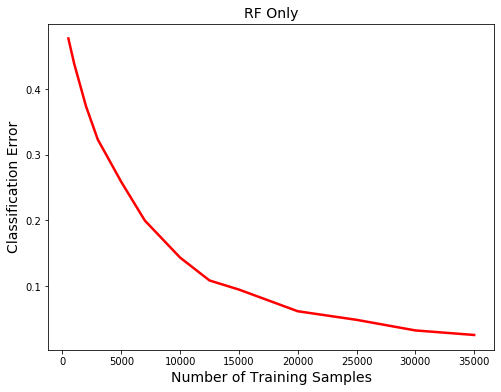

<IPython.core.display.Javascript object>

In [31]:
rf_evolution_mean = np.mean(rf_e, axis=1)

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.plot(sample_sizes, rf_evolution_mean, "r", linewidth=2.5)
plt.title("RF Only", fontsize=14)
plt.xlabel("Number of Training Samples", fontsize=14)
plt.ylabel("Classification Error", fontsize=14)

fig.savefig("sparse_parity_RF_only_100_iters.png")

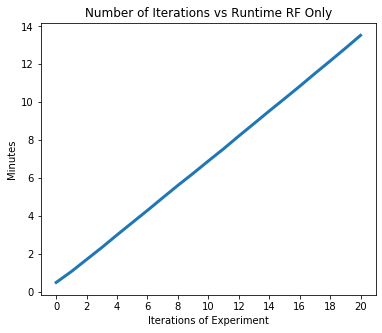

<IPython.core.display.Javascript object>

In [32]:
fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111)
ax.plot(rf_tp[:21, 0], rf_tp[:21, 1] / 60, linewidth=3)
plt.title("Number of Iterations vs Runtime RF Only")
plt.xlabel("Iterations of Experiment")
plt.ylabel("Minutes")
plt.xticks(list(range(0, 22, 2)))

fig.savefig("Time_plot_RF_only")

In [19]:
from sklearn.model_selection import train_test_split
import time


def test_suite_timed(
    p,
    p_star,
    iterations,
    output_nodes,
    hidden_nodes,
    n_jobs,
    sample_sizes=[500, 1000, 2000, 3000, 5000, 7000, 10000, 15000, 20000, 30000],
    num_trees=100,
    max_depth=None,
    rf_verbose=1,
    epochs=10,
    batch_size=50,
    learning_rate=0.001,
    validation_split=0.3,
    dnn_verbose=1,
):

    #     rf_evolution = np.zeros((len(sample_sizes), iterations))
    dnn_evolution = np.zeros((len(sample_sizes), iterations))

    start_time = time.time()
    time_plot = np.zeros([iterations, 2])

    for iteration in range(iterations):
        print("iteration: ", iteration)

        for sample_size_index, max_sample_size in enumerate(sample_sizes):
            print("Max sample size: ", max_sample_size)

            X, y = sparse_parity(max_sample_size, p, p_star)
            print(X.shape)
            print(y.shape)
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.3, random_state=101
            )

            #             rf_model = random_forest_classifier_model(
            #                 X_train=X_train,
            #                 y_train=y_train,
            #                 num_trees=num_trees,
            #                 max_depth=max_depth,
            #                 n_jobs=n_jobs,
            #                 verbose=rf_verbose,
            #             )

            #             rf_predictions = rf_model.predict(X_test)
            #             rf_error = 1 - accuracy_score(y_test, rf_predictions)
            #             rf_evolution[sample_size_index][iteration] = rf_error
            #             print("\n\nRF ERROR: \n\n", rf_error)

            #                     rf_evolution[sample_size_index][iteration] = rf_error

            if output_nodes == 1:
                dnn_model = binary_deep_neural_network(
                    X_train=X_train,
                    y_train=y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    learning_rate=learning_rate,
                    validation_split=validation_split,
                    hidden_nodes=hidden_nodes,
                    verbose=dnn_verbose,
                )
            else:
                y_train = to_categorical(y_train, num_classes=output_nodes)
                y_test = to_categorical(y_test, num_classes=output_nodes)

                dnn_model = multiclass_deep_neural_network(
                    X_train=X_train,
                    y_train=y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    learning_rate=learning_rate,
                    validation_split=validation_split,
                    output_nodes=output_nodes,
                    verbose=dnn_verbose,
                )

            score = dnn_model.evaluate(
                X_test,
                y_test,
                batch_size=None,
                verbose=0,
                sample_weight=None,
                steps=None,
                callbacks=None,
                max_queue_size=10,
                workers=1,
                use_multiprocessing=False,
                return_dict=False,
            )

            dnn_error = 1 - score[1]
            dnn_evolution[sample_size_index][iteration] = dnn_error

        current_time = time.time()
        time_plot[iteration, :] = [iteration, current_time - start_time]

    return dnn_evolution, time_plot

<IPython.core.display.Javascript object>

In [20]:
sample_sizes = [
    500,
    1000,
    2000,
    3000,
    5000,
    7000,
    10000,
    12500,
    15000,
    20000,
    25000,
    30000,
    35000,
]
import time

# sample_sizes = [500, 1000, 2000]

start = time.time()
dnn_e_4hn_3bs, dnn_tp_4hn_3bs = test_suite_timed(
    p=14,
    p_star=3,
    n_jobs=-1,
    iterations=100,
    output_nodes=1,
    sample_sizes=sample_sizes,
    num_trees=500,
    hidden_nodes=4,
    rf_verbose=1,
    batch_size=3,
)
end = time.time()
print("\n\nTOTAL RUNTIME: \n\n", end - start)

iteration:  0
Max sample size:  500
(500, 14)
(500,)
Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

82/82 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5328 - val_loss: 0.7087 - val_accuracy: 0.4811
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6781 - accuracy: 0.5615 - val_loss: 0.7120 - val_accuracy: 0.4811
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6706 - accuracy: 0.5738 - val_loss: 0.7180 - val_accuracy: 0.4434
Epoch 4/10
82/82 [=================

490/490 [==============================] - 0s 871us/step - loss: 0.6132 - accuracy: 0.6741 - val_loss: 0.6184 - val_accuracy: 0.6952
Epoch 8/10
490/490 [==============================] - 0s 852us/step - loss: 0.5829 - accuracy: 0.7129 - val_loss: 0.5920 - val_accuracy: 0.7222
Epoch 9/10
490/490 [==============================] - 0s 853us/step - loss: 0.5486 - accuracy: 0.7354 - val_loss: 0.5572 - val_accuracy: 0.7429
Epoch 10/10
490/490 [==============================] - 0s 827us/step - loss: 0.5129 - accuracy: 0.7605 - val_loss: 0.5261 - val_accuracy: 0.7635
Max sample size:  5000
(5000, 14)
(5000,)
Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are t

2042/2042 [==============================] - 2s 886us/step - loss: 0.6665 - accuracy: 0.5814 - val_loss: 0.6361 - val_accuracy: 0.6389
Epoch 3/10
2042/2042 [==============================] - 2s 889us/step - loss: 0.5870 - accuracy: 0.6872 - val_loss: 0.5452 - val_accuracy: 0.7189
Epoch 4/10
2042/2042 [==============================] - 2s 889us/step - loss: 0.5061 - accuracy: 0.7357 - val_loss: 0.4812 - val_accuracy: 0.7413
Epoch 5/10
2042/2042 [==============================] - 2s 898us/step - loss: 0.4438 - accuracy: 0.7638 - val_loss: 0.4225 - val_accuracy: 0.7794
Epoch 6/10
2042/2042 [==============================] - 2s 901us/step - loss: 0.3912 - accuracy: 0.7892 - val_loss: 0.3797 - val_accuracy: 0.7924
Epoch 7/10
2042/2042 [==============================] - 2s 908us/step - loss: 0.3490 - accuracy: 0.8121 - val_loss: 0.3506 - val_accuracy: 0.8050
Epoch 8/10
2042/2042 [==============================] - 2s 911us/step - loss: 0.3208 - accuracy: 0.8235 - val_loss: 0.3268 - val_accura

4900/4900 [==============================] - 4s 906us/step - loss: 0.6705 - accuracy: 0.5602 - val_loss: 0.5944 - val_accuracy: 0.6610
Epoch 2/10
4900/4900 [==============================] - 4s 898us/step - loss: 0.4787 - accuracy: 0.7396 - val_loss: 0.4089 - val_accuracy: 0.7664
Epoch 3/10
4900/4900 [==============================] - 4s 908us/step - loss: 0.3618 - accuracy: 0.7997 - val_loss: 0.3328 - val_accuracy: 0.8024
Epoch 4/10
4900/4900 [==============================] - 4s 901us/step - loss: 0.3098 - accuracy: 0.8231 - val_loss: 0.2984 - val_accuracy: 0.8142
Epoch 5/10
4900/4900 [==============================] - 4s 903us/step - loss: 0.2840 - accuracy: 0.8305 - val_loss: 0.2785 - val_accuracy: 0.8230
Epoch 6/10
4900/4900 [==============================] - 4s 904us/step - loss: 0.2677 - accuracy: 0.8377 - val_loss: 0.2758 - val_accuracy: 0.8203
Epoch 7/10
4900/4900 [==============================] - 4s 903us/step - loss: 0.2571 - accuracy: 0.8418 - val_loss: 0.2637 - val_accura

327/327 [==============================] - 0s 1ms/step - loss: 0.7024 - accuracy: 0.5169 - val_loss: 0.7158 - val_accuracy: 0.5083
Epoch 2/10
327/327 [==============================] - 0s 949us/step - loss: 0.6900 - accuracy: 0.5352 - val_loss: 0.7047 - val_accuracy: 0.5178
Epoch 3/10
327/327 [==============================] - 0s 919us/step - loss: 0.6827 - accuracy: 0.5536 - val_loss: 0.7005 - val_accuracy: 0.5154
Epoch 4/10
327/327 [==============================] - 0s 971us/step - loss: 0.6778 - accuracy: 0.5557 - val_loss: 0.6982 - val_accuracy: 0.5249
Epoch 5/10
327/327 [==============================] - 0s 948us/step - loss: 0.6730 - accuracy: 0.5802 - val_loss: 0.6954 - val_accuracy: 0.5273
Epoch 6/10
327/327 [==============================] - 0s 923us/step - loss: 0.6689 - accuracy: 0.6067 - val_loss: 0.6945 - val_accuracy: 0.5249
Epoch 7/10
327/327 [==============================] - 0s 952us/step - loss: 0.6641 - accuracy: 0.6221 - val_loss: 0.6890 - val_accuracy: 0.5368
Epoch

1634/1634 [==============================] - 2s 939us/step - loss: 0.6934 - accuracy: 0.5106 - val_loss: 0.6808 - val_accuracy: 0.5386
Epoch 2/10
1634/1634 [==============================] - 2s 919us/step - loss: 0.6616 - accuracy: 0.5782 - val_loss: 0.6435 - val_accuracy: 0.6129
Epoch 3/10
1634/1634 [==============================] - 1s 908us/step - loss: 0.6185 - accuracy: 0.6457 - val_loss: 0.5986 - val_accuracy: 0.6629
Epoch 4/10
1634/1634 [==============================] - 1s 912us/step - loss: 0.5503 - accuracy: 0.7257 - val_loss: 0.5181 - val_accuracy: 0.7652
Epoch 5/10
1634/1634 [==============================] - 1s 905us/step - loss: 0.4611 - accuracy: 0.8112 - val_loss: 0.4269 - val_accuracy: 0.8305
Epoch 6/10
1634/1634 [==============================] - 1s 903us/step - loss: 0.3862 - accuracy: 0.8600 - val_loss: 0.3640 - val_accuracy: 0.8748
Epoch 7/10
1634/1634 [==============================] - 1s 907us/step - loss: 0.3341 - accuracy: 0.8833 - val_loss: 0.3165 - val_accura

4084/4084 [==============================] - 4s 907us/step - loss: 0.6931 - accuracy: 0.5087 - val_loss: 0.6879 - val_accuracy: 0.5170
Epoch 2/10
4084/4084 [==============================] - 4s 896us/step - loss: 0.6089 - accuracy: 0.6575 - val_loss: 0.4762 - val_accuracy: 0.7659
Epoch 3/10
4084/4084 [==============================] - 4s 896us/step - loss: 0.3952 - accuracy: 0.8371 - val_loss: 0.3279 - val_accuracy: 0.8754
Epoch 4/10
4084/4084 [==============================] - 4s 897us/step - loss: 0.3008 - accuracy: 0.8896 - val_loss: 0.2636 - val_accuracy: 0.9084
Epoch 5/10
4084/4084 [==============================] - 4s 941us/step - loss: 0.2460 - accuracy: 0.9165 - val_loss: 0.2198 - val_accuracy: 0.9290
Epoch 6/10
4084/4084 [==============================] - 4s 903us/step - loss: 0.2123 - accuracy: 0.9280 - val_loss: 0.1918 - val_accuracy: 0.9417
Epoch 7/10
4084/4084 [==============================] - 4s 894us/step - loss: 0.1904 - accuracy: 0.9389 - val_loss: 0.1708 - val_accura

163/163 [==============================] - 0s 1ms/step - loss: 0.7339 - accuracy: 0.5153 - val_loss: 0.6836 - val_accuracy: 0.5687
Epoch 2/10
163/163 [==============================] - 0s 970us/step - loss: 0.7025 - accuracy: 0.4908 - val_loss: 0.6786 - val_accuracy: 0.5877
Epoch 3/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5174 - val_loss: 0.6768 - val_accuracy: 0.5877
Epoch 4/10
163/163 [==============================] - 0s 949us/step - loss: 0.6868 - accuracy: 0.5399 - val_loss: 0.6757 - val_accuracy: 0.6161
Epoch 5/10
163/163 [==============================] - 0s 981us/step - loss: 0.6833 - accuracy: 0.5603 - val_loss: 0.6742 - val_accuracy: 0.6161
Epoch 6/10
163/163 [==============================] - 0s 969us/step - loss: 0.6796 - accuracy: 0.5890 - val_loss: 0.6727 - val_accuracy: 0.6161
Epoch 7/10
163/163 [==============================] - 0s 964us/step - loss: 0.6763 - accuracy: 0.5890 - val_loss: 0.6701 - val_accuracy: 0.6351
Epoch 8

1144/1144 [==============================] - 1s 975us/step - loss: 0.7030 - accuracy: 0.4915 - val_loss: 0.6973 - val_accuracy: 0.4912
Epoch 2/10
1144/1144 [==============================] - 1s 910us/step - loss: 0.6924 - accuracy: 0.5169 - val_loss: 0.6950 - val_accuracy: 0.5082
Epoch 3/10
1144/1144 [==============================] - 1s 898us/step - loss: 0.6888 - accuracy: 0.5289 - val_loss: 0.6920 - val_accuracy: 0.5184
Epoch 4/10
1144/1144 [==============================] - 1s 907us/step - loss: 0.6816 - accuracy: 0.5510 - val_loss: 0.6852 - val_accuracy: 0.5415
Epoch 5/10
1144/1144 [==============================] - 1s 906us/step - loss: 0.6657 - accuracy: 0.5732 - val_loss: 0.6636 - val_accuracy: 0.5776
Epoch 6/10
1144/1144 [==============================] - 1s 909us/step - loss: 0.6366 - accuracy: 0.6058 - val_loss: 0.6319 - val_accuracy: 0.6116
Epoch 7/10
1144/1144 [==============================] - 1s 909us/step - loss: 0.6069 - accuracy: 0.6370 - val_loss: 0.6031 - val_accura

3267/3267 [==============================] - 3s 925us/step - loss: 0.6963 - accuracy: 0.4995 - val_loss: 0.6929 - val_accuracy: 0.5140
Epoch 2/10
3267/3267 [==============================] - 3s 907us/step - loss: 0.6712 - accuracy: 0.5813 - val_loss: 0.6393 - val_accuracy: 0.6348
Epoch 3/10
3267/3267 [==============================] - 3s 905us/step - loss: 0.5706 - accuracy: 0.6930 - val_loss: 0.4964 - val_accuracy: 0.7333
Epoch 4/10
3267/3267 [==============================] - 3s 909us/step - loss: 0.4312 - accuracy: 0.7981 - val_loss: 0.3700 - val_accuracy: 0.8498
Epoch 5/10
3267/3267 [==============================] - 3s 903us/step - loss: 0.3363 - accuracy: 0.8736 - val_loss: 0.3002 - val_accuracy: 0.8912
Epoch 6/10
3267/3267 [==============================] - 3s 906us/step - loss: 0.2796 - accuracy: 0.9039 - val_loss: 0.2632 - val_accuracy: 0.9033
Epoch 7/10
3267/3267 [==============================] - 3s 917us/step - loss: 0.2422 - accuracy: 0.9180 - val_loss: 0.2335 - val_accura

82/82 [==============================] - 0s 2ms/step - loss: 0.7105 - accuracy: 0.4754 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 2/10
82/82 [==============================] - 0s 4ms/step - loss: 0.7012 - accuracy: 0.4877 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.4959 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.5246 - val_loss: 0.6929 - val_accuracy: 0.4906
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.5451 - val_loss: 0.6925 - val_accuracy: 0.4717
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.5656 - val_loss: 0.6916 - val_accuracy: 0.4811
Epoch 7/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5697 - val_loss: 0.6907 - val_accuracy: 0.5189
Epoch 8/10
82/82 [=============

817/817 [==============================] - 1s 985us/step - loss: 0.7009 - accuracy: 0.4910 - val_loss: 0.6908 - val_accuracy: 0.5133
Epoch 2/10
817/817 [==============================] - 1s 925us/step - loss: 0.6918 - accuracy: 0.5200 - val_loss: 0.6907 - val_accuracy: 0.5095
Epoch 3/10
817/817 [==============================] - 1s 921us/step - loss: 0.6898 - accuracy: 0.5306 - val_loss: 0.6904 - val_accuracy: 0.5086
Epoch 4/10
817/817 [==============================] - 1s 903us/step - loss: 0.6877 - accuracy: 0.5424 - val_loss: 0.6904 - val_accuracy: 0.5162
Epoch 5/10
817/817 [==============================] - 1s 918us/step - loss: 0.6851 - accuracy: 0.5473 - val_loss: 0.6922 - val_accuracy: 0.4981
Epoch 6/10
817/817 [==============================] - 1s 915us/step - loss: 0.6820 - accuracy: 0.5457 - val_loss: 0.6942 - val_accuracy: 0.5038
Epoch 7/10
817/817 [==============================] - 1s 923us/step - loss: 0.6774 - accuracy: 0.5592 - val_loss: 0.6894 - val_accuracy: 0.5143
Epo

2450/2450 [==============================] - 2s 1ms/step - loss: 0.6946 - accuracy: 0.5137 - val_loss: 0.6782 - val_accuracy: 0.5643
Epoch 2/10
2450/2450 [==============================] - 2s 897us/step - loss: 0.6070 - accuracy: 0.6745 - val_loss: 0.5008 - val_accuracy: 0.7515
Epoch 3/10
2450/2450 [==============================] - 2s 894us/step - loss: 0.4249 - accuracy: 0.8065 - val_loss: 0.3548 - val_accuracy: 0.8654
Epoch 4/10
2450/2450 [==============================] - 2s 899us/step - loss: 0.3104 - accuracy: 0.8911 - val_loss: 0.2670 - val_accuracy: 0.9115
Epoch 5/10
2450/2450 [==============================] - 2s 896us/step - loss: 0.2461 - accuracy: 0.9223 - val_loss: 0.2252 - val_accuracy: 0.9318
Epoch 6/10
2450/2450 [==============================] - 2s 900us/step - loss: 0.2107 - accuracy: 0.9301 - val_loss: 0.1918 - val_accuracy: 0.9429
Epoch 7/10
2450/2450 [==============================] - 2s 901us/step - loss: 0.1864 - accuracy: 0.9419 - val_loss: 0.1712 - val_accuracy

5717/5717 [==============================] - 5s 924us/step - loss: 0.6761 - accuracy: 0.5448 - val_loss: 0.6064 - val_accuracy: 0.6550
Epoch 2/10
5717/5717 [==============================] - 5s 894us/step - loss: 0.3629 - accuracy: 0.8673 - val_loss: 0.2108 - val_accuracy: 0.9574
Epoch 3/10
5717/5717 [==============================] - 5s 893us/step - loss: 0.1587 - accuracy: 0.9598 - val_loss: 0.1258 - val_accuracy: 0.9659
Epoch 4/10
5717/5717 [==============================] - 5s 887us/step - loss: 0.1050 - accuracy: 0.9715 - val_loss: 0.0982 - val_accuracy: 0.9688
Epoch 5/10
5717/5717 [==============================] - 5s 889us/step - loss: 0.0825 - accuracy: 0.9759 - val_loss: 0.0773 - val_accuracy: 0.9781
Epoch 6/10
5717/5717 [==============================] - 5s 887us/step - loss: 0.0693 - accuracy: 0.9784 - val_loss: 0.0664 - val_accuracy: 0.9797
Epoch 7/10
5717/5717 [==============================] - 5s 883us/step - loss: 0.0603 - accuracy: 0.9812 - val_loss: 0.0666 - val_accura

490/490 [==============================] - 0s 960us/step - loss: 0.7080 - accuracy: 0.5068 - val_loss: 0.6933 - val_accuracy: 0.5476
Epoch 2/10
490/490 [==============================] - 0s 854us/step - loss: 0.6882 - accuracy: 0.5367 - val_loss: 0.6877 - val_accuracy: 0.5683
Epoch 3/10
490/490 [==============================] - 0s 844us/step - loss: 0.6804 - accuracy: 0.5524 - val_loss: 0.6839 - val_accuracy: 0.5825
Epoch 4/10
490/490 [==============================] - 0s 850us/step - loss: 0.6715 - accuracy: 0.5932 - val_loss: 0.6791 - val_accuracy: 0.5683
Epoch 5/10
490/490 [==============================] - 0s 848us/step - loss: 0.6599 - accuracy: 0.6170 - val_loss: 0.6728 - val_accuracy: 0.5698
Epoch 6/10
490/490 [==============================] - 0s 850us/step - loss: 0.6447 - accuracy: 0.6340 - val_loss: 0.6566 - val_accuracy: 0.5937
Epoch 7/10
490/490 [==============================] - 0s 844us/step - loss: 0.6262 - accuracy: 0.6558 - val_loss: 0.6425 - val_accuracy: 0.6159
Epo

2042/2042 [==============================] - 2s 938us/step - loss: 0.6899 - accuracy: 0.5242 - val_loss: 0.6835 - val_accuracy: 0.5196
Epoch 2/10
2042/2042 [==============================] - 2s 919us/step - loss: 0.6460 - accuracy: 0.5884 - val_loss: 0.6114 - val_accuracy: 0.6450
Epoch 3/10
2042/2042 [==============================] - 2s 911us/step - loss: 0.5614 - accuracy: 0.6999 - val_loss: 0.5260 - val_accuracy: 0.7272
Epoch 4/10
2042/2042 [==============================] - 2s 906us/step - loss: 0.4970 - accuracy: 0.7481 - val_loss: 0.4833 - val_accuracy: 0.7425
Epoch 5/10
2042/2042 [==============================] - 2s 906us/step - loss: 0.4554 - accuracy: 0.7713 - val_loss: 0.4363 - val_accuracy: 0.7825
Epoch 6/10
2042/2042 [==============================] - 2s 901us/step - loss: 0.3978 - accuracy: 0.7954 - val_loss: 0.3698 - val_accuracy: 0.8171
Epoch 7/10
2042/2042 [==============================] - 2s 899us/step - loss: 0.3624 - accuracy: 0.8178 - val_loss: 0.3439 - val_accura

4900/4900 [==============================] - 4s 897us/step - loss: 0.6902 - accuracy: 0.5202 - val_loss: 0.6766 - val_accuracy: 0.5544
Epoch 2/10
4900/4900 [==============================] - 5s 919us/step - loss: 0.4716 - accuracy: 0.7947 - val_loss: 0.2980 - val_accuracy: 0.9084
Epoch 3/10
4900/4900 [==============================] - 4s 909us/step - loss: 0.2292 - accuracy: 0.9318 - val_loss: 0.1674 - val_accuracy: 0.9567
Epoch 4/10
4900/4900 [==============================] - 4s 907us/step - loss: 0.1443 - accuracy: 0.9601 - val_loss: 0.1165 - val_accuracy: 0.9692
Epoch 5/10
4900/4900 [==============================] - 4s 909us/step - loss: 0.1052 - accuracy: 0.9712 - val_loss: 0.0869 - val_accuracy: 0.9787
Epoch 6/10
4900/4900 [==============================] - 4s 903us/step - loss: 0.0840 - accuracy: 0.9765 - val_loss: 0.0730 - val_accuracy: 0.9800
Epoch 7/10
4900/4900 [==============================] - 4s 904us/step - loss: 0.0723 - accuracy: 0.9765 - val_loss: 0.0729 - val_accura

327/327 [==============================] - 0s 1ms/step - loss: 0.7069 - accuracy: 0.5026 - val_loss: 0.6962 - val_accuracy: 0.5083
Epoch 2/10
327/327 [==============================] - 0s 960us/step - loss: 0.6886 - accuracy: 0.5536 - val_loss: 0.6958 - val_accuracy: 0.5131
Epoch 3/10
327/327 [==============================] - 0s 982us/step - loss: 0.6838 - accuracy: 0.5649 - val_loss: 0.6979 - val_accuracy: 0.5059
Epoch 4/10
327/327 [==============================] - 0s 921us/step - loss: 0.6793 - accuracy: 0.5792 - val_loss: 0.6969 - val_accuracy: 0.5154
Epoch 5/10
327/327 [==============================] - 0s 938us/step - loss: 0.6748 - accuracy: 0.5863 - val_loss: 0.6957 - val_accuracy: 0.5131
Epoch 6/10
327/327 [==============================] - 0s 953us/step - loss: 0.6708 - accuracy: 0.5986 - val_loss: 0.6937 - val_accuracy: 0.5036
Epoch 7/10
327/327 [==============================] - 0s 951us/step - loss: 0.6662 - accuracy: 0.5935 - val_loss: 0.6952 - val_accuracy: 0.5107
Epoch

1634/1634 [==============================] - 2s 936us/step - loss: 0.6976 - accuracy: 0.5124 - val_loss: 0.6921 - val_accuracy: 0.5186
Epoch 2/10
1634/1634 [==============================] - 1s 909us/step - loss: 0.6851 - accuracy: 0.5604 - val_loss: 0.6741 - val_accuracy: 0.5986
Epoch 3/10
1634/1634 [==============================] - 2s 928us/step - loss: 0.6431 - accuracy: 0.6714 - val_loss: 0.5975 - val_accuracy: 0.7267
Epoch 4/10
1634/1634 [==============================] - 1s 913us/step - loss: 0.5410 - accuracy: 0.7700 - val_loss: 0.4845 - val_accuracy: 0.7905
Epoch 5/10
1634/1634 [==============================] - 2s 928us/step - loss: 0.4422 - accuracy: 0.8139 - val_loss: 0.3905 - val_accuracy: 0.8457
Epoch 6/10
1634/1634 [==============================] - 1s 908us/step - loss: 0.3566 - accuracy: 0.8612 - val_loss: 0.3236 - val_accuracy: 0.8819
Epoch 7/10
1634/1634 [==============================] - 1s 906us/step - loss: 0.2891 - accuracy: 0.8920 - val_loss: 0.2679 - val_accura

4084/4084 [==============================] - 4s 889us/step - loss: 0.6686 - accuracy: 0.5797 - val_loss: 0.6151 - val_accuracy: 0.6766
Epoch 2/10
4084/4084 [==============================] - 4s 879us/step - loss: 0.5512 - accuracy: 0.7224 - val_loss: 0.5270 - val_accuracy: 0.7364
Epoch 3/10
4084/4084 [==============================] - 4s 875us/step - loss: 0.4951 - accuracy: 0.7594 - val_loss: 0.4917 - val_accuracy: 0.7659
Epoch 4/10
4084/4084 [==============================] - 4s 880us/step - loss: 0.4591 - accuracy: 0.7870 - val_loss: 0.4573 - val_accuracy: 0.7914
Epoch 5/10
4084/4084 [==============================] - 4s 880us/step - loss: 0.4336 - accuracy: 0.8064 - val_loss: 0.4344 - val_accuracy: 0.8093
Epoch 6/10
4084/4084 [==============================] - 4s 880us/step - loss: 0.4160 - accuracy: 0.8190 - val_loss: 0.4251 - val_accuracy: 0.8124
Epoch 7/10
4084/4084 [==============================] - 4s 879us/step - loss: 0.4047 - accuracy: 0.8242 - val_loss: 0.4111 - val_accura

163/163 [==============================] - 0s 1ms/step - loss: 0.7059 - accuracy: 0.5051 - val_loss: 0.7009 - val_accuracy: 0.5261
Epoch 2/10
163/163 [==============================] - 0s 965us/step - loss: 0.6945 - accuracy: 0.5521 - val_loss: 0.6997 - val_accuracy: 0.5166
Epoch 3/10
163/163 [==============================] - 0s 953us/step - loss: 0.6884 - accuracy: 0.5644 - val_loss: 0.6973 - val_accuracy: 0.5308
Epoch 4/10
163/163 [==============================] - 0s 945us/step - loss: 0.6832 - accuracy: 0.5644 - val_loss: 0.6960 - val_accuracy: 0.5403
Epoch 5/10
163/163 [==============================] - 0s 948us/step - loss: 0.6774 - accuracy: 0.5726 - val_loss: 0.6963 - val_accuracy: 0.5403
Epoch 6/10
163/163 [==============================] - 0s 968us/step - loss: 0.6721 - accuracy: 0.6094 - val_loss: 0.6962 - val_accuracy: 0.5403
Epoch 7/10
163/163 [==============================] - 0s 939us/step - loss: 0.6666 - accuracy: 0.6217 - val_loss: 0.6971 - val_accuracy: 0.5355
Epoch

1144/1144 [==============================] - 1s 951us/step - loss: 0.6992 - accuracy: 0.4965 - val_loss: 0.6935 - val_accuracy: 0.5177
Epoch 2/10
1144/1144 [==============================] - 1s 912us/step - loss: 0.6901 - accuracy: 0.5268 - val_loss: 0.6866 - val_accuracy: 0.5415
Epoch 3/10
1144/1144 [==============================] - 1s 918us/step - loss: 0.6786 - accuracy: 0.5764 - val_loss: 0.6710 - val_accuracy: 0.6197
Epoch 4/10
1144/1144 [==============================] - 1s 928us/step - loss: 0.6457 - accuracy: 0.6691 - val_loss: 0.6260 - val_accuracy: 0.7020
Epoch 5/10
1144/1144 [==============================] - 1s 925us/step - loss: 0.5784 - accuracy: 0.7536 - val_loss: 0.5516 - val_accuracy: 0.7735
Epoch 6/10
1144/1144 [==============================] - 1s 950us/step - loss: 0.4915 - accuracy: 0.8085 - val_loss: 0.4727 - val_accuracy: 0.8116
Epoch 7/10
1144/1144 [==============================] - 1s 938us/step - loss: 0.4172 - accuracy: 0.8405 - val_loss: 0.4180 - val_accura

3267/3267 [==============================] - 3s 909us/step - loss: 0.6946 - accuracy: 0.5089 - val_loss: 0.6851 - val_accuracy: 0.5490
Epoch 2/10
3267/3267 [==============================] - 3s 873us/step - loss: 0.6407 - accuracy: 0.6621 - val_loss: 0.5732 - val_accuracy: 0.7583
Epoch 3/10
3267/3267 [==============================] - 3s 894us/step - loss: 0.4856 - accuracy: 0.8013 - val_loss: 0.4210 - val_accuracy: 0.8276
Epoch 4/10
3267/3267 [==============================] - 3s 867us/step - loss: 0.3683 - accuracy: 0.8536 - val_loss: 0.3389 - val_accuracy: 0.8600
Epoch 5/10
3267/3267 [==============================] - 3s 888us/step - loss: 0.3020 - accuracy: 0.8838 - val_loss: 0.2789 - val_accuracy: 0.8919
Epoch 6/10
3267/3267 [==============================] - 3s 871us/step - loss: 0.2580 - accuracy: 0.9014 - val_loss: 0.2432 - val_accuracy: 0.9040
Epoch 7/10
3267/3267 [==============================] - 3s 888us/step - loss: 0.2278 - accuracy: 0.9146 - val_loss: 0.2204 - val_accura

82/82 [==============================] - 0s 2ms/step - loss: 0.7048 - accuracy: 0.4877 - val_loss: 0.7210 - val_accuracy: 0.4434
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6976 - accuracy: 0.5041 - val_loss: 0.7168 - val_accuracy: 0.4340
Epoch 3/10
82/82 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5246 - val_loss: 0.7135 - val_accuracy: 0.4340
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6874 - accuracy: 0.5574 - val_loss: 0.7115 - val_accuracy: 0.4151
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.5533 - val_loss: 0.7089 - val_accuracy: 0.4434
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.5533 - val_loss: 0.7088 - val_accuracy: 0.4340
Epoch 7/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.6025 - val_loss: 0.7076 - val_accuracy: 0.4151
Epoch 8/10
82/82 [=============

817/817 [==============================] - 1s 984us/step - loss: 0.7006 - accuracy: 0.5045 - val_loss: 0.6947 - val_accuracy: 0.5229
Epoch 2/10
817/817 [==============================] - 1s 930us/step - loss: 0.6905 - accuracy: 0.5233 - val_loss: 0.6928 - val_accuracy: 0.5257
Epoch 3/10
817/817 [==============================] - 1s 913us/step - loss: 0.6863 - accuracy: 0.5376 - val_loss: 0.6914 - val_accuracy: 0.5314
Epoch 4/10
817/817 [==============================] - 1s 913us/step - loss: 0.6799 - accuracy: 0.5449 - val_loss: 0.6865 - val_accuracy: 0.5314
Epoch 5/10
817/817 [==============================] - 1s 910us/step - loss: 0.6711 - accuracy: 0.5620 - val_loss: 0.6804 - val_accuracy: 0.5324
Epoch 6/10
817/817 [==============================] - 1s 946us/step - loss: 0.6572 - accuracy: 0.5624 - val_loss: 0.6594 - val_accuracy: 0.5505
Epoch 7/10
817/817 [==============================] - 1s 945us/step - loss: 0.6404 - accuracy: 0.5743 - val_loss: 0.6452 - val_accuracy: 0.5924
Epo

2450/2450 [==============================] - 3s 1ms/step - loss: 0.6964 - accuracy: 0.4990 - val_loss: 0.6914 - val_accuracy: 0.5122
Epoch 2/10
2450/2450 [==============================] - 2s 886us/step - loss: 0.6837 - accuracy: 0.5395 - val_loss: 0.6633 - val_accuracy: 0.5662
Epoch 3/10
2450/2450 [==============================] - 2s 873us/step - loss: 0.6129 - accuracy: 0.6258 - val_loss: 0.5439 - val_accuracy: 0.7099
Epoch 4/10
2450/2450 [==============================] - 2s 887us/step - loss: 0.4741 - accuracy: 0.7626 - val_loss: 0.4249 - val_accuracy: 0.7848
Epoch 5/10
2450/2450 [==============================] - 2s 882us/step - loss: 0.3957 - accuracy: 0.8065 - val_loss: 0.3763 - val_accuracy: 0.8089
Epoch 6/10
2450/2450 [==============================] - 2s 884us/step - loss: 0.3599 - accuracy: 0.8243 - val_loss: 0.3521 - val_accuracy: 0.8229
Epoch 7/10
2450/2450 [==============================] - 2s 880us/step - loss: 0.3388 - accuracy: 0.8334 - val_loss: 0.3346 - val_accuracy

5717/5717 [==============================] - 5s 902us/step - loss: 0.6605 - accuracy: 0.5948 - val_loss: 0.5535 - val_accuracy: 0.7697
Epoch 2/10
5717/5717 [==============================] - 5s 891us/step - loss: 0.3947 - accuracy: 0.8415 - val_loss: 0.2961 - val_accuracy: 0.8829
Epoch 3/10
5717/5717 [==============================] - 5s 888us/step - loss: 0.2619 - accuracy: 0.8935 - val_loss: 0.2314 - val_accuracy: 0.9084
Epoch 4/10
5717/5717 [==============================] - 5s 888us/step - loss: 0.2121 - accuracy: 0.9164 - val_loss: 0.1931 - val_accuracy: 0.9238
Epoch 5/10
5717/5717 [==============================] - 5s 886us/step - loss: 0.1815 - accuracy: 0.9304 - val_loss: 0.1715 - val_accuracy: 0.9329
Epoch 6/10
5717/5717 [==============================] - 5s 886us/step - loss: 0.1618 - accuracy: 0.9371 - val_loss: 0.1635 - val_accuracy: 0.9325
Epoch 7/10
5717/5717 [==============================] - 5s 880us/step - loss: 0.1484 - accuracy: 0.9417 - val_loss: 0.1452 - val_accura

490/490 [==============================] - 0s 999us/step - loss: 0.7069 - accuracy: 0.5048 - val_loss: 0.7166 - val_accuracy: 0.4857
Epoch 2/10
490/490 [==============================] - 0s 901us/step - loss: 0.6896 - accuracy: 0.5415 - val_loss: 0.7038 - val_accuracy: 0.4905
Epoch 3/10
490/490 [==============================] - 0s 872us/step - loss: 0.6851 - accuracy: 0.5503 - val_loss: 0.7057 - val_accuracy: 0.4857
Epoch 4/10
490/490 [==============================] - 0s 866us/step - loss: 0.6803 - accuracy: 0.5619 - val_loss: 0.7012 - val_accuracy: 0.4968
Epoch 5/10
490/490 [==============================] - 0s 908us/step - loss: 0.6723 - accuracy: 0.5871 - val_loss: 0.6913 - val_accuracy: 0.5127
Epoch 6/10
490/490 [==============================] - 0s 895us/step - loss: 0.6599 - accuracy: 0.6150 - val_loss: 0.6840 - val_accuracy: 0.5444
Epoch 7/10
490/490 [==============================] - 0s 883us/step - loss: 0.6412 - accuracy: 0.6422 - val_loss: 0.6698 - val_accuracy: 0.5730
Epo

2042/2042 [==============================] - 2s 908us/step - loss: 0.6934 - accuracy: 0.5131 - val_loss: 0.6856 - val_accuracy: 0.5463
Epoch 2/10
2042/2042 [==============================] - 2s 899us/step - loss: 0.6603 - accuracy: 0.6070 - val_loss: 0.6220 - val_accuracy: 0.6956
Epoch 3/10
2042/2042 [==============================] - 2s 908us/step - loss: 0.5632 - accuracy: 0.7429 - val_loss: 0.4977 - val_accuracy: 0.7928
Epoch 4/10
2042/2042 [==============================] - 2s 872us/step - loss: 0.4266 - accuracy: 0.8341 - val_loss: 0.3724 - val_accuracy: 0.8549
Epoch 5/10
2042/2042 [==============================] - 2s 882us/step - loss: 0.3330 - accuracy: 0.8713 - val_loss: 0.3077 - val_accuracy: 0.8838
Epoch 6/10
2042/2042 [==============================] - 2s 892us/step - loss: 0.2807 - accuracy: 0.8919 - val_loss: 0.2643 - val_accuracy: 0.8998
Epoch 7/10
2042/2042 [==============================] - 2s 867us/step - loss: 0.2459 - accuracy: 0.9089 - val_loss: 0.2395 - val_accura

4900/4900 [==============================] - 4s 896us/step - loss: 0.6942 - accuracy: 0.5069 - val_loss: 0.6810 - val_accuracy: 0.5531
Epoch 2/10
4900/4900 [==============================] - 4s 884us/step - loss: 0.6379 - accuracy: 0.6048 - val_loss: 0.5654 - val_accuracy: 0.6520
Epoch 3/10
4900/4900 [==============================] - 4s 884us/step - loss: 0.5129 - accuracy: 0.6956 - val_loss: 0.4683 - val_accuracy: 0.7383
Epoch 4/10
4900/4900 [==============================] - 4s 890us/step - loss: 0.4399 - accuracy: 0.7557 - val_loss: 0.4188 - val_accuracy: 0.7662
Epoch 5/10
4900/4900 [==============================] - 4s 890us/step - loss: 0.3904 - accuracy: 0.7948 - val_loss: 0.3600 - val_accuracy: 0.8300
Epoch 6/10
4900/4900 [==============================] - 4s 889us/step - loss: 0.3205 - accuracy: 0.8652 - val_loss: 0.2814 - val_accuracy: 0.8897
Epoch 7/10
4900/4900 [==============================] - 4s 889us/step - loss: 0.2506 - accuracy: 0.9024 - val_loss: 0.2252 - val_accura

327/327 [==============================] - 0s 1ms/step - loss: 0.7018 - accuracy: 0.4954 - val_loss: 0.6964 - val_accuracy: 0.4822
Epoch 2/10
327/327 [==============================] - 0s 958us/step - loss: 0.6939 - accuracy: 0.5087 - val_loss: 0.6951 - val_accuracy: 0.4822
Epoch 3/10
327/327 [==============================] - 0s 957us/step - loss: 0.6911 - accuracy: 0.5352 - val_loss: 0.6952 - val_accuracy: 0.5059
Epoch 4/10
327/327 [==============================] - 0s 985us/step - loss: 0.6889 - accuracy: 0.5485 - val_loss: 0.6953 - val_accuracy: 0.5036
Epoch 5/10
327/327 [==============================] - 0s 978us/step - loss: 0.6872 - accuracy: 0.5506 - val_loss: 0.6939 - val_accuracy: 0.5083
Epoch 6/10
327/327 [==============================] - 0s 941us/step - loss: 0.6851 - accuracy: 0.5781 - val_loss: 0.6937 - val_accuracy: 0.5107
Epoch 7/10
327/327 [==============================] - 0s 946us/step - loss: 0.6833 - accuracy: 0.5771 - val_loss: 0.6932 - val_accuracy: 0.5083
Epoch

1634/1634 [==============================] - 2s 937us/step - loss: 0.6946 - accuracy: 0.5135 - val_loss: 0.6914 - val_accuracy: 0.5352
Epoch 2/10
1634/1634 [==============================] - 1s 900us/step - loss: 0.6854 - accuracy: 0.5482 - val_loss: 0.6828 - val_accuracy: 0.5343
Epoch 3/10
1634/1634 [==============================] - 1s 904us/step - loss: 0.6621 - accuracy: 0.5971 - val_loss: 0.6458 - val_accuracy: 0.6005
Epoch 4/10
1634/1634 [==============================] - 1s 883us/step - loss: 0.5959 - accuracy: 0.6688 - val_loss: 0.5624 - val_accuracy: 0.6990
Epoch 5/10
1634/1634 [==============================] - 1s 918us/step - loss: 0.5041 - accuracy: 0.7529 - val_loss: 0.4836 - val_accuracy: 0.7914
Epoch 6/10
1634/1634 [==============================] - 1s 914us/step - loss: 0.4103 - accuracy: 0.8324 - val_loss: 0.3793 - val_accuracy: 0.8414
Epoch 7/10
1634/1634 [==============================] - 1s 898us/step - loss: 0.3223 - accuracy: 0.8814 - val_loss: 0.3163 - val_accura

4084/4084 [==============================] - 4s 917us/step - loss: 0.6878 - accuracy: 0.5413 - val_loss: 0.6564 - val_accuracy: 0.6394
Epoch 2/10
4084/4084 [==============================] - 4s 904us/step - loss: 0.5446 - accuracy: 0.7504 - val_loss: 0.4674 - val_accuracy: 0.7985
Epoch 3/10
4084/4084 [==============================] - 4s 895us/step - loss: 0.4136 - accuracy: 0.8322 - val_loss: 0.3757 - val_accuracy: 0.8415
Epoch 4/10
4084/4084 [==============================] - 4s 882us/step - loss: 0.3307 - accuracy: 0.8689 - val_loss: 0.2939 - val_accuracy: 0.8859
Epoch 5/10
4084/4084 [==============================] - 4s 886us/step - loss: 0.2549 - accuracy: 0.9045 - val_loss: 0.2330 - val_accuracy: 0.9082
Epoch 6/10
4084/4084 [==============================] - 4s 880us/step - loss: 0.2058 - accuracy: 0.9274 - val_loss: 0.1962 - val_accuracy: 0.9248
Epoch 7/10
4084/4084 [==============================] - 4s 878us/step - loss: 0.1760 - accuracy: 0.9420 - val_loss: 0.1754 - val_accura

163/163 [==============================] - 0s 1ms/step - loss: 0.7159 - accuracy: 0.4888 - val_loss: 0.6982 - val_accuracy: 0.5308
Epoch 2/10
163/163 [==============================] - 0s 1000us/step - loss: 0.6982 - accuracy: 0.5317 - val_loss: 0.6946 - val_accuracy: 0.4929
Epoch 3/10
163/163 [==============================] - 0s 967us/step - loss: 0.6906 - accuracy: 0.5501 - val_loss: 0.6936 - val_accuracy: 0.4787
Epoch 4/10
163/163 [==============================] - 0s 957us/step - loss: 0.6856 - accuracy: 0.5562 - val_loss: 0.6929 - val_accuracy: 0.4929
Epoch 5/10
163/163 [==============================] - 0s 972us/step - loss: 0.6810 - accuracy: 0.5828 - val_loss: 0.6929 - val_accuracy: 0.4929
Epoch 6/10
163/163 [==============================] - 0s 977us/step - loss: 0.6772 - accuracy: 0.5746 - val_loss: 0.6928 - val_accuracy: 0.5071
Epoch 7/10
163/163 [==============================] - 0s 989us/step - loss: 0.6736 - accuracy: 0.6033 - val_loss: 0.6916 - val_accuracy: 0.5118
Epoc

1144/1144 [==============================] - 1s 980us/step - loss: 0.6991 - accuracy: 0.4965 - val_loss: 0.6922 - val_accuracy: 0.5054
Epoch 2/10
1144/1144 [==============================] - 1s 918us/step - loss: 0.6929 - accuracy: 0.4901 - val_loss: 0.6918 - val_accuracy: 0.5034
Epoch 3/10
1144/1144 [==============================] - 1s 906us/step - loss: 0.6867 - accuracy: 0.5437 - val_loss: 0.6825 - val_accuracy: 0.5544
Epoch 4/10
1144/1144 [==============================] - 1s 915us/step - loss: 0.6615 - accuracy: 0.5980 - val_loss: 0.6386 - val_accuracy: 0.6762
Epoch 5/10
1144/1144 [==============================] - 1s 881us/step - loss: 0.5898 - accuracy: 0.7195 - val_loss: 0.5341 - val_accuracy: 0.7871
Epoch 6/10
1144/1144 [==============================] - 1s 888us/step - loss: 0.4802 - accuracy: 0.8052 - val_loss: 0.4300 - val_accuracy: 0.8259
Epoch 7/10
1144/1144 [==============================] - 1s 905us/step - loss: 0.4024 - accuracy: 0.8274 - val_loss: 0.3819 - val_accura

3267/3267 [==============================] - 3s 902us/step - loss: 0.6909 - accuracy: 0.5408 - val_loss: 0.6738 - val_accuracy: 0.6121
Epoch 2/10
3267/3267 [==============================] - 3s 886us/step - loss: 0.6059 - accuracy: 0.7133 - val_loss: 0.5150 - val_accuracy: 0.7860
Epoch 3/10
3267/3267 [==============================] - 3s 906us/step - loss: 0.4294 - accuracy: 0.8219 - val_loss: 0.3761 - val_accuracy: 0.8469
Epoch 4/10
3267/3267 [==============================] - 3s 897us/step - loss: 0.3095 - accuracy: 0.8792 - val_loss: 0.2788 - val_accuracy: 0.8833
Epoch 5/10
3267/3267 [==============================] - 3s 880us/step - loss: 0.2391 - accuracy: 0.9113 - val_loss: 0.2290 - val_accuracy: 0.9014
Epoch 6/10
3267/3267 [==============================] - 3s 878us/step - loss: 0.2021 - accuracy: 0.9214 - val_loss: 0.2023 - val_accuracy: 0.9117
Epoch 7/10
3267/3267 [==============================] - 3s 873us/step - loss: 0.1783 - accuracy: 0.9316 - val_loss: 0.1942 - val_accura

82/82 [==============================] - 0s 2ms/step - loss: 0.7188 - accuracy: 0.5000 - val_loss: 0.7059 - val_accuracy: 0.5566
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.7020 - accuracy: 0.5205 - val_loss: 0.6997 - val_accuracy: 0.5283
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5164 - val_loss: 0.6976 - val_accuracy: 0.5377
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6851 - accuracy: 0.5410 - val_loss: 0.6958 - val_accuracy: 0.5189
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.5779 - val_loss: 0.6949 - val_accuracy: 0.5283
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.6148 - val_loss: 0.6942 - val_accuracy: 0.5566
Epoch 7/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6733 - accuracy: 0.6270 - val_loss: 0.6941 - val_accuracy: 0.5377
Epoch 8/10
82/82 [=============

817/817 [==============================] - 1s 963us/step - loss: 0.6948 - accuracy: 0.5114 - val_loss: 0.6978 - val_accuracy: 0.5000
Epoch 2/10
817/817 [==============================] - 1s 892us/step - loss: 0.6900 - accuracy: 0.5245 - val_loss: 0.6964 - val_accuracy: 0.4962
Epoch 3/10
817/817 [==============================] - 1s 900us/step - loss: 0.6858 - accuracy: 0.5437 - val_loss: 0.6934 - val_accuracy: 0.5276
Epoch 4/10
817/817 [==============================] - 1s 904us/step - loss: 0.6769 - accuracy: 0.5722 - val_loss: 0.6779 - val_accuracy: 0.5695
Epoch 5/10
817/817 [==============================] - 1s 908us/step - loss: 0.6549 - accuracy: 0.6118 - val_loss: 0.6486 - val_accuracy: 0.6190
Epoch 6/10
817/817 [==============================] - 1s 915us/step - loss: 0.6132 - accuracy: 0.6616 - val_loss: 0.6014 - val_accuracy: 0.6752
Epoch 7/10
817/817 [==============================] - 1s 903us/step - loss: 0.5537 - accuracy: 0.7290 - val_loss: 0.5398 - val_accuracy: 0.7286
Epo

2450/2450 [==============================] - 2s 898us/step - loss: 0.6939 - accuracy: 0.5206 - val_loss: 0.6826 - val_accuracy: 0.5665
Epoch 2/10
2450/2450 [==============================] - 2s 877us/step - loss: 0.6435 - accuracy: 0.6327 - val_loss: 0.5639 - val_accuracy: 0.7617
Epoch 3/10
2450/2450 [==============================] - 2s 868us/step - loss: 0.4498 - accuracy: 0.8262 - val_loss: 0.3637 - val_accuracy: 0.8585
Epoch 4/10
2450/2450 [==============================] - 2s 888us/step - loss: 0.3177 - accuracy: 0.8857 - val_loss: 0.2755 - val_accuracy: 0.9064
Epoch 5/10
2450/2450 [==============================] - 2s 864us/step - loss: 0.2487 - accuracy: 0.9155 - val_loss: 0.2193 - val_accuracy: 0.9299
Epoch 6/10
2450/2450 [==============================] - 2s 877us/step - loss: 0.2045 - accuracy: 0.9343 - val_loss: 0.1877 - val_accuracy: 0.9419
Epoch 7/10
2450/2450 [==============================] - 2s 877us/step - loss: 0.1766 - accuracy: 0.9449 - val_loss: 0.1663 - val_accura

5717/5717 [==============================] - 5s 882us/step - loss: 0.6578 - accuracy: 0.5992 - val_loss: 0.5282 - val_accuracy: 0.7838
Epoch 2/10
5717/5717 [==============================] - 5s 873us/step - loss: 0.3502 - accuracy: 0.8804 - val_loss: 0.2284 - val_accuracy: 0.9370
Epoch 3/10
5717/5717 [==============================] - 5s 890us/step - loss: 0.1615 - accuracy: 0.9546 - val_loss: 0.1262 - val_accuracy: 0.9600
Epoch 4/10
5717/5717 [==============================] - 5s 874us/step - loss: 0.1054 - accuracy: 0.9674 - val_loss: 0.0929 - val_accuracy: 0.9682
Epoch 5/10
5717/5717 [==============================] - 5s 876us/step - loss: 0.0799 - accuracy: 0.9759 - val_loss: 0.0727 - val_accuracy: 0.9776
Epoch 6/10
5717/5717 [==============================] - 5s 911us/step - loss: 0.0654 - accuracy: 0.9790 - val_loss: 0.0619 - val_accuracy: 0.9793
Epoch 7/10
5717/5717 [==============================] - 5s 904us/step - loss: 0.0560 - accuracy: 0.9812 - val_loss: 0.0547 - val_accura

490/490 [==============================] - 0s 953us/step - loss: 0.7084 - accuracy: 0.5075 - val_loss: 0.6973 - val_accuracy: 0.5159
Epoch 2/10
490/490 [==============================] - 0s 845us/step - loss: 0.6930 - accuracy: 0.5177 - val_loss: 0.6960 - val_accuracy: 0.4921
Epoch 3/10
490/490 [==============================] - 0s 846us/step - loss: 0.6881 - accuracy: 0.5476 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 4/10
490/490 [==============================] - 0s 835us/step - loss: 0.6838 - accuracy: 0.5680 - val_loss: 0.6958 - val_accuracy: 0.5095
Epoch 5/10
490/490 [==============================] - 0s 857us/step - loss: 0.6793 - accuracy: 0.5973 - val_loss: 0.6948 - val_accuracy: 0.5111
Epoch 6/10
490/490 [==============================] - 0s 870us/step - loss: 0.6730 - accuracy: 0.5973 - val_loss: 0.6934 - val_accuracy: 0.5127
Epoch 7/10
490/490 [==============================] - 0s 889us/step - loss: 0.6648 - accuracy: 0.6184 - val_loss: 0.6871 - val_accuracy: 0.5365
Epo

2042/2042 [==============================] - 2s 893us/step - loss: 0.7007 - accuracy: 0.5074 - val_loss: 0.6938 - val_accuracy: 0.5025
Epoch 2/10
2042/2042 [==============================] - 2s 881us/step - loss: 0.6904 - accuracy: 0.5269 - val_loss: 0.6869 - val_accuracy: 0.5280
Epoch 3/10
2042/2042 [==============================] - 2s 893us/step - loss: 0.6767 - accuracy: 0.5595 - val_loss: 0.6713 - val_accuracy: 0.5855
Epoch 4/10
2042/2042 [==============================] - 2s 860us/step - loss: 0.6402 - accuracy: 0.6150 - val_loss: 0.6106 - val_accuracy: 0.6347
Epoch 5/10
2042/2042 [==============================] - 2s 874us/step - loss: 0.5456 - accuracy: 0.6968 - val_loss: 0.4796 - val_accuracy: 0.7855
Epoch 6/10
2042/2042 [==============================] - 2s 882us/step - loss: 0.3978 - accuracy: 0.8550 - val_loss: 0.3404 - val_accuracy: 0.8827
Epoch 7/10
2042/2042 [==============================] - 2s 863us/step - loss: 0.2855 - accuracy: 0.9189 - val_loss: 0.2491 - val_accura

4900/4900 [==============================] - 4s 883us/step - loss: 0.6825 - accuracy: 0.5564 - val_loss: 0.6296 - val_accuracy: 0.6604
Epoch 2/10
4900/4900 [==============================] - 4s 871us/step - loss: 0.4800 - accuracy: 0.8000 - val_loss: 0.3400 - val_accuracy: 0.8759
Epoch 3/10
4900/4900 [==============================] - 4s 880us/step - loss: 0.2607 - accuracy: 0.9184 - val_loss: 0.2027 - val_accuracy: 0.9392
Epoch 4/10
4900/4900 [==============================] - 4s 876us/step - loss: 0.1748 - accuracy: 0.9464 - val_loss: 0.1494 - val_accuracy: 0.9502
Epoch 5/10
4900/4900 [==============================] - 4s 880us/step - loss: 0.1345 - accuracy: 0.9570 - val_loss: 0.1245 - val_accuracy: 0.9586
Epoch 6/10
4900/4900 [==============================] - 4s 877us/step - loss: 0.1140 - accuracy: 0.9633 - val_loss: 0.1033 - val_accuracy: 0.9656
Epoch 7/10
4900/4900 [==============================] - 4s 882us/step - loss: 0.0991 - accuracy: 0.9647 - val_loss: 0.0925 - val_accura

327/327 [==============================] - 0s 1ms/step - loss: 0.7170 - accuracy: 0.5097 - val_loss: 0.6901 - val_accuracy: 0.5796
Epoch 2/10
327/327 [==============================] - 0s 925us/step - loss: 0.6920 - accuracy: 0.5363 - val_loss: 0.6871 - val_accuracy: 0.5606
Epoch 3/10
327/327 [==============================] - 0s 930us/step - loss: 0.6822 - accuracy: 0.5557 - val_loss: 0.6854 - val_accuracy: 0.5392
Epoch 4/10
327/327 [==============================] - 0s 934us/step - loss: 0.6762 - accuracy: 0.5679 - val_loss: 0.6846 - val_accuracy: 0.5439
Epoch 5/10
327/327 [==============================] - 0s 947us/step - loss: 0.6710 - accuracy: 0.5792 - val_loss: 0.6834 - val_accuracy: 0.5558
Epoch 6/10
327/327 [==============================] - 1s 2ms/step - loss: 0.6653 - accuracy: 0.5945 - val_loss: 0.6829 - val_accuracy: 0.5534
Epoch 7/10
327/327 [==============================] - 0s 938us/step - loss: 0.6604 - accuracy: 0.5955 - val_loss: 0.6818 - val_accuracy: 0.5629
Epoch 8

1634/1634 [==============================] - 1s 907us/step - loss: 0.6954 - accuracy: 0.4961 - val_loss: 0.6920 - val_accuracy: 0.5043
Epoch 2/10
1634/1634 [==============================] - 1s 863us/step - loss: 0.6917 - accuracy: 0.5112 - val_loss: 0.6901 - val_accuracy: 0.5100
Epoch 3/10
1634/1634 [==============================] - 1s 882us/step - loss: 0.6865 - accuracy: 0.5433 - val_loss: 0.6835 - val_accuracy: 0.5600
Epoch 4/10
1634/1634 [==============================] - 1s 880us/step - loss: 0.6717 - accuracy: 0.5653 - val_loss: 0.6642 - val_accuracy: 0.5667
Epoch 5/10
1634/1634 [==============================] - 1s 875us/step - loss: 0.6461 - accuracy: 0.6110 - val_loss: 0.6324 - val_accuracy: 0.5986
Epoch 6/10
1634/1634 [==============================] - 1s 864us/step - loss: 0.6046 - accuracy: 0.6596 - val_loss: 0.5880 - val_accuracy: 0.6852
Epoch 7/10
1634/1634 [==============================] - 1s 893us/step - loss: 0.5636 - accuracy: 0.7065 - val_loss: 0.5542 - val_accura

4084/4084 [==============================] - 4s 883us/step - loss: 0.6691 - accuracy: 0.5581 - val_loss: 0.6194 - val_accuracy: 0.6295
Epoch 2/10
4084/4084 [==============================] - 4s 870us/step - loss: 0.5300 - accuracy: 0.7042 - val_loss: 0.4511 - val_accuracy: 0.8021
Epoch 3/10
4084/4084 [==============================] - 4s 875us/step - loss: 0.3950 - accuracy: 0.8317 - val_loss: 0.3326 - val_accuracy: 0.8743
Epoch 4/10
4084/4084 [==============================] - 4s 884us/step - loss: 0.2989 - accuracy: 0.8847 - val_loss: 0.2646 - val_accuracy: 0.9078
Epoch 5/10
4084/4084 [==============================] - 4s 888us/step - loss: 0.2498 - accuracy: 0.9043 - val_loss: 0.2278 - val_accuracy: 0.9183
Epoch 6/10
4084/4084 [==============================] - 4s 889us/step - loss: 0.2225 - accuracy: 0.9138 - val_loss: 0.2094 - val_accuracy: 0.9183
Epoch 7/10
4084/4084 [==============================] - 4s 882us/step - loss: 0.2047 - accuracy: 0.9207 - val_loss: 0.1913 - val_accura

163/163 [==============================] - 0s 1ms/step - loss: 0.6985 - accuracy: 0.5235 - val_loss: 0.7095 - val_accuracy: 0.4408
Epoch 2/10
163/163 [==============================] - 0s 996us/step - loss: 0.6888 - accuracy: 0.5010 - val_loss: 0.7014 - val_accuracy: 0.4929
Epoch 3/10
163/163 [==============================] - 0s 969us/step - loss: 0.6838 - accuracy: 0.5133 - val_loss: 0.6982 - val_accuracy: 0.4834
Epoch 4/10
163/163 [==============================] - 0s 968us/step - loss: 0.6801 - accuracy: 0.5624 - val_loss: 0.6973 - val_accuracy: 0.4976
Epoch 5/10
163/163 [==============================] - 0s 965us/step - loss: 0.6769 - accuracy: 0.5603 - val_loss: 0.6956 - val_accuracy: 0.5024
Epoch 6/10
163/163 [==============================] - 0s 976us/step - loss: 0.6736 - accuracy: 0.5685 - val_loss: 0.6954 - val_accuracy: 0.5071
Epoch 7/10
163/163 [==============================] - 0s 997us/step - loss: 0.6710 - accuracy: 0.5685 - val_loss: 0.6939 - val_accuracy: 0.5118
Epoch

1144/1144 [==============================] - 1s 959us/step - loss: 0.7013 - accuracy: 0.5026 - val_loss: 0.6938 - val_accuracy: 0.5177
Epoch 2/10
1144/1144 [==============================] - 1s 915us/step - loss: 0.6844 - accuracy: 0.5452 - val_loss: 0.6790 - val_accuracy: 0.5517
Epoch 3/10
1144/1144 [==============================] - 1s 905us/step - loss: 0.6658 - accuracy: 0.5927 - val_loss: 0.6583 - val_accuracy: 0.5993
Epoch 4/10
1144/1144 [==============================] - 1s 884us/step - loss: 0.6318 - accuracy: 0.6501 - val_loss: 0.6205 - val_accuracy: 0.6585
Epoch 5/10
1144/1144 [==============================] - 1s 882us/step - loss: 0.5772 - accuracy: 0.7017 - val_loss: 0.5592 - val_accuracy: 0.6980
Epoch 6/10
1144/1144 [==============================] - 1s 902us/step - loss: 0.5138 - accuracy: 0.7353 - val_loss: 0.5034 - val_accuracy: 0.7204
Epoch 7/10
1144/1144 [==============================] - 1s 904us/step - loss: 0.4613 - accuracy: 0.7516 - val_loss: 0.4602 - val_accura

3267/3267 [==============================] - 3s 903us/step - loss: 0.6938 - accuracy: 0.5079 - val_loss: 0.6850 - val_accuracy: 0.5429
Epoch 2/10
3267/3267 [==============================] - 3s 875us/step - loss: 0.6234 - accuracy: 0.6583 - val_loss: 0.5150 - val_accuracy: 0.7714
Epoch 3/10
3267/3267 [==============================] - 3s 876us/step - loss: 0.4241 - accuracy: 0.8165 - val_loss: 0.3774 - val_accuracy: 0.8412
Epoch 4/10
3267/3267 [==============================] - 3s 861us/step - loss: 0.3261 - accuracy: 0.8651 - val_loss: 0.3059 - val_accuracy: 0.8667
Epoch 5/10
3267/3267 [==============================] - 3s 876us/step - loss: 0.2677 - accuracy: 0.8905 - val_loss: 0.2532 - val_accuracy: 0.8929
Epoch 6/10
3267/3267 [==============================] - 3s 866us/step - loss: 0.2264 - accuracy: 0.9078 - val_loss: 0.2204 - val_accuracy: 0.9036
Epoch 7/10
3267/3267 [==============================] - 3s 860us/step - loss: 0.1982 - accuracy: 0.9217 - val_loss: 0.1966 - val_accura

82/82 [==============================] - 0s 2ms/step - loss: 0.7056 - accuracy: 0.5738 - val_loss: 0.7047 - val_accuracy: 0.5000
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6972 - accuracy: 0.5656 - val_loss: 0.7004 - val_accuracy: 0.4811
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5738 - val_loss: 0.6963 - val_accuracy: 0.5094
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6851 - accuracy: 0.6025 - val_loss: 0.6932 - val_accuracy: 0.5094
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.5861 - val_loss: 0.6902 - val_accuracy: 0.5377
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5984 - val_loss: 0.6890 - val_accuracy: 0.5283
Epoch 7/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6724 - accuracy: 0.6148 - val_loss: 0.6882 - val_accuracy: 0.5094
Epoch 8/10
82/82 [=============

817/817 [==============================] - 1s 973us/step - loss: 0.6988 - accuracy: 0.5041 - val_loss: 0.6921 - val_accuracy: 0.5152
Epoch 2/10
817/817 [==============================] - 1s 895us/step - loss: 0.6908 - accuracy: 0.5339 - val_loss: 0.6937 - val_accuracy: 0.5019
Epoch 3/10
817/817 [==============================] - 1s 891us/step - loss: 0.6876 - accuracy: 0.5527 - val_loss: 0.6946 - val_accuracy: 0.4990
Epoch 4/10
817/817 [==============================] - 1s 891us/step - loss: 0.6835 - accuracy: 0.5702 - val_loss: 0.6956 - val_accuracy: 0.5200
Epoch 5/10
817/817 [==============================] - 1s 893us/step - loss: 0.6804 - accuracy: 0.5690 - val_loss: 0.6932 - val_accuracy: 0.5352
Epoch 6/10
817/817 [==============================] - 1s 904us/step - loss: 0.6746 - accuracy: 0.5837 - val_loss: 0.6906 - val_accuracy: 0.5505
Epoch 7/10
817/817 [==============================] - 1s 911us/step - loss: 0.6671 - accuracy: 0.5939 - val_loss: 0.6817 - val_accuracy: 0.5762
Epo

2450/2450 [==============================] - 2s 894us/step - loss: 0.6953 - accuracy: 0.5134 - val_loss: 0.6850 - val_accuracy: 0.5252
Epoch 2/10
2450/2450 [==============================] - 2s 879us/step - loss: 0.6695 - accuracy: 0.5695 - val_loss: 0.6469 - val_accuracy: 0.6074
Epoch 3/10
2450/2450 [==============================] - 2s 862us/step - loss: 0.6044 - accuracy: 0.6695 - val_loss: 0.5498 - val_accuracy: 0.7125
Epoch 4/10
2450/2450 [==============================] - 2s 873us/step - loss: 0.5059 - accuracy: 0.7394 - val_loss: 0.4539 - val_accuracy: 0.7661
Epoch 5/10
2450/2450 [==============================] - 2s 879us/step - loss: 0.4265 - accuracy: 0.7747 - val_loss: 0.3869 - val_accuracy: 0.7994
Epoch 6/10
2450/2450 [==============================] - 2s 862us/step - loss: 0.3639 - accuracy: 0.8284 - val_loss: 0.3241 - val_accuracy: 0.8591
Epoch 7/10
2450/2450 [==============================] - 2s 886us/step - loss: 0.2946 - accuracy: 0.8830 - val_loss: 0.2609 - val_accura

5717/5717 [==============================] - 5s 897us/step - loss: 0.6244 - accuracy: 0.6390 - val_loss: 0.4876 - val_accuracy: 0.8020
Epoch 2/10
5717/5717 [==============================] - 5s 904us/step - loss: 0.3857 - accuracy: 0.8523 - val_loss: 0.3038 - val_accuracy: 0.8864
Epoch 3/10
5717/5717 [==============================] - 5s 884us/step - loss: 0.2686 - accuracy: 0.8984 - val_loss: 0.2396 - val_accuracy: 0.9016
Epoch 4/10
5717/5717 [==============================] - 5s 883us/step - loss: 0.2188 - accuracy: 0.9135 - val_loss: 0.2028 - val_accuracy: 0.9192
Epoch 5/10
5717/5717 [==============================] - 5s 879us/step - loss: 0.1903 - accuracy: 0.9237 - val_loss: 0.1849 - val_accuracy: 0.9234
Epoch 6/10
5717/5717 [==============================] - 5s 881us/step - loss: 0.1731 - accuracy: 0.9304 - val_loss: 0.1692 - val_accuracy: 0.9271
Epoch 7/10
5717/5717 [==============================] - 5s 915us/step - loss: 0.1611 - accuracy: 0.9327 - val_loss: 0.1606 - val_accura

490/490 [==============================] - 0s 973us/step - loss: 0.6960 - accuracy: 0.5082 - val_loss: 0.6903 - val_accuracy: 0.5429
Epoch 2/10
490/490 [==============================] - 0s 899us/step - loss: 0.6883 - accuracy: 0.5299 - val_loss: 0.6879 - val_accuracy: 0.5476
Epoch 3/10
490/490 [==============================] - 0s 892us/step - loss: 0.6831 - accuracy: 0.5476 - val_loss: 0.6851 - val_accuracy: 0.5619
Epoch 4/10
490/490 [==============================] - 0s 889us/step - loss: 0.6767 - accuracy: 0.5639 - val_loss: 0.6813 - val_accuracy: 0.5714
Epoch 5/10
490/490 [==============================] - 0s 899us/step - loss: 0.6684 - accuracy: 0.6000 - val_loss: 0.6762 - val_accuracy: 0.5651
Epoch 6/10
490/490 [==============================] - 0s 895us/step - loss: 0.6593 - accuracy: 0.5986 - val_loss: 0.6660 - val_accuracy: 0.5968
Epoch 7/10
490/490 [==============================] - 0s 905us/step - loss: 0.6480 - accuracy: 0.6109 - val_loss: 0.6555 - val_accuracy: 0.6079
Epo

2042/2042 [==============================] - 2s 935us/step - loss: 0.6922 - accuracy: 0.5140 - val_loss: 0.6783 - val_accuracy: 0.5356
Epoch 2/10
2042/2042 [==============================] - 2s 899us/step - loss: 0.6525 - accuracy: 0.5848 - val_loss: 0.6232 - val_accuracy: 0.6072
Epoch 3/10
2042/2042 [==============================] - 2s 882us/step - loss: 0.5737 - accuracy: 0.6849 - val_loss: 0.5287 - val_accuracy: 0.7223
Epoch 4/10
2042/2042 [==============================] - 2s 894us/step - loss: 0.4846 - accuracy: 0.7482 - val_loss: 0.4486 - val_accuracy: 0.7630
Epoch 5/10
2042/2042 [==============================] - 2s 888us/step - loss: 0.4176 - accuracy: 0.7830 - val_loss: 0.3936 - val_accuracy: 0.7874
Epoch 6/10
2042/2042 [==============================] - 2s 877us/step - loss: 0.3758 - accuracy: 0.7982 - val_loss: 0.3586 - val_accuracy: 0.8015
Epoch 7/10
2042/2042 [==============================] - 2s 910us/step - loss: 0.3449 - accuracy: 0.8096 - val_loss: 0.3342 - val_accura

4900/4900 [==============================] - 4s 889us/step - loss: 0.6383 - accuracy: 0.6156 - val_loss: 0.4754 - val_accuracy: 0.8105
Epoch 2/10
4900/4900 [==============================] - 4s 877us/step - loss: 0.3158 - accuracy: 0.8769 - val_loss: 0.2423 - val_accuracy: 0.9083
Epoch 3/10
4900/4900 [==============================] - 4s 880us/step - loss: 0.1993 - accuracy: 0.9254 - val_loss: 0.1789 - val_accuracy: 0.9314
Epoch 4/10
4900/4900 [==============================] - 4s 878us/step - loss: 0.1557 - accuracy: 0.9413 - val_loss: 0.1503 - val_accuracy: 0.9418
Epoch 5/10
4900/4900 [==============================] - 4s 872us/step - loss: 0.1305 - accuracy: 0.9519 - val_loss: 0.1277 - val_accuracy: 0.9546
Epoch 6/10
4900/4900 [==============================] - 4s 874us/step - loss: 0.1144 - accuracy: 0.9570 - val_loss: 0.1166 - val_accuracy: 0.9535
Epoch 7/10
4900/4900 [==============================] - 4s 869us/step - loss: 0.1030 - accuracy: 0.9622 - val_loss: 0.1090 - val_accura

327/327 [==============================] - 0s 1ms/step - loss: 0.7305 - accuracy: 0.4831 - val_loss: 0.7222 - val_accuracy: 0.4466
Epoch 2/10
327/327 [==============================] - 0s 959us/step - loss: 0.7017 - accuracy: 0.5148 - val_loss: 0.7120 - val_accuracy: 0.4347
Epoch 3/10
327/327 [==============================] - 0s 959us/step - loss: 0.6909 - accuracy: 0.5403 - val_loss: 0.7126 - val_accuracy: 0.4632
Epoch 4/10
327/327 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.5506 - val_loss: 0.7065 - val_accuracy: 0.4846
Epoch 5/10
327/327 [==============================] - 0s 971us/step - loss: 0.6801 - accuracy: 0.5700 - val_loss: 0.7065 - val_accuracy: 0.4869
Epoch 6/10
327/327 [==============================] - 0s 966us/step - loss: 0.6753 - accuracy: 0.5792 - val_loss: 0.7036 - val_accuracy: 0.4988
Epoch 7/10
327/327 [==============================] - 0s 967us/step - loss: 0.6711 - accuracy: 0.5945 - val_loss: 0.7044 - val_accuracy: 0.5083
Epoch 8

1634/1634 [==============================] - 1s 912us/step - loss: 0.6884 - accuracy: 0.5210 - val_loss: 0.6854 - val_accuracy: 0.5295
Epoch 2/10
1634/1634 [==============================] - 1s 871us/step - loss: 0.6653 - accuracy: 0.5755 - val_loss: 0.6454 - val_accuracy: 0.5771
Epoch 3/10
1634/1634 [==============================] - 1s 854us/step - loss: 0.6049 - accuracy: 0.6355 - val_loss: 0.5760 - val_accuracy: 0.6524
Epoch 4/10
1634/1634 [==============================] - 1s 871us/step - loss: 0.5497 - accuracy: 0.6749 - val_loss: 0.5344 - val_accuracy: 0.6814
Epoch 5/10
1634/1634 [==============================] - 1s 876us/step - loss: 0.5163 - accuracy: 0.7078 - val_loss: 0.5069 - val_accuracy: 0.7162
Epoch 6/10
1634/1634 [==============================] - 1s 866us/step - loss: 0.4685 - accuracy: 0.7690 - val_loss: 0.4443 - val_accuracy: 0.7919
Epoch 7/10
1634/1634 [==============================] - 1s 856us/step - loss: 0.4225 - accuracy: 0.8039 - val_loss: 0.4132 - val_accura

4084/4084 [==============================] - 4s 889us/step - loss: 0.6965 - accuracy: 0.5138 - val_loss: 0.6827 - val_accuracy: 0.5227
Epoch 2/10
4084/4084 [==============================] - 4s 879us/step - loss: 0.6222 - accuracy: 0.6455 - val_loss: 0.5432 - val_accuracy: 0.7257
Epoch 3/10
4084/4084 [==============================] - 4s 893us/step - loss: 0.4507 - accuracy: 0.7657 - val_loss: 0.3432 - val_accuracy: 0.8017
Epoch 4/10
4084/4084 [==============================] - 4s 880us/step - loss: 0.2725 - accuracy: 0.9124 - val_loss: 0.2139 - val_accuracy: 0.9377
Epoch 5/10
4084/4084 [==============================] - 4s 877us/step - loss: 0.1814 - accuracy: 0.9528 - val_loss: 0.1576 - val_accuracy: 0.9512
Epoch 6/10
4084/4084 [==============================] - 4s 878us/step - loss: 0.1366 - accuracy: 0.9614 - val_loss: 0.1261 - val_accuracy: 0.9627
Epoch 7/10
4084/4084 [==============================] - 4s 872us/step - loss: 0.1118 - accuracy: 0.9678 - val_loss: 0.1096 - val_accura

163/163 [==============================] - 0s 1ms/step - loss: 0.6995 - accuracy: 0.5194 - val_loss: 0.7068 - val_accuracy: 0.5118
Epoch 2/10
163/163 [==============================] - 0s 929us/step - loss: 0.6927 - accuracy: 0.5440 - val_loss: 0.7043 - val_accuracy: 0.5024
Epoch 3/10
163/163 [==============================] - 0s 931us/step - loss: 0.6881 - accuracy: 0.5481 - val_loss: 0.7045 - val_accuracy: 0.5166
Epoch 4/10
163/163 [==============================] - 0s 969us/step - loss: 0.6845 - accuracy: 0.5542 - val_loss: 0.7040 - val_accuracy: 0.5118
Epoch 5/10
163/163 [==============================] - 0s 956us/step - loss: 0.6812 - accuracy: 0.5624 - val_loss: 0.7037 - val_accuracy: 0.5213
Epoch 6/10
163/163 [==============================] - 0s 952us/step - loss: 0.6775 - accuracy: 0.5562 - val_loss: 0.7034 - val_accuracy: 0.5071
Epoch 7/10
163/163 [==============================] - 0s 939us/step - loss: 0.6741 - accuracy: 0.5767 - val_loss: 0.7053 - val_accuracy: 0.5355
Epoch

1144/1144 [==============================] - 1s 950us/step - loss: 0.7019 - accuracy: 0.5067 - val_loss: 0.6956 - val_accuracy: 0.5007
Epoch 2/10
1144/1144 [==============================] - 1s 900us/step - loss: 0.6909 - accuracy: 0.5332 - val_loss: 0.6912 - val_accuracy: 0.5293
Epoch 3/10
1144/1144 [==============================] - 1s 906us/step - loss: 0.6833 - accuracy: 0.5536 - val_loss: 0.6815 - val_accuracy: 0.5619
Epoch 4/10
1144/1144 [==============================] - 1s 878us/step - loss: 0.6641 - accuracy: 0.5942 - val_loss: 0.6513 - val_accuracy: 0.6286
Epoch 5/10
1144/1144 [==============================] - 1s 884us/step - loss: 0.6221 - accuracy: 0.6615 - val_loss: 0.5983 - val_accuracy: 0.6721
Epoch 6/10
1144/1144 [==============================] - 1s 890us/step - loss: 0.5518 - accuracy: 0.7469 - val_loss: 0.5109 - val_accuracy: 0.7796
Epoch 7/10
1144/1144 [==============================] - 1s 901us/step - loss: 0.4491 - accuracy: 0.8347 - val_loss: 0.4111 - val_accura

3267/3267 [==============================] - 3s 905us/step - loss: 0.6958 - accuracy: 0.5137 - val_loss: 0.6829 - val_accuracy: 0.5514
Epoch 2/10
3267/3267 [==============================] - 3s 865us/step - loss: 0.6186 - accuracy: 0.6603 - val_loss: 0.5400 - val_accuracy: 0.7781
Epoch 3/10
3267/3267 [==============================] - 3s 876us/step - loss: 0.4483 - accuracy: 0.8244 - val_loss: 0.3871 - val_accuracy: 0.8521
Epoch 4/10
3267/3267 [==============================] - 3s 862us/step - loss: 0.3353 - accuracy: 0.8728 - val_loss: 0.3060 - val_accuracy: 0.8821
Epoch 5/10
3267/3267 [==============================] - 3s 873us/step - loss: 0.2691 - accuracy: 0.8984 - val_loss: 0.2628 - val_accuracy: 0.8986
Epoch 6/10
3267/3267 [==============================] - 3s 877us/step - loss: 0.2284 - accuracy: 0.9137 - val_loss: 0.2218 - val_accuracy: 0.9119
Epoch 7/10
3267/3267 [==============================] - 3s 874us/step - loss: 0.2001 - accuracy: 0.9277 - val_loss: 0.2009 - val_accura

82/82 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5041 - val_loss: 0.6859 - val_accuracy: 0.4906
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.5164 - val_loss: 0.6852 - val_accuracy: 0.4717
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.5205 - val_loss: 0.6844 - val_accuracy: 0.4717
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.5410 - val_loss: 0.6845 - val_accuracy: 0.4811
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6771 - accuracy: 0.5410 - val_loss: 0.6848 - val_accuracy: 0.4717
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6739 - accuracy: 0.5574 - val_loss: 0.6854 - val_accuracy: 0.4717
Epoch 7/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6705 - accuracy: 0.5984 - val_loss: 0.6870 - val_accuracy: 0.4717
Epoch 8/10
82/82 [=============

817/817 [==============================] - 1s 1ms/step - loss: 0.7018 - accuracy: 0.5016 - val_loss: 0.6960 - val_accuracy: 0.4981
Epoch 2/10
817/817 [==============================] - 1s 892us/step - loss: 0.6931 - accuracy: 0.5265 - val_loss: 0.6945 - val_accuracy: 0.5095
Epoch 3/10
817/817 [==============================] - 1s 888us/step - loss: 0.6892 - accuracy: 0.5339 - val_loss: 0.6911 - val_accuracy: 0.5190
Epoch 4/10
817/817 [==============================] - 1s 862us/step - loss: 0.6810 - accuracy: 0.5473 - val_loss: 0.6845 - val_accuracy: 0.5248
Epoch 5/10
817/817 [==============================] - 1s 885us/step - loss: 0.6678 - accuracy: 0.5682 - val_loss: 0.6770 - val_accuracy: 0.5276
Epoch 6/10
817/817 [==============================] - 1s 880us/step - loss: 0.6541 - accuracy: 0.5853 - val_loss: 0.6640 - val_accuracy: 0.5362
Epoch 7/10
817/817 [==============================] - 1s 889us/step - loss: 0.6397 - accuracy: 0.5931 - val_loss: 0.6501 - val_accuracy: 0.5514
Epoch

2450/2450 [==============================] - 2s 893us/step - loss: 0.6928 - accuracy: 0.5069 - val_loss: 0.6903 - val_accuracy: 0.5109
Epoch 2/10
2450/2450 [==============================] - 2s 890us/step - loss: 0.6704 - accuracy: 0.5669 - val_loss: 0.6399 - val_accuracy: 0.6233
Epoch 3/10
2450/2450 [==============================] - 2s 873us/step - loss: 0.5847 - accuracy: 0.6851 - val_loss: 0.5216 - val_accuracy: 0.7207
Epoch 4/10
2450/2450 [==============================] - 2s 878us/step - loss: 0.4500 - accuracy: 0.7586 - val_loss: 0.3972 - val_accuracy: 0.7718
Epoch 5/10
2450/2450 [==============================] - 2s 885us/step - loss: 0.3507 - accuracy: 0.8567 - val_loss: 0.3203 - val_accuracy: 0.8759
Epoch 6/10
2450/2450 [==============================] - 2s 870us/step - loss: 0.2881 - accuracy: 0.8997 - val_loss: 0.2749 - val_accuracy: 0.8965
Epoch 7/10
2450/2450 [==============================] - 2s 875us/step - loss: 0.2484 - accuracy: 0.9141 - val_loss: 0.2415 - val_accura

5717/5717 [==============================] - 5s 877us/step - loss: 0.6725 - accuracy: 0.5367 - val_loss: 0.5997 - val_accuracy: 0.6420
Epoch 2/10
5717/5717 [==============================] - 5s 897us/step - loss: 0.4648 - accuracy: 0.8013 - val_loss: 0.3470 - val_accuracy: 0.8703
Epoch 3/10
5717/5717 [==============================] - 5s 877us/step - loss: 0.2813 - accuracy: 0.8949 - val_loss: 0.2333 - val_accuracy: 0.9152
Epoch 4/10
5717/5717 [==============================] - 5s 888us/step - loss: 0.1986 - accuracy: 0.9285 - val_loss: 0.1806 - val_accuracy: 0.9362
Epoch 5/10
5717/5717 [==============================] - 5s 885us/step - loss: 0.1566 - accuracy: 0.9461 - val_loss: 0.1513 - val_accuracy: 0.9435
Epoch 6/10
5717/5717 [==============================] - 5s 872us/step - loss: 0.1326 - accuracy: 0.9545 - val_loss: 0.1325 - val_accuracy: 0.9527
Epoch 7/10
5717/5717 [==============================] - 5s 875us/step - loss: 0.1170 - accuracy: 0.9577 - val_loss: 0.1208 - val_accura

490/490 [==============================] - 0s 962us/step - loss: 0.7064 - accuracy: 0.4871 - val_loss: 0.6953 - val_accuracy: 0.5048
Epoch 2/10
490/490 [==============================] - 0s 864us/step - loss: 0.6954 - accuracy: 0.5048 - val_loss: 0.6949 - val_accuracy: 0.4905
Epoch 3/10
490/490 [==============================] - 0s 904us/step - loss: 0.6915 - accuracy: 0.5279 - val_loss: 0.6964 - val_accuracy: 0.4841
Epoch 4/10
490/490 [==============================] - 0s 862us/step - loss: 0.6889 - accuracy: 0.5116 - val_loss: 0.6947 - val_accuracy: 0.4937
Epoch 5/10
490/490 [==============================] - 0s 889us/step - loss: 0.6864 - accuracy: 0.5381 - val_loss: 0.6947 - val_accuracy: 0.4937
Epoch 6/10
490/490 [==============================] - 0s 887us/step - loss: 0.6832 - accuracy: 0.5422 - val_loss: 0.6959 - val_accuracy: 0.4984
Epoch 7/10
490/490 [==============================] - 0s 876us/step - loss: 0.6791 - accuracy: 0.5435 - val_loss: 0.6961 - val_accuracy: 0.5079
Epo

2042/2042 [==============================] - 2s 928us/step - loss: 0.6900 - accuracy: 0.5288 - val_loss: 0.6799 - val_accuracy: 0.5798
Epoch 2/10
2042/2042 [==============================] - 2s 911us/step - loss: 0.6382 - accuracy: 0.6562 - val_loss: 0.6005 - val_accuracy: 0.7196
Epoch 3/10
2042/2042 [==============================] - 2s 930us/step - loss: 0.5261 - accuracy: 0.7778 - val_loss: 0.4984 - val_accuracy: 0.7722
Epoch 4/10
2042/2042 [==============================] - 2s 928us/step - loss: 0.4381 - accuracy: 0.8173 - val_loss: 0.4322 - val_accuracy: 0.7981
Epoch 5/10
2042/2042 [==============================] - 2s 897us/step - loss: 0.3752 - accuracy: 0.8444 - val_loss: 0.3750 - val_accuracy: 0.8442
Epoch 6/10
2042/2042 [==============================] - 2s 901us/step - loss: 0.3229 - accuracy: 0.8727 - val_loss: 0.3274 - val_accuracy: 0.8686
Epoch 7/10
2042/2042 [==============================] - 2s 897us/step - loss: 0.2795 - accuracy: 0.8960 - val_loss: 0.2852 - val_accura

4900/4900 [==============================] - 4s 872us/step - loss: 0.6732 - accuracy: 0.5631 - val_loss: 0.6101 - val_accuracy: 0.6453
Epoch 2/10
4900/4900 [==============================] - 4s 864us/step - loss: 0.4810 - accuracy: 0.7449 - val_loss: 0.3957 - val_accuracy: 0.7821
Epoch 3/10
4900/4900 [==============================] - 4s 867us/step - loss: 0.3363 - accuracy: 0.8185 - val_loss: 0.3083 - val_accuracy: 0.8329
Epoch 4/10
4900/4900 [==============================] - 4s 862us/step - loss: 0.2834 - accuracy: 0.8431 - val_loss: 0.2707 - val_accuracy: 0.8440
Epoch 5/10
4900/4900 [==============================] - 4s 897us/step - loss: 0.2595 - accuracy: 0.8490 - val_loss: 0.2566 - val_accuracy: 0.8499
Epoch 6/10
4900/4900 [==============================] - 4s 884us/step - loss: 0.2481 - accuracy: 0.8537 - val_loss: 0.2481 - val_accuracy: 0.8526
Epoch 7/10
4900/4900 [==============================] - 4s 877us/step - loss: 0.2397 - accuracy: 0.8550 - val_loss: 0.2399 - val_accura

327/327 [==============================] - 0s 1ms/step - loss: 0.6990 - accuracy: 0.5087 - val_loss: 0.6956 - val_accuracy: 0.5131
Epoch 2/10
327/327 [==============================] - 0s 956us/step - loss: 0.6888 - accuracy: 0.5465 - val_loss: 0.6958 - val_accuracy: 0.4917
Epoch 3/10
327/327 [==============================] - 0s 938us/step - loss: 0.6842 - accuracy: 0.5649 - val_loss: 0.6953 - val_accuracy: 0.4751
Epoch 4/10
327/327 [==============================] - 0s 948us/step - loss: 0.6800 - accuracy: 0.5853 - val_loss: 0.6959 - val_accuracy: 0.4798
Epoch 5/10
327/327 [==============================] - 0s 955us/step - loss: 0.6755 - accuracy: 0.5945 - val_loss: 0.6958 - val_accuracy: 0.4917
Epoch 6/10
327/327 [==============================] - 0s 943us/step - loss: 0.6708 - accuracy: 0.6047 - val_loss: 0.6956 - val_accuracy: 0.4988
Epoch 7/10
327/327 [==============================] - 0s 948us/step - loss: 0.6651 - accuracy: 0.6221 - val_loss: 0.6945 - val_accuracy: 0.5107
Epoch

1634/1634 [==============================] - 1s 903us/step - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6876 - val_accuracy: 0.5090
Epoch 2/10
1634/1634 [==============================] - 1s 882us/step - loss: 0.6759 - accuracy: 0.5524 - val_loss: 0.6678 - val_accuracy: 0.5752
Epoch 3/10
1634/1634 [==============================] - 1s 885us/step - loss: 0.6373 - accuracy: 0.6382 - val_loss: 0.6014 - val_accuracy: 0.6990
Epoch 4/10
1634/1634 [==============================] - 1s 872us/step - loss: 0.5586 - accuracy: 0.7382 - val_loss: 0.5332 - val_accuracy: 0.7410
Epoch 5/10
1634/1634 [==============================] - 1s 869us/step - loss: 0.4986 - accuracy: 0.7735 - val_loss: 0.4753 - val_accuracy: 0.7881
Epoch 6/10
1634/1634 [==============================] - 1s 883us/step - loss: 0.4539 - accuracy: 0.8022 - val_loss: 0.4358 - val_accuracy: 0.8114
Epoch 7/10
1634/1634 [==============================] - 1s 876us/step - loss: 0.4156 - accuracy: 0.8206 - val_loss: 0.4002 - val_accura

4084/4084 [==============================] - 4s 886us/step - loss: 0.6530 - accuracy: 0.6027 - val_loss: 0.5767 - val_accuracy: 0.7070
Epoch 2/10
4084/4084 [==============================] - 4s 890us/step - loss: 0.4783 - accuracy: 0.7704 - val_loss: 0.3853 - val_accuracy: 0.8423
Epoch 3/10
4084/4084 [==============================] - 4s 879us/step - loss: 0.3202 - accuracy: 0.8767 - val_loss: 0.2655 - val_accuracy: 0.9059
Epoch 4/10
4084/4084 [==============================] - 4s 876us/step - loss: 0.2375 - accuracy: 0.9140 - val_loss: 0.2071 - val_accuracy: 0.9309
Epoch 5/10
4084/4084 [==============================] - 4s 881us/step - loss: 0.1912 - accuracy: 0.9320 - val_loss: 0.1718 - val_accuracy: 0.9408
Epoch 6/10
4084/4084 [==============================] - 4s 869us/step - loss: 0.1630 - accuracy: 0.9440 - val_loss: 0.1476 - val_accuracy: 0.9501
Epoch 7/10
4084/4084 [==============================] - 4s 875us/step - loss: 0.1445 - accuracy: 0.9478 - val_loss: 0.1406 - val_accura

163/163 [==============================] - 0s 1ms/step - loss: 0.7282 - accuracy: 0.4908 - val_loss: 0.6872 - val_accuracy: 0.5261
Epoch 2/10
163/163 [==============================] - 0s 937us/step - loss: 0.7103 - accuracy: 0.5010 - val_loss: 0.6907 - val_accuracy: 0.5450
Epoch 3/10
163/163 [==============================] - 0s 950us/step - loss: 0.7013 - accuracy: 0.5031 - val_loss: 0.6945 - val_accuracy: 0.5308
Epoch 4/10
163/163 [==============================] - 0s 958us/step - loss: 0.6942 - accuracy: 0.5174 - val_loss: 0.6954 - val_accuracy: 0.5024
Epoch 5/10
163/163 [==============================] - 0s 928us/step - loss: 0.6884 - accuracy: 0.5358 - val_loss: 0.6974 - val_accuracy: 0.4882
Epoch 6/10
163/163 [==============================] - 0s 942us/step - loss: 0.6846 - accuracy: 0.5399 - val_loss: 0.6989 - val_accuracy: 0.4976
Epoch 7/10
163/163 [==============================] - 0s 960us/step - loss: 0.6811 - accuracy: 0.5746 - val_loss: 0.7007 - val_accuracy: 0.4929
Epoch

1144/1144 [==============================] - 1s 954us/step - loss: 0.7017 - accuracy: 0.5052 - val_loss: 0.6986 - val_accuracy: 0.5000
Epoch 2/10
1144/1144 [==============================] - 1s 882us/step - loss: 0.6880 - accuracy: 0.5478 - val_loss: 0.6925 - val_accuracy: 0.5238
Epoch 3/10
1144/1144 [==============================] - 1s 883us/step - loss: 0.6741 - accuracy: 0.5574 - val_loss: 0.6714 - val_accuracy: 0.5748
Epoch 4/10
1144/1144 [==============================] - 1s 906us/step - loss: 0.6380 - accuracy: 0.6297 - val_loss: 0.6213 - val_accuracy: 0.6551
Epoch 5/10
1144/1144 [==============================] - 1s 910us/step - loss: 0.5814 - accuracy: 0.6886 - val_loss: 0.5563 - val_accuracy: 0.7163
Epoch 6/10
1144/1144 [==============================] - 1s 898us/step - loss: 0.5119 - accuracy: 0.7586 - val_loss: 0.4942 - val_accuracy: 0.7776
Epoch 7/10
1144/1144 [==============================] - 1s 884us/step - loss: 0.4477 - accuracy: 0.8047 - val_loss: 0.4482 - val_accura

3267/3267 [==============================] - 3s 877us/step - loss: 0.6923 - accuracy: 0.5035 - val_loss: 0.6813 - val_accuracy: 0.5300
Epoch 2/10
3267/3267 [==============================] - 3s 876us/step - loss: 0.6553 - accuracy: 0.5927 - val_loss: 0.6192 - val_accuracy: 0.6640
Epoch 3/10
3267/3267 [==============================] - 3s 866us/step - loss: 0.5583 - accuracy: 0.7219 - val_loss: 0.4998 - val_accuracy: 0.7519
Epoch 4/10
3267/3267 [==============================] - 3s 879us/step - loss: 0.4304 - accuracy: 0.7885 - val_loss: 0.4017 - val_accuracy: 0.7964
Epoch 5/10
3267/3267 [==============================] - 3s 858us/step - loss: 0.3724 - accuracy: 0.8173 - val_loss: 0.3669 - val_accuracy: 0.8176
Epoch 6/10
3267/3267 [==============================] - 3s 871us/step - loss: 0.3483 - accuracy: 0.8256 - val_loss: 0.3524 - val_accuracy: 0.8205
Epoch 7/10
3267/3267 [==============================] - 3s 860us/step - loss: 0.3345 - accuracy: 0.8308 - val_loss: 0.3428 - val_accura

82/82 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.4631 - val_loss: 0.6981 - val_accuracy: 0.4906
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5205 - val_loss: 0.6976 - val_accuracy: 0.4528
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.5451 - val_loss: 0.6971 - val_accuracy: 0.4528
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5328 - val_loss: 0.6971 - val_accuracy: 0.4245
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.5328 - val_loss: 0.6972 - val_accuracy: 0.4340
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6836 - accuracy: 0.5656 - val_loss: 0.6973 - val_accuracy: 0.4623
Epoch 7/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.5574 - val_loss: 0.6971 - val_accuracy: 0.4623
Epoch 8/10
82/82 [=============

817/817 [==============================] - 1s 1ms/step - loss: 0.6986 - accuracy: 0.5049 - val_loss: 0.6981 - val_accuracy: 0.5076
Epoch 2/10
817/817 [==============================] - 1s 887us/step - loss: 0.6902 - accuracy: 0.5469 - val_loss: 0.6949 - val_accuracy: 0.5162
Epoch 3/10
817/817 [==============================] - 1s 886us/step - loss: 0.6830 - accuracy: 0.5694 - val_loss: 0.6897 - val_accuracy: 0.5314
Epoch 4/10
817/817 [==============================] - 1s 900us/step - loss: 0.6722 - accuracy: 0.5922 - val_loss: 0.6794 - val_accuracy: 0.5733
Epoch 5/10
817/817 [==============================] - 1s 906us/step - loss: 0.6567 - accuracy: 0.6212 - val_loss: 0.6655 - val_accuracy: 0.5990
Epoch 6/10
817/817 [==============================] - 1s 903us/step - loss: 0.6384 - accuracy: 0.6343 - val_loss: 0.6502 - val_accuracy: 0.6200
Epoch 7/10
817/817 [==============================] - 1s 916us/step - loss: 0.6155 - accuracy: 0.6669 - val_loss: 0.6261 - val_accuracy: 0.6790
Epoch

2450/2450 [==============================] - 2s 917us/step - loss: 0.6919 - accuracy: 0.5206 - val_loss: 0.6827 - val_accuracy: 0.5452
Epoch 2/10
2450/2450 [==============================] - 2s 881us/step - loss: 0.6431 - accuracy: 0.6155 - val_loss: 0.5755 - val_accuracy: 0.6811
Epoch 3/10
2450/2450 [==============================] - 2s 898us/step - loss: 0.5039 - accuracy: 0.7377 - val_loss: 0.4503 - val_accuracy: 0.7636
Epoch 4/10
2450/2450 [==============================] - 2s 880us/step - loss: 0.4169 - accuracy: 0.7772 - val_loss: 0.3938 - val_accuracy: 0.7886
Epoch 5/10
2450/2450 [==============================] - 2s 901us/step - loss: 0.3761 - accuracy: 0.7945 - val_loss: 0.3684 - val_accuracy: 0.7994
Epoch 6/10
2450/2450 [==============================] - 2s 903us/step - loss: 0.3436 - accuracy: 0.8174 - val_loss: 0.3199 - val_accuracy: 0.8499
Epoch 7/10
2450/2450 [==============================] - 2s 881us/step - loss: 0.2731 - accuracy: 0.8915 - val_loss: 0.2529 - val_accura

5717/5717 [==============================] - 5s 904us/step - loss: 0.6454 - accuracy: 0.6012 - val_loss: 0.5268 - val_accuracy: 0.7141
Epoch 2/10
5717/5717 [==============================] - 5s 875us/step - loss: 0.3619 - accuracy: 0.8507 - val_loss: 0.2487 - val_accuracy: 0.9305
Epoch 3/10
5717/5717 [==============================] - 5s 880us/step - loss: 0.2004 - accuracy: 0.9395 - val_loss: 0.1739 - val_accuracy: 0.9463
Epoch 4/10
5717/5717 [==============================] - 5s 883us/step - loss: 0.1480 - accuracy: 0.9544 - val_loss: 0.1380 - val_accuracy: 0.9533
Epoch 5/10
5717/5717 [==============================] - 5s 885us/step - loss: 0.1224 - accuracy: 0.9608 - val_loss: 0.1170 - val_accuracy: 0.9622
Epoch 6/10
5717/5717 [==============================] - 5s 889us/step - loss: 0.1068 - accuracy: 0.9651 - val_loss: 0.1053 - val_accuracy: 0.9629
Epoch 7/10
5717/5717 [==============================] - 5s 890us/step - loss: 0.0959 - accuracy: 0.9667 - val_loss: 0.1001 - val_accura

490/490 [==============================] - 0s 950us/step - loss: 0.7004 - accuracy: 0.4871 - val_loss: 0.6968 - val_accuracy: 0.4984
Epoch 2/10
490/490 [==============================] - 0s 862us/step - loss: 0.6912 - accuracy: 0.5007 - val_loss: 0.6934 - val_accuracy: 0.5381
Epoch 3/10
490/490 [==============================] - 0s 836us/step - loss: 0.6865 - accuracy: 0.5204 - val_loss: 0.6914 - val_accuracy: 0.5333
Epoch 4/10
490/490 [==============================] - 0s 884us/step - loss: 0.6816 - accuracy: 0.5347 - val_loss: 0.6904 - val_accuracy: 0.5206
Epoch 5/10
490/490 [==============================] - 0s 848us/step - loss: 0.6758 - accuracy: 0.5558 - val_loss: 0.6884 - val_accuracy: 0.5365
Epoch 6/10
490/490 [==============================] - 0s 848us/step - loss: 0.6680 - accuracy: 0.5694 - val_loss: 0.6849 - val_accuracy: 0.5254
Epoch 7/10
490/490 [==============================] - 0s 841us/step - loss: 0.6577 - accuracy: 0.5891 - val_loss: 0.6828 - val_accuracy: 0.5413
Epo

2042/2042 [==============================] - 2s 922us/step - loss: 0.6956 - accuracy: 0.5029 - val_loss: 0.6935 - val_accuracy: 0.5116
Epoch 2/10
2042/2042 [==============================] - 2s 899us/step - loss: 0.6771 - accuracy: 0.5337 - val_loss: 0.6623 - val_accuracy: 0.5394
Epoch 3/10
2042/2042 [==============================] - 2s 879us/step - loss: 0.6352 - accuracy: 0.5693 - val_loss: 0.6226 - val_accuracy: 0.6057
Epoch 4/10
2042/2042 [==============================] - 2s 884us/step - loss: 0.5861 - accuracy: 0.6612 - val_loss: 0.5576 - val_accuracy: 0.6956
Epoch 5/10
2042/2042 [==============================] - 2s 890us/step - loss: 0.5194 - accuracy: 0.7417 - val_loss: 0.4988 - val_accuracy: 0.7528
Epoch 6/10
2042/2042 [==============================] - 2s 873us/step - loss: 0.4745 - accuracy: 0.7675 - val_loss: 0.4599 - val_accuracy: 0.7806
Epoch 7/10
2042/2042 [==============================] - 2s 882us/step - loss: 0.4450 - accuracy: 0.7866 - val_loss: 0.4355 - val_accura

4900/4900 [==============================] - 4s 893us/step - loss: 0.6723 - accuracy: 0.5497 - val_loss: 0.6207 - val_accuracy: 0.6469
Epoch 2/10
4900/4900 [==============================] - 4s 893us/step - loss: 0.5174 - accuracy: 0.7743 - val_loss: 0.4203 - val_accuracy: 0.8240
Epoch 3/10
4900/4900 [==============================] - 4s 890us/step - loss: 0.3471 - accuracy: 0.8620 - val_loss: 0.2932 - val_accuracy: 0.8886
Epoch 4/10
4900/4900 [==============================] - 4s 884us/step - loss: 0.2510 - accuracy: 0.9065 - val_loss: 0.2123 - val_accuracy: 0.9264
Epoch 5/10
4900/4900 [==============================] - 4s 878us/step - loss: 0.1883 - accuracy: 0.9346 - val_loss: 0.1645 - val_accuracy: 0.9465
Epoch 6/10
4900/4900 [==============================] - 4s 909us/step - loss: 0.1489 - accuracy: 0.9505 - val_loss: 0.1291 - val_accuracy: 0.9618
Epoch 7/10
4900/4900 [==============================] - 4s 894us/step - loss: 0.1240 - accuracy: 0.9600 - val_loss: 0.1111 - val_accura

327/327 [==============================] - 0s 1ms/step - loss: 0.7148 - accuracy: 0.4974 - val_loss: 0.7012 - val_accuracy: 0.4988
Epoch 2/10
327/327 [==============================] - 0s 991us/step - loss: 0.6883 - accuracy: 0.5414 - val_loss: 0.6970 - val_accuracy: 0.4964
Epoch 3/10
327/327 [==============================] - 0s 965us/step - loss: 0.6819 - accuracy: 0.5781 - val_loss: 0.6976 - val_accuracy: 0.4822
Epoch 4/10
327/327 [==============================] - 0s 976us/step - loss: 0.6762 - accuracy: 0.6016 - val_loss: 0.6980 - val_accuracy: 0.4917
Epoch 5/10
327/327 [==============================] - 0s 966us/step - loss: 0.6712 - accuracy: 0.6057 - val_loss: 0.6983 - val_accuracy: 0.4798
Epoch 6/10
327/327 [==============================] - 0s 959us/step - loss: 0.6662 - accuracy: 0.6282 - val_loss: 0.6987 - val_accuracy: 0.4941
Epoch 7/10
327/327 [==============================] - 0s 965us/step - loss: 0.6599 - accuracy: 0.6323 - val_loss: 0.7005 - val_accuracy: 0.5012
Epoch

1634/1634 [==============================] - 2s 918us/step - loss: 0.6927 - accuracy: 0.5090 - val_loss: 0.6922 - val_accuracy: 0.5295
Epoch 2/10
1634/1634 [==============================] - 1s 900us/step - loss: 0.6745 - accuracy: 0.5676 - val_loss: 0.6637 - val_accuracy: 0.5895
Epoch 3/10
1634/1634 [==============================] - 1s 883us/step - loss: 0.6015 - accuracy: 0.6439 - val_loss: 0.5713 - val_accuracy: 0.6457
Epoch 4/10
1634/1634 [==============================] - 1s 863us/step - loss: 0.5106 - accuracy: 0.7163 - val_loss: 0.5038 - val_accuracy: 0.7110
Epoch 5/10
1634/1634 [==============================] - 1s 881us/step - loss: 0.4473 - accuracy: 0.7673 - val_loss: 0.4557 - val_accuracy: 0.7424
Epoch 6/10
1634/1634 [==============================] - 1s 885us/step - loss: 0.4044 - accuracy: 0.7976 - val_loss: 0.4210 - val_accuracy: 0.7733
Epoch 7/10
1634/1634 [==============================] - 1s 864us/step - loss: 0.3767 - accuracy: 0.8102 - val_loss: 0.3973 - val_accura

4084/4084 [==============================] - 4s 881us/step - loss: 0.6861 - accuracy: 0.5504 - val_loss: 0.6577 - val_accuracy: 0.6530
Epoch 2/10
4084/4084 [==============================] - 4s 890us/step - loss: 0.5809 - accuracy: 0.7233 - val_loss: 0.4793 - val_accuracy: 0.7943
Epoch 3/10
4084/4084 [==============================] - 4s 872us/step - loss: 0.3835 - accuracy: 0.8449 - val_loss: 0.3159 - val_accuracy: 0.8811
Epoch 4/10
4084/4084 [==============================] - 4s 865us/step - loss: 0.2728 - accuracy: 0.8961 - val_loss: 0.2400 - val_accuracy: 0.9086
Epoch 5/10
4084/4084 [==============================] - 4s 869us/step - loss: 0.2131 - accuracy: 0.9237 - val_loss: 0.1926 - val_accuracy: 0.9335
Epoch 6/10
4084/4084 [==============================] - 4s 866us/step - loss: 0.1733 - accuracy: 0.9382 - val_loss: 0.1583 - val_accuracy: 0.9470
Epoch 7/10
4084/4084 [==============================] - 4s 905us/step - loss: 0.1466 - accuracy: 0.9491 - val_loss: 0.1401 - val_accura

163/163 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.5133 - val_loss: 0.6922 - val_accuracy: 0.5024
Epoch 2/10
163/163 [==============================] - 0s 970us/step - loss: 0.6927 - accuracy: 0.5337 - val_loss: 0.6929 - val_accuracy: 0.4834
Epoch 3/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5194 - val_loss: 0.6936 - val_accuracy: 0.4502
Epoch 4/10
163/163 [==============================] - 0s 980us/step - loss: 0.6878 - accuracy: 0.5521 - val_loss: 0.6943 - val_accuracy: 0.4455
Epoch 5/10
163/163 [==============================] - 0s 940us/step - loss: 0.6855 - accuracy: 0.5399 - val_loss: 0.6943 - val_accuracy: 0.4597
Epoch 6/10
163/163 [==============================] - 0s 974us/step - loss: 0.6828 - accuracy: 0.5685 - val_loss: 0.6944 - val_accuracy: 0.4645
Epoch 7/10
163/163 [==============================] - 0s 989us/step - loss: 0.6795 - accuracy: 0.5767 - val_loss: 0.6954 - val_accuracy: 0.4597
Epoch 8

1144/1144 [==============================] - 1s 959us/step - loss: 0.7032 - accuracy: 0.4834 - val_loss: 0.6956 - val_accuracy: 0.4803
Epoch 2/10
1144/1144 [==============================] - 1s 899us/step - loss: 0.6932 - accuracy: 0.5076 - val_loss: 0.6942 - val_accuracy: 0.4769
Epoch 3/10
1144/1144 [==============================] - 1s 890us/step - loss: 0.6916 - accuracy: 0.5175 - val_loss: 0.6942 - val_accuracy: 0.4803
Epoch 4/10
1144/1144 [==============================] - 1s 900us/step - loss: 0.6892 - accuracy: 0.5236 - val_loss: 0.6905 - val_accuracy: 0.4959
Epoch 5/10
1144/1144 [==============================] - 1s 901us/step - loss: 0.6815 - accuracy: 0.5417 - val_loss: 0.6819 - val_accuracy: 0.5007
Epoch 6/10
1144/1144 [==============================] - 1s 907us/step - loss: 0.6638 - accuracy: 0.5560 - val_loss: 0.6551 - val_accuracy: 0.5646
Epoch 7/10
1144/1144 [==============================] - 1s 877us/step - loss: 0.6250 - accuracy: 0.6163 - val_loss: 0.5990 - val_accura

3267/3267 [==============================] - 3s 904us/step - loss: 0.6848 - accuracy: 0.5286 - val_loss: 0.6439 - val_accuracy: 0.6081
Epoch 2/10
3267/3267 [==============================] - 3s 899us/step - loss: 0.5725 - accuracy: 0.6963 - val_loss: 0.5032 - val_accuracy: 0.7833
Epoch 3/10
3267/3267 [==============================] - 3s 875us/step - loss: 0.4528 - accuracy: 0.8057 - val_loss: 0.4144 - val_accuracy: 0.8271
Epoch 4/10
3267/3267 [==============================] - 3s 892us/step - loss: 0.3814 - accuracy: 0.8357 - val_loss: 0.3553 - val_accuracy: 0.8560
Epoch 5/10
3267/3267 [==============================] - 3s 875us/step - loss: 0.3382 - accuracy: 0.8561 - val_loss: 0.3232 - val_accuracy: 0.8588
Epoch 6/10
3267/3267 [==============================] - 3s 881us/step - loss: 0.3084 - accuracy: 0.8662 - val_loss: 0.2934 - val_accuracy: 0.8779
Epoch 7/10
3267/3267 [==============================] - 3s 878us/step - loss: 0.2820 - accuracy: 0.8786 - val_loss: 0.2758 - val_accura

82/82 [==============================] - 0s 2ms/step - loss: 0.7057 - accuracy: 0.4918 - val_loss: 0.7181 - val_accuracy: 0.4623
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.5000 - val_loss: 0.7121 - val_accuracy: 0.4811
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.4918 - val_loss: 0.7078 - val_accuracy: 0.4906
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6829 - accuracy: 0.5492 - val_loss: 0.7073 - val_accuracy: 0.5094
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.5615 - val_loss: 0.7061 - val_accuracy: 0.5189
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6723 - accuracy: 0.5820 - val_loss: 0.7069 - val_accuracy: 0.5189
Epoch 7/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6676 - accuracy: 0.6025 - val_loss: 0.7074 - val_accuracy: 0.5000
Epoch 8/10
82/82 [=============

817/817 [==============================] - 1s 1ms/step - loss: 0.7048 - accuracy: 0.4812 - val_loss: 0.6976 - val_accuracy: 0.4876
Epoch 2/10
817/817 [==============================] - 1s 912us/step - loss: 0.6889 - accuracy: 0.5020 - val_loss: 0.6905 - val_accuracy: 0.4914
Epoch 3/10
817/817 [==============================] - 1s 927us/step - loss: 0.6772 - accuracy: 0.5343 - val_loss: 0.6805 - val_accuracy: 0.5495
Epoch 4/10
817/817 [==============================] - 1s 917us/step - loss: 0.6627 - accuracy: 0.5714 - val_loss: 0.6702 - val_accuracy: 0.5667
Epoch 5/10
817/817 [==============================] - 1s 919us/step - loss: 0.6468 - accuracy: 0.5967 - val_loss: 0.6548 - val_accuracy: 0.5962
Epoch 6/10
817/817 [==============================] - 1s 920us/step - loss: 0.6224 - accuracy: 0.6371 - val_loss: 0.6427 - val_accuracy: 0.6048
Epoch 7/10
817/817 [==============================] - 1s 909us/step - loss: 0.5915 - accuracy: 0.6763 - val_loss: 0.6060 - val_accuracy: 0.6676
Epoch

2450/2450 [==============================] - 2s 887us/step - loss: 0.6972 - accuracy: 0.5090 - val_loss: 0.6919 - val_accuracy: 0.5065
Epoch 2/10
2450/2450 [==============================] - 2s 867us/step - loss: 0.6881 - accuracy: 0.5256 - val_loss: 0.6786 - val_accuracy: 0.5719
Epoch 3/10
2450/2450 [==============================] - 2s 882us/step - loss: 0.6260 - accuracy: 0.6662 - val_loss: 0.5548 - val_accuracy: 0.7337
Epoch 4/10
2450/2450 [==============================] - 2s 875us/step - loss: 0.4720 - accuracy: 0.7967 - val_loss: 0.4074 - val_accuracy: 0.8366
Epoch 5/10
2450/2450 [==============================] - 2s 883us/step - loss: 0.3445 - accuracy: 0.8737 - val_loss: 0.3126 - val_accuracy: 0.8816
Epoch 6/10
2450/2450 [==============================] - 2s 891us/step - loss: 0.2708 - accuracy: 0.9090 - val_loss: 0.2606 - val_accuracy: 0.9083
Epoch 7/10
2450/2450 [==============================] - 2s 864us/step - loss: 0.2269 - accuracy: 0.9276 - val_loss: 0.2268 - val_accura

5717/5717 [==============================] - 5s 887us/step - loss: 0.6318 - accuracy: 0.6252 - val_loss: 0.4441 - val_accuracy: 0.8482
Epoch 2/10
5717/5717 [==============================] - 5s 876us/step - loss: 0.3060 - accuracy: 0.8973 - val_loss: 0.2299 - val_accuracy: 0.9216
Epoch 3/10
5717/5717 [==============================] - 5s 874us/step - loss: 0.1856 - accuracy: 0.9388 - val_loss: 0.1591 - val_accuracy: 0.9469
Epoch 4/10
5717/5717 [==============================] - 5s 873us/step - loss: 0.1333 - accuracy: 0.9578 - val_loss: 0.1183 - val_accuracy: 0.9639
Epoch 5/10
5717/5717 [==============================] - 5s 871us/step - loss: 0.1041 - accuracy: 0.9659 - val_loss: 0.1029 - val_accuracy: 0.9656
Epoch 6/10
5717/5717 [==============================] - 5s 873us/step - loss: 0.0880 - accuracy: 0.9720 - val_loss: 0.0898 - val_accuracy: 0.9671
Epoch 7/10
5717/5717 [==============================] - 5s 877us/step - loss: 0.0772 - accuracy: 0.9738 - val_loss: 0.0729 - val_accura

490/490 [==============================] - 0s 983us/step - loss: 0.7094 - accuracy: 0.5136 - val_loss: 0.6993 - val_accuracy: 0.5048
Epoch 2/10
490/490 [==============================] - 0s 859us/step - loss: 0.6931 - accuracy: 0.5361 - val_loss: 0.7008 - val_accuracy: 0.5127
Epoch 3/10
490/490 [==============================] - 0s 869us/step - loss: 0.6881 - accuracy: 0.5429 - val_loss: 0.6968 - val_accuracy: 0.5127
Epoch 4/10
490/490 [==============================] - 0s 922us/step - loss: 0.6843 - accuracy: 0.5605 - val_loss: 0.6951 - val_accuracy: 0.5095
Epoch 5/10
490/490 [==============================] - 0s 884us/step - loss: 0.6809 - accuracy: 0.5735 - val_loss: 0.6923 - val_accuracy: 0.5317
Epoch 6/10
490/490 [==============================] - 0s 859us/step - loss: 0.6762 - accuracy: 0.5796 - val_loss: 0.6893 - val_accuracy: 0.5302
Epoch 7/10
490/490 [==============================] - 0s 860us/step - loss: 0.6694 - accuracy: 0.6014 - val_loss: 0.6828 - val_accuracy: 0.5508
Epo

2042/2042 [==============================] - 2s 928us/step - loss: 0.6973 - accuracy: 0.5078 - val_loss: 0.6942 - val_accuracy: 0.5036
Epoch 2/10
2042/2042 [==============================] - 2s 913us/step - loss: 0.6841 - accuracy: 0.5321 - val_loss: 0.6751 - val_accuracy: 0.5455
Epoch 3/10
2042/2042 [==============================] - 2s 880us/step - loss: 0.6378 - accuracy: 0.6176 - val_loss: 0.5884 - val_accuracy: 0.6895
Epoch 4/10
2042/2042 [==============================] - 2s 888us/step - loss: 0.5231 - accuracy: 0.7363 - val_loss: 0.4641 - val_accuracy: 0.7558
Epoch 5/10
2042/2042 [==============================] - 2s 899us/step - loss: 0.4176 - accuracy: 0.7832 - val_loss: 0.3811 - val_accuracy: 0.7909
Epoch 6/10
2042/2042 [==============================] - 2s 894us/step - loss: 0.3514 - accuracy: 0.8113 - val_loss: 0.3404 - val_accuracy: 0.8145
Epoch 7/10
2042/2042 [==============================] - 2s 886us/step - loss: 0.3049 - accuracy: 0.8503 - val_loss: 0.2756 - val_accura

4900/4900 [==============================] - 4s 874us/step - loss: 0.6892 - accuracy: 0.5244 - val_loss: 0.6651 - val_accuracy: 0.5809
Epoch 2/10
4900/4900 [==============================] - 4s 877us/step - loss: 0.6112 - accuracy: 0.6300 - val_loss: 0.5560 - val_accuracy: 0.6586
Epoch 3/10
4900/4900 [==============================] - 4s 876us/step - loss: 0.4948 - accuracy: 0.6971 - val_loss: 0.4650 - val_accuracy: 0.7281
Epoch 4/10
4900/4900 [==============================] - 4s 863us/step - loss: 0.4358 - accuracy: 0.7526 - val_loss: 0.4239 - val_accuracy: 0.7629
Epoch 5/10
4900/4900 [==============================] - 4s 868us/step - loss: 0.4002 - accuracy: 0.7807 - val_loss: 0.3928 - val_accuracy: 0.7838
Epoch 6/10
4900/4900 [==============================] - 4s 870us/step - loss: 0.3699 - accuracy: 0.8049 - val_loss: 0.3697 - val_accuracy: 0.8038
Epoch 7/10
4900/4900 [==============================] - 4s 869us/step - loss: 0.3462 - accuracy: 0.8206 - val_loss: 0.3493 - val_accura

327/327 [==============================] - 0s 1ms/step - loss: 0.7043 - accuracy: 0.5117 - val_loss: 0.6992 - val_accuracy: 0.5012
Epoch 2/10
327/327 [==============================] - 0s 948us/step - loss: 0.6943 - accuracy: 0.5077 - val_loss: 0.6985 - val_accuracy: 0.4988
Epoch 3/10
327/327 [==============================] - 0s 949us/step - loss: 0.6897 - accuracy: 0.5230 - val_loss: 0.6989 - val_accuracy: 0.4988
Epoch 4/10
327/327 [==============================] - 0s 957us/step - loss: 0.6861 - accuracy: 0.5506 - val_loss: 0.7013 - val_accuracy: 0.4822
Epoch 5/10
327/327 [==============================] - 0s 964us/step - loss: 0.6835 - accuracy: 0.5455 - val_loss: 0.7022 - val_accuracy: 0.4917
Epoch 6/10
327/327 [==============================] - 0s 957us/step - loss: 0.6808 - accuracy: 0.5475 - val_loss: 0.7000 - val_accuracy: 0.5131
Epoch 7/10
327/327 [==============================] - 0s 961us/step - loss: 0.6783 - accuracy: 0.5618 - val_loss: 0.7004 - val_accuracy: 0.5107
Epoch

1634/1634 [==============================] - 1s 906us/step - loss: 0.6932 - accuracy: 0.5233 - val_loss: 0.6883 - val_accuracy: 0.5452
Epoch 2/10
1634/1634 [==============================] - 1s 900us/step - loss: 0.6738 - accuracy: 0.5765 - val_loss: 0.6625 - val_accuracy: 0.5976
Epoch 3/10
1634/1634 [==============================] - 1s 907us/step - loss: 0.6255 - accuracy: 0.6484 - val_loss: 0.5886 - val_accuracy: 0.6786
Epoch 4/10
1634/1634 [==============================] - 1s 873us/step - loss: 0.5431 - accuracy: 0.7045 - val_loss: 0.5024 - val_accuracy: 0.7443
Epoch 5/10
1634/1634 [==============================] - 1s 894us/step - loss: 0.4564 - accuracy: 0.7620 - val_loss: 0.4161 - val_accuracy: 0.8162
Epoch 6/10
1634/1634 [==============================] - 1s 892us/step - loss: 0.3819 - accuracy: 0.8402 - val_loss: 0.3560 - val_accuracy: 0.8605
Epoch 7/10
1634/1634 [==============================] - 1s 901us/step - loss: 0.3323 - accuracy: 0.8649 - val_loss: 0.3155 - val_accura

4084/4084 [==============================] - 4s 915us/step - loss: 0.6684 - accuracy: 0.5866 - val_loss: 0.5892 - val_accuracy: 0.7219
Epoch 2/10
4084/4084 [==============================] - 4s 897us/step - loss: 0.4783 - accuracy: 0.7835 - val_loss: 0.3960 - val_accuracy: 0.8253
Epoch 3/10
4084/4084 [==============================] - 4s 877us/step - loss: 0.3215 - accuracy: 0.8605 - val_loss: 0.2454 - val_accuracy: 0.9082
Epoch 4/10
4084/4084 [==============================] - 4s 875us/step - loss: 0.1829 - accuracy: 0.9376 - val_loss: 0.1453 - val_accuracy: 0.9575
Epoch 5/10
4084/4084 [==============================] - 4s 882us/step - loss: 0.1289 - accuracy: 0.9607 - val_loss: 0.1122 - val_accuracy: 0.9615
Epoch 6/10
4084/4084 [==============================] - 4s 865us/step - loss: 0.1065 - accuracy: 0.9668 - val_loss: 0.0960 - val_accuracy: 0.9682
Epoch 7/10
4084/4084 [==============================] - 4s 875us/step - loss: 0.0910 - accuracy: 0.9714 - val_loss: 0.0828 - val_accura

163/163 [==============================] - 0s 1ms/step - loss: 0.6993 - accuracy: 0.4969 - val_loss: 0.7031 - val_accuracy: 0.5213
Epoch 2/10
163/163 [==============================] - 0s 922us/step - loss: 0.6937 - accuracy: 0.5235 - val_loss: 0.7018 - val_accuracy: 0.5308
Epoch 3/10
163/163 [==============================] - 0s 941us/step - loss: 0.6897 - accuracy: 0.5399 - val_loss: 0.7014 - val_accuracy: 0.5261
Epoch 4/10
163/163 [==============================] - 0s 947us/step - loss: 0.6867 - accuracy: 0.5297 - val_loss: 0.7014 - val_accuracy: 0.5024
Epoch 5/10
163/163 [==============================] - 0s 943us/step - loss: 0.6838 - accuracy: 0.5317 - val_loss: 0.7015 - val_accuracy: 0.4976
Epoch 6/10
163/163 [==============================] - 0s 935us/step - loss: 0.6808 - accuracy: 0.5419 - val_loss: 0.7025 - val_accuracy: 0.4976
Epoch 7/10
163/163 [==============================] - 0s 986us/step - loss: 0.6783 - accuracy: 0.5460 - val_loss: 0.7020 - val_accuracy: 0.4976
Epoch

1144/1144 [==============================] - 1s 948us/step - loss: 0.6947 - accuracy: 0.5003 - val_loss: 0.6919 - val_accuracy: 0.5320
Epoch 2/10
1144/1144 [==============================] - 1s 897us/step - loss: 0.6897 - accuracy: 0.5350 - val_loss: 0.6895 - val_accuracy: 0.5197
Epoch 3/10
1144/1144 [==============================] - 1s 928us/step - loss: 0.6843 - accuracy: 0.5569 - val_loss: 0.6768 - val_accuracy: 0.5912
Epoch 4/10
1144/1144 [==============================] - 1s 919us/step - loss: 0.6570 - accuracy: 0.6356 - val_loss: 0.6297 - val_accuracy: 0.6837
Epoch 5/10
1144/1144 [==============================] - 1s 903us/step - loss: 0.5937 - accuracy: 0.7254 - val_loss: 0.5520 - val_accuracy: 0.7680
Epoch 6/10
1144/1144 [==============================] - 1s 897us/step - loss: 0.5127 - accuracy: 0.7857 - val_loss: 0.4690 - val_accuracy: 0.8170
Epoch 7/10
1144/1144 [==============================] - 1s 897us/step - loss: 0.4396 - accuracy: 0.8157 - val_loss: 0.4071 - val_accura

3267/3267 [==============================] - 3s 884us/step - loss: 0.6914 - accuracy: 0.5123 - val_loss: 0.6820 - val_accuracy: 0.5333
Epoch 2/10
3267/3267 [==============================] - 3s 871us/step - loss: 0.6553 - accuracy: 0.5687 - val_loss: 0.6219 - val_accuracy: 0.6369
Epoch 3/10
3267/3267 [==============================] - 3s 881us/step - loss: 0.5529 - accuracy: 0.7445 - val_loss: 0.4829 - val_accuracy: 0.7929
Epoch 4/10
3267/3267 [==============================] - 3s 862us/step - loss: 0.4282 - accuracy: 0.8210 - val_loss: 0.3759 - val_accuracy: 0.8481
Epoch 5/10
3267/3267 [==============================] - 3s 864us/step - loss: 0.3435 - accuracy: 0.8633 - val_loss: 0.3116 - val_accuracy: 0.8750
Epoch 6/10
3267/3267 [==============================] - 3s 867us/step - loss: 0.2851 - accuracy: 0.8891 - val_loss: 0.2597 - val_accuracy: 0.9007
Epoch 7/10
3267/3267 [==============================] - 3s 865us/step - loss: 0.2396 - accuracy: 0.9124 - val_loss: 0.2234 - val_accura

82/82 [==============================] - 0s 2ms/step - loss: 0.7359 - accuracy: 0.5041 - val_loss: 0.6908 - val_accuracy: 0.6132
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.7128 - accuracy: 0.5041 - val_loss: 0.6842 - val_accuracy: 0.6132
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6996 - accuracy: 0.5123 - val_loss: 0.6818 - val_accuracy: 0.5943
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5328 - val_loss: 0.6807 - val_accuracy: 0.6226
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6867 - accuracy: 0.5328 - val_loss: 0.6801 - val_accuracy: 0.6415
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.5492 - val_loss: 0.6799 - val_accuracy: 0.6509
Epoch 7/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6790 - accuracy: 0.5697 - val_loss: 0.6797 - val_accuracy: 0.6321
Epoch 8/10
82/82 [=============

817/817 [==============================] - 1s 1ms/step - loss: 0.6951 - accuracy: 0.4988 - val_loss: 0.6928 - val_accuracy: 0.5029
Epoch 2/10
817/817 [==============================] - 1s 900us/step - loss: 0.6930 - accuracy: 0.5033 - val_loss: 0.6916 - val_accuracy: 0.5171
Epoch 3/10
817/817 [==============================] - 1s 905us/step - loss: 0.6917 - accuracy: 0.5029 - val_loss: 0.6912 - val_accuracy: 0.5048
Epoch 4/10
817/817 [==============================] - 1s 900us/step - loss: 0.6902 - accuracy: 0.5147 - val_loss: 0.6890 - val_accuracy: 0.5200
Epoch 5/10
817/817 [==============================] - 1s 879us/step - loss: 0.6870 - accuracy: 0.5200 - val_loss: 0.6862 - val_accuracy: 0.5476
Epoch 6/10
817/817 [==============================] - 1s 884us/step - loss: 0.6807 - accuracy: 0.5482 - val_loss: 0.6761 - val_accuracy: 0.5790
Epoch 7/10
817/817 [==============================] - 1s 901us/step - loss: 0.6658 - accuracy: 0.5882 - val_loss: 0.6474 - val_accuracy: 0.6067
Epoch

2450/2450 [==============================] - 2s 910us/step - loss: 0.6978 - accuracy: 0.5069 - val_loss: 0.6889 - val_accuracy: 0.5360
Epoch 2/10
2450/2450 [==============================] - 2s 909us/step - loss: 0.6724 - accuracy: 0.5749 - val_loss: 0.6405 - val_accuracy: 0.6357
Epoch 3/10
2450/2450 [==============================] - 2s 878us/step - loss: 0.5899 - accuracy: 0.6783 - val_loss: 0.5266 - val_accuracy: 0.7290
Epoch 4/10
2450/2450 [==============================] - 2s 897us/step - loss: 0.4732 - accuracy: 0.7790 - val_loss: 0.3758 - val_accuracy: 0.8804
Epoch 5/10
2450/2450 [==============================] - 2s 894us/step - loss: 0.3388 - accuracy: 0.8894 - val_loss: 0.2834 - val_accuracy: 0.9165
Epoch 6/10
2450/2450 [==============================] - 2s 878us/step - loss: 0.2659 - accuracy: 0.9110 - val_loss: 0.2321 - val_accuracy: 0.9242
Epoch 7/10
2450/2450 [==============================] - 2s 889us/step - loss: 0.2205 - accuracy: 0.9294 - val_loss: 0.1939 - val_accura

5717/5717 [==============================] - 5s 873us/step - loss: 0.6766 - accuracy: 0.5405 - val_loss: 0.6264 - val_accuracy: 0.6280
Epoch 2/10
5717/5717 [==============================] - 5s 878us/step - loss: 0.5233 - accuracy: 0.7272 - val_loss: 0.4321 - val_accuracy: 0.8254
Epoch 3/10
5717/5717 [==============================] - 5s 884us/step - loss: 0.3654 - accuracy: 0.8546 - val_loss: 0.3003 - val_accuracy: 0.8871
Epoch 4/10
5717/5717 [==============================] - 5s 866us/step - loss: 0.2709 - accuracy: 0.8964 - val_loss: 0.2390 - val_accuracy: 0.9101
Epoch 5/10
5717/5717 [==============================] - 5s 888us/step - loss: 0.2243 - accuracy: 0.9141 - val_loss: 0.2032 - val_accuracy: 0.9231
Epoch 6/10
5717/5717 [==============================] - 5s 905us/step - loss: 0.1949 - accuracy: 0.9250 - val_loss: 0.1850 - val_accuracy: 0.9269
Epoch 7/10
5717/5717 [==============================] - 5s 882us/step - loss: 0.1760 - accuracy: 0.9323 - val_loss: 0.1621 - val_accura

490/490 [==============================] - 0s 980us/step - loss: 0.7000 - accuracy: 0.5041 - val_loss: 0.6916 - val_accuracy: 0.5349
Epoch 2/10
490/490 [==============================] - 0s 937us/step - loss: 0.6883 - accuracy: 0.5408 - val_loss: 0.6829 - val_accuracy: 0.5556
Epoch 3/10
490/490 [==============================] - 0s 880us/step - loss: 0.6798 - accuracy: 0.5531 - val_loss: 0.6767 - val_accuracy: 0.5603
Epoch 4/10
490/490 [==============================] - 0s 875us/step - loss: 0.6683 - accuracy: 0.5816 - val_loss: 0.6622 - val_accuracy: 0.5968
Epoch 5/10
490/490 [==============================] - 0s 882us/step - loss: 0.6536 - accuracy: 0.6163 - val_loss: 0.6523 - val_accuracy: 0.6048
Epoch 6/10
490/490 [==============================] - 0s 877us/step - loss: 0.6370 - accuracy: 0.6388 - val_loss: 0.6336 - val_accuracy: 0.6270
Epoch 7/10
490/490 [==============================] - 0s 873us/step - loss: 0.6176 - accuracy: 0.6605 - val_loss: 0.6200 - val_accuracy: 0.6349
Epo

2042/2042 [==============================] - 2s 910us/step - loss: 0.6962 - accuracy: 0.5122 - val_loss: 0.6938 - val_accuracy: 0.5086
Epoch 2/10
2042/2042 [==============================] - 2s 887us/step - loss: 0.6866 - accuracy: 0.5311 - val_loss: 0.6791 - val_accuracy: 0.5547
Epoch 3/10
2042/2042 [==============================] - 2s 883us/step - loss: 0.6495 - accuracy: 0.6150 - val_loss: 0.6159 - val_accuracy: 0.6629
Epoch 4/10
2042/2042 [==============================] - 2s 883us/step - loss: 0.5560 - accuracy: 0.7066 - val_loss: 0.5199 - val_accuracy: 0.7227
Epoch 5/10
2042/2042 [==============================] - 2s 873us/step - loss: 0.4896 - accuracy: 0.7414 - val_loss: 0.4793 - val_accuracy: 0.7352
Epoch 6/10
2042/2042 [==============================] - 2s 893us/step - loss: 0.4583 - accuracy: 0.7531 - val_loss: 0.4524 - val_accuracy: 0.7470
Epoch 7/10
2042/2042 [==============================] - 2s 880us/step - loss: 0.4299 - accuracy: 0.7672 - val_loss: 0.4345 - val_accura

4900/4900 [==============================] - 4s 897us/step - loss: 0.6764 - accuracy: 0.5479 - val_loss: 0.6132 - val_accuracy: 0.6467
Epoch 2/10
4900/4900 [==============================] - 4s 880us/step - loss: 0.4874 - accuracy: 0.7662 - val_loss: 0.3626 - val_accuracy: 0.8449
Epoch 3/10
4900/4900 [==============================] - 4s 873us/step - loss: 0.3110 - accuracy: 0.8622 - val_loss: 0.2613 - val_accuracy: 0.8919
Epoch 4/10
4900/4900 [==============================] - 4s 873us/step - loss: 0.2347 - accuracy: 0.9017 - val_loss: 0.2109 - val_accuracy: 0.9135
Epoch 5/10
4900/4900 [==============================] - 4s 873us/step - loss: 0.1990 - accuracy: 0.9179 - val_loss: 0.1940 - val_accuracy: 0.9135
Epoch 6/10
4900/4900 [==============================] - 4s 877us/step - loss: 0.1791 - accuracy: 0.9275 - val_loss: 0.1680 - val_accuracy: 0.9311
Epoch 7/10
4900/4900 [==============================] - 4s 874us/step - loss: 0.1625 - accuracy: 0.9337 - val_loss: 0.1584 - val_accura

327/327 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5271 - val_loss: 0.7012 - val_accuracy: 0.4252
Epoch 2/10
327/327 [==============================] - 0s 934us/step - loss: 0.6869 - accuracy: 0.5424 - val_loss: 0.7003 - val_accuracy: 0.4228
Epoch 3/10
327/327 [==============================] - 0s 937us/step - loss: 0.6821 - accuracy: 0.5659 - val_loss: 0.7018 - val_accuracy: 0.4394
Epoch 4/10
327/327 [==============================] - 0s 943us/step - loss: 0.6773 - accuracy: 0.5730 - val_loss: 0.7026 - val_accuracy: 0.4394
Epoch 5/10
327/327 [==============================] - 0s 941us/step - loss: 0.6727 - accuracy: 0.5761 - val_loss: 0.7040 - val_accuracy: 0.4371
Epoch 6/10
327/327 [==============================] - 0s 974us/step - loss: 0.6674 - accuracy: 0.5924 - val_loss: 0.7052 - val_accuracy: 0.4537
Epoch 7/10
327/327 [==============================] - 0s 957us/step - loss: 0.6615 - accuracy: 0.5975 - val_loss: 0.7077 - val_accuracy: 0.4537
Epoch

1634/1634 [==============================] - 2s 927us/step - loss: 0.6929 - accuracy: 0.5190 - val_loss: 0.6854 - val_accuracy: 0.5390
Epoch 2/10
1634/1634 [==============================] - 1s 893us/step - loss: 0.6706 - accuracy: 0.5804 - val_loss: 0.6588 - val_accuracy: 0.6252
Epoch 3/10
1634/1634 [==============================] - 1s 905us/step - loss: 0.6323 - accuracy: 0.6557 - val_loss: 0.6174 - val_accuracy: 0.6648
Epoch 4/10
1634/1634 [==============================] - 1s 895us/step - loss: 0.5840 - accuracy: 0.6967 - val_loss: 0.5721 - val_accuracy: 0.6876
Epoch 5/10
1634/1634 [==============================] - 1s 871us/step - loss: 0.5345 - accuracy: 0.7110 - val_loss: 0.5291 - val_accuracy: 0.7114
Epoch 6/10
1634/1634 [==============================] - 1s 878us/step - loss: 0.4918 - accuracy: 0.7365 - val_loss: 0.4883 - val_accuracy: 0.7633
Epoch 7/10
1634/1634 [==============================] - 1s 906us/step - loss: 0.4576 - accuracy: 0.7882 - val_loss: 0.4592 - val_accura

4084/4084 [==============================] - 4s 897us/step - loss: 0.6785 - accuracy: 0.5567 - val_loss: 0.6233 - val_accuracy: 0.6608
Epoch 2/10
4084/4084 [==============================] - 4s 891us/step - loss: 0.4645 - accuracy: 0.7691 - val_loss: 0.3198 - val_accuracy: 0.8859
Epoch 3/10
4084/4084 [==============================] - 4s 882us/step - loss: 0.2573 - accuracy: 0.9182 - val_loss: 0.2110 - val_accuracy: 0.9360
Epoch 4/10
4084/4084 [==============================] - 4s 908us/step - loss: 0.1852 - accuracy: 0.9447 - val_loss: 0.1638 - val_accuracy: 0.9545
Epoch 5/10
4084/4084 [==============================] - 4s 885us/step - loss: 0.1478 - accuracy: 0.9541 - val_loss: 0.1334 - val_accuracy: 0.9600
Epoch 6/10
4084/4084 [==============================] - 4s 882us/step - loss: 0.1242 - accuracy: 0.9613 - val_loss: 0.1107 - val_accuracy: 0.9693
Epoch 7/10
4084/4084 [==============================] - 4s 888us/step - loss: 0.1071 - accuracy: 0.9669 - val_loss: 0.0969 - val_accura

163/163 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.5337 - val_loss: 0.6986 - val_accuracy: 0.5450
Epoch 2/10
163/163 [==============================] - 0s 943us/step - loss: 0.6867 - accuracy: 0.5644 - val_loss: 0.6970 - val_accuracy: 0.5403
Epoch 3/10
163/163 [==============================] - 0s 973us/step - loss: 0.6806 - accuracy: 0.5951 - val_loss: 0.6961 - val_accuracy: 0.5782
Epoch 4/10
163/163 [==============================] - 0s 965us/step - loss: 0.6750 - accuracy: 0.6033 - val_loss: 0.6994 - val_accuracy: 0.5545
Epoch 5/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6701 - accuracy: 0.6033 - val_loss: 0.7017 - val_accuracy: 0.5450
Epoch 6/10
163/163 [==============================] - 0s 973us/step - loss: 0.6646 - accuracy: 0.5992 - val_loss: 0.7043 - val_accuracy: 0.5498
Epoch 7/10
163/163 [==============================] - 0s 984us/step - loss: 0.6599 - accuracy: 0.5910 - val_loss: 0.7105 - val_accuracy: 0.5308
Epoch 8

1144/1144 [==============================] - 1s 942us/step - loss: 0.6997 - accuracy: 0.5356 - val_loss: 0.6866 - val_accuracy: 0.5503
Epoch 2/10
1144/1144 [==============================] - 1s 882us/step - loss: 0.6757 - accuracy: 0.5898 - val_loss: 0.6638 - val_accuracy: 0.6388
Epoch 3/10
1144/1144 [==============================] - 1s 884us/step - loss: 0.6465 - accuracy: 0.6458 - val_loss: 0.6276 - val_accuracy: 0.6639
Epoch 4/10
1144/1144 [==============================] - 1s 902us/step - loss: 0.6027 - accuracy: 0.6983 - val_loss: 0.5776 - val_accuracy: 0.7333
Epoch 5/10
1144/1144 [==============================] - 1s 902us/step - loss: 0.5431 - accuracy: 0.7636 - val_loss: 0.5064 - val_accuracy: 0.7918
Epoch 6/10
1144/1144 [==============================] - 1s 897us/step - loss: 0.4769 - accuracy: 0.8020 - val_loss: 0.4464 - val_accuracy: 0.8367
Epoch 7/10
1144/1144 [==============================] - 1s 890us/step - loss: 0.4286 - accuracy: 0.8321 - val_loss: 0.4059 - val_accura

3267/3267 [==============================] - 3s 909us/step - loss: 0.6723 - accuracy: 0.5686 - val_loss: 0.6120 - val_accuracy: 0.6921
Epoch 2/10
3267/3267 [==============================] - 3s 895us/step - loss: 0.5432 - accuracy: 0.7401 - val_loss: 0.4982 - val_accuracy: 0.7540
Epoch 3/10
3267/3267 [==============================] - 3s 891us/step - loss: 0.4758 - accuracy: 0.7798 - val_loss: 0.4597 - val_accuracy: 0.7852
Epoch 4/10
3267/3267 [==============================] - 3s 892us/step - loss: 0.4480 - accuracy: 0.7945 - val_loss: 0.4373 - val_accuracy: 0.8050
Epoch 5/10
3267/3267 [==============================] - 3s 896us/step - loss: 0.4307 - accuracy: 0.8080 - val_loss: 0.4200 - val_accuracy: 0.8150
Epoch 6/10
3267/3267 [==============================] - 3s 892us/step - loss: 0.4185 - accuracy: 0.8154 - val_loss: 0.4096 - val_accuracy: 0.8217
Epoch 7/10
3267/3267 [==============================] - 3s 892us/step - loss: 0.4069 - accuracy: 0.8217 - val_loss: 0.3952 - val_accura

82/82 [==============================] - 0s 2ms/step - loss: 0.7301 - accuracy: 0.5082 - val_loss: 0.6982 - val_accuracy: 0.5943
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.7026 - accuracy: 0.5369 - val_loss: 0.6892 - val_accuracy: 0.5849
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5574 - val_loss: 0.6863 - val_accuracy: 0.5849
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6821 - accuracy: 0.5820 - val_loss: 0.6855 - val_accuracy: 0.5660
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.6025 - val_loss: 0.6841 - val_accuracy: 0.5472
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6717 - accuracy: 0.6230 - val_loss: 0.6830 - val_accuracy: 0.5755
Epoch 7/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6676 - accuracy: 0.6230 - val_loss: 0.6831 - val_accuracy: 0.5849
Epoch 8/10
82/82 [=============

817/817 [==============================] - 1s 969us/step - loss: 0.6988 - accuracy: 0.4943 - val_loss: 0.6980 - val_accuracy: 0.4838
Epoch 2/10
817/817 [==============================] - 1s 908us/step - loss: 0.6889 - accuracy: 0.5404 - val_loss: 0.6980 - val_accuracy: 0.5095
Epoch 3/10
817/817 [==============================] - 1s 914us/step - loss: 0.6850 - accuracy: 0.5543 - val_loss: 0.6936 - val_accuracy: 0.4933
Epoch 4/10
817/817 [==============================] - 1s 936us/step - loss: 0.6767 - accuracy: 0.5776 - val_loss: 0.6848 - val_accuracy: 0.5200
Epoch 5/10
817/817 [==============================] - 1s 904us/step - loss: 0.6641 - accuracy: 0.6045 - val_loss: 0.6719 - val_accuracy: 0.5629
Epoch 6/10
817/817 [==============================] - 1s 900us/step - loss: 0.6478 - accuracy: 0.6224 - val_loss: 0.6549 - val_accuracy: 0.5857
Epoch 7/10
817/817 [==============================] - 1s 908us/step - loss: 0.6252 - accuracy: 0.6367 - val_loss: 0.6240 - val_accuracy: 0.6076
Epo

2450/2450 [==============================] - 2s 900us/step - loss: 0.6925 - accuracy: 0.5227 - val_loss: 0.6822 - val_accuracy: 0.5681
Epoch 2/10
2450/2450 [==============================] - 2s 861us/step - loss: 0.6482 - accuracy: 0.6061 - val_loss: 0.6102 - val_accuracy: 0.6334
Epoch 3/10
2450/2450 [==============================] - 2s 878us/step - loss: 0.5546 - accuracy: 0.6729 - val_loss: 0.5086 - val_accuracy: 0.7306
Epoch 4/10
2450/2450 [==============================] - 2s 868us/step - loss: 0.4600 - accuracy: 0.7864 - val_loss: 0.4229 - val_accuracy: 0.8223
Epoch 5/10
2450/2450 [==============================] - 2s 909us/step - loss: 0.3842 - accuracy: 0.8413 - val_loss: 0.3556 - val_accuracy: 0.8546
Epoch 6/10
2450/2450 [==============================] - 2s 885us/step - loss: 0.3242 - accuracy: 0.8730 - val_loss: 0.3015 - val_accuracy: 0.8905
Epoch 7/10
2450/2450 [==============================] - 2s 886us/step - loss: 0.2810 - accuracy: 0.8941 - val_loss: 0.2647 - val_accura

5717/5717 [==============================] - 5s 919us/step - loss: 0.6655 - accuracy: 0.5612 - val_loss: 0.5859 - val_accuracy: 0.6856
Epoch 2/10
5717/5717 [==============================] - 5s 888us/step - loss: 0.4351 - accuracy: 0.7846 - val_loss: 0.3709 - val_accuracy: 0.8170
Epoch 3/10
5717/5717 [==============================] - 5s 879us/step - loss: 0.3448 - accuracy: 0.8250 - val_loss: 0.3309 - val_accuracy: 0.8317
Epoch 4/10
5717/5717 [==============================] - 5s 875us/step - loss: 0.3178 - accuracy: 0.8393 - val_loss: 0.3136 - val_accuracy: 0.8419
Epoch 5/10
5717/5717 [==============================] - 5s 879us/step - loss: 0.3042 - accuracy: 0.8445 - val_loss: 0.3033 - val_accuracy: 0.8468
Epoch 6/10
5717/5717 [==============================] - 5s 878us/step - loss: 0.2959 - accuracy: 0.8486 - val_loss: 0.2968 - val_accuracy: 0.8495
Epoch 7/10
5717/5717 [==============================] - 5s 877us/step - loss: 0.2911 - accuracy: 0.8505 - val_loss: 0.2930 - val_accura

490/490 [==============================] - 0s 951us/step - loss: 0.6937 - accuracy: 0.5218 - val_loss: 0.6902 - val_accuracy: 0.5238
Epoch 2/10
490/490 [==============================] - 0s 860us/step - loss: 0.6866 - accuracy: 0.5354 - val_loss: 0.6891 - val_accuracy: 0.5476
Epoch 3/10
490/490 [==============================] - 0s 871us/step - loss: 0.6803 - accuracy: 0.5646 - val_loss: 0.6885 - val_accuracy: 0.5524
Epoch 4/10
490/490 [==============================] - 0s 881us/step - loss: 0.6723 - accuracy: 0.5782 - val_loss: 0.6871 - val_accuracy: 0.5524
Epoch 5/10
490/490 [==============================] - 0s 876us/step - loss: 0.6632 - accuracy: 0.5864 - val_loss: 0.6819 - val_accuracy: 0.5810
Epoch 6/10
490/490 [==============================] - 0s 893us/step - loss: 0.6533 - accuracy: 0.6143 - val_loss: 0.6769 - val_accuracy: 0.5952
Epoch 7/10
490/490 [==============================] - 0s 890us/step - loss: 0.6425 - accuracy: 0.6272 - val_loss: 0.6706 - val_accuracy: 0.6079
Epo

2042/2042 [==============================] - 2s 905us/step - loss: 0.6960 - accuracy: 0.5138 - val_loss: 0.6887 - val_accuracy: 0.5360
Epoch 2/10
2042/2042 [==============================] - 2s 887us/step - loss: 0.6671 - accuracy: 0.5718 - val_loss: 0.6385 - val_accuracy: 0.6114
Epoch 3/10
2042/2042 [==============================] - 2s 894us/step - loss: 0.5771 - accuracy: 0.6994 - val_loss: 0.5263 - val_accuracy: 0.7303
Epoch 4/10
2042/2042 [==============================] - 2s 891us/step - loss: 0.4568 - accuracy: 0.7780 - val_loss: 0.4239 - val_accuracy: 0.8278
Epoch 5/10
2042/2042 [==============================] - 2s 890us/step - loss: 0.3698 - accuracy: 0.8552 - val_loss: 0.3595 - val_accuracy: 0.8693
Epoch 6/10
2042/2042 [==============================] - 2s 896us/step - loss: 0.3141 - accuracy: 0.8882 - val_loss: 0.3145 - val_accuracy: 0.8857
Epoch 7/10
2042/2042 [==============================] - 2s 872us/step - loss: 0.2775 - accuracy: 0.9040 - val_loss: 0.2859 - val_accura

4900/4900 [==============================] - 4s 894us/step - loss: 0.6599 - accuracy: 0.6029 - val_loss: 0.5529 - val_accuracy: 0.7543
Epoch 2/10
4900/4900 [==============================] - 4s 893us/step - loss: 0.4371 - accuracy: 0.8213 - val_loss: 0.3652 - val_accuracy: 0.8526
Epoch 3/10
4900/4900 [==============================] - 4s 888us/step - loss: 0.3097 - accuracy: 0.8767 - val_loss: 0.2773 - val_accuracy: 0.8960
Epoch 4/10
4900/4900 [==============================] - 4s 888us/step - loss: 0.2382 - accuracy: 0.9127 - val_loss: 0.2127 - val_accuracy: 0.9208
Epoch 5/10
4900/4900 [==============================] - 4s 897us/step - loss: 0.1889 - accuracy: 0.9325 - val_loss: 0.1820 - val_accuracy: 0.9316
Epoch 6/10
4900/4900 [==============================] - 5s 932us/step - loss: 0.1577 - accuracy: 0.9441 - val_loss: 0.1538 - val_accuracy: 0.9446
Epoch 7/10
4900/4900 [==============================] - 4s 877us/step - loss: 0.1369 - accuracy: 0.9532 - val_loss: 0.1337 - val_accura

327/327 [==============================] - 0s 1ms/step - loss: 0.7069 - accuracy: 0.4913 - val_loss: 0.7050 - val_accuracy: 0.5012
Epoch 2/10
327/327 [==============================] - 0s 949us/step - loss: 0.6942 - accuracy: 0.5260 - val_loss: 0.7003 - val_accuracy: 0.4941
Epoch 3/10
327/327 [==============================] - 0s 962us/step - loss: 0.6889 - accuracy: 0.5332 - val_loss: 0.6968 - val_accuracy: 0.5012
Epoch 4/10
327/327 [==============================] - 0s 960us/step - loss: 0.6848 - accuracy: 0.5393 - val_loss: 0.6951 - val_accuracy: 0.5131
Epoch 5/10
327/327 [==============================] - 0s 950us/step - loss: 0.6815 - accuracy: 0.5455 - val_loss: 0.6924 - val_accuracy: 0.5107
Epoch 6/10
327/327 [==============================] - 0s 962us/step - loss: 0.6778 - accuracy: 0.5546 - val_loss: 0.6913 - val_accuracy: 0.5012
Epoch 7/10
327/327 [==============================] - 0s 952us/step - loss: 0.6738 - accuracy: 0.5587 - val_loss: 0.6890 - val_accuracy: 0.4941
Epoch

1634/1634 [==============================] - 2s 937us/step - loss: 0.6940 - accuracy: 0.5114 - val_loss: 0.6863 - val_accuracy: 0.5310
Epoch 2/10
1634/1634 [==============================] - 1s 915us/step - loss: 0.6767 - accuracy: 0.5547 - val_loss: 0.6557 - val_accuracy: 0.5848
Epoch 3/10
1634/1634 [==============================] - 1s 891us/step - loss: 0.6226 - accuracy: 0.6453 - val_loss: 0.5830 - val_accuracy: 0.6838
Epoch 4/10
1634/1634 [==============================] - 1s 886us/step - loss: 0.5487 - accuracy: 0.7110 - val_loss: 0.5268 - val_accuracy: 0.7271
Epoch 5/10
1634/1634 [==============================] - 1s 903us/step - loss: 0.4987 - accuracy: 0.7329 - val_loss: 0.4816 - val_accuracy: 0.7448
Epoch 6/10
1634/1634 [==============================] - 1s 908us/step - loss: 0.4543 - accuracy: 0.7578 - val_loss: 0.4415 - val_accuracy: 0.7676
Epoch 7/10
1634/1634 [==============================] - 1s 888us/step - loss: 0.4167 - accuracy: 0.7759 - val_loss: 0.4104 - val_accura

4084/4084 [==============================] - 4s 889us/step - loss: 0.6789 - accuracy: 0.5319 - val_loss: 0.6283 - val_accuracy: 0.6269
Epoch 2/10
4084/4084 [==============================] - 4s 879us/step - loss: 0.4875 - accuracy: 0.7563 - val_loss: 0.4069 - val_accuracy: 0.7970
Epoch 3/10
4084/4084 [==============================] - 4s 882us/step - loss: 0.3685 - accuracy: 0.8161 - val_loss: 0.3521 - val_accuracy: 0.8181
Epoch 4/10
4084/4084 [==============================] - 4s 879us/step - loss: 0.3345 - accuracy: 0.8304 - val_loss: 0.3303 - val_accuracy: 0.8297
Epoch 5/10
4084/4084 [==============================] - 4s 877us/step - loss: 0.3191 - accuracy: 0.8379 - val_loss: 0.3221 - val_accuracy: 0.8318
Epoch 6/10
4084/4084 [==============================] - 4s 886us/step - loss: 0.3079 - accuracy: 0.8420 - val_loss: 0.3114 - val_accuracy: 0.8375
Epoch 7/10
4084/4084 [==============================] - 4s 869us/step - loss: 0.3014 - accuracy: 0.8442 - val_loss: 0.3118 - val_accura

163/163 [==============================] - 0s 1ms/step - loss: 0.7138 - accuracy: 0.4990 - val_loss: 0.7033 - val_accuracy: 0.5403
Epoch 2/10
163/163 [==============================] - 0s 935us/step - loss: 0.6943 - accuracy: 0.5256 - val_loss: 0.6984 - val_accuracy: 0.5213
Epoch 3/10
163/163 [==============================] - 0s 991us/step - loss: 0.6869 - accuracy: 0.5501 - val_loss: 0.6977 - val_accuracy: 0.5024
Epoch 4/10
163/163 [==============================] - 0s 950us/step - loss: 0.6818 - accuracy: 0.5542 - val_loss: 0.6980 - val_accuracy: 0.5308
Epoch 5/10
163/163 [==============================] - 0s 958us/step - loss: 0.6764 - accuracy: 0.5767 - val_loss: 0.6995 - val_accuracy: 0.5166
Epoch 6/10
163/163 [==============================] - 0s 949us/step - loss: 0.6717 - accuracy: 0.6115 - val_loss: 0.7014 - val_accuracy: 0.5071
Epoch 7/10
163/163 [==============================] - 0s 955us/step - loss: 0.6670 - accuracy: 0.6115 - val_loss: 0.7029 - val_accuracy: 0.5213
Epoch

1144/1144 [==============================] - 1s 932us/step - loss: 0.6931 - accuracy: 0.5163 - val_loss: 0.6928 - val_accuracy: 0.5122
Epoch 2/10
1144/1144 [==============================] - 1s 893us/step - loss: 0.6873 - accuracy: 0.5510 - val_loss: 0.6822 - val_accuracy: 0.5599
Epoch 3/10
1144/1144 [==============================] - 1s 923us/step - loss: 0.6635 - accuracy: 0.6233 - val_loss: 0.6352 - val_accuracy: 0.6605
Epoch 4/10
1144/1144 [==============================] - 1s 904us/step - loss: 0.5969 - accuracy: 0.7058 - val_loss: 0.5458 - val_accuracy: 0.7537
Epoch 5/10
1144/1144 [==============================] - 1s 891us/step - loss: 0.5104 - accuracy: 0.7770 - val_loss: 0.4720 - val_accuracy: 0.8048
Epoch 6/10
1144/1144 [==============================] - 1s 885us/step - loss: 0.4366 - accuracy: 0.8321 - val_loss: 0.4117 - val_accuracy: 0.8265
Epoch 7/10
1144/1144 [==============================] - 1s 892us/step - loss: 0.3753 - accuracy: 0.8644 - val_loss: 0.3598 - val_accura

3267/3267 [==============================] - 3s 924us/step - loss: 0.6929 - accuracy: 0.5181 - val_loss: 0.6861 - val_accuracy: 0.5517
Epoch 2/10
3267/3267 [==============================] - 3s 883us/step - loss: 0.6163 - accuracy: 0.6561 - val_loss: 0.5177 - val_accuracy: 0.7283
Epoch 3/10
3267/3267 [==============================] - 3s 906us/step - loss: 0.4139 - accuracy: 0.8014 - val_loss: 0.3104 - val_accuracy: 0.8867
Epoch 4/10
3267/3267 [==============================] - 3s 895us/step - loss: 0.2405 - accuracy: 0.9298 - val_loss: 0.1962 - val_accuracy: 0.9543
Epoch 5/10
3267/3267 [==============================] - 3s 902us/step - loss: 0.1645 - accuracy: 0.9597 - val_loss: 0.1468 - val_accuracy: 0.9636
Epoch 6/10
3267/3267 [==============================] - 3s 880us/step - loss: 0.1286 - accuracy: 0.9690 - val_loss: 0.1240 - val_accuracy: 0.9679
Epoch 7/10
3267/3267 [==============================] - 3s 891us/step - loss: 0.1070 - accuracy: 0.9738 - val_loss: 0.1113 - val_accura

82/82 [==============================] - 0s 2ms/step - loss: 0.7123 - accuracy: 0.5205 - val_loss: 0.7395 - val_accuracy: 0.4434
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5451 - val_loss: 0.7242 - val_accuracy: 0.4528
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.5533 - val_loss: 0.7200 - val_accuracy: 0.4623
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.5943 - val_loss: 0.7161 - val_accuracy: 0.4906
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6692 - accuracy: 0.6189 - val_loss: 0.7142 - val_accuracy: 0.4811
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6649 - accuracy: 0.6516 - val_loss: 0.7134 - val_accuracy: 0.5094
Epoch 7/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6609 - accuracy: 0.6434 - val_loss: 0.7135 - val_accuracy: 0.5283
Epoch 8/10
82/82 [=============

817/817 [==============================] - 1s 1ms/step - loss: 0.7090 - accuracy: 0.4902 - val_loss: 0.6951 - val_accuracy: 0.5162
Epoch 2/10
817/817 [==============================] - 1s 962us/step - loss: 0.6926 - accuracy: 0.5131 - val_loss: 0.6911 - val_accuracy: 0.5248
Epoch 3/10
817/817 [==============================] - 1s 957us/step - loss: 0.6877 - accuracy: 0.5286 - val_loss: 0.6841 - val_accuracy: 0.5676
Epoch 4/10
817/817 [==============================] - 1s 934us/step - loss: 0.6791 - accuracy: 0.5616 - val_loss: 0.6716 - val_accuracy: 0.6067
Epoch 5/10
817/817 [==============================] - 1s 915us/step - loss: 0.6600 - accuracy: 0.6114 - val_loss: 0.6497 - val_accuracy: 0.6305
Epoch 6/10
817/817 [==============================] - 1s 913us/step - loss: 0.6267 - accuracy: 0.6620 - val_loss: 0.6084 - val_accuracy: 0.6810
Epoch 7/10
817/817 [==============================] - 1s 913us/step - loss: 0.5761 - accuracy: 0.7110 - val_loss: 0.5520 - val_accuracy: 0.7295
Epoch

2450/2450 [==============================] - 2s 903us/step - loss: 0.6936 - accuracy: 0.5137 - val_loss: 0.6925 - val_accuracy: 0.5125
Epoch 2/10
2450/2450 [==============================] - 2s 874us/step - loss: 0.6792 - accuracy: 0.5557 - val_loss: 0.6618 - val_accuracy: 0.6008
Epoch 3/10
2450/2450 [==============================] - 2s 871us/step - loss: 0.5932 - accuracy: 0.6961 - val_loss: 0.5442 - val_accuracy: 0.7268
Epoch 4/10
2450/2450 [==============================] - 2s 896us/step - loss: 0.4746 - accuracy: 0.7870 - val_loss: 0.4542 - val_accuracy: 0.7931
Epoch 5/10
2450/2450 [==============================] - 2s 917us/step - loss: 0.3686 - accuracy: 0.8503 - val_loss: 0.3231 - val_accuracy: 0.8734
Epoch 6/10
2450/2450 [==============================] - 2s 907us/step - loss: 0.2569 - accuracy: 0.9133 - val_loss: 0.2388 - val_accuracy: 0.9165
Epoch 7/10
2450/2450 [==============================] - 2s 896us/step - loss: 0.1978 - accuracy: 0.9397 - val_loss: 0.2013 - val_accura

5717/5717 [==============================] - 5s 895us/step - loss: 0.6685 - accuracy: 0.5349 - val_loss: 0.6154 - val_accuracy: 0.5653
Epoch 2/10
5717/5717 [==============================] - 5s 882us/step - loss: 0.5829 - accuracy: 0.5913 - val_loss: 0.5659 - val_accuracy: 0.5937
Epoch 3/10
5717/5717 [==============================] - 5s 887us/step - loss: 0.5514 - accuracy: 0.6122 - val_loss: 0.5475 - val_accuracy: 0.6219
Epoch 4/10
5717/5717 [==============================] - 5s 877us/step - loss: 0.5399 - accuracy: 0.6166 - val_loss: 0.5386 - val_accuracy: 0.6053
Epoch 5/10
5717/5717 [==============================] - 5s 874us/step - loss: 0.5338 - accuracy: 0.6178 - val_loss: 0.5354 - val_accuracy: 0.6267
Epoch 6/10
5717/5717 [==============================] - 5s 884us/step - loss: 0.5313 - accuracy: 0.6187 - val_loss: 0.5358 - val_accuracy: 0.6067
Epoch 7/10
5717/5717 [==============================] - 5s 881us/step - loss: 0.5294 - accuracy: 0.6183 - val_loss: 0.5315 - val_accura

490/490 [==============================] - 1s 1ms/step - loss: 0.7003 - accuracy: 0.4966 - val_loss: 0.6916 - val_accuracy: 0.5222
Epoch 2/10
490/490 [==============================] - 0s 827us/step - loss: 0.6901 - accuracy: 0.5218 - val_loss: 0.6911 - val_accuracy: 0.5095
Epoch 3/10
490/490 [==============================] - 0s 852us/step - loss: 0.6861 - accuracy: 0.5456 - val_loss: 0.6903 - val_accuracy: 0.5286
Epoch 4/10
490/490 [==============================] - 0s 859us/step - loss: 0.6821 - accuracy: 0.5660 - val_loss: 0.6900 - val_accuracy: 0.5254
Epoch 5/10
490/490 [==============================] - 0s 869us/step - loss: 0.6782 - accuracy: 0.5762 - val_loss: 0.6870 - val_accuracy: 0.5444
Epoch 6/10
490/490 [==============================] - 0s 870us/step - loss: 0.6725 - accuracy: 0.6068 - val_loss: 0.6830 - val_accuracy: 0.5667
Epoch 7/10
490/490 [==============================] - 0s 867us/step - loss: 0.6642 - accuracy: 0.6122 - val_loss: 0.6723 - val_accuracy: 0.5921
Epoch

2042/2042 [==============================] - 2s 900us/step - loss: 0.6954 - accuracy: 0.5061 - val_loss: 0.6867 - val_accuracy: 0.5333
Epoch 2/10
2042/2042 [==============================] - 2s 901us/step - loss: 0.6678 - accuracy: 0.5801 - val_loss: 0.6392 - val_accuracy: 0.6069
Epoch 3/10
2042/2042 [==============================] - 2s 877us/step - loss: 0.5969 - accuracy: 0.6438 - val_loss: 0.5547 - val_accuracy: 0.6705
Epoch 4/10
2042/2042 [==============================] - 2s 873us/step - loss: 0.5139 - accuracy: 0.7353 - val_loss: 0.4807 - val_accuracy: 0.7992
Epoch 5/10
2042/2042 [==============================] - 2s 884us/step - loss: 0.4403 - accuracy: 0.8189 - val_loss: 0.4067 - val_accuracy: 0.8362
Epoch 6/10
2042/2042 [==============================] - 2s 886us/step - loss: 0.3785 - accuracy: 0.8514 - val_loss: 0.3620 - val_accuracy: 0.8571
Epoch 7/10
2042/2042 [==============================] - 2s 864us/step - loss: 0.3378 - accuracy: 0.8707 - val_loss: 0.3331 - val_accura

4900/4900 [==============================] - 4s 881us/step - loss: 0.6613 - accuracy: 0.5675 - val_loss: 0.5999 - val_accuracy: 0.6385
Epoch 2/10
4900/4900 [==============================] - 4s 901us/step - loss: 0.4795 - accuracy: 0.7567 - val_loss: 0.3665 - val_accuracy: 0.8637
Epoch 3/10
4900/4900 [==============================] - 4s 898us/step - loss: 0.3096 - accuracy: 0.8902 - val_loss: 0.2655 - val_accuracy: 0.9065
Epoch 4/10
4900/4900 [==============================] - 4s 875us/step - loss: 0.2397 - accuracy: 0.9158 - val_loss: 0.2174 - val_accuracy: 0.9260
Epoch 5/10
4900/4900 [==============================] - 4s 884us/step - loss: 0.2032 - accuracy: 0.9305 - val_loss: 0.1915 - val_accuracy: 0.9332
Epoch 6/10
4900/4900 [==============================] - 4s 882us/step - loss: 0.1823 - accuracy: 0.9342 - val_loss: 0.1747 - val_accuracy: 0.9383
Epoch 7/10
4900/4900 [==============================] - 4s 880us/step - loss: 0.1669 - accuracy: 0.9394 - val_loss: 0.1594 - val_accura

327/327 [==============================] - 0s 1ms/step - loss: 0.7104 - accuracy: 0.5107 - val_loss: 0.6966 - val_accuracy: 0.4941
Epoch 2/10
327/327 [==============================] - 0s 923us/step - loss: 0.6941 - accuracy: 0.5189 - val_loss: 0.6949 - val_accuracy: 0.4988
Epoch 3/10
327/327 [==============================] - 0s 936us/step - loss: 0.6893 - accuracy: 0.5414 - val_loss: 0.6932 - val_accuracy: 0.4988
Epoch 4/10
327/327 [==============================] - 0s 924us/step - loss: 0.6864 - accuracy: 0.5516 - val_loss: 0.6929 - val_accuracy: 0.5083
Epoch 5/10
327/327 [==============================] - 0s 925us/step - loss: 0.6834 - accuracy: 0.5475 - val_loss: 0.6911 - val_accuracy: 0.5321
Epoch 6/10
327/327 [==============================] - 0s 945us/step - loss: 0.6801 - accuracy: 0.5649 - val_loss: 0.6895 - val_accuracy: 0.5463
Epoch 7/10
327/327 [==============================] - 0s 964us/step - loss: 0.6758 - accuracy: 0.5853 - val_loss: 0.6878 - val_accuracy: 0.5534
Epoch

1634/1634 [==============================] - 2s 948us/step - loss: 0.6962 - accuracy: 0.5065 - val_loss: 0.6875 - val_accuracy: 0.5300
Epoch 2/10
1634/1634 [==============================] - 2s 919us/step - loss: 0.6731 - accuracy: 0.5553 - val_loss: 0.6574 - val_accuracy: 0.5886
Epoch 3/10
1634/1634 [==============================] - 1s 916us/step - loss: 0.6395 - accuracy: 0.6114 - val_loss: 0.6247 - val_accuracy: 0.6310
Epoch 4/10
1634/1634 [==============================] - 1s 900us/step - loss: 0.5987 - accuracy: 0.6418 - val_loss: 0.5767 - val_accuracy: 0.6462
Epoch 5/10
1634/1634 [==============================] - 1s 873us/step - loss: 0.5488 - accuracy: 0.6602 - val_loss: 0.5328 - val_accuracy: 0.6581
Epoch 6/10
1634/1634 [==============================] - 1s 904us/step - loss: 0.5103 - accuracy: 0.7161 - val_loss: 0.4992 - val_accuracy: 0.7367
Epoch 7/10
1634/1634 [==============================] - 1s 893us/step - loss: 0.4682 - accuracy: 0.7639 - val_loss: 0.4544 - val_accura

4084/4084 [==============================] - 4s 943us/step - loss: 0.6905 - accuracy: 0.5296 - val_loss: 0.6662 - val_accuracy: 0.6107
Epoch 2/10
4084/4084 [==============================] - 4s 887us/step - loss: 0.5463 - accuracy: 0.7460 - val_loss: 0.4410 - val_accuracy: 0.8221
Epoch 3/10
4084/4084 [==============================] - 4s 881us/step - loss: 0.3707 - accuracy: 0.8529 - val_loss: 0.3141 - val_accuracy: 0.8855
Epoch 4/10
4084/4084 [==============================] - 4s 883us/step - loss: 0.2642 - accuracy: 0.9091 - val_loss: 0.2328 - val_accuracy: 0.9286
Epoch 5/10
4084/4084 [==============================] - 4s 880us/step - loss: 0.2001 - accuracy: 0.9401 - val_loss: 0.1858 - val_accuracy: 0.9446
Epoch 6/10
4084/4084 [==============================] - 4s 890us/step - loss: 0.1659 - accuracy: 0.9524 - val_loss: 0.1588 - val_accuracy: 0.9571
Epoch 7/10
4084/4084 [==============================] - 4s 877us/step - loss: 0.1432 - accuracy: 0.9576 - val_loss: 0.1389 - val_accura

163/163 [==============================] - 0s 1ms/step - loss: 0.7013 - accuracy: 0.4724 - val_loss: 0.6950 - val_accuracy: 0.5261
Epoch 2/10
163/163 [==============================] - 0s 966us/step - loss: 0.6939 - accuracy: 0.5235 - val_loss: 0.6931 - val_accuracy: 0.5355
Epoch 3/10
163/163 [==============================] - 0s 987us/step - loss: 0.6893 - accuracy: 0.5603 - val_loss: 0.6932 - val_accuracy: 0.5403
Epoch 4/10
163/163 [==============================] - 0s 996us/step - loss: 0.6854 - accuracy: 0.5603 - val_loss: 0.6946 - val_accuracy: 0.5118
Epoch 5/10
163/163 [==============================] - 0s 950us/step - loss: 0.6812 - accuracy: 0.5624 - val_loss: 0.6952 - val_accuracy: 0.5118
Epoch 6/10
163/163 [==============================] - 0s 940us/step - loss: 0.6777 - accuracy: 0.5787 - val_loss: 0.6968 - val_accuracy: 0.5024
Epoch 7/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6731 - accuracy: 0.5869 - val_loss: 0.6971 - val_accuracy: 0.4882
Epoch 8

1144/1144 [==============================] - 1s 935us/step - loss: 0.7006 - accuracy: 0.4965 - val_loss: 0.6956 - val_accuracy: 0.4857
Epoch 2/10
1144/1144 [==============================] - 1s 887us/step - loss: 0.6925 - accuracy: 0.5192 - val_loss: 0.6934 - val_accuracy: 0.5068
Epoch 3/10
1144/1144 [==============================] - 1s 895us/step - loss: 0.6883 - accuracy: 0.5362 - val_loss: 0.6876 - val_accuracy: 0.5327
Epoch 4/10
1144/1144 [==============================] - 1s 900us/step - loss: 0.6796 - accuracy: 0.5636 - val_loss: 0.6704 - val_accuracy: 0.5776
Epoch 5/10
1144/1144 [==============================] - 1s 945us/step - loss: 0.6556 - accuracy: 0.6137 - val_loss: 0.6384 - val_accuracy: 0.6483
Epoch 6/10
1144/1144 [==============================] - 1s 910us/step - loss: 0.6095 - accuracy: 0.6741 - val_loss: 0.5870 - val_accuracy: 0.6905
Epoch 7/10
1144/1144 [==============================] - 1s 945us/step - loss: 0.5505 - accuracy: 0.7268 - val_loss: 0.5227 - val_accura

3267/3267 [==============================] - 3s 918us/step - loss: 0.6958 - accuracy: 0.5085 - val_loss: 0.6829 - val_accuracy: 0.5448
Epoch 2/10
3267/3267 [==============================] - 3s 890us/step - loss: 0.6405 - accuracy: 0.6053 - val_loss: 0.5809 - val_accuracy: 0.6786
Epoch 3/10
3267/3267 [==============================] - 3s 895us/step - loss: 0.5263 - accuracy: 0.7283 - val_loss: 0.4777 - val_accuracy: 0.7662
Epoch 4/10
3267/3267 [==============================] - 3s 874us/step - loss: 0.4533 - accuracy: 0.7760 - val_loss: 0.4303 - val_accuracy: 0.7917
Epoch 5/10
3267/3267 [==============================] - 3s 890us/step - loss: 0.4152 - accuracy: 0.7998 - val_loss: 0.4024 - val_accuracy: 0.8048
Epoch 6/10
3267/3267 [==============================] - 3s 892us/step - loss: 0.3906 - accuracy: 0.8148 - val_loss: 0.3826 - val_accuracy: 0.8195
Epoch 7/10
3267/3267 [==============================] - 3s 907us/step - loss: 0.3741 - accuracy: 0.8256 - val_loss: 0.3702 - val_accura

82/82 [==============================] - 0s 2ms/step - loss: 0.7026 - accuracy: 0.5533 - val_loss: 0.6845 - val_accuracy: 0.5472
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5410 - val_loss: 0.6765 - val_accuracy: 0.5755
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.5738 - val_loss: 0.6737 - val_accuracy: 0.5566
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6640 - accuracy: 0.5697 - val_loss: 0.6700 - val_accuracy: 0.5660
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6581 - accuracy: 0.5861 - val_loss: 0.6698 - val_accuracy: 0.5755
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6515 - accuracy: 0.5984 - val_loss: 0.6687 - val_accuracy: 0.5849
Epoch 7/10
82/82 [==============================] - 0s 4ms/step - loss: 0.6451 - accuracy: 0.6189 - val_loss: 0.6673 - val_accuracy: 0.5660
Epoch 8/10
82/82 [=============

817/817 [==============================] - 1s 972us/step - loss: 0.6956 - accuracy: 0.4951 - val_loss: 0.6932 - val_accuracy: 0.5219
Epoch 2/10
817/817 [==============================] - 1s 897us/step - loss: 0.6930 - accuracy: 0.5118 - val_loss: 0.6935 - val_accuracy: 0.5162
Epoch 3/10
817/817 [==============================] - 1s 874us/step - loss: 0.6904 - accuracy: 0.5233 - val_loss: 0.6941 - val_accuracy: 0.5133
Epoch 4/10
817/817 [==============================] - 1s 875us/step - loss: 0.6870 - accuracy: 0.5457 - val_loss: 0.6938 - val_accuracy: 0.5171
Epoch 5/10
817/817 [==============================] - 1s 917us/step - loss: 0.6809 - accuracy: 0.5600 - val_loss: 0.6899 - val_accuracy: 0.5390
Epoch 6/10
817/817 [==============================] - 1s 907us/step - loss: 0.6672 - accuracy: 0.6012 - val_loss: 0.6772 - val_accuracy: 0.5562
Epoch 7/10
817/817 [==============================] - 1s 923us/step - loss: 0.6354 - accuracy: 0.6482 - val_loss: 0.6440 - val_accuracy: 0.6086
Epo

2450/2450 [==============================] - 2s 914us/step - loss: 0.6939 - accuracy: 0.5120 - val_loss: 0.6911 - val_accuracy: 0.5125
Epoch 2/10
2450/2450 [==============================] - 2s 889us/step - loss: 0.6750 - accuracy: 0.5665 - val_loss: 0.6552 - val_accuracy: 0.5938
Epoch 3/10
2450/2450 [==============================] - 2s 891us/step - loss: 0.6047 - accuracy: 0.6776 - val_loss: 0.5501 - val_accuracy: 0.7271
Epoch 4/10
2450/2450 [==============================] - 2s 903us/step - loss: 0.4795 - accuracy: 0.7994 - val_loss: 0.4400 - val_accuracy: 0.8223
Epoch 5/10
2450/2450 [==============================] - 2s 882us/step - loss: 0.3821 - accuracy: 0.8526 - val_loss: 0.3589 - val_accuracy: 0.8572
Epoch 6/10
2450/2450 [==============================] - 2s 907us/step - loss: 0.3194 - accuracy: 0.8839 - val_loss: 0.3159 - val_accuracy: 0.8718
Epoch 7/10
2450/2450 [==============================] - 2s 885us/step - loss: 0.2761 - accuracy: 0.8989 - val_loss: 0.2785 - val_accura

5717/5717 [==============================] - 5s 882us/step - loss: 0.6825 - accuracy: 0.5456 - val_loss: 0.6399 - val_accuracy: 0.6132
Epoch 2/10
5717/5717 [==============================] - 5s 873us/step - loss: 0.5553 - accuracy: 0.7251 - val_loss: 0.4719 - val_accuracy: 0.7969
Epoch 3/10
5717/5717 [==============================] - 5s 873us/step - loss: 0.4040 - accuracy: 0.8345 - val_loss: 0.3366 - val_accuracy: 0.8665
Epoch 4/10
5717/5717 [==============================] - 5s 886us/step - loss: 0.2712 - accuracy: 0.9020 - val_loss: 0.2227 - val_accuracy: 0.9249
Epoch 5/10
5717/5717 [==============================] - 5s 909us/step - loss: 0.1844 - accuracy: 0.9457 - val_loss: 0.1559 - val_accuracy: 0.9580
Epoch 6/10
5717/5717 [==============================] - 5s 897us/step - loss: 0.1439 - accuracy: 0.9600 - val_loss: 0.1279 - val_accuracy: 0.9603
Epoch 7/10
5717/5717 [==============================] - 5s 884us/step - loss: 0.1211 - accuracy: 0.9650 - val_loss: 0.1151 - val_accura

490/490 [==============================] - 0s 961us/step - loss: 0.6972 - accuracy: 0.5177 - val_loss: 0.6931 - val_accuracy: 0.4889
Epoch 2/10
490/490 [==============================] - 0s 910us/step - loss: 0.6899 - accuracy: 0.5218 - val_loss: 0.6904 - val_accuracy: 0.5222
Epoch 3/10
490/490 [==============================] - 0s 880us/step - loss: 0.6837 - accuracy: 0.5408 - val_loss: 0.6867 - val_accuracy: 0.5254
Epoch 4/10
490/490 [==============================] - 0s 879us/step - loss: 0.6760 - accuracy: 0.5639 - val_loss: 0.6823 - val_accuracy: 0.5349
Epoch 5/10
490/490 [==============================] - 0s 869us/step - loss: 0.6667 - accuracy: 0.5905 - val_loss: 0.6754 - val_accuracy: 0.5460
Epoch 6/10
490/490 [==============================] - 0s 888us/step - loss: 0.6550 - accuracy: 0.6163 - val_loss: 0.6689 - val_accuracy: 0.5683
Epoch 7/10
490/490 [==============================] - 0s 890us/step - loss: 0.6422 - accuracy: 0.6306 - val_loss: 0.6598 - val_accuracy: 0.6000
Epo

2042/2042 [==============================] - 2s 904us/step - loss: 0.6992 - accuracy: 0.5076 - val_loss: 0.6934 - val_accuracy: 0.5097
Epoch 2/10
2042/2042 [==============================] - 2s 893us/step - loss: 0.6885 - accuracy: 0.5264 - val_loss: 0.6826 - val_accuracy: 0.5387
Epoch 3/10
2042/2042 [==============================] - 2s 905us/step - loss: 0.6471 - accuracy: 0.6021 - val_loss: 0.5856 - val_accuracy: 0.7219
Epoch 4/10
2042/2042 [==============================] - 2s 892us/step - loss: 0.5111 - accuracy: 0.7629 - val_loss: 0.4513 - val_accuracy: 0.8171
Epoch 5/10
2042/2042 [==============================] - 2s 877us/step - loss: 0.4089 - accuracy: 0.8263 - val_loss: 0.3772 - val_accuracy: 0.8453
Epoch 6/10
2042/2042 [==============================] - 2s 884us/step - loss: 0.3513 - accuracy: 0.8563 - val_loss: 0.3355 - val_accuracy: 0.8640
Epoch 7/10
2042/2042 [==============================] - 2s 871us/step - loss: 0.3122 - accuracy: 0.8687 - val_loss: 0.3015 - val_accura

4900/4900 [==============================] - 4s 880us/step - loss: 0.6877 - accuracy: 0.5224 - val_loss: 0.6581 - val_accuracy: 0.6239
Epoch 2/10
4900/4900 [==============================] - 4s 866us/step - loss: 0.5387 - accuracy: 0.7110 - val_loss: 0.4233 - val_accuracy: 0.7602
Epoch 3/10
4900/4900 [==============================] - 4s 859us/step - loss: 0.3513 - accuracy: 0.8399 - val_loss: 0.2917 - val_accuracy: 0.8970
Epoch 4/10
4900/4900 [==============================] - 4s 858us/step - loss: 0.2442 - accuracy: 0.9220 - val_loss: 0.2181 - val_accuracy: 0.9311
Epoch 5/10
4900/4900 [==============================] - 4s 871us/step - loss: 0.1933 - accuracy: 0.9404 - val_loss: 0.1810 - val_accuracy: 0.9410
Epoch 6/10
4900/4900 [==============================] - 4s 860us/step - loss: 0.1639 - accuracy: 0.9484 - val_loss: 0.1555 - val_accuracy: 0.9484
Epoch 7/10
4900/4900 [==============================] - 4s 855us/step - loss: 0.1437 - accuracy: 0.9525 - val_loss: 0.1458 - val_accura

327/327 [==============================] - 0s 1ms/step - loss: 0.7069 - accuracy: 0.5138 - val_loss: 0.7126 - val_accuracy: 0.4632
Epoch 2/10
327/327 [==============================] - 0s 977us/step - loss: 0.6882 - accuracy: 0.5444 - val_loss: 0.7006 - val_accuracy: 0.4893
Epoch 3/10
327/327 [==============================] - 0s 984us/step - loss: 0.6801 - accuracy: 0.5689 - val_loss: 0.6970 - val_accuracy: 0.5273
Epoch 4/10
327/327 [==============================] - 0s 947us/step - loss: 0.6729 - accuracy: 0.5955 - val_loss: 0.6952 - val_accuracy: 0.5321
Epoch 5/10
327/327 [==============================] - 0s 947us/step - loss: 0.6661 - accuracy: 0.6057 - val_loss: 0.6903 - val_accuracy: 0.5558
Epoch 6/10
327/327 [==============================] - 0s 970us/step - loss: 0.6558 - accuracy: 0.6313 - val_loss: 0.6844 - val_accuracy: 0.5772
Epoch 7/10
327/327 [==============================] - 0s 969us/step - loss: 0.6431 - accuracy: 0.6547 - val_loss: 0.6749 - val_accuracy: 0.5819
Epoch

1634/1634 [==============================] - 1s 909us/step - loss: 0.6971 - accuracy: 0.5024 - val_loss: 0.6921 - val_accuracy: 0.5305
Epoch 2/10
1634/1634 [==============================] - 1s 874us/step - loss: 0.6889 - accuracy: 0.5461 - val_loss: 0.6836 - val_accuracy: 0.5790
Epoch 3/10
1634/1634 [==============================] - 1s 895us/step - loss: 0.6626 - accuracy: 0.6176 - val_loss: 0.6414 - val_accuracy: 0.6429
Epoch 4/10
1634/1634 [==============================] - 1s 892us/step - loss: 0.6022 - accuracy: 0.6824 - val_loss: 0.5715 - val_accuracy: 0.6948
Epoch 5/10
1634/1634 [==============================] - 1s 909us/step - loss: 0.5261 - accuracy: 0.7555 - val_loss: 0.4945 - val_accuracy: 0.7800
Epoch 6/10
1634/1634 [==============================] - 1s 890us/step - loss: 0.4427 - accuracy: 0.8116 - val_loss: 0.4177 - val_accuracy: 0.8190
Epoch 7/10
1634/1634 [==============================] - 1s 894us/step - loss: 0.3671 - accuracy: 0.8496 - val_loss: 0.3668 - val_accura

4084/4084 [==============================] - 20s 5ms/step - loss: 0.6861 - accuracy: 0.5358 - val_loss: 0.6487 - val_accuracy: 0.6421
Epoch 2/10
4084/4084 [==============================] - 7219s 2s/step - loss: 0.5448 - accuracy: 0.7444 - val_loss: 0.4493 - val_accuracy: 0.8072
Epoch 3/10
4084/4084 [==============================] - 4s 886us/step - loss: 0.3888 - accuracy: 0.8391 - val_loss: 0.3501 - val_accuracy: 0.8531
Epoch 4/10
4084/4084 [==============================] - 4s 894us/step - loss: 0.3165 - accuracy: 0.8694 - val_loss: 0.3007 - val_accuracy: 0.8777
Epoch 5/10
4084/4084 [==============================] - 8s 2ms/step - loss: 0.2734 - accuracy: 0.8896 - val_loss: 0.2651 - val_accuracy: 0.8945
Epoch 6/10
4084/4084 [==============================] - 20s 5ms/step - loss: 0.2401 - accuracy: 0.9042 - val_loss: 0.2343 - val_accuracy: 0.9055
Epoch 7/10
4084/4084 [==============================] - 7217s 2s/step - loss: 0.2128 - accuracy: 0.9155 - val_loss: 0.2076 - val_accuracy: 

163/163 [==============================] - 1s 4ms/step - loss: 0.7175 - accuracy: 0.5072 - val_loss: 0.7041 - val_accuracy: 0.5213
Epoch 2/10
163/163 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5235 - val_loss: 0.7015 - val_accuracy: 0.5450
Epoch 3/10
163/163 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.5746 - val_loss: 0.6992 - val_accuracy: 0.5450
Epoch 4/10
163/163 [==============================] - 0s 3ms/step - loss: 0.6811 - accuracy: 0.5992 - val_loss: 0.6984 - val_accuracy: 0.5545
Epoch 5/10
163/163 [==============================] - 0s 3ms/step - loss: 0.6773 - accuracy: 0.6053 - val_loss: 0.6977 - val_accuracy: 0.5355
Epoch 6/10
163/163 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.6135 - val_loss: 0.6965 - val_accuracy: 0.5498
Epoch 7/10
163/163 [==============================] - 0s 3ms/step - loss: 0.6692 - accuracy: 0.6196 - val_loss: 0.6968 - val_accuracy: 0.5687
Epoch 8/10
163/16

1144/1144 [==============================] - 3s 3ms/step - loss: 0.6967 - accuracy: 0.5003 - val_loss: 0.6935 - val_accuracy: 0.5014
Epoch 2/10
1144/1144 [==============================] - 3s 3ms/step - loss: 0.6888 - accuracy: 0.5335 - val_loss: 0.6894 - val_accuracy: 0.5116
Epoch 3/10
1144/1144 [==============================] - 3s 2ms/step - loss: 0.6768 - accuracy: 0.5671 - val_loss: 0.6736 - val_accuracy: 0.5612
Epoch 4/10
1144/1144 [==============================] - 3s 2ms/step - loss: 0.6393 - accuracy: 0.6283 - val_loss: 0.6097 - val_accuracy: 0.6571
Epoch 5/10
1144/1144 [==============================] - 3s 2ms/step - loss: 0.5640 - accuracy: 0.6942 - val_loss: 0.5300 - val_accuracy: 0.7184
Epoch 6/10
1144/1144 [==============================] - 3s 2ms/step - loss: 0.4923 - accuracy: 0.7493 - val_loss: 0.4700 - val_accuracy: 0.7497
Epoch 7/10
1144/1144 [==============================] - 3s 2ms/step - loss: 0.4427 - accuracy: 0.7746 - val_loss: 0.4333 - val_accuracy: 0.7633
Epo

3267/3267 [==============================] - 9s 3ms/step - loss: 0.6904 - accuracy: 0.5244 - val_loss: 0.6723 - val_accuracy: 0.5662
Epoch 2/10
3267/3267 [==============================] - 8s 3ms/step - loss: 0.5965 - accuracy: 0.6660 - val_loss: 0.4735 - val_accuracy: 0.8100
Epoch 3/10
3267/3267 [==============================] - 8s 3ms/step - loss: 0.3447 - accuracy: 0.8770 - val_loss: 0.2812 - val_accuracy: 0.8783
Epoch 4/10
3267/3267 [==============================] - 8s 3ms/step - loss: 0.2294 - accuracy: 0.9155 - val_loss: 0.2158 - val_accuracy: 0.9143
Epoch 5/10
3267/3267 [==============================] - 8s 3ms/step - loss: 0.1869 - accuracy: 0.9309 - val_loss: 0.1828 - val_accuracy: 0.9248
Epoch 6/10
3267/3267 [==============================] - 8s 2ms/step - loss: 0.1511 - accuracy: 0.9436 - val_loss: 0.1384 - val_accuracy: 0.9490
Epoch 7/10
3267/3267 [==============================] - 8s 2ms/step - loss: 0.1185 - accuracy: 0.9590 - val_loss: 0.1170 - val_accuracy: 0.9598
Epo

82/82 [==============================] - 0s 5ms/step - loss: 0.7118 - accuracy: 0.5041 - val_loss: 0.7089 - val_accuracy: 0.4811
Epoch 2/10
82/82 [==============================] - 0s 3ms/step - loss: 0.7026 - accuracy: 0.5287 - val_loss: 0.7055 - val_accuracy: 0.4811
Epoch 3/10
82/82 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.5369 - val_loss: 0.7024 - val_accuracy: 0.4717
Epoch 4/10
82/82 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5369 - val_loss: 0.7001 - val_accuracy: 0.4717
Epoch 5/10
82/82 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5451 - val_loss: 0.6981 - val_accuracy: 0.4717
Epoch 6/10
82/82 [==============================] - 0s 3ms/step - loss: 0.6820 - accuracy: 0.5533 - val_loss: 0.6974 - val_accuracy: 0.4717
Epoch 7/10
82/82 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.5697 - val_loss: 0.6971 - val_accuracy: 0.4906
Epoch 8/10
82/82 [=============

817/817 [==============================] - 2s 3ms/step - loss: 0.6974 - accuracy: 0.5212 - val_loss: 0.6936 - val_accuracy: 0.5229
Epoch 2/10
817/817 [==============================] - 2s 3ms/step - loss: 0.6886 - accuracy: 0.5522 - val_loss: 0.6925 - val_accuracy: 0.5238
Epoch 3/10
817/817 [==============================] - 2s 3ms/step - loss: 0.6823 - accuracy: 0.5747 - val_loss: 0.6858 - val_accuracy: 0.5590
Epoch 4/10
817/817 [==============================] - 2s 3ms/step - loss: 0.6654 - accuracy: 0.6135 - val_loss: 0.6596 - val_accuracy: 0.6286
Epoch 5/10
817/817 [==============================] - 2s 3ms/step - loss: 0.6292 - accuracy: 0.6714 - val_loss: 0.6141 - val_accuracy: 0.6848
Epoch 6/10
817/817 [==============================] - 2s 3ms/step - loss: 0.5831 - accuracy: 0.7098 - val_loss: 0.5641 - val_accuracy: 0.7171
Epoch 7/10
817/817 [==============================] - 2s 3ms/step - loss: 0.5318 - accuracy: 0.7404 - val_loss: 0.5184 - val_accuracy: 0.7467
Epoch 8/10
817/81

2450/2450 [==============================] - 6s 2ms/step - loss: 0.6923 - accuracy: 0.5149 - val_loss: 0.6887 - val_accuracy: 0.5271
Epoch 2/10
2450/2450 [==============================] - 6s 2ms/step - loss: 0.6588 - accuracy: 0.6363 - val_loss: 0.6058 - val_accuracy: 0.7118
Epoch 3/10
2450/2450 [==============================] - 6s 2ms/step - loss: 0.5383 - accuracy: 0.7819 - val_loss: 0.4585 - val_accuracy: 0.8239
Epoch 4/10
2450/2450 [==============================] - 6s 2ms/step - loss: 0.4129 - accuracy: 0.8446 - val_loss: 0.3695 - val_accuracy: 0.8524
Epoch 5/10
2450/2450 [==============================] - 6s 2ms/step - loss: 0.3408 - accuracy: 0.8669 - val_loss: 0.3152 - val_accuracy: 0.8727
Epoch 6/10
2450/2450 [==============================] - 6s 2ms/step - loss: 0.2950 - accuracy: 0.8884 - val_loss: 0.2785 - val_accuracy: 0.8889
Epoch 7/10
2450/2450 [==============================] - 6s 2ms/step - loss: 0.2630 - accuracy: 0.8981 - val_loss: 0.2589 - val_accuracy: 0.8937
Epo

5717/5717 [==============================] - 15s 3ms/step - loss: 0.6796 - accuracy: 0.5580 - val_loss: 0.6191 - val_accuracy: 0.6725
Epoch 2/10
5717/5717 [==============================] - 15s 3ms/step - loss: 0.4741 - accuracy: 0.7852 - val_loss: 0.3717 - val_accuracy: 0.8430
Epoch 3/10
5717/5717 [==============================] - 15s 3ms/step - loss: 0.3056 - accuracy: 0.8822 - val_loss: 0.2644 - val_accuracy: 0.8952
Epoch 4/10
5717/5717 [==============================] - 15s 3ms/step - loss: 0.2278 - accuracy: 0.9164 - val_loss: 0.2192 - val_accuracy: 0.9152
Epoch 5/10
5717/5717 [==============================] - 16s 3ms/step - loss: 0.1964 - accuracy: 0.9244 - val_loss: 0.1973 - val_accuracy: 0.9214
Epoch 6/10
5717/5717 [==============================] - 15s 3ms/step - loss: 0.1781 - accuracy: 0.9306 - val_loss: 0.1813 - val_accuracy: 0.9249
Epoch 7/10
5717/5717 [==============================] - 15s 3ms/step - loss: 0.1633 - accuracy: 0.9356 - val_loss: 0.1628 - val_accuracy: 0.9

490/490 [==============================] - 1s 3ms/step - loss: 0.7049 - accuracy: 0.4878 - val_loss: 0.7002 - val_accuracy: 0.4905
Epoch 2/10
490/490 [==============================] - 1s 3ms/step - loss: 0.6953 - accuracy: 0.5122 - val_loss: 0.6987 - val_accuracy: 0.4841
Epoch 3/10
490/490 [==============================] - 1s 3ms/step - loss: 0.6917 - accuracy: 0.5354 - val_loss: 0.6981 - val_accuracy: 0.4730
Epoch 4/10
490/490 [==============================] - 1s 3ms/step - loss: 0.6889 - accuracy: 0.5286 - val_loss: 0.6985 - val_accuracy: 0.4905
Epoch 5/10
490/490 [==============================] - 1s 3ms/step - loss: 0.6868 - accuracy: 0.5456 - val_loss: 0.6991 - val_accuracy: 0.4841
Epoch 6/10
490/490 [==============================] - 1s 3ms/step - loss: 0.6842 - accuracy: 0.5551 - val_loss: 0.7003 - val_accuracy: 0.4968
Epoch 7/10
490/490 [==============================] - 1s 3ms/step - loss: 0.6815 - accuracy: 0.5571 - val_loss: 0.7000 - val_accuracy: 0.5032
Epoch 8/10
490/49

2042/2042 [==============================] - 5s 2ms/step - loss: 0.7006 - accuracy: 0.4996 - val_loss: 0.6941 - val_accuracy: 0.5059
Epoch 2/10
2042/2042 [==============================] - 5s 2ms/step - loss: 0.6878 - accuracy: 0.5303 - val_loss: 0.6794 - val_accuracy: 0.5566
Epoch 3/10
2042/2042 [==============================] - 5s 2ms/step - loss: 0.6618 - accuracy: 0.5951 - val_loss: 0.6408 - val_accuracy: 0.6415
Epoch 4/10
2042/2042 [==============================] - 5s 2ms/step - loss: 0.6161 - accuracy: 0.6782 - val_loss: 0.5891 - val_accuracy: 0.6933
Epoch 5/10
2042/2042 [==============================] - 5s 3ms/step - loss: 0.5737 - accuracy: 0.7029 - val_loss: 0.5558 - val_accuracy: 0.7051
Epoch 6/10
2042/2042 [==============================] - 5s 3ms/step - loss: 0.5356 - accuracy: 0.7148 - val_loss: 0.5133 - val_accuracy: 0.7170
Epoch 7/10
2042/2042 [==============================] - 5s 3ms/step - loss: 0.4954 - accuracy: 0.7404 - val_loss: 0.4719 - val_accuracy: 0.7741
Epo

4900/4900 [==============================] - 13s 3ms/step - loss: 0.6675 - accuracy: 0.5705 - val_loss: 0.5902 - val_accuracy: 0.6940
Epoch 2/10
4900/4900 [==============================] - 13s 3ms/step - loss: 0.4622 - accuracy: 0.7919 - val_loss: 0.3524 - val_accuracy: 0.8705
Epoch 3/10
4900/4900 [==============================] - 12s 3ms/step - loss: 0.2909 - accuracy: 0.8917 - val_loss: 0.2402 - val_accuracy: 0.9140
Epoch 4/10
4900/4900 [==============================] - 12s 2ms/step - loss: 0.2072 - accuracy: 0.9274 - val_loss: 0.1828 - val_accuracy: 0.9391
Epoch 5/10
4900/4900 [==============================] - 12s 2ms/step - loss: 0.1633 - accuracy: 0.9425 - val_loss: 0.1493 - val_accuracy: 0.9511
Epoch 6/10
4900/4900 [==============================] - 12s 2ms/step - loss: 0.1369 - accuracy: 0.9516 - val_loss: 0.1328 - val_accuracy: 0.9530
Epoch 7/10
4900/4900 [==============================] - 12s 2ms/step - loss: 0.1183 - accuracy: 0.9590 - val_loss: 0.1129 - val_accuracy: 0.9

327/327 [==============================] - 1s 3ms/step - loss: 0.6974 - accuracy: 0.5046 - val_loss: 0.7064 - val_accuracy: 0.4822
Epoch 2/10
327/327 [==============================] - 1s 3ms/step - loss: 0.6834 - accuracy: 0.5444 - val_loss: 0.7015 - val_accuracy: 0.5083
Epoch 3/10
327/327 [==============================] - 1s 3ms/step - loss: 0.6778 - accuracy: 0.5598 - val_loss: 0.6998 - val_accuracy: 0.5178
Epoch 4/10
327/327 [==============================] - 1s 3ms/step - loss: 0.6733 - accuracy: 0.5689 - val_loss: 0.6976 - val_accuracy: 0.5036
Epoch 5/10
327/327 [==============================] - 1s 3ms/step - loss: 0.6681 - accuracy: 0.5781 - val_loss: 0.6976 - val_accuracy: 0.4988
Epoch 6/10
327/327 [==============================] - 1s 3ms/step - loss: 0.6635 - accuracy: 0.5792 - val_loss: 0.6953 - val_accuracy: 0.5012
Epoch 7/10
327/327 [==============================] - 1s 3ms/step - loss: 0.6595 - accuracy: 0.5884 - val_loss: 0.6942 - val_accuracy: 0.4964
Epoch 8/10
327/32

1634/1634 [==============================] - 5s 3ms/step - loss: 0.6928 - accuracy: 0.5288 - val_loss: 0.6857 - val_accuracy: 0.5171
Epoch 2/10
1634/1634 [==============================] - 4s 3ms/step - loss: 0.6659 - accuracy: 0.5776 - val_loss: 0.6496 - val_accuracy: 0.5890
Epoch 3/10
1634/1634 [==============================] - 4s 3ms/step - loss: 0.6091 - accuracy: 0.6310 - val_loss: 0.5830 - val_accuracy: 0.6329
Epoch 4/10
1634/1634 [==============================] - 4s 3ms/step - loss: 0.5242 - accuracy: 0.7104 - val_loss: 0.4871 - val_accuracy: 0.7776
Epoch 5/10
1634/1634 [==============================] - 4s 3ms/step - loss: 0.4292 - accuracy: 0.8218 - val_loss: 0.3966 - val_accuracy: 0.8505
Epoch 6/10
1634/1634 [==============================] - 4s 3ms/step - loss: 0.3507 - accuracy: 0.8714 - val_loss: 0.3350 - val_accuracy: 0.8724
Epoch 7/10
1634/1634 [==============================] - 4s 3ms/step - loss: 0.2842 - accuracy: 0.9063 - val_loss: 0.2654 - val_accuracy: 0.9190
Epo

4084/4084 [==============================] - 11s 3ms/step - loss: 0.6771 - accuracy: 0.5691 - val_loss: 0.6256 - val_accuracy: 0.6659
Epoch 2/10
4084/4084 [==============================] - 10s 3ms/step - loss: 0.5120 - accuracy: 0.7498 - val_loss: 0.4026 - val_accuracy: 0.8408
Epoch 3/10
4084/4084 [==============================] - 10s 3ms/step - loss: 0.3349 - accuracy: 0.8717 - val_loss: 0.2740 - val_accuracy: 0.9004
Epoch 4/10
4084/4084 [==============================] - 11s 3ms/step - loss: 0.2399 - accuracy: 0.9167 - val_loss: 0.2121 - val_accuracy: 0.9208
Epoch 5/10
4084/4084 [==============================] - 11s 3ms/step - loss: 0.1942 - accuracy: 0.9331 - val_loss: 0.1819 - val_accuracy: 0.9347
Epoch 6/10
4084/4084 [==============================] - 11s 3ms/step - loss: 0.1686 - accuracy: 0.9429 - val_loss: 0.1623 - val_accuracy: 0.9410
Epoch 7/10
4084/4084 [==============================] - 11s 3ms/step - loss: 0.1522 - accuracy: 0.9464 - val_loss: 0.1455 - val_accuracy: 0.9

163/163 [==============================] - 1s 4ms/step - loss: 0.7062 - accuracy: 0.4663 - val_loss: 0.6872 - val_accuracy: 0.5545
Epoch 2/10
163/163 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4847 - val_loss: 0.6860 - val_accuracy: 0.5877
Epoch 3/10
163/163 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.4969 - val_loss: 0.6858 - val_accuracy: 0.5782
Epoch 4/10
163/163 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.5256 - val_loss: 0.6867 - val_accuracy: 0.5735
Epoch 5/10
163/163 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.5419 - val_loss: 0.6871 - val_accuracy: 0.5545
Epoch 6/10
163/163 [==============================] - 0s 3ms/step - loss: 0.6755 - accuracy: 0.5542 - val_loss: 0.6872 - val_accuracy: 0.5640
Epoch 7/10
163/163 [==============================] - 0s 3ms/step - loss: 0.6722 - accuracy: 0.5624 - val_loss: 0.6874 - val_accuracy: 0.5592
Epoch 8/10
163/16

1144/1144 [==============================] - 3s 3ms/step - loss: 0.7011 - accuracy: 0.5067 - val_loss: 0.7016 - val_accuracy: 0.4782
Epoch 2/10
1144/1144 [==============================] - 3s 3ms/step - loss: 0.6907 - accuracy: 0.5271 - val_loss: 0.7011 - val_accuracy: 0.4782
Epoch 3/10
1144/1144 [==============================] - 3s 3ms/step - loss: 0.6858 - accuracy: 0.5429 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 4/10
1144/1144 [==============================] - 3s 3ms/step - loss: 0.6785 - accuracy: 0.5601 - val_loss: 0.6868 - val_accuracy: 0.5354
Epoch 5/10
1144/1144 [==============================] - 3s 3ms/step - loss: 0.6660 - accuracy: 0.5880 - val_loss: 0.6689 - val_accuracy: 0.5748
Epoch 6/10
1144/1144 [==============================] - 3s 3ms/step - loss: 0.6359 - accuracy: 0.6598 - val_loss: 0.6296 - val_accuracy: 0.6469
Epoch 7/10
1144/1144 [==============================] - 3s 3ms/step - loss: 0.5666 - accuracy: 0.7391 - val_loss: 0.5311 - val_accuracy: 0.7837
Epo

3267/3267 [==============================] - 8s 3ms/step - loss: 0.6956 - accuracy: 0.5003 - val_loss: 0.6905 - val_accuracy: 0.5052
Epoch 2/10
3267/3267 [==============================] - 9s 3ms/step - loss: 0.6424 - accuracy: 0.6088 - val_loss: 0.5431 - val_accuracy: 0.7133
Epoch 3/10
3267/3267 [==============================] - 8s 3ms/step - loss: 0.4516 - accuracy: 0.7702 - val_loss: 0.3967 - val_accuracy: 0.7874
Epoch 4/10
3267/3267 [==============================] - 9s 3ms/step - loss: 0.3601 - accuracy: 0.8112 - val_loss: 0.3444 - val_accuracy: 0.8048
Epoch 5/10
3267/3267 [==============================] - 9s 3ms/step - loss: 0.3235 - accuracy: 0.8247 - val_loss: 0.3243 - val_accuracy: 0.8079
Epoch 6/10
3267/3267 [==============================] - 9s 3ms/step - loss: 0.3029 - accuracy: 0.8307 - val_loss: 0.3068 - val_accuracy: 0.8133
Epoch 7/10
3267/3267 [==============================] - 9s 3ms/step - loss: 0.2905 - accuracy: 0.8317 - val_loss: 0.2971 - val_accuracy: 0.8119
Epo

82/82 [==============================] - 0s 2ms/step - loss: 0.7459 - accuracy: 0.4836 - val_loss: 0.7394 - val_accuracy: 0.5094
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.7082 - accuracy: 0.5205 - val_loss: 0.7186 - val_accuracy: 0.5189
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.5738 - val_loss: 0.7124 - val_accuracy: 0.5094
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6851 - accuracy: 0.5697 - val_loss: 0.7098 - val_accuracy: 0.5000
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.5820 - val_loss: 0.7093 - val_accuracy: 0.5094
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6729 - accuracy: 0.5779 - val_loss: 0.7083 - val_accuracy: 0.5094
Epoch 7/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6685 - accuracy: 0.5861 - val_loss: 0.7085 - val_accuracy: 0.5094
Epoch 8/10
82/82 [=============

817/817 [==============================] - 1s 1ms/step - loss: 0.6938 - accuracy: 0.4914 - val_loss: 0.6911 - val_accuracy: 0.5143
Epoch 2/10
817/817 [==============================] - 1s 918us/step - loss: 0.6905 - accuracy: 0.5176 - val_loss: 0.6876 - val_accuracy: 0.5229
Epoch 3/10
817/817 [==============================] - 1s 925us/step - loss: 0.6834 - accuracy: 0.5343 - val_loss: 0.6808 - val_accuracy: 0.5362
Epoch 4/10
817/817 [==============================] - 1s 906us/step - loss: 0.6674 - accuracy: 0.5641 - val_loss: 0.6688 - val_accuracy: 0.5552
Epoch 5/10
817/817 [==============================] - 1s 957us/step - loss: 0.6423 - accuracy: 0.6057 - val_loss: 0.6399 - val_accuracy: 0.5933
Epoch 6/10
817/817 [==============================] - 1s 955us/step - loss: 0.5984 - accuracy: 0.6580 - val_loss: 0.6015 - val_accuracy: 0.6562
Epoch 7/10
817/817 [==============================] - 1s 971us/step - loss: 0.5540 - accuracy: 0.7045 - val_loss: 0.5683 - val_accuracy: 0.6943
Epoch

2450/2450 [==============================] - 2s 934us/step - loss: 0.6960 - accuracy: 0.5130 - val_loss: 0.6933 - val_accuracy: 0.5192
Epoch 2/10
2450/2450 [==============================] - 2s 916us/step - loss: 0.6875 - accuracy: 0.5340 - val_loss: 0.6775 - val_accuracy: 0.5773
Epoch 3/10
2450/2450 [==============================] - 2s 921us/step - loss: 0.6009 - accuracy: 0.7095 - val_loss: 0.5250 - val_accuracy: 0.7696
Epoch 4/10
2450/2450 [==============================] - 2s 914us/step - loss: 0.4696 - accuracy: 0.7921 - val_loss: 0.4386 - val_accuracy: 0.8020
Epoch 5/10
2450/2450 [==============================] - 2s 914us/step - loss: 0.4023 - accuracy: 0.8198 - val_loss: 0.3814 - val_accuracy: 0.8296
Epoch 6/10
2450/2450 [==============================] - 2s 919us/step - loss: 0.3450 - accuracy: 0.8490 - val_loss: 0.3200 - val_accuracy: 0.8626
Epoch 7/10
2450/2450 [==============================] - 2s 930us/step - loss: 0.2831 - accuracy: 0.8831 - val_loss: 0.2523 - val_accura

5717/5717 [==============================] - 5s 910us/step - loss: 0.6383 - accuracy: 0.6265 - val_loss: 0.5110 - val_accuracy: 0.7887
Epoch 2/10
5717/5717 [==============================] - 5s 889us/step - loss: 0.3776 - accuracy: 0.8447 - val_loss: 0.2899 - val_accuracy: 0.8837
Epoch 3/10
5717/5717 [==============================] - 5s 899us/step - loss: 0.2483 - accuracy: 0.8981 - val_loss: 0.2072 - val_accuracy: 0.9182
Epoch 4/10
5717/5717 [==============================] - 5s 881us/step - loss: 0.1948 - accuracy: 0.9206 - val_loss: 0.1724 - val_accuracy: 0.9331
Epoch 5/10
5717/5717 [==============================] - 5s 870us/step - loss: 0.1649 - accuracy: 0.9349 - val_loss: 0.1506 - val_accuracy: 0.9392
Epoch 6/10
5717/5717 [==============================] - 5s 863us/step - loss: 0.1443 - accuracy: 0.9400 - val_loss: 0.1340 - val_accuracy: 0.9435
Epoch 7/10
5717/5717 [==============================] - 5s 884us/step - loss: 0.1302 - accuracy: 0.9472 - val_loss: 0.1266 - val_accura

490/490 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.5517 - val_loss: 0.6957 - val_accuracy: 0.5175
Epoch 2/10
490/490 [==============================] - 0s 895us/step - loss: 0.6822 - accuracy: 0.5925 - val_loss: 0.6936 - val_accuracy: 0.5381
Epoch 3/10
490/490 [==============================] - 0s 877us/step - loss: 0.6742 - accuracy: 0.6156 - val_loss: 0.6869 - val_accuracy: 0.5667
Epoch 4/10
490/490 [==============================] - 0s 876us/step - loss: 0.6632 - accuracy: 0.6429 - val_loss: 0.6814 - val_accuracy: 0.5746
Epoch 5/10
490/490 [==============================] - 0s 926us/step - loss: 0.6501 - accuracy: 0.6612 - val_loss: 0.6721 - val_accuracy: 0.5905
Epoch 6/10
490/490 [==============================] - 0s 894us/step - loss: 0.6343 - accuracy: 0.6687 - val_loss: 0.6603 - val_accuracy: 0.6159
Epoch 7/10
490/490 [==============================] - 0s 909us/step - loss: 0.6138 - accuracy: 0.6980 - val_loss: 0.6434 - val_accuracy: 0.6317
Epoch

2042/2042 [==============================] - 2s 954us/step - loss: 0.6976 - accuracy: 0.5025 - val_loss: 0.6936 - val_accuracy: 0.5006
Epoch 2/10
2042/2042 [==============================] - 2s 931us/step - loss: 0.6850 - accuracy: 0.5481 - val_loss: 0.6683 - val_accuracy: 0.5931
Epoch 3/10
2042/2042 [==============================] - 2s 926us/step - loss: 0.6346 - accuracy: 0.6531 - val_loss: 0.5913 - val_accuracy: 0.6876
Epoch 4/10
2042/2042 [==============================] - 2s 919us/step - loss: 0.5425 - accuracy: 0.7267 - val_loss: 0.4966 - val_accuracy: 0.7657
Epoch 5/10
2042/2042 [==============================] - 2s 936us/step - loss: 0.4414 - accuracy: 0.7995 - val_loss: 0.3973 - val_accuracy: 0.8187
Epoch 6/10
2042/2042 [==============================] - 2s 934us/step - loss: 0.3507 - accuracy: 0.8485 - val_loss: 0.3263 - val_accuracy: 0.8526
Epoch 7/10
2042/2042 [==============================] - 2s 945us/step - loss: 0.2897 - accuracy: 0.8782 - val_loss: 0.2794 - val_accura

4900/4900 [==============================] - 4s 887us/step - loss: 0.6752 - accuracy: 0.5574 - val_loss: 0.6221 - val_accuracy: 0.6266
Epoch 2/10
4900/4900 [==============================] - 4s 877us/step - loss: 0.5060 - accuracy: 0.7320 - val_loss: 0.4013 - val_accuracy: 0.8269
Epoch 3/10
4900/4900 [==============================] - 4s 877us/step - loss: 0.3395 - accuracy: 0.8600 - val_loss: 0.3017 - val_accuracy: 0.8778
Epoch 4/10
4900/4900 [==============================] - 4s 876us/step - loss: 0.2714 - accuracy: 0.8923 - val_loss: 0.2538 - val_accuracy: 0.8975
Epoch 5/10
4900/4900 [==============================] - 4s 879us/step - loss: 0.2257 - accuracy: 0.9129 - val_loss: 0.2120 - val_accuracy: 0.9159
Epoch 6/10
4900/4900 [==============================] - 4s 875us/step - loss: 0.1926 - accuracy: 0.9272 - val_loss: 0.1836 - val_accuracy: 0.9264
Epoch 7/10
4900/4900 [==============================] - 4s 875us/step - loss: 0.1678 - accuracy: 0.9354 - val_loss: 0.1672 - val_accura

327/327 [==============================] - 0s 1ms/step - loss: 0.7037 - accuracy: 0.4903 - val_loss: 0.6985 - val_accuracy: 0.5012
Epoch 2/10
327/327 [==============================] - 0s 971us/step - loss: 0.6965 - accuracy: 0.4944 - val_loss: 0.6958 - val_accuracy: 0.5107
Epoch 3/10
327/327 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5138 - val_loss: 0.6927 - val_accuracy: 0.5226
Epoch 4/10
327/327 [==============================] - 0s 955us/step - loss: 0.6885 - accuracy: 0.5199 - val_loss: 0.6921 - val_accuracy: 0.5131
Epoch 5/10
327/327 [==============================] - 0s 1ms/step - loss: 0.6851 - accuracy: 0.5495 - val_loss: 0.6914 - val_accuracy: 0.5344
Epoch 6/10
327/327 [==============================] - 0s 964us/step - loss: 0.6819 - accuracy: 0.5608 - val_loss: 0.6899 - val_accuracy: 0.5321
Epoch 7/10
327/327 [==============================] - 1s 2ms/step - loss: 0.6778 - accuracy: 0.5771 - val_loss: 0.6866 - val_accuracy: 0.5582
Epoch 8/10


1634/1634 [==============================] - 2s 925us/step - loss: 0.6830 - accuracy: 0.5318 - val_loss: 0.6623 - val_accuracy: 0.5852
Epoch 2/10
1634/1634 [==============================] - 1s 900us/step - loss: 0.6347 - accuracy: 0.6241 - val_loss: 0.5916 - val_accuracy: 0.6910
Epoch 3/10
1634/1634 [==============================] - 1s 907us/step - loss: 0.5388 - accuracy: 0.7243 - val_loss: 0.4820 - val_accuracy: 0.7552
Epoch 4/10
1634/1634 [==============================] - 1s 912us/step - loss: 0.4419 - accuracy: 0.7924 - val_loss: 0.4052 - val_accuracy: 0.8457
Epoch 5/10
1634/1634 [==============================] - 1s 900us/step - loss: 0.3744 - accuracy: 0.8520 - val_loss: 0.3572 - val_accuracy: 0.8876
Epoch 6/10
1634/1634 [==============================] - 2s 930us/step - loss: 0.3272 - accuracy: 0.8839 - val_loss: 0.3135 - val_accuracy: 0.8981
Epoch 7/10
1634/1634 [==============================] - 1s 897us/step - loss: 0.2923 - accuracy: 0.8959 - val_loss: 0.2866 - val_accura

4084/4084 [==============================] - 4s 947us/step - loss: 0.6879 - accuracy: 0.5461 - val_loss: 0.6561 - val_accuracy: 0.6364
Epoch 2/10
4084/4084 [==============================] - 4s 949us/step - loss: 0.5997 - accuracy: 0.7045 - val_loss: 0.5240 - val_accuracy: 0.7712
Epoch 3/10
4084/4084 [==============================] - 4s 945us/step - loss: 0.4614 - accuracy: 0.8149 - val_loss: 0.4031 - val_accuracy: 0.8404
Epoch 4/10
4084/4084 [==============================] - 4s 934us/step - loss: 0.3637 - accuracy: 0.8573 - val_loss: 0.3226 - val_accuracy: 0.8733
Epoch 5/10
4084/4084 [==============================] - 4s 922us/step - loss: 0.2870 - accuracy: 0.8931 - val_loss: 0.2645 - val_accuracy: 0.9038
Epoch 6/10
4084/4084 [==============================] - 4s 918us/step - loss: 0.2320 - accuracy: 0.9194 - val_loss: 0.2218 - val_accuracy: 0.9150
Epoch 7/10
4084/4084 [==============================] - 4s 924us/step - loss: 0.1978 - accuracy: 0.9332 - val_loss: 0.1905 - val_accura

163/163 [==============================] - 0s 1ms/step - loss: 0.6970 - accuracy: 0.4847 - val_loss: 0.7020 - val_accuracy: 0.4218
Epoch 2/10
163/163 [==============================] - 0s 991us/step - loss: 0.6912 - accuracy: 0.5112 - val_loss: 0.7005 - val_accuracy: 0.3981
Epoch 3/10
163/163 [==============================] - 0s 997us/step - loss: 0.6881 - accuracy: 0.5399 - val_loss: 0.6999 - val_accuracy: 0.4076
Epoch 4/10
163/163 [==============================] - 0s 999us/step - loss: 0.6858 - accuracy: 0.5378 - val_loss: 0.6999 - val_accuracy: 0.4171
Epoch 5/10
163/163 [==============================] - 0s 988us/step - loss: 0.6832 - accuracy: 0.5624 - val_loss: 0.6997 - val_accuracy: 0.4313
Epoch 6/10
163/163 [==============================] - 0s 999us/step - loss: 0.6810 - accuracy: 0.5624 - val_loss: 0.6992 - val_accuracy: 0.4218
Epoch 7/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6788 - accuracy: 0.5849 - val_loss: 0.6999 - val_accuracy: 0.4313
Epoch 8

1144/1144 [==============================] - 1s 995us/step - loss: 0.6943 - accuracy: 0.5155 - val_loss: 0.6932 - val_accuracy: 0.5218
Epoch 2/10
1144/1144 [==============================] - 1s 929us/step - loss: 0.6886 - accuracy: 0.5300 - val_loss: 0.6883 - val_accuracy: 0.5469
Epoch 3/10
1144/1144 [==============================] - 1s 891us/step - loss: 0.6773 - accuracy: 0.5595 - val_loss: 0.6691 - val_accuracy: 0.5973
Epoch 4/10
1144/1144 [==============================] - 1s 897us/step - loss: 0.6424 - accuracy: 0.6341 - val_loss: 0.6250 - val_accuracy: 0.6524
Epoch 5/10
1144/1144 [==============================] - 1s 921us/step - loss: 0.5806 - accuracy: 0.7047 - val_loss: 0.5631 - val_accuracy: 0.7095
Epoch 6/10
1144/1144 [==============================] - 1s 917us/step - loss: 0.5186 - accuracy: 0.7496 - val_loss: 0.5142 - val_accuracy: 0.7347
Epoch 7/10
1144/1144 [==============================] - 1s 905us/step - loss: 0.4732 - accuracy: 0.7706 - val_loss: 0.4712 - val_accura

3267/3267 [==============================] - 3s 936us/step - loss: 0.6843 - accuracy: 0.5506 - val_loss: 0.6552 - val_accuracy: 0.5995
Epoch 2/10
3267/3267 [==============================] - 3s 899us/step - loss: 0.5939 - accuracy: 0.6840 - val_loss: 0.5324 - val_accuracy: 0.7260
Epoch 3/10
3267/3267 [==============================] - 3s 881us/step - loss: 0.4742 - accuracy: 0.7619 - val_loss: 0.4335 - val_accuracy: 0.7757
Epoch 4/10
3267/3267 [==============================] - 3s 903us/step - loss: 0.3944 - accuracy: 0.8040 - val_loss: 0.3763 - val_accuracy: 0.8114
Epoch 5/10
3267/3267 [==============================] - 3s 901us/step - loss: 0.3255 - accuracy: 0.8561 - val_loss: 0.2455 - val_accuracy: 0.9255
Epoch 6/10
3267/3267 [==============================] - 3s 898us/step - loss: 0.1932 - accuracy: 0.9487 - val_loss: 0.1640 - val_accuracy: 0.9545
Epoch 7/10
3267/3267 [==============================] - 3s 894us/step - loss: 0.1418 - accuracy: 0.9619 - val_loss: 0.1340 - val_accura

82/82 [==============================] - 0s 2ms/step - loss: 0.7024 - accuracy: 0.5410 - val_loss: 0.7068 - val_accuracy: 0.4811
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5410 - val_loss: 0.7088 - val_accuracy: 0.5000
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6884 - accuracy: 0.5574 - val_loss: 0.7094 - val_accuracy: 0.4717
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5574 - val_loss: 0.7118 - val_accuracy: 0.4811
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.5656 - val_loss: 0.7140 - val_accuracy: 0.4623
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5820 - val_loss: 0.7155 - val_accuracy: 0.4528
Epoch 7/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6742 - accuracy: 0.5902 - val_loss: 0.7177 - val_accuracy: 0.4245
Epoch 8/10
82/82 [=============

817/817 [==============================] - 1s 980us/step - loss: 0.6958 - accuracy: 0.4947 - val_loss: 0.6932 - val_accuracy: 0.5257
Epoch 2/10
817/817 [==============================] - 1s 916us/step - loss: 0.6857 - accuracy: 0.5494 - val_loss: 0.6915 - val_accuracy: 0.5305
Epoch 3/10
817/817 [==============================] - 1s 918us/step - loss: 0.6727 - accuracy: 0.5967 - val_loss: 0.6799 - val_accuracy: 0.5533
Epoch 4/10
817/817 [==============================] - 1s 914us/step - loss: 0.6418 - accuracy: 0.6404 - val_loss: 0.6474 - val_accuracy: 0.6314
Epoch 5/10
817/817 [==============================] - 1s 897us/step - loss: 0.5970 - accuracy: 0.6894 - val_loss: 0.6079 - val_accuracy: 0.6695
Epoch 6/10
817/817 [==============================] - 1s 921us/step - loss: 0.5497 - accuracy: 0.7282 - val_loss: 0.5742 - val_accuracy: 0.6867
Epoch 7/10
817/817 [==============================] - 1s 893us/step - loss: 0.5065 - accuracy: 0.7600 - val_loss: 0.5448 - val_accuracy: 0.7114
Epo

2450/2450 [==============================] - 2s 972us/step - loss: 0.6885 - accuracy: 0.5259 - val_loss: 0.6689 - val_accuracy: 0.5912
Epoch 2/10
2450/2450 [==============================] - 2s 954us/step - loss: 0.6175 - accuracy: 0.6672 - val_loss: 0.5195 - val_accuracy: 0.8051
Epoch 3/10
2450/2450 [==============================] - 2s 888us/step - loss: 0.4243 - accuracy: 0.8314 - val_loss: 0.3608 - val_accuracy: 0.8537
Epoch 4/10
2450/2450 [==============================] - 2s 887us/step - loss: 0.3166 - accuracy: 0.8683 - val_loss: 0.2910 - val_accuracy: 0.8823
Epoch 5/10
2450/2450 [==============================] - 2s 881us/step - loss: 0.2632 - accuracy: 0.8951 - val_loss: 0.2474 - val_accuracy: 0.9048
Epoch 6/10
2450/2450 [==============================] - 2s 880us/step - loss: 0.2301 - accuracy: 0.9143 - val_loss: 0.2189 - val_accuracy: 0.9245
Epoch 7/10
2450/2450 [==============================] - 2s 948us/step - loss: 0.2071 - accuracy: 0.9219 - val_loss: 0.2045 - val_accura

5717/5717 [==============================] - 5s 885us/step - loss: 0.6939 - accuracy: 0.4984 - val_loss: 0.6900 - val_accuracy: 0.5275
Epoch 2/10
5717/5717 [==============================] - 5s 895us/step - loss: 0.5617 - accuracy: 0.6892 - val_loss: 0.4102 - val_accuracy: 0.8200
Epoch 3/10
5717/5717 [==============================] - 5s 885us/step - loss: 0.2952 - accuracy: 0.8917 - val_loss: 0.2404 - val_accuracy: 0.9143
Epoch 4/10
5717/5717 [==============================] - 5s 883us/step - loss: 0.2039 - accuracy: 0.9285 - val_loss: 0.1923 - val_accuracy: 0.9272
Epoch 5/10
5717/5717 [==============================] - 5s 895us/step - loss: 0.1675 - accuracy: 0.9399 - val_loss: 0.1643 - val_accuracy: 0.9382
Epoch 6/10
5717/5717 [==============================] - 5s 890us/step - loss: 0.1449 - accuracy: 0.9457 - val_loss: 0.1468 - val_accuracy: 0.9429
Epoch 7/10
5717/5717 [==============================] - 5s 880us/step - loss: 0.1283 - accuracy: 0.9534 - val_loss: 0.1337 - val_accura

490/490 [==============================] - 1s 1ms/step - loss: 0.6949 - accuracy: 0.5211 - val_loss: 0.6946 - val_accuracy: 0.5190
Epoch 2/10
490/490 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5265 - val_loss: 0.6946 - val_accuracy: 0.4905
Epoch 3/10
490/490 [==============================] - 0s 906us/step - loss: 0.6882 - accuracy: 0.5456 - val_loss: 0.6935 - val_accuracy: 0.4825
Epoch 4/10
490/490 [==============================] - 0s 967us/step - loss: 0.6854 - accuracy: 0.5435 - val_loss: 0.6941 - val_accuracy: 0.4889
Epoch 5/10
490/490 [==============================] - 0s 912us/step - loss: 0.6822 - accuracy: 0.5653 - val_loss: 0.6935 - val_accuracy: 0.5032
Epoch 6/10
490/490 [==============================] - 0s 902us/step - loss: 0.6784 - accuracy: 0.5653 - val_loss: 0.6919 - val_accuracy: 0.5111
Epoch 7/10
490/490 [==============================] - 0s 903us/step - loss: 0.6728 - accuracy: 0.5844 - val_loss: 0.6880 - val_accuracy: 0.5222
Epoch 8

2042/2042 [==============================] - 2s 909us/step - loss: 0.6965 - accuracy: 0.5058 - val_loss: 0.6865 - val_accuracy: 0.5562
Epoch 2/10
2042/2042 [==============================] - 2s 893us/step - loss: 0.6739 - accuracy: 0.5987 - val_loss: 0.6386 - val_accuracy: 0.6964
Epoch 3/10
2042/2042 [==============================] - 2s 904us/step - loss: 0.5688 - accuracy: 0.7549 - val_loss: 0.4868 - val_accuracy: 0.7962
Epoch 4/10
2042/2042 [==============================] - 2s 917us/step - loss: 0.4202 - accuracy: 0.8354 - val_loss: 0.3742 - val_accuracy: 0.8476
Epoch 5/10
2042/2042 [==============================] - 2s 913us/step - loss: 0.3289 - accuracy: 0.8780 - val_loss: 0.3063 - val_accuracy: 0.8789
Epoch 6/10
2042/2042 [==============================] - 2s 987us/step - loss: 0.2750 - accuracy: 0.9014 - val_loss: 0.2704 - val_accuracy: 0.8945
Epoch 7/10
2042/2042 [==============================] - 2s 883us/step - loss: 0.2427 - accuracy: 0.9128 - val_loss: 0.2425 - val_accura

4900/4900 [==============================] - 4s 900us/step - loss: 0.6849 - accuracy: 0.5300 - val_loss: 0.6403 - val_accuracy: 0.6328
Epoch 2/10
4900/4900 [==============================] - 4s 903us/step - loss: 0.4782 - accuracy: 0.7635 - val_loss: 0.3176 - val_accuracy: 0.8892
Epoch 3/10
4900/4900 [==============================] - 4s 897us/step - loss: 0.2645 - accuracy: 0.9077 - val_loss: 0.2137 - val_accuracy: 0.9230
Epoch 4/10
4900/4900 [==============================] - 4s 907us/step - loss: 0.1947 - accuracy: 0.9363 - val_loss: 0.1734 - val_accuracy: 0.9405
Epoch 5/10
4900/4900 [==============================] - 4s 901us/step - loss: 0.1601 - accuracy: 0.9462 - val_loss: 0.1460 - val_accuracy: 0.9454
Epoch 6/10
4900/4900 [==============================] - 4s 905us/step - loss: 0.1403 - accuracy: 0.9509 - val_loss: 0.1271 - val_accuracy: 0.9546
Epoch 7/10
4900/4900 [==============================] - 4s 904us/step - loss: 0.1250 - accuracy: 0.9569 - val_loss: 0.1286 - val_accura

327/327 [==============================] - 0s 1ms/step - loss: 0.7056 - accuracy: 0.5066 - val_loss: 0.6969 - val_accuracy: 0.5036
Epoch 2/10
327/327 [==============================] - 0s 965us/step - loss: 0.6917 - accuracy: 0.5199 - val_loss: 0.6956 - val_accuracy: 0.5297
Epoch 3/10
327/327 [==============================] - 0s 929us/step - loss: 0.6844 - accuracy: 0.5495 - val_loss: 0.6956 - val_accuracy: 0.5202
Epoch 4/10
327/327 [==============================] - 0s 959us/step - loss: 0.6787 - accuracy: 0.5618 - val_loss: 0.6956 - val_accuracy: 0.5154
Epoch 5/10
327/327 [==============================] - 0s 963us/step - loss: 0.6737 - accuracy: 0.5904 - val_loss: 0.6933 - val_accuracy: 0.5083
Epoch 6/10
327/327 [==============================] - 0s 954us/step - loss: 0.6688 - accuracy: 0.5843 - val_loss: 0.6920 - val_accuracy: 0.5202
Epoch 7/10
327/327 [==============================] - 0s 970us/step - loss: 0.6626 - accuracy: 0.5996 - val_loss: 0.6874 - val_accuracy: 0.5416
Epoch

1634/1634 [==============================] - 2s 951us/step - loss: 0.6903 - accuracy: 0.5159 - val_loss: 0.6854 - val_accuracy: 0.5438
Epoch 2/10
1634/1634 [==============================] - 2s 931us/step - loss: 0.6721 - accuracy: 0.5692 - val_loss: 0.6618 - val_accuracy: 0.5786
Epoch 3/10
1634/1634 [==============================] - 2s 922us/step - loss: 0.6286 - accuracy: 0.6367 - val_loss: 0.5997 - val_accuracy: 0.6595
Epoch 4/10
1634/1634 [==============================] - 2s 940us/step - loss: 0.5485 - accuracy: 0.7078 - val_loss: 0.5253 - val_accuracy: 0.7176
Epoch 5/10
1634/1634 [==============================] - 2s 919us/step - loss: 0.4848 - accuracy: 0.7461 - val_loss: 0.4797 - val_accuracy: 0.7414
Epoch 6/10
1634/1634 [==============================] - 1s 904us/step - loss: 0.4436 - accuracy: 0.7669 - val_loss: 0.4448 - val_accuracy: 0.7676
Epoch 7/10
1634/1634 [==============================] - 1s 903us/step - loss: 0.4142 - accuracy: 0.7882 - val_loss: 0.4204 - val_accura

4084/4084 [==============================] - 4s 892us/step - loss: 0.6675 - accuracy: 0.5807 - val_loss: 0.5804 - val_accuracy: 0.7177
Epoch 2/10
4084/4084 [==============================] - 4s 902us/step - loss: 0.4599 - accuracy: 0.8004 - val_loss: 0.3469 - val_accuracy: 0.8642
Epoch 3/10
4084/4084 [==============================] - 4s 917us/step - loss: 0.2941 - accuracy: 0.8856 - val_loss: 0.2510 - val_accuracy: 0.9099
Epoch 4/10
4084/4084 [==============================] - 4s 885us/step - loss: 0.2230 - accuracy: 0.9223 - val_loss: 0.1958 - val_accuracy: 0.9314
Epoch 5/10
4084/4084 [==============================] - 4s 891us/step - loss: 0.1845 - accuracy: 0.9339 - val_loss: 0.1687 - val_accuracy: 0.9415
Epoch 6/10
4084/4084 [==============================] - 4s 890us/step - loss: 0.1598 - accuracy: 0.9455 - val_loss: 0.1486 - val_accuracy: 0.9457
Epoch 7/10
4084/4084 [==============================] - 4s 886us/step - loss: 0.1432 - accuracy: 0.9505 - val_loss: 0.1351 - val_accura

163/163 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5481 - val_loss: 0.7081 - val_accuracy: 0.4976
Epoch 2/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.5481 - val_loss: 0.7056 - val_accuracy: 0.4787
Epoch 3/10
163/163 [==============================] - 0s 975us/step - loss: 0.6812 - accuracy: 0.5767 - val_loss: 0.7085 - val_accuracy: 0.4787
Epoch 4/10
163/163 [==============================] - 0s 973us/step - loss: 0.6772 - accuracy: 0.5951 - val_loss: 0.7067 - val_accuracy: 0.4929
Epoch 5/10
163/163 [==============================] - 0s 936us/step - loss: 0.6745 - accuracy: 0.5971 - val_loss: 0.7086 - val_accuracy: 0.4929
Epoch 6/10
163/163 [==============================] - 0s 957us/step - loss: 0.6708 - accuracy: 0.6074 - val_loss: 0.7124 - val_accuracy: 0.4834
Epoch 7/10
163/163 [==============================] - 0s 946us/step - loss: 0.6671 - accuracy: 0.5992 - val_loss: 0.7118 - val_accuracy: 0.5071
Epoch 8

1144/1144 [==============================] - 1s 944us/step - loss: 0.6967 - accuracy: 0.4880 - val_loss: 0.6930 - val_accuracy: 0.5122
Epoch 2/10
1144/1144 [==============================] - 1s 888us/step - loss: 0.6920 - accuracy: 0.5227 - val_loss: 0.6917 - val_accuracy: 0.5293
Epoch 3/10
1144/1144 [==============================] - 1s 890us/step - loss: 0.6881 - accuracy: 0.5536 - val_loss: 0.6835 - val_accuracy: 0.5626
Epoch 4/10
1144/1144 [==============================] - 1s 888us/step - loss: 0.6767 - accuracy: 0.5720 - val_loss: 0.6682 - val_accuracy: 0.5973
Epoch 5/10
1144/1144 [==============================] - 1s 891us/step - loss: 0.6583 - accuracy: 0.6134 - val_loss: 0.6402 - val_accuracy: 0.6211
Epoch 6/10
1144/1144 [==============================] - 1s 894us/step - loss: 0.6171 - accuracy: 0.6668 - val_loss: 0.5896 - val_accuracy: 0.6871
Epoch 7/10
1144/1144 [==============================] - 1s 887us/step - loss: 0.5607 - accuracy: 0.7102 - val_loss: 0.5238 - val_accura

3267/3267 [==============================] - 3s 900us/step - loss: 0.6915 - accuracy: 0.5077 - val_loss: 0.6823 - val_accuracy: 0.5555
Epoch 2/10
3267/3267 [==============================] - 3s 882us/step - loss: 0.6267 - accuracy: 0.6453 - val_loss: 0.5564 - val_accuracy: 0.7264
Epoch 3/10
3267/3267 [==============================] - 3s 880us/step - loss: 0.5089 - accuracy: 0.7505 - val_loss: 0.4707 - val_accuracy: 0.7762
Epoch 4/10
3267/3267 [==============================] - 3s 883us/step - loss: 0.4487 - accuracy: 0.7824 - val_loss: 0.4293 - val_accuracy: 0.7976
Epoch 5/10
3267/3267 [==============================] - 3s 884us/step - loss: 0.4176 - accuracy: 0.7972 - val_loss: 0.4015 - val_accuracy: 0.8110
Epoch 6/10
3267/3267 [==============================] - 3s 877us/step - loss: 0.3964 - accuracy: 0.8110 - val_loss: 0.3843 - val_accuracy: 0.8262
Epoch 7/10
3267/3267 [==============================] - 3s 878us/step - loss: 0.3817 - accuracy: 0.8210 - val_loss: 0.3687 - val_accura

82/82 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5041 - val_loss: 0.8063 - val_accuracy: 0.3774
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6762 - accuracy: 0.5492 - val_loss: 0.8016 - val_accuracy: 0.4151
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6669 - accuracy: 0.5738 - val_loss: 0.7967 - val_accuracy: 0.4057
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6597 - accuracy: 0.6025 - val_loss: 0.7975 - val_accuracy: 0.4151
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6559 - accuracy: 0.6025 - val_loss: 0.7961 - val_accuracy: 0.3868
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6507 - accuracy: 0.5984 - val_loss: 0.7930 - val_accuracy: 0.3868
Epoch 7/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6454 - accuracy: 0.6189 - val_loss: 0.7963 - val_accuracy: 0.3962
Epoch 8/10
82/82 [=============

817/817 [==============================] - 1s 954us/step - loss: 0.7105 - accuracy: 0.4971 - val_loss: 0.7028 - val_accuracy: 0.4943
Epoch 2/10
817/817 [==============================] - 1s 892us/step - loss: 0.6928 - accuracy: 0.5261 - val_loss: 0.7012 - val_accuracy: 0.4952
Epoch 3/10
817/817 [==============================] - 1s 886us/step - loss: 0.6875 - accuracy: 0.5388 - val_loss: 0.6958 - val_accuracy: 0.4981
Epoch 4/10
817/817 [==============================] - 1s 894us/step - loss: 0.6818 - accuracy: 0.5539 - val_loss: 0.6909 - val_accuracy: 0.5219
Epoch 5/10
817/817 [==============================] - 1s 892us/step - loss: 0.6742 - accuracy: 0.5673 - val_loss: 0.6814 - val_accuracy: 0.5638
Epoch 6/10
817/817 [==============================] - 1s 898us/step - loss: 0.6573 - accuracy: 0.6322 - val_loss: 0.6632 - val_accuracy: 0.5924
Epoch 7/10
817/817 [==============================] - 1s 911us/step - loss: 0.6254 - accuracy: 0.6849 - val_loss: 0.6214 - val_accuracy: 0.6648
Epo

2450/2450 [==============================] - 2s 906us/step - loss: 0.6954 - accuracy: 0.5088 - val_loss: 0.6902 - val_accuracy: 0.5119
Epoch 2/10
2450/2450 [==============================] - 2s 882us/step - loss: 0.6542 - accuracy: 0.6327 - val_loss: 0.5953 - val_accuracy: 0.7245
Epoch 3/10
2450/2450 [==============================] - 2s 881us/step - loss: 0.4968 - accuracy: 0.8026 - val_loss: 0.4110 - val_accuracy: 0.8372
Epoch 4/10
2450/2450 [==============================] - 2s 883us/step - loss: 0.3440 - accuracy: 0.8804 - val_loss: 0.2886 - val_accuracy: 0.8994
Epoch 5/10
2450/2450 [==============================] - 2s 879us/step - loss: 0.2501 - accuracy: 0.9246 - val_loss: 0.2210 - val_accuracy: 0.9349
Epoch 6/10
2450/2450 [==============================] - 2s 879us/step - loss: 0.1990 - accuracy: 0.9439 - val_loss: 0.1806 - val_accuracy: 0.9441
Epoch 7/10
2450/2450 [==============================] - 2s 886us/step - loss: 0.1667 - accuracy: 0.9536 - val_loss: 0.1569 - val_accura

5717/5717 [==============================] - 5s 877us/step - loss: 0.6671 - accuracy: 0.5627 - val_loss: 0.5789 - val_accuracy: 0.7099
Epoch 2/10
5717/5717 [==============================] - 5s 874us/step - loss: 0.3552 - accuracy: 0.8724 - val_loss: 0.2252 - val_accuracy: 0.9303
Epoch 3/10
5717/5717 [==============================] - 5s 883us/step - loss: 0.1781 - accuracy: 0.9465 - val_loss: 0.1456 - val_accuracy: 0.9607
Epoch 4/10
5717/5717 [==============================] - 5s 878us/step - loss: 0.1281 - accuracy: 0.9610 - val_loss: 0.1141 - val_accuracy: 0.9675
Epoch 5/10
5717/5717 [==============================] - 5s 886us/step - loss: 0.1038 - accuracy: 0.9683 - val_loss: 0.0982 - val_accuracy: 0.9683
Epoch 6/10
5717/5717 [==============================] - 5s 879us/step - loss: 0.0888 - accuracy: 0.9707 - val_loss: 0.0851 - val_accuracy: 0.9714
Epoch 7/10
5717/5717 [==============================] - 5s 882us/step - loss: 0.0781 - accuracy: 0.9743 - val_loss: 0.0789 - val_accura

490/490 [==============================] - 0s 960us/step - loss: 0.7483 - accuracy: 0.4898 - val_loss: 0.7052 - val_accuracy: 0.4937
Epoch 2/10
490/490 [==============================] - 0s 859us/step - loss: 0.7003 - accuracy: 0.4973 - val_loss: 0.6995 - val_accuracy: 0.4730
Epoch 3/10
490/490 [==============================] - 0s 857us/step - loss: 0.6932 - accuracy: 0.5143 - val_loss: 0.6984 - val_accuracy: 0.4698
Epoch 4/10
490/490 [==============================] - 0s 863us/step - loss: 0.6874 - accuracy: 0.5354 - val_loss: 0.6963 - val_accuracy: 0.4984
Epoch 5/10
490/490 [==============================] - 0s 859us/step - loss: 0.6820 - accuracy: 0.5592 - val_loss: 0.6937 - val_accuracy: 0.4968
Epoch 6/10
490/490 [==============================] - 0s 860us/step - loss: 0.6757 - accuracy: 0.5748 - val_loss: 0.6898 - val_accuracy: 0.5048
Epoch 7/10
490/490 [==============================] - 0s 866us/step - loss: 0.6685 - accuracy: 0.5707 - val_loss: 0.6807 - val_accuracy: 0.5429
Epo

2042/2042 [==============================] - 2s 926us/step - loss: 0.6935 - accuracy: 0.4976 - val_loss: 0.6916 - val_accuracy: 0.5112
Epoch 2/10
2042/2042 [==============================] - 2s 892us/step - loss: 0.6755 - accuracy: 0.5327 - val_loss: 0.6505 - val_accuracy: 0.5730
Epoch 3/10
2042/2042 [==============================] - 2s 879us/step - loss: 0.6090 - accuracy: 0.6389 - val_loss: 0.5637 - val_accuracy: 0.6979
Epoch 4/10
2042/2042 [==============================] - 2s 881us/step - loss: 0.5045 - accuracy: 0.7342 - val_loss: 0.4615 - val_accuracy: 0.7638
Epoch 5/10
2042/2042 [==============================] - 2s 885us/step - loss: 0.4266 - accuracy: 0.7848 - val_loss: 0.4097 - val_accuracy: 0.7924
Epoch 6/10
2042/2042 [==============================] - 2s 890us/step - loss: 0.3877 - accuracy: 0.8029 - val_loss: 0.3796 - val_accuracy: 0.8046
Epoch 7/10
2042/2042 [==============================] - 2s 881us/step - loss: 0.3631 - accuracy: 0.8155 - val_loss: 0.3562 - val_accura

4900/4900 [==============================] - 4s 873us/step - loss: 0.6747 - accuracy: 0.5373 - val_loss: 0.6344 - val_accuracy: 0.6143
Epoch 2/10
4900/4900 [==============================] - 4s 875us/step - loss: 0.5597 - accuracy: 0.6899 - val_loss: 0.4883 - val_accuracy: 0.7650
Epoch 3/10
4900/4900 [==============================] - 4s 903us/step - loss: 0.4455 - accuracy: 0.7859 - val_loss: 0.4066 - val_accuracy: 0.8089
Epoch 4/10
4900/4900 [==============================] - 4s 874us/step - loss: 0.3826 - accuracy: 0.8218 - val_loss: 0.3594 - val_accuracy: 0.8407
Epoch 5/10
4900/4900 [==============================] - 4s 868us/step - loss: 0.3536 - accuracy: 0.8383 - val_loss: 0.3414 - val_accuracy: 0.8467
Epoch 6/10
4900/4900 [==============================] - 4s 858us/step - loss: 0.3395 - accuracy: 0.8453 - val_loss: 0.3347 - val_accuracy: 0.8480
Epoch 7/10
4900/4900 [==============================] - 4s 866us/step - loss: 0.3309 - accuracy: 0.8496 - val_loss: 0.3269 - val_accura

327/327 [==============================] - 0s 1ms/step - loss: 0.7075 - accuracy: 0.5169 - val_loss: 0.7045 - val_accuracy: 0.5249
Epoch 2/10
327/327 [==============================] - 0s 961us/step - loss: 0.6892 - accuracy: 0.5271 - val_loss: 0.7012 - val_accuracy: 0.5178
Epoch 3/10
327/327 [==============================] - 0s 934us/step - loss: 0.6836 - accuracy: 0.5587 - val_loss: 0.6999 - val_accuracy: 0.5178
Epoch 4/10
327/327 [==============================] - 0s 932us/step - loss: 0.6789 - accuracy: 0.5700 - val_loss: 0.7007 - val_accuracy: 0.5178
Epoch 5/10
327/327 [==============================] - 0s 929us/step - loss: 0.6751 - accuracy: 0.5792 - val_loss: 0.6995 - val_accuracy: 0.5178
Epoch 6/10
327/327 [==============================] - 0s 935us/step - loss: 0.6715 - accuracy: 0.5853 - val_loss: 0.7006 - val_accuracy: 0.5083
Epoch 7/10
327/327 [==============================] - 0s 930us/step - loss: 0.6682 - accuracy: 0.5832 - val_loss: 0.7019 - val_accuracy: 0.5036
Epoch

1634/1634 [==============================] - 1s 915us/step - loss: 0.6940 - accuracy: 0.5045 - val_loss: 0.6922 - val_accuracy: 0.5171
Epoch 2/10
1634/1634 [==============================] - 1s 880us/step - loss: 0.6892 - accuracy: 0.5320 - val_loss: 0.6841 - val_accuracy: 0.5714
Epoch 3/10
1634/1634 [==============================] - 1s 885us/step - loss: 0.6424 - accuracy: 0.6412 - val_loss: 0.5683 - val_accuracy: 0.7167
Epoch 4/10
1634/1634 [==============================] - 1s 887us/step - loss: 0.5046 - accuracy: 0.7422 - val_loss: 0.4370 - val_accuracy: 0.7933
Epoch 5/10
1634/1634 [==============================] - 1s 885us/step - loss: 0.4095 - accuracy: 0.7859 - val_loss: 0.3693 - val_accuracy: 0.8190
Epoch 6/10
1634/1634 [==============================] - 2s 927us/step - loss: 0.3574 - accuracy: 0.8108 - val_loss: 0.3292 - val_accuracy: 0.8357
Epoch 7/10
1634/1634 [==============================] - 1s 897us/step - loss: 0.3264 - accuracy: 0.8216 - val_loss: 0.3067 - val_accura

4084/4084 [==============================] - 4s 881us/step - loss: 0.6898 - accuracy: 0.5268 - val_loss: 0.6658 - val_accuracy: 0.6307
Epoch 2/10
4084/4084 [==============================] - 4s 867us/step - loss: 0.5459 - accuracy: 0.7565 - val_loss: 0.4432 - val_accuracy: 0.8139
Epoch 3/10
4084/4084 [==============================] - 4s 870us/step - loss: 0.3712 - accuracy: 0.8536 - val_loss: 0.3150 - val_accuracy: 0.8838
Epoch 4/10
4084/4084 [==============================] - 4s 871us/step - loss: 0.2646 - accuracy: 0.9069 - val_loss: 0.2407 - val_accuracy: 0.9162
Epoch 5/10
4084/4084 [==============================] - 4s 872us/step - loss: 0.1982 - accuracy: 0.9397 - val_loss: 0.1811 - val_accuracy: 0.9484
Epoch 6/10
4084/4084 [==============================] - 4s 871us/step - loss: 0.1587 - accuracy: 0.9536 - val_loss: 0.1522 - val_accuracy: 0.9577
Epoch 7/10
4084/4084 [==============================] - 4s 870us/step - loss: 0.1365 - accuracy: 0.9596 - val_loss: 0.1382 - val_accura

163/163 [==============================] - 0s 1ms/step - loss: 0.7064 - accuracy: 0.4724 - val_loss: 0.7048 - val_accuracy: 0.4929
Epoch 2/10
163/163 [==============================] - 0s 966us/step - loss: 0.6915 - accuracy: 0.5297 - val_loss: 0.7013 - val_accuracy: 0.4692
Epoch 3/10
163/163 [==============================] - 0s 935us/step - loss: 0.6865 - accuracy: 0.5521 - val_loss: 0.7011 - val_accuracy: 0.4739
Epoch 4/10
163/163 [==============================] - 0s 947us/step - loss: 0.6833 - accuracy: 0.5787 - val_loss: 0.7015 - val_accuracy: 0.4645
Epoch 5/10
163/163 [==============================] - 0s 940us/step - loss: 0.6797 - accuracy: 0.5767 - val_loss: 0.7028 - val_accuracy: 0.4645
Epoch 6/10
163/163 [==============================] - 0s 978us/step - loss: 0.6763 - accuracy: 0.5726 - val_loss: 0.7045 - val_accuracy: 0.4692
Epoch 7/10
163/163 [==============================] - 0s 947us/step - loss: 0.6733 - accuracy: 0.5971 - val_loss: 0.7069 - val_accuracy: 0.4645
Epoch

1144/1144 [==============================] - 1s 944us/step - loss: 0.6966 - accuracy: 0.5157 - val_loss: 0.6933 - val_accuracy: 0.5109
Epoch 2/10
1144/1144 [==============================] - 1s 897us/step - loss: 0.6921 - accuracy: 0.5178 - val_loss: 0.6919 - val_accuracy: 0.5265
Epoch 3/10
1144/1144 [==============================] - 1s 890us/step - loss: 0.6904 - accuracy: 0.5251 - val_loss: 0.6916 - val_accuracy: 0.5299
Epoch 4/10
1144/1144 [==============================] - 1s 892us/step - loss: 0.6879 - accuracy: 0.5329 - val_loss: 0.6915 - val_accuracy: 0.5320
Epoch 5/10
1144/1144 [==============================] - 1s 911us/step - loss: 0.6838 - accuracy: 0.5382 - val_loss: 0.6880 - val_accuracy: 0.5299
Epoch 6/10
1144/1144 [==============================] - 1s 893us/step - loss: 0.6770 - accuracy: 0.5534 - val_loss: 0.6793 - val_accuracy: 0.5517
Epoch 7/10
1144/1144 [==============================] - 1s 891us/step - loss: 0.6656 - accuracy: 0.5764 - val_loss: 0.6652 - val_accura

3267/3267 [==============================] - 3s 898us/step - loss: 0.6894 - accuracy: 0.5170 - val_loss: 0.6742 - val_accuracy: 0.5281
Epoch 2/10
3267/3267 [==============================] - 3s 904us/step - loss: 0.6272 - accuracy: 0.5934 - val_loss: 0.5865 - val_accuracy: 0.6333
Epoch 3/10
3267/3267 [==============================] - 3s 885us/step - loss: 0.5250 - accuracy: 0.6729 - val_loss: 0.4893 - val_accuracy: 0.6817
Epoch 4/10
3267/3267 [==============================] - 3s 901us/step - loss: 0.4546 - accuracy: 0.7055 - val_loss: 0.4455 - val_accuracy: 0.7152
Epoch 5/10
3267/3267 [==============================] - 3s 894us/step - loss: 0.4291 - accuracy: 0.7265 - val_loss: 0.4281 - val_accuracy: 0.7219
Epoch 6/10
3267/3267 [==============================] - 3s 924us/step - loss: 0.4150 - accuracy: 0.7314 - val_loss: 0.4165 - val_accuracy: 0.7238
Epoch 7/10
3267/3267 [==============================] - 3s 893us/step - loss: 0.4043 - accuracy: 0.7368 - val_loss: 0.4085 - val_accura

82/82 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4959 - val_loss: 0.7043 - val_accuracy: 0.4151
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6855 - accuracy: 0.5123 - val_loss: 0.7009 - val_accuracy: 0.4623
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6788 - accuracy: 0.5287 - val_loss: 0.6992 - val_accuracy: 0.4528
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.5533 - val_loss: 0.6971 - val_accuracy: 0.4811
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6661 - accuracy: 0.5533 - val_loss: 0.6957 - val_accuracy: 0.5283
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6597 - accuracy: 0.5984 - val_loss: 0.6955 - val_accuracy: 0.5189
Epoch 7/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6540 - accuracy: 0.6025 - val_loss: 0.6956 - val_accuracy: 0.5094
Epoch 8/10
82/82 [=============

817/817 [==============================] - 1s 975us/step - loss: 0.7049 - accuracy: 0.5033 - val_loss: 0.6986 - val_accuracy: 0.4914
Epoch 2/10
817/817 [==============================] - 1s 891us/step - loss: 0.6932 - accuracy: 0.5139 - val_loss: 0.6974 - val_accuracy: 0.4895
Epoch 3/10
817/817 [==============================] - 1s 895us/step - loss: 0.6906 - accuracy: 0.5327 - val_loss: 0.6961 - val_accuracy: 0.4914
Epoch 4/10
817/817 [==============================] - 1s 901us/step - loss: 0.6862 - accuracy: 0.5424 - val_loss: 0.6955 - val_accuracy: 0.4962
Epoch 5/10
817/817 [==============================] - 1s 916us/step - loss: 0.6794 - accuracy: 0.5576 - val_loss: 0.6899 - val_accuracy: 0.5152
Epoch 6/10
817/817 [==============================] - 1s 924us/step - loss: 0.6674 - accuracy: 0.5743 - val_loss: 0.6784 - val_accuracy: 0.5562
Epoch 7/10
817/817 [==============================] - 1s 949us/step - loss: 0.6476 - accuracy: 0.6143 - val_loss: 0.6628 - val_accuracy: 0.5838
Epo

2450/2450 [==============================] - 2s 930us/step - loss: 0.6913 - accuracy: 0.5213 - val_loss: 0.6870 - val_accuracy: 0.5176
Epoch 2/10
2450/2450 [==============================] - 2s 874us/step - loss: 0.6610 - accuracy: 0.5798 - val_loss: 0.6154 - val_accuracy: 0.6684
Epoch 3/10
2450/2450 [==============================] - 2s 901us/step - loss: 0.4925 - accuracy: 0.7953 - val_loss: 0.3969 - val_accuracy: 0.8515
Epoch 4/10
2450/2450 [==============================] - 2s 890us/step - loss: 0.3313 - accuracy: 0.8832 - val_loss: 0.3074 - val_accuracy: 0.8746
Epoch 5/10
2450/2450 [==============================] - 2s 887us/step - loss: 0.2653 - accuracy: 0.9079 - val_loss: 0.2601 - val_accuracy: 0.8981
Epoch 6/10
2450/2450 [==============================] - 2s 902us/step - loss: 0.2289 - accuracy: 0.9166 - val_loss: 0.2240 - val_accuracy: 0.9172
Epoch 7/10
2450/2450 [==============================] - 2s 879us/step - loss: 0.2035 - accuracy: 0.9277 - val_loss: 0.2084 - val_accura

5717/5717 [==============================] - 5s 898us/step - loss: 0.6743 - accuracy: 0.5580 - val_loss: 0.5940 - val_accuracy: 0.6842
Epoch 2/10
5717/5717 [==============================] - 5s 906us/step - loss: 0.4673 - accuracy: 0.7624 - val_loss: 0.3707 - val_accuracy: 0.8369
Epoch 3/10
5717/5717 [==============================] - 5s 891us/step - loss: 0.2811 - accuracy: 0.8921 - val_loss: 0.2264 - val_accuracy: 0.9162
Epoch 4/10
5717/5717 [==============================] - 5s 886us/step - loss: 0.2015 - accuracy: 0.9255 - val_loss: 0.1781 - val_accuracy: 0.9374
Epoch 5/10
5717/5717 [==============================] - 5s 886us/step - loss: 0.1674 - accuracy: 0.9374 - val_loss: 0.1516 - val_accuracy: 0.9454
Epoch 6/10
5717/5717 [==============================] - 5s 887us/step - loss: 0.1468 - accuracy: 0.9446 - val_loss: 0.1357 - val_accuracy: 0.9491
Epoch 7/10
5717/5717 [==============================] - 5s 889us/step - loss: 0.1318 - accuracy: 0.9519 - val_loss: 0.1223 - val_accura

490/490 [==============================] - 0s 963us/step - loss: 0.7071 - accuracy: 0.4735 - val_loss: 0.6956 - val_accuracy: 0.4667
Epoch 2/10
490/490 [==============================] - 0s 864us/step - loss: 0.6952 - accuracy: 0.4932 - val_loss: 0.6933 - val_accuracy: 0.4762
Epoch 3/10
490/490 [==============================] - 0s 898us/step - loss: 0.6923 - accuracy: 0.5075 - val_loss: 0.6921 - val_accuracy: 0.4905
Epoch 4/10
490/490 [==============================] - 0s 893us/step - loss: 0.6904 - accuracy: 0.5265 - val_loss: 0.6910 - val_accuracy: 0.4984
Epoch 5/10
490/490 [==============================] - 0s 859us/step - loss: 0.6881 - accuracy: 0.5265 - val_loss: 0.6896 - val_accuracy: 0.5063
Epoch 6/10
490/490 [==============================] - 0s 865us/step - loss: 0.6835 - accuracy: 0.5347 - val_loss: 0.6878 - val_accuracy: 0.5111
Epoch 7/10
490/490 [==============================] - 0s 896us/step - loss: 0.6759 - accuracy: 0.5565 - val_loss: 0.6832 - val_accuracy: 0.5222
Epo

2042/2042 [==============================] - 2s 936us/step - loss: 0.6946 - accuracy: 0.4945 - val_loss: 0.6902 - val_accuracy: 0.4922
Epoch 2/10
2042/2042 [==============================] - 2s 909us/step - loss: 0.6818 - accuracy: 0.5376 - val_loss: 0.6757 - val_accuracy: 0.5505
Epoch 3/10
2042/2042 [==============================] - 2s 933us/step - loss: 0.6507 - accuracy: 0.6034 - val_loss: 0.6236 - val_accuracy: 0.6381
Epoch 4/10
2042/2042 [==============================] - 2s 934us/step - loss: 0.5670 - accuracy: 0.6922 - val_loss: 0.5220 - val_accuracy: 0.7189
Epoch 5/10
2042/2042 [==============================] - 2s 925us/step - loss: 0.4629 - accuracy: 0.7745 - val_loss: 0.4228 - val_accuracy: 0.8046
Epoch 6/10
2042/2042 [==============================] - 2s 930us/step - loss: 0.3821 - accuracy: 0.8438 - val_loss: 0.3503 - val_accuracy: 0.8693
Epoch 7/10
2042/2042 [==============================] - 2s 936us/step - loss: 0.3175 - accuracy: 0.8857 - val_loss: 0.2947 - val_accura

4900/4900 [==============================] - 4s 881us/step - loss: 0.6711 - accuracy: 0.5795 - val_loss: 0.6059 - val_accuracy: 0.7043
Epoch 2/10
4900/4900 [==============================] - 4s 883us/step - loss: 0.4398 - accuracy: 0.8134 - val_loss: 0.3111 - val_accuracy: 0.8822
Epoch 3/10
4900/4900 [==============================] - 4s 885us/step - loss: 0.2657 - accuracy: 0.9017 - val_loss: 0.2257 - val_accuracy: 0.9176
Epoch 4/10
4900/4900 [==============================] - 4s 885us/step - loss: 0.1997 - accuracy: 0.9278 - val_loss: 0.1773 - val_accuracy: 0.9378
Epoch 5/10
4900/4900 [==============================] - 4s 883us/step - loss: 0.1622 - accuracy: 0.9441 - val_loss: 0.1538 - val_accuracy: 0.9425
Epoch 6/10
4900/4900 [==============================] - 4s 883us/step - loss: 0.1409 - accuracy: 0.9501 - val_loss: 0.1367 - val_accuracy: 0.9541
Epoch 7/10
4900/4900 [==============================] - 4s 876us/step - loss: 0.1285 - accuracy: 0.9535 - val_loss: 0.1300 - val_accura

327/327 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.5046 - val_loss: 0.6960 - val_accuracy: 0.5226
Epoch 2/10
327/327 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5281 - val_loss: 0.6931 - val_accuracy: 0.5226
Epoch 3/10
327/327 [==============================] - 0s 975us/step - loss: 0.6871 - accuracy: 0.5485 - val_loss: 0.6911 - val_accuracy: 0.5226
Epoch 4/10
327/327 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5628 - val_loss: 0.6888 - val_accuracy: 0.5202
Epoch 5/10
327/327 [==============================] - 0s 993us/step - loss: 0.6800 - accuracy: 0.5598 - val_loss: 0.6867 - val_accuracy: 0.5297
Epoch 6/10
327/327 [==============================] - 0s 983us/step - loss: 0.6762 - accuracy: 0.5710 - val_loss: 0.6861 - val_accuracy: 0.5344
Epoch 7/10
327/327 [==============================] - 0s 996us/step - loss: 0.6723 - accuracy: 0.6016 - val_loss: 0.6828 - val_accuracy: 0.5463
Epoch 8/1

1634/1634 [==============================] - 2s 955us/step - loss: 0.6940 - accuracy: 0.5118 - val_loss: 0.6931 - val_accuracy: 0.5010
Epoch 2/10
1634/1634 [==============================] - 2s 927us/step - loss: 0.6887 - accuracy: 0.5382 - val_loss: 0.6881 - val_accuracy: 0.5186
Epoch 3/10
1634/1634 [==============================] - 1s 887us/step - loss: 0.6683 - accuracy: 0.5769 - val_loss: 0.6612 - val_accuracy: 0.5571
Epoch 4/10
1634/1634 [==============================] - 1s 898us/step - loss: 0.6198 - accuracy: 0.6227 - val_loss: 0.6147 - val_accuracy: 0.6143
Epoch 5/10
1634/1634 [==============================] - 2s 926us/step - loss: 0.5736 - accuracy: 0.6567 - val_loss: 0.5668 - val_accuracy: 0.6448
Epoch 6/10
1634/1634 [==============================] - 1s 915us/step - loss: 0.5259 - accuracy: 0.6986 - val_loss: 0.5073 - val_accuracy: 0.6929
Epoch 7/10
1634/1634 [==============================] - 1s 900us/step - loss: 0.4667 - accuracy: 0.7422 - val_loss: 0.4395 - val_accura

4084/4084 [==============================] - 4s 924us/step - loss: 0.6472 - accuracy: 0.6011 - val_loss: 0.5420 - val_accuracy: 0.7653
Epoch 2/10
4084/4084 [==============================] - 4s 921us/step - loss: 0.4012 - accuracy: 0.8417 - val_loss: 0.3096 - val_accuracy: 0.8922
Epoch 3/10
4084/4084 [==============================] - 4s 904us/step - loss: 0.2608 - accuracy: 0.9082 - val_loss: 0.2280 - val_accuracy: 0.9166
Epoch 4/10
4084/4084 [==============================] - 4s 901us/step - loss: 0.1994 - accuracy: 0.9304 - val_loss: 0.1857 - val_accuracy: 0.9341
Epoch 5/10
4084/4084 [==============================] - 4s 893us/step - loss: 0.1652 - accuracy: 0.9426 - val_loss: 0.1572 - val_accuracy: 0.9455
Epoch 6/10
4084/4084 [==============================] - 4s 881us/step - loss: 0.1435 - accuracy: 0.9491 - val_loss: 0.1383 - val_accuracy: 0.9501
Epoch 7/10
4084/4084 [==============================] - 4s 895us/step - loss: 0.1281 - accuracy: 0.9548 - val_loss: 0.1239 - val_accura

163/163 [==============================] - 0s 1ms/step - loss: 0.7124 - accuracy: 0.5072 - val_loss: 0.6928 - val_accuracy: 0.5545
Epoch 2/10
163/163 [==============================] - 0s 949us/step - loss: 0.6974 - accuracy: 0.4969 - val_loss: 0.6896 - val_accuracy: 0.5640
Epoch 3/10
163/163 [==============================] - 0s 962us/step - loss: 0.6906 - accuracy: 0.5378 - val_loss: 0.6885 - val_accuracy: 0.5592
Epoch 4/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.5542 - val_loss: 0.6881 - val_accuracy: 0.5355
Epoch 5/10
163/163 [==============================] - 0s 983us/step - loss: 0.6809 - accuracy: 0.5460 - val_loss: 0.6886 - val_accuracy: 0.5355
Epoch 6/10
163/163 [==============================] - 0s 954us/step - loss: 0.6760 - accuracy: 0.5787 - val_loss: 0.6888 - val_accuracy: 0.5782
Epoch 7/10
163/163 [==============================] - 0s 959us/step - loss: 0.6707 - accuracy: 0.5951 - val_loss: 0.6896 - val_accuracy: 0.5640
Epoch 8

1144/1144 [==============================] - 1s 942us/step - loss: 0.6971 - accuracy: 0.4959 - val_loss: 0.6928 - val_accuracy: 0.5007
Epoch 2/10
1144/1144 [==============================] - 1s 908us/step - loss: 0.6914 - accuracy: 0.5178 - val_loss: 0.6917 - val_accuracy: 0.5170
Epoch 3/10
1144/1144 [==============================] - 1s 933us/step - loss: 0.6866 - accuracy: 0.5318 - val_loss: 0.6816 - val_accuracy: 0.5599
Epoch 4/10
1144/1144 [==============================] - 1s 929us/step - loss: 0.6641 - accuracy: 0.5980 - val_loss: 0.6336 - val_accuracy: 0.6388
Epoch 5/10
1144/1144 [==============================] - 1s 923us/step - loss: 0.5748 - accuracy: 0.7315 - val_loss: 0.5068 - val_accuracy: 0.8027
Epoch 6/10
1144/1144 [==============================] - 1s 909us/step - loss: 0.4388 - accuracy: 0.8501 - val_loss: 0.3803 - val_accuracy: 0.8871
Epoch 7/10
1144/1144 [==============================] - 1s 905us/step - loss: 0.3369 - accuracy: 0.9047 - val_loss: 0.3055 - val_accura

3267/3267 [==============================] - 3s 929us/step - loss: 0.6874 - accuracy: 0.5190 - val_loss: 0.6681 - val_accuracy: 0.5814
Epoch 2/10
3267/3267 [==============================] - 3s 898us/step - loss: 0.6134 - accuracy: 0.6472 - val_loss: 0.5323 - val_accuracy: 0.7193
Epoch 3/10
3267/3267 [==============================] - 3s 923us/step - loss: 0.4679 - accuracy: 0.7815 - val_loss: 0.4053 - val_accuracy: 0.8393
Epoch 4/10
3267/3267 [==============================] - 3s 901us/step - loss: 0.3519 - accuracy: 0.8652 - val_loss: 0.3007 - val_accuracy: 0.8933
Epoch 5/10
3267/3267 [==============================] - 3s 917us/step - loss: 0.2681 - accuracy: 0.9011 - val_loss: 0.2370 - val_accuracy: 0.9183
Epoch 6/10
3267/3267 [==============================] - 3s 912us/step - loss: 0.2223 - accuracy: 0.9172 - val_loss: 0.2018 - val_accuracy: 0.9302
Epoch 7/10
3267/3267 [==============================] - 3s 905us/step - loss: 0.1951 - accuracy: 0.9295 - val_loss: 0.1815 - val_accura

82/82 [==============================] - 0s 2ms/step - loss: 0.7323 - accuracy: 0.5369 - val_loss: 0.7351 - val_accuracy: 0.4434
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.7101 - accuracy: 0.5164 - val_loss: 0.7188 - val_accuracy: 0.4434
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.7008 - accuracy: 0.5246 - val_loss: 0.7115 - val_accuracy: 0.4528
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5328 - val_loss: 0.7098 - val_accuracy: 0.4623
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6881 - accuracy: 0.5697 - val_loss: 0.7087 - val_accuracy: 0.4528
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.5738 - val_loss: 0.7072 - val_accuracy: 0.4528
Epoch 7/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6798 - accuracy: 0.5779 - val_loss: 0.7063 - val_accuracy: 0.4623
Epoch 8/10
82/82 [=============

817/817 [==============================] - 1s 997us/step - loss: 0.6976 - accuracy: 0.5188 - val_loss: 0.6994 - val_accuracy: 0.5029
Epoch 2/10
817/817 [==============================] - 1s 965us/step - loss: 0.6874 - accuracy: 0.5441 - val_loss: 0.6965 - val_accuracy: 0.5086
Epoch 3/10
817/817 [==============================] - 1s 968us/step - loss: 0.6809 - accuracy: 0.5584 - val_loss: 0.6960 - val_accuracy: 0.4990
Epoch 4/10
817/817 [==============================] - 1s 969us/step - loss: 0.6726 - accuracy: 0.5784 - val_loss: 0.6890 - val_accuracy: 0.5248
Epoch 5/10
817/817 [==============================] - 1s 927us/step - loss: 0.6588 - accuracy: 0.5988 - val_loss: 0.6765 - val_accuracy: 0.5543
Epoch 6/10
817/817 [==============================] - 1s 934us/step - loss: 0.6387 - accuracy: 0.6155 - val_loss: 0.6620 - val_accuracy: 0.5762
Epoch 7/10
817/817 [==============================] - 1s 949us/step - loss: 0.6122 - accuracy: 0.6392 - val_loss: 0.6389 - val_accuracy: 0.6000
Epo

2450/2450 [==============================] - 2s 938us/step - loss: 0.6903 - accuracy: 0.5236 - val_loss: 0.6756 - val_accuracy: 0.5938
Epoch 2/10
2450/2450 [==============================] - 2s 921us/step - loss: 0.6046 - accuracy: 0.7047 - val_loss: 0.4969 - val_accuracy: 0.7963
Epoch 3/10
2450/2450 [==============================] - 3s 1ms/step - loss: 0.4162 - accuracy: 0.8298 - val_loss: 0.3488 - val_accuracy: 0.8562
Epoch 4/10
2450/2450 [==============================] - 2s 899us/step - loss: 0.3152 - accuracy: 0.8728 - val_loss: 0.2889 - val_accuracy: 0.8791
Epoch 5/10
2450/2450 [==============================] - 2s 918us/step - loss: 0.2616 - accuracy: 0.9003 - val_loss: 0.2529 - val_accuracy: 0.8905
Epoch 6/10
2450/2450 [==============================] - 2s 912us/step - loss: 0.2272 - accuracy: 0.9144 - val_loss: 0.2297 - val_accuracy: 0.9048
Epoch 7/10
2450/2450 [==============================] - 2s 936us/step - loss: 0.2046 - accuracy: 0.9205 - val_loss: 0.2101 - val_accuracy

5717/5717 [==============================] - 5s 929us/step - loss: 0.6727 - accuracy: 0.5524 - val_loss: 0.5723 - val_accuracy: 0.7178
Epoch 2/10
5717/5717 [==============================] - 5s 916us/step - loss: 0.4390 - accuracy: 0.7732 - val_loss: 0.3618 - val_accuracy: 0.8054
Epoch 3/10
5717/5717 [==============================] - 5s 916us/step - loss: 0.3358 - accuracy: 0.8157 - val_loss: 0.3015 - val_accuracy: 0.8295
Epoch 4/10
5717/5717 [==============================] - 5s 917us/step - loss: 0.2971 - accuracy: 0.8342 - val_loss: 0.2832 - val_accuracy: 0.8444
Epoch 5/10
5717/5717 [==============================] - 5s 912us/step - loss: 0.2186 - accuracy: 0.9178 - val_loss: 0.1679 - val_accuracy: 0.9437
Epoch 6/10
5717/5717 [==============================] - 5s 914us/step - loss: 0.1571 - accuracy: 0.9463 - val_loss: 0.1453 - val_accuracy: 0.9473
Epoch 7/10
5717/5717 [==============================] - 5s 917us/step - loss: 0.1358 - accuracy: 0.9506 - val_loss: 0.1224 - val_accura

490/490 [==============================] - 0s 1ms/step - loss: 0.7044 - accuracy: 0.4925 - val_loss: 0.6929 - val_accuracy: 0.5095
Epoch 2/10
490/490 [==============================] - 0s 881us/step - loss: 0.6927 - accuracy: 0.5299 - val_loss: 0.6918 - val_accuracy: 0.5048
Epoch 3/10
490/490 [==============================] - 0s 891us/step - loss: 0.6887 - accuracy: 0.5483 - val_loss: 0.6916 - val_accuracy: 0.5159
Epoch 4/10
490/490 [==============================] - 0s 893us/step - loss: 0.6856 - accuracy: 0.5578 - val_loss: 0.6913 - val_accuracy: 0.5302
Epoch 5/10
490/490 [==============================] - 0s 882us/step - loss: 0.6823 - accuracy: 0.5728 - val_loss: 0.6911 - val_accuracy: 0.5127
Epoch 6/10
490/490 [==============================] - 0s 877us/step - loss: 0.6792 - accuracy: 0.5782 - val_loss: 0.6893 - val_accuracy: 0.5159
Epoch 7/10
490/490 [==============================] - 0s 867us/step - loss: 0.6751 - accuracy: 0.5816 - val_loss: 0.6862 - val_accuracy: 0.5365
Epoch

2042/2042 [==============================] - 2s 950us/step - loss: 0.6971 - accuracy: 0.4965 - val_loss: 0.6929 - val_accuracy: 0.4983
Epoch 2/10
2042/2042 [==============================] - 2s 947us/step - loss: 0.6859 - accuracy: 0.5321 - val_loss: 0.6772 - val_accuracy: 0.5653
Epoch 3/10
2042/2042 [==============================] - 2s 939us/step - loss: 0.6524 - accuracy: 0.5847 - val_loss: 0.6228 - val_accuracy: 0.6312
Epoch 4/10
2042/2042 [==============================] - 2s 967us/step - loss: 0.5933 - accuracy: 0.6550 - val_loss: 0.5535 - val_accuracy: 0.7150
Epoch 5/10
2042/2042 [==============================] - 2s 947us/step - loss: 0.5278 - accuracy: 0.7322 - val_loss: 0.4797 - val_accuracy: 0.7897
Epoch 6/10
2042/2042 [==============================] - 2s 941us/step - loss: 0.4322 - accuracy: 0.8237 - val_loss: 0.3738 - val_accuracy: 0.8701
Epoch 7/10
2042/2042 [==============================] - 2s 955us/step - loss: 0.3420 - accuracy: 0.8715 - val_loss: 0.2996 - val_accura

4900/4900 [==============================] - 5s 931us/step - loss: 0.6834 - accuracy: 0.5338 - val_loss: 0.6364 - val_accuracy: 0.6304
Epoch 2/10
4900/4900 [==============================] - 5s 934us/step - loss: 0.5217 - accuracy: 0.7194 - val_loss: 0.4093 - val_accuracy: 0.7781
Epoch 3/10
4900/4900 [==============================] - 5s 930us/step - loss: 0.3233 - accuracy: 0.8658 - val_loss: 0.2632 - val_accuracy: 0.9056
Epoch 4/10
4900/4900 [==============================] - 5s 927us/step - loss: 0.2281 - accuracy: 0.9220 - val_loss: 0.2014 - val_accuracy: 0.9297
Epoch 5/10
4900/4900 [==============================] - 5s 944us/step - loss: 0.1822 - accuracy: 0.9406 - val_loss: 0.1653 - val_accuracy: 0.9449
Epoch 6/10
4900/4900 [==============================] - 5s 928us/step - loss: 0.1547 - accuracy: 0.9492 - val_loss: 0.1454 - val_accuracy: 0.9470
Epoch 7/10
4900/4900 [==============================] - 5s 927us/step - loss: 0.1346 - accuracy: 0.9553 - val_loss: 0.1303 - val_accura

327/327 [==============================] - 0s 1ms/step - loss: 0.7233 - accuracy: 0.5005 - val_loss: 0.7113 - val_accuracy: 0.4798
Epoch 2/10
327/327 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.5138 - val_loss: 0.7052 - val_accuracy: 0.4846
Epoch 3/10
327/327 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5220 - val_loss: 0.7045 - val_accuracy: 0.4869
Epoch 4/10
327/327 [==============================] - 0s 992us/step - loss: 0.6903 - accuracy: 0.5342 - val_loss: 0.7052 - val_accuracy: 0.4822
Epoch 5/10
327/327 [==============================] - 0s 1ms/step - loss: 0.6884 - accuracy: 0.5444 - val_loss: 0.7031 - val_accuracy: 0.4822
Epoch 6/10
327/327 [==============================] - 0s 999us/step - loss: 0.6871 - accuracy: 0.5485 - val_loss: 0.7038 - val_accuracy: 0.4774
Epoch 7/10
327/327 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.5485 - val_loss: 0.7027 - val_accuracy: 0.4679
Epoch 8/10
32

1634/1634 [==============================] - 2s 964us/step - loss: 0.6959 - accuracy: 0.5041 - val_loss: 0.6903 - val_accuracy: 0.5143
Epoch 2/10
1634/1634 [==============================] - 2s 950us/step - loss: 0.6804 - accuracy: 0.5449 - val_loss: 0.6641 - val_accuracy: 0.5886
Epoch 3/10
1634/1634 [==============================] - 2s 936us/step - loss: 0.6344 - accuracy: 0.6118 - val_loss: 0.6003 - val_accuracy: 0.6533
Epoch 4/10
1634/1634 [==============================] - 2s 943us/step - loss: 0.5565 - accuracy: 0.6645 - val_loss: 0.5261 - val_accuracy: 0.7038
Epoch 5/10
1634/1634 [==============================] - 2s 947us/step - loss: 0.4991 - accuracy: 0.7308 - val_loss: 0.4895 - val_accuracy: 0.7219
Epoch 6/10
1634/1634 [==============================] - 2s 947us/step - loss: 0.4674 - accuracy: 0.7476 - val_loss: 0.4664 - val_accuracy: 0.7338
Epoch 7/10
1634/1634 [==============================] - 2s 962us/step - loss: 0.4463 - accuracy: 0.7576 - val_loss: 0.4580 - val_accura

4084/4084 [==============================] - 4s 933us/step - loss: 0.6751 - accuracy: 0.5700 - val_loss: 0.6104 - val_accuracy: 0.7257
Epoch 2/10
4084/4084 [==============================] - 4s 940us/step - loss: 0.4874 - accuracy: 0.7974 - val_loss: 0.3792 - val_accuracy: 0.8457
Epoch 3/10
4084/4084 [==============================] - 4s 943us/step - loss: 0.3177 - accuracy: 0.8732 - val_loss: 0.2731 - val_accuracy: 0.8884
Epoch 4/10
4084/4084 [==============================] - 4s 938us/step - loss: 0.2344 - accuracy: 0.9131 - val_loss: 0.2104 - val_accuracy: 0.9238
Epoch 5/10
4084/4084 [==============================] - 4s 943us/step - loss: 0.1884 - accuracy: 0.9348 - val_loss: 0.1768 - val_accuracy: 0.9389
Epoch 6/10
4084/4084 [==============================] - 4s 926us/step - loss: 0.1605 - accuracy: 0.9447 - val_loss: 0.1559 - val_accuracy: 0.9476
Epoch 7/10
4084/4084 [==============================] - 4s 930us/step - loss: 0.1446 - accuracy: 0.9491 - val_loss: 0.1415 - val_accura

163/163 [==============================] - 0s 1ms/step - loss: 0.7240 - accuracy: 0.5051 - val_loss: 0.7159 - val_accuracy: 0.4597
Epoch 2/10
163/163 [==============================] - 0s 1ms/step - loss: 0.7019 - accuracy: 0.5215 - val_loss: 0.7091 - val_accuracy: 0.4218
Epoch 3/10
163/163 [==============================] - 0s 982us/step - loss: 0.6925 - accuracy: 0.5562 - val_loss: 0.7075 - val_accuracy: 0.4455
Epoch 4/10
163/163 [==============================] - 0s 997us/step - loss: 0.6857 - accuracy: 0.5685 - val_loss: 0.7053 - val_accuracy: 0.4313
Epoch 5/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.5930 - val_loss: 0.7062 - val_accuracy: 0.4360
Epoch 6/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6755 - accuracy: 0.6115 - val_loss: 0.7061 - val_accuracy: 0.4455
Epoch 7/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6706 - accuracy: 0.6258 - val_loss: 0.7076 - val_accuracy: 0.4218
Epoch 8/10
16

1144/1144 [==============================] - 1s 1ms/step - loss: 0.6993 - accuracy: 0.4953 - val_loss: 0.6940 - val_accuracy: 0.5088
Epoch 2/10
1144/1144 [==============================] - 1s 953us/step - loss: 0.6905 - accuracy: 0.5178 - val_loss: 0.6944 - val_accuracy: 0.5095
Epoch 3/10
1144/1144 [==============================] - 1s 953us/step - loss: 0.6872 - accuracy: 0.5437 - val_loss: 0.6909 - val_accuracy: 0.5211
Epoch 4/10
1144/1144 [==============================] - 1s 930us/step - loss: 0.6796 - accuracy: 0.5539 - val_loss: 0.6853 - val_accuracy: 0.5435
Epoch 5/10
1144/1144 [==============================] - 1s 957us/step - loss: 0.6637 - accuracy: 0.5770 - val_loss: 0.6613 - val_accuracy: 0.5619
Epoch 6/10
1144/1144 [==============================] - 1s 934us/step - loss: 0.6255 - accuracy: 0.6239 - val_loss: 0.6057 - val_accuracy: 0.6544
Epoch 7/10
1144/1144 [==============================] - 1s 945us/step - loss: 0.5431 - accuracy: 0.7210 - val_loss: 0.4957 - val_accuracy

3267/3267 [==============================] - 3s 962us/step - loss: 0.6814 - accuracy: 0.5424 - val_loss: 0.6367 - val_accuracy: 0.6167
Epoch 2/10
3267/3267 [==============================] - 3s 928us/step - loss: 0.5299 - accuracy: 0.7174 - val_loss: 0.4250 - val_accuracy: 0.7881
Epoch 3/10
3267/3267 [==============================] - 3s 935us/step - loss: 0.3827 - accuracy: 0.7921 - val_loss: 0.3428 - val_accuracy: 0.8205
Epoch 4/10
3267/3267 [==============================] - 3s 934us/step - loss: 0.3333 - accuracy: 0.8114 - val_loss: 0.3171 - val_accuracy: 0.8236
Epoch 5/10
3267/3267 [==============================] - 3s 941us/step - loss: 0.3103 - accuracy: 0.8204 - val_loss: 0.2984 - val_accuracy: 0.8257
Epoch 6/10
3267/3267 [==============================] - 3s 925us/step - loss: 0.2958 - accuracy: 0.8290 - val_loss: 0.2836 - val_accuracy: 0.8298
Epoch 7/10
3267/3267 [==============================] - 3s 937us/step - loss: 0.2856 - accuracy: 0.8329 - val_loss: 0.2771 - val_accura

82/82 [==============================] - 0s 2ms/step - loss: 0.7223 - accuracy: 0.4467 - val_loss: 0.7174 - val_accuracy: 0.5283
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.7067 - accuracy: 0.5041 - val_loss: 0.7114 - val_accuracy: 0.5566
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6969 - accuracy: 0.5082 - val_loss: 0.7094 - val_accuracy: 0.5472
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.5082 - val_loss: 0.7083 - val_accuracy: 0.5377
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5164 - val_loss: 0.7085 - val_accuracy: 0.5000
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6771 - accuracy: 0.5574 - val_loss: 0.7097 - val_accuracy: 0.5094
Epoch 7/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6722 - accuracy: 0.5574 - val_loss: 0.7110 - val_accuracy: 0.5000
Epoch 8/10
82/82 [=============

817/817 [==============================] - 1s 1000us/step - loss: 0.7004 - accuracy: 0.4784 - val_loss: 0.6941 - val_accuracy: 0.5038
Epoch 2/10
817/817 [==============================] - 1s 954us/step - loss: 0.6926 - accuracy: 0.5090 - val_loss: 0.6918 - val_accuracy: 0.5143
Epoch 3/10
817/817 [==============================] - 1s 959us/step - loss: 0.6900 - accuracy: 0.5273 - val_loss: 0.6890 - val_accuracy: 0.5200
Epoch 4/10
817/817 [==============================] - 1s 948us/step - loss: 0.6835 - accuracy: 0.5473 - val_loss: 0.6801 - val_accuracy: 0.5114
Epoch 5/10
817/817 [==============================] - 1s 975us/step - loss: 0.6672 - accuracy: 0.5829 - val_loss: 0.6576 - val_accuracy: 0.5771
Epoch 6/10
817/817 [==============================] - 1s 992us/step - loss: 0.6363 - accuracy: 0.6388 - val_loss: 0.6195 - val_accuracy: 0.6429
Epoch 7/10
817/817 [==============================] - 1s 959us/step - loss: 0.6012 - accuracy: 0.6898 - val_loss: 0.5883 - val_accuracy: 0.6914
Ep

2450/2450 [==============================] - 2s 932us/step - loss: 0.6686 - accuracy: 0.5825 - val_loss: 0.6390 - val_accuracy: 0.6309
Epoch 2/10
2450/2450 [==============================] - 2s 912us/step - loss: 0.5781 - accuracy: 0.7032 - val_loss: 0.5162 - val_accuracy: 0.7499
Epoch 3/10
2450/2450 [==============================] - 2s 950us/step - loss: 0.4567 - accuracy: 0.8092 - val_loss: 0.4167 - val_accuracy: 0.8267
Epoch 4/10
2450/2450 [==============================] - 2s 909us/step - loss: 0.3784 - accuracy: 0.8502 - val_loss: 0.3452 - val_accuracy: 0.8597
Epoch 5/10
2450/2450 [==============================] - 2s 918us/step - loss: 0.3150 - accuracy: 0.8721 - val_loss: 0.2921 - val_accuracy: 0.8807
Epoch 6/10
2450/2450 [==============================] - 2s 913us/step - loss: 0.2659 - accuracy: 0.8928 - val_loss: 0.2565 - val_accuracy: 0.8934
Epoch 7/10
2450/2450 [==============================] - 2s 914us/step - loss: 0.2299 - accuracy: 0.9060 - val_loss: 0.2201 - val_accura

5717/5717 [==============================] - 5s 930us/step - loss: 0.6886 - accuracy: 0.5185 - val_loss: 0.6493 - val_accuracy: 0.6018
Epoch 2/10
5717/5717 [==============================] - 5s 916us/step - loss: 0.4664 - accuracy: 0.7662 - val_loss: 0.3399 - val_accuracy: 0.8597
Epoch 3/10
5717/5717 [==============================] - 5s 922us/step - loss: 0.2871 - accuracy: 0.8890 - val_loss: 0.2493 - val_accuracy: 0.9030
Epoch 4/10
5717/5717 [==============================] - 5s 917us/step - loss: 0.2223 - accuracy: 0.9187 - val_loss: 0.2079 - val_accuracy: 0.9219
Epoch 5/10
5717/5717 [==============================] - 5s 923us/step - loss: 0.1869 - accuracy: 0.9323 - val_loss: 0.1824 - val_accuracy: 0.9314
Epoch 6/10
5717/5717 [==============================] - 5s 945us/step - loss: 0.1630 - accuracy: 0.9413 - val_loss: 0.1571 - val_accuracy: 0.9445
Epoch 7/10
5717/5717 [==============================] - 5s 924us/step - loss: 0.1445 - accuracy: 0.9493 - val_loss: 0.1437 - val_accura

490/490 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.4932 - val_loss: 0.6918 - val_accuracy: 0.5063
Epoch 2/10
490/490 [==============================] - 0s 971us/step - loss: 0.6914 - accuracy: 0.5367 - val_loss: 0.6909 - val_accuracy: 0.5079
Epoch 3/10
490/490 [==============================] - 0s 934us/step - loss: 0.6863 - accuracy: 0.5463 - val_loss: 0.6887 - val_accuracy: 0.5365
Epoch 4/10
490/490 [==============================] - 0s 903us/step - loss: 0.6790 - accuracy: 0.5728 - val_loss: 0.6831 - val_accuracy: 0.5492
Epoch 5/10
490/490 [==============================] - 0s 898us/step - loss: 0.6681 - accuracy: 0.6109 - val_loss: 0.6733 - val_accuracy: 0.5841
Epoch 6/10
490/490 [==============================] - 0s 940us/step - loss: 0.6531 - accuracy: 0.6374 - val_loss: 0.6602 - val_accuracy: 0.6175
Epoch 7/10
490/490 [==============================] - 0s 902us/step - loss: 0.6311 - accuracy: 0.6639 - val_loss: 0.6396 - val_accuracy: 0.6571
Epoch

2042/2042 [==============================] - 2s 956us/step - loss: 0.6927 - accuracy: 0.5275 - val_loss: 0.6743 - val_accuracy: 0.5867
Epoch 2/10
2042/2042 [==============================] - 2s 938us/step - loss: 0.6236 - accuracy: 0.6586 - val_loss: 0.5666 - val_accuracy: 0.7269
Epoch 3/10
2042/2042 [==============================] - 2s 937us/step - loss: 0.4817 - accuracy: 0.7977 - val_loss: 0.4178 - val_accuracy: 0.8373
Epoch 4/10
2042/2042 [==============================] - 2s 931us/step - loss: 0.3503 - accuracy: 0.8782 - val_loss: 0.3158 - val_accuracy: 0.8869
Epoch 5/10
2042/2042 [==============================] - 2s 928us/step - loss: 0.2767 - accuracy: 0.9064 - val_loss: 0.2671 - val_accuracy: 0.8998
Epoch 6/10
2042/2042 [==============================] - 2s 939us/step - loss: 0.2349 - accuracy: 0.9213 - val_loss: 0.2408 - val_accuracy: 0.9124
Epoch 7/10
2042/2042 [==============================] - 2s 924us/step - loss: 0.2077 - accuracy: 0.9326 - val_loss: 0.2191 - val_accura

4900/4900 [==============================] - 5s 920us/step - loss: 0.6824 - accuracy: 0.5381 - val_loss: 0.6215 - val_accuracy: 0.6562
Epoch 2/10
4900/4900 [==============================] - 4s 904us/step - loss: 0.4558 - accuracy: 0.8028 - val_loss: 0.3391 - val_accuracy: 0.8745
Epoch 3/10
4900/4900 [==============================] - 4s 898us/step - loss: 0.2886 - accuracy: 0.8928 - val_loss: 0.2417 - val_accuracy: 0.9086
Epoch 4/10
4900/4900 [==============================] - 4s 899us/step - loss: 0.2227 - accuracy: 0.9179 - val_loss: 0.2007 - val_accuracy: 0.9254
Epoch 5/10
4900/4900 [==============================] - 4s 903us/step - loss: 0.1865 - accuracy: 0.9313 - val_loss: 0.1682 - val_accuracy: 0.9399
Epoch 6/10
4900/4900 [==============================] - 4s 899us/step - loss: 0.1637 - accuracy: 0.9376 - val_loss: 0.1529 - val_accuracy: 0.9391
Epoch 7/10
4900/4900 [==============================] - 4s 900us/step - loss: 0.1457 - accuracy: 0.9454 - val_loss: 0.1342 - val_accura

327/327 [==============================] - 0s 1ms/step - loss: 0.7104 - accuracy: 0.5097 - val_loss: 0.7115 - val_accuracy: 0.4964
Epoch 2/10
327/327 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5444 - val_loss: 0.7076 - val_accuracy: 0.4822
Epoch 3/10
327/327 [==============================] - 0s 982us/step - loss: 0.6851 - accuracy: 0.5628 - val_loss: 0.7065 - val_accuracy: 0.4774
Epoch 4/10
327/327 [==============================] - 0s 970us/step - loss: 0.6781 - accuracy: 0.5843 - val_loss: 0.7039 - val_accuracy: 0.4822
Epoch 5/10
327/327 [==============================] - 0s 987us/step - loss: 0.6714 - accuracy: 0.6016 - val_loss: 0.7027 - val_accuracy: 0.4751
Epoch 6/10
327/327 [==============================] - 0s 976us/step - loss: 0.6639 - accuracy: 0.6088 - val_loss: 0.6998 - val_accuracy: 0.4917
Epoch 7/10
327/327 [==============================] - 0s 1ms/step - loss: 0.6566 - accuracy: 0.6261 - val_loss: 0.6973 - val_accuracy: 0.4988
Epoch 8/1

1634/1634 [==============================] - 2s 939us/step - loss: 0.6967 - accuracy: 0.4969 - val_loss: 0.6935 - val_accuracy: 0.5124
Epoch 2/10
1634/1634 [==============================] - 1s 918us/step - loss: 0.6904 - accuracy: 0.5339 - val_loss: 0.6890 - val_accuracy: 0.5152
Epoch 3/10
1634/1634 [==============================] - 2s 933us/step - loss: 0.6738 - accuracy: 0.5645 - val_loss: 0.6569 - val_accuracy: 0.5914
Epoch 4/10
1634/1634 [==============================] - 2s 923us/step - loss: 0.6128 - accuracy: 0.6745 - val_loss: 0.5562 - val_accuracy: 0.7314
Epoch 5/10
1634/1634 [==============================] - 1s 908us/step - loss: 0.4992 - accuracy: 0.7737 - val_loss: 0.4483 - val_accuracy: 0.8133
Epoch 6/10
1634/1634 [==============================] - 2s 925us/step - loss: 0.4101 - accuracy: 0.8288 - val_loss: 0.3767 - val_accuracy: 0.8438
Epoch 7/10
1634/1634 [==============================] - 2s 1ms/step - loss: 0.3448 - accuracy: 0.8643 - val_loss: 0.3198 - val_accuracy

4084/4084 [==============================] - 4s 911us/step - loss: 0.6814 - accuracy: 0.5336 - val_loss: 0.6381 - val_accuracy: 0.6232
Epoch 2/10
4084/4084 [==============================] - 4s 888us/step - loss: 0.5342 - accuracy: 0.7278 - val_loss: 0.4451 - val_accuracy: 0.8107
Epoch 3/10
4084/4084 [==============================] - 4s 883us/step - loss: 0.3794 - accuracy: 0.8552 - val_loss: 0.3261 - val_accuracy: 0.8851
Epoch 4/10
4084/4084 [==============================] - 4s 863us/step - loss: 0.2820 - accuracy: 0.9062 - val_loss: 0.2486 - val_accuracy: 0.9179
Epoch 5/10
4084/4084 [==============================] - 4s 882us/step - loss: 0.2215 - accuracy: 0.9320 - val_loss: 0.2013 - val_accuracy: 0.9370
Epoch 6/10
4084/4084 [==============================] - 4s 890us/step - loss: 0.1821 - accuracy: 0.9447 - val_loss: 0.1666 - val_accuracy: 0.9480
Epoch 7/10
4084/4084 [==============================] - 4s 888us/step - loss: 0.1565 - accuracy: 0.9510 - val_loss: 0.1468 - val_accura

163/163 [==============================] - 0s 1ms/step - loss: 0.7073 - accuracy: 0.5133 - val_loss: 0.7129 - val_accuracy: 0.5118
Epoch 2/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.5215 - val_loss: 0.7104 - val_accuracy: 0.4929
Epoch 3/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.5583 - val_loss: 0.7107 - val_accuracy: 0.5261
Epoch 4/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6701 - accuracy: 0.5849 - val_loss: 0.7132 - val_accuracy: 0.4882
Epoch 5/10
163/163 [==============================] - 0s 985us/step - loss: 0.6629 - accuracy: 0.5930 - val_loss: 0.7159 - val_accuracy: 0.4882
Epoch 6/10
163/163 [==============================] - 0s 983us/step - loss: 0.6575 - accuracy: 0.6155 - val_loss: 0.7196 - val_accuracy: 0.4882
Epoch 7/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6520 - accuracy: 0.6401 - val_loss: 0.7227 - val_accuracy: 0.4787
Epoch 8/10
16

1144/1144 [==============================] - 1s 1ms/step - loss: 0.7007 - accuracy: 0.4845 - val_loss: 0.6949 - val_accuracy: 0.4932
Epoch 2/10
1144/1144 [==============================] - 1s 963us/step - loss: 0.6917 - accuracy: 0.5128 - val_loss: 0.6906 - val_accuracy: 0.5075
Epoch 3/10
1144/1144 [==============================] - 1s 946us/step - loss: 0.6818 - accuracy: 0.5458 - val_loss: 0.6766 - val_accuracy: 0.5252
Epoch 4/10
1144/1144 [==============================] - 1s 979us/step - loss: 0.6677 - accuracy: 0.5618 - val_loss: 0.6686 - val_accuracy: 0.5272
Epoch 5/10
1144/1144 [==============================] - 1s 951us/step - loss: 0.6517 - accuracy: 0.5790 - val_loss: 0.6482 - val_accuracy: 0.5884
Epoch 6/10
1144/1144 [==============================] - 1s 946us/step - loss: 0.6227 - accuracy: 0.6335 - val_loss: 0.6083 - val_accuracy: 0.6503
Epoch 7/10
1144/1144 [==============================] - 1s 935us/step - loss: 0.5792 - accuracy: 0.6831 - val_loss: 0.5644 - val_accuracy

3267/3267 [==============================] - 3s 982us/step - loss: 0.6962 - accuracy: 0.5013 - val_loss: 0.6881 - val_accuracy: 0.5231
Epoch 2/10
3267/3267 [==============================] - 3s 976us/step - loss: 0.6567 - accuracy: 0.5626 - val_loss: 0.5992 - val_accuracy: 0.6517
Epoch 3/10
3267/3267 [==============================] - 3s 963us/step - loss: 0.5301 - accuracy: 0.7320 - val_loss: 0.4739 - val_accuracy: 0.7712
Epoch 4/10
3267/3267 [==============================] - 3s 968us/step - loss: 0.4432 - accuracy: 0.7886 - val_loss: 0.4166 - val_accuracy: 0.8014
Epoch 5/10
3267/3267 [==============================] - 3s 906us/step - loss: 0.4016 - accuracy: 0.8157 - val_loss: 0.3881 - val_accuracy: 0.8260
Epoch 6/10
3267/3267 [==============================] - 3s 935us/step - loss: 0.3768 - accuracy: 0.8318 - val_loss: 0.3692 - val_accuracy: 0.8367
Epoch 7/10
3267/3267 [==============================] - 3s 962us/step - loss: 0.3625 - accuracy: 0.8391 - val_loss: 0.3586 - val_accura

82/82 [==============================] - 0s 2ms/step - loss: 0.7123 - accuracy: 0.5123 - val_loss: 0.6971 - val_accuracy: 0.5094
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.7008 - accuracy: 0.5369 - val_loss: 0.6978 - val_accuracy: 0.5189
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.5369 - val_loss: 0.6966 - val_accuracy: 0.5283
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.5369 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.5738 - val_loss: 0.6973 - val_accuracy: 0.5189
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6761 - accuracy: 0.5820 - val_loss: 0.6963 - val_accuracy: 0.5283
Epoch 7/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.5902 - val_loss: 0.6944 - val_accuracy: 0.5472
Epoch 8/10
82/82 [=============

817/817 [==============================] - 1s 972us/step - loss: 0.6982 - accuracy: 0.5163 - val_loss: 0.6955 - val_accuracy: 0.4952
Epoch 2/10
817/817 [==============================] - 1s 934us/step - loss: 0.6899 - accuracy: 0.5339 - val_loss: 0.6949 - val_accuracy: 0.5105
Epoch 3/10
817/817 [==============================] - 1s 922us/step - loss: 0.6850 - accuracy: 0.5567 - val_loss: 0.6922 - val_accuracy: 0.5248
Epoch 4/10
817/817 [==============================] - 1s 948us/step - loss: 0.6753 - accuracy: 0.5833 - val_loss: 0.6857 - val_accuracy: 0.5343
Epoch 5/10
817/817 [==============================] - 1s 960us/step - loss: 0.6623 - accuracy: 0.5886 - val_loss: 0.6727 - val_accuracy: 0.5438
Epoch 6/10
817/817 [==============================] - 1s 947us/step - loss: 0.6422 - accuracy: 0.6151 - val_loss: 0.6503 - val_accuracy: 0.5848
Epoch 7/10
817/817 [==============================] - 1s 923us/step - loss: 0.6151 - accuracy: 0.6580 - val_loss: 0.6207 - val_accuracy: 0.6295
Epo

2450/2450 [==============================] - 2s 916us/step - loss: 0.6948 - accuracy: 0.5152 - val_loss: 0.6874 - val_accuracy: 0.5224
Epoch 2/10
2450/2450 [==============================] - 2s 891us/step - loss: 0.6626 - accuracy: 0.5921 - val_loss: 0.6102 - val_accuracy: 0.6623
Epoch 3/10
2450/2450 [==============================] - 2s 888us/step - loss: 0.5376 - accuracy: 0.7645 - val_loss: 0.4523 - val_accuracy: 0.8080
Epoch 4/10
2450/2450 [==============================] - 2s 907us/step - loss: 0.3914 - accuracy: 0.8382 - val_loss: 0.3311 - val_accuracy: 0.8740
Epoch 5/10
2450/2450 [==============================] - 2s 930us/step - loss: 0.2863 - accuracy: 0.8935 - val_loss: 0.2495 - val_accuracy: 0.9137
Epoch 6/10
2450/2450 [==============================] - 2s 898us/step - loss: 0.2176 - accuracy: 0.9331 - val_loss: 0.1964 - val_accuracy: 0.9426
Epoch 7/10
2450/2450 [==============================] - 2s 900us/step - loss: 0.1749 - accuracy: 0.9506 - val_loss: 0.1571 - val_accura

5717/5717 [==============================] - 5s 908us/step - loss: 0.6899 - accuracy: 0.5160 - val_loss: 0.6586 - val_accuracy: 0.6233
Epoch 2/10
5717/5717 [==============================] - 5s 902us/step - loss: 0.4589 - accuracy: 0.8073 - val_loss: 0.3157 - val_accuracy: 0.8878
Epoch 3/10
5717/5717 [==============================] - 5s 897us/step - loss: 0.2524 - accuracy: 0.9122 - val_loss: 0.2179 - val_accuracy: 0.9233
Epoch 4/10
5717/5717 [==============================] - 5s 895us/step - loss: 0.1816 - accuracy: 0.9382 - val_loss: 0.1635 - val_accuracy: 0.9437
Epoch 5/10
5717/5717 [==============================] - 5s 904us/step - loss: 0.1467 - accuracy: 0.9515 - val_loss: 0.1389 - val_accuracy: 0.9509
Epoch 6/10
5717/5717 [==============================] - 5s 899us/step - loss: 0.1277 - accuracy: 0.9550 - val_loss: 0.1281 - val_accuracy: 0.9536
Epoch 7/10
5717/5717 [==============================] - 5s 893us/step - loss: 0.1152 - accuracy: 0.9597 - val_loss: 0.1139 - val_accura

490/490 [==============================] - 0s 999us/step - loss: 0.7143 - accuracy: 0.4884 - val_loss: 0.7060 - val_accuracy: 0.5000
Epoch 2/10
490/490 [==============================] - 0s 867us/step - loss: 0.6951 - accuracy: 0.5395 - val_loss: 0.6990 - val_accuracy: 0.5190
Epoch 3/10
490/490 [==============================] - 0s 870us/step - loss: 0.6870 - accuracy: 0.5408 - val_loss: 0.6965 - val_accuracy: 0.5190
Epoch 4/10
490/490 [==============================] - 0s 878us/step - loss: 0.6812 - accuracy: 0.5653 - val_loss: 0.6932 - val_accuracy: 0.5222
Epoch 5/10
490/490 [==============================] - 0s 883us/step - loss: 0.6761 - accuracy: 0.5748 - val_loss: 0.6916 - val_accuracy: 0.5270
Epoch 6/10
490/490 [==============================] - 0s 865us/step - loss: 0.6704 - accuracy: 0.5830 - val_loss: 0.6894 - val_accuracy: 0.5397
Epoch 7/10
490/490 [==============================] - 0s 868us/step - loss: 0.6628 - accuracy: 0.6034 - val_loss: 0.6858 - val_accuracy: 0.5635
Epo

2042/2042 [==============================] - 2s 909us/step - loss: 0.6985 - accuracy: 0.5100 - val_loss: 0.6897 - val_accuracy: 0.4983
Epoch 2/10
2042/2042 [==============================] - 2s 931us/step - loss: 0.6630 - accuracy: 0.5835 - val_loss: 0.6459 - val_accuracy: 0.6358
Epoch 3/10
2042/2042 [==============================] - 2s 913us/step - loss: 0.5949 - accuracy: 0.6919 - val_loss: 0.5813 - val_accuracy: 0.6949
Epoch 4/10
2042/2042 [==============================] - 2s 924us/step - loss: 0.5360 - accuracy: 0.7381 - val_loss: 0.5368 - val_accuracy: 0.7284
Epoch 5/10
2042/2042 [==============================] - 2s 903us/step - loss: 0.4948 - accuracy: 0.7654 - val_loss: 0.5074 - val_accuracy: 0.7482
Epoch 6/10
2042/2042 [==============================] - 2s 885us/step - loss: 0.4669 - accuracy: 0.7881 - val_loss: 0.4889 - val_accuracy: 0.7600
Epoch 7/10
2042/2042 [==============================] - 2s 880us/step - loss: 0.4481 - accuracy: 0.7969 - val_loss: 0.4715 - val_accura

4900/4900 [==============================] - 5s 919us/step - loss: 0.6840 - accuracy: 0.5411 - val_loss: 0.6354 - val_accuracy: 0.6367
Epoch 2/10
4900/4900 [==============================] - 4s 904us/step - loss: 0.4732 - accuracy: 0.7881 - val_loss: 0.3303 - val_accuracy: 0.8703
Epoch 3/10
4900/4900 [==============================] - 4s 907us/step - loss: 0.2513 - accuracy: 0.9036 - val_loss: 0.2116 - val_accuracy: 0.9179
Epoch 4/10
4900/4900 [==============================] - 5s 930us/step - loss: 0.1833 - accuracy: 0.9275 - val_loss: 0.1661 - val_accuracy: 0.9386
Epoch 5/10
4900/4900 [==============================] - 4s 908us/step - loss: 0.1531 - accuracy: 0.9396 - val_loss: 0.1422 - val_accuracy: 0.9424
Epoch 6/10
4900/4900 [==============================] - 4s 904us/step - loss: 0.1342 - accuracy: 0.9481 - val_loss: 0.1332 - val_accuracy: 0.9441
Epoch 7/10
4900/4900 [==============================] - 4s 900us/step - loss: 0.1221 - accuracy: 0.9518 - val_loss: 0.1166 - val_accura

327/327 [==============================] - 0s 1ms/step - loss: 0.7037 - accuracy: 0.4821 - val_loss: 0.6937 - val_accuracy: 0.5107
Epoch 2/10
327/327 [==============================] - 0s 977us/step - loss: 0.6895 - accuracy: 0.5465 - val_loss: 0.6921 - val_accuracy: 0.4774
Epoch 3/10
327/327 [==============================] - 0s 978us/step - loss: 0.6836 - accuracy: 0.5628 - val_loss: 0.6921 - val_accuracy: 0.5036
Epoch 4/10
327/327 [==============================] - 0s 973us/step - loss: 0.6782 - accuracy: 0.5884 - val_loss: 0.6928 - val_accuracy: 0.4917
Epoch 5/10
327/327 [==============================] - 0s 980us/step - loss: 0.6727 - accuracy: 0.5945 - val_loss: 0.6939 - val_accuracy: 0.4869
Epoch 6/10
327/327 [==============================] - 0s 968us/step - loss: 0.6674 - accuracy: 0.6016 - val_loss: 0.6957 - val_accuracy: 0.4941
Epoch 7/10
327/327 [==============================] - 0s 951us/step - loss: 0.6623 - accuracy: 0.6118 - val_loss: 0.6996 - val_accuracy: 0.4941
Epoch

1634/1634 [==============================] - 2s 945us/step - loss: 0.6919 - accuracy: 0.5222 - val_loss: 0.6879 - val_accuracy: 0.5414
Epoch 2/10
1634/1634 [==============================] - 1s 908us/step - loss: 0.6662 - accuracy: 0.6006 - val_loss: 0.6392 - val_accuracy: 0.6510
Epoch 3/10
1634/1634 [==============================] - 1s 905us/step - loss: 0.5734 - accuracy: 0.7080 - val_loss: 0.5340 - val_accuracy: 0.7210
Epoch 4/10
1634/1634 [==============================] - 1s 904us/step - loss: 0.4650 - accuracy: 0.7610 - val_loss: 0.4428 - val_accuracy: 0.7752
Epoch 5/10
1634/1634 [==============================] - 2s 934us/step - loss: 0.3760 - accuracy: 0.8331 - val_loss: 0.3345 - val_accuracy: 0.8714
Epoch 6/10
1634/1634 [==============================] - 1s 906us/step - loss: 0.2817 - accuracy: 0.9084 - val_loss: 0.2694 - val_accuracy: 0.9033
Epoch 7/10
1634/1634 [==============================] - 2s 944us/step - loss: 0.2300 - accuracy: 0.9288 - val_loss: 0.2268 - val_accura

4084/4084 [==============================] - 4s 902us/step - loss: 0.6854 - accuracy: 0.5190 - val_loss: 0.6668 - val_accuracy: 0.5533
Epoch 2/10
4084/4084 [==============================] - 4s 893us/step - loss: 0.5850 - accuracy: 0.6968 - val_loss: 0.4888 - val_accuracy: 0.8114
Epoch 3/10
4084/4084 [==============================] - 4s 889us/step - loss: 0.4213 - accuracy: 0.8328 - val_loss: 0.3775 - val_accuracy: 0.8453
Epoch 4/10
4084/4084 [==============================] - 4s 894us/step - loss: 0.3342 - accuracy: 0.8677 - val_loss: 0.3002 - val_accuracy: 0.8832
Epoch 5/10
4084/4084 [==============================] - 4s 887us/step - loss: 0.2633 - accuracy: 0.9026 - val_loss: 0.2332 - val_accuracy: 0.9156
Epoch 6/10
4084/4084 [==============================] - 4s 883us/step - loss: 0.2073 - accuracy: 0.9271 - val_loss: 0.1926 - val_accuracy: 0.9299
Epoch 7/10
4084/4084 [==============================] - 4s 890us/step - loss: 0.1703 - accuracy: 0.9408 - val_loss: 0.1633 - val_accura

163/163 [==============================] - 0s 1ms/step - loss: 0.6998 - accuracy: 0.4867 - val_loss: 0.6979 - val_accuracy: 0.5071
Epoch 2/10
163/163 [==============================] - 0s 990us/step - loss: 0.6911 - accuracy: 0.4969 - val_loss: 0.6943 - val_accuracy: 0.5166
Epoch 3/10
163/163 [==============================] - 0s 977us/step - loss: 0.6864 - accuracy: 0.5133 - val_loss: 0.6940 - val_accuracy: 0.5118
Epoch 4/10
163/163 [==============================] - 0s 987us/step - loss: 0.6821 - accuracy: 0.5256 - val_loss: 0.6922 - val_accuracy: 0.5118
Epoch 5/10
163/163 [==============================] - 0s 986us/step - loss: 0.6778 - accuracy: 0.5235 - val_loss: 0.6922 - val_accuracy: 0.5071
Epoch 6/10
163/163 [==============================] - 0s 980us/step - loss: 0.6739 - accuracy: 0.5460 - val_loss: 0.6913 - val_accuracy: 0.5118
Epoch 7/10
163/163 [==============================] - 0s 978us/step - loss: 0.6687 - accuracy: 0.5624 - val_loss: 0.6916 - val_accuracy: 0.4976
Epoch

1144/1144 [==============================] - 1s 946us/step - loss: 0.6991 - accuracy: 0.5108 - val_loss: 0.6978 - val_accuracy: 0.5014
Epoch 2/10
1144/1144 [==============================] - 1s 903us/step - loss: 0.6880 - accuracy: 0.5350 - val_loss: 0.6920 - val_accuracy: 0.5259
Epoch 3/10
1144/1144 [==============================] - 1s 895us/step - loss: 0.6759 - accuracy: 0.5668 - val_loss: 0.6753 - val_accuracy: 0.5701
Epoch 4/10
1144/1144 [==============================] - 1s 902us/step - loss: 0.6445 - accuracy: 0.6114 - val_loss: 0.6280 - val_accuracy: 0.6592
Epoch 5/10
1144/1144 [==============================] - 1s 897us/step - loss: 0.5744 - accuracy: 0.6980 - val_loss: 0.5468 - val_accuracy: 0.7000
Epoch 6/10
1144/1144 [==============================] - 1s 910us/step - loss: 0.4894 - accuracy: 0.7481 - val_loss: 0.4584 - val_accuracy: 0.7973
Epoch 7/10
1144/1144 [==============================] - 1s 903us/step - loss: 0.4098 - accuracy: 0.8367 - val_loss: 0.3893 - val_accura

3267/3267 [==============================] - 3s 954us/step - loss: 0.6950 - accuracy: 0.5149 - val_loss: 0.6812 - val_accuracy: 0.5448
Epoch 2/10
3267/3267 [==============================] - 3s 917us/step - loss: 0.6314 - accuracy: 0.6355 - val_loss: 0.5650 - val_accuracy: 0.7112
Epoch 3/10
3267/3267 [==============================] - 3s 906us/step - loss: 0.4873 - accuracy: 0.7661 - val_loss: 0.4154 - val_accuracy: 0.8164
Epoch 4/10
3267/3267 [==============================] - 3s 912us/step - loss: 0.3684 - accuracy: 0.8337 - val_loss: 0.3157 - val_accuracy: 0.8655
Epoch 5/10
3267/3267 [==============================] - 3s 899us/step - loss: 0.2936 - accuracy: 0.8702 - val_loss: 0.2528 - val_accuracy: 0.9007
Epoch 6/10
3267/3267 [==============================] - 3s 899us/step - loss: 0.2466 - accuracy: 0.8982 - val_loss: 0.2166 - val_accuracy: 0.9150
Epoch 7/10
3267/3267 [==============================] - 3s 897us/step - loss: 0.2146 - accuracy: 0.9193 - val_loss: 0.1945 - val_accura

82/82 [==============================] - 0s 2ms/step - loss: 0.7167 - accuracy: 0.4836 - val_loss: 0.7055 - val_accuracy: 0.5660
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.7011 - accuracy: 0.5246 - val_loss: 0.7000 - val_accuracy: 0.5660
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5410 - val_loss: 0.6952 - val_accuracy: 0.5660
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6846 - accuracy: 0.5697 - val_loss: 0.6920 - val_accuracy: 0.5472
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6780 - accuracy: 0.5820 - val_loss: 0.6883 - val_accuracy: 0.5472
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6725 - accuracy: 0.5943 - val_loss: 0.6863 - val_accuracy: 0.5566
Epoch 7/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6671 - accuracy: 0.5902 - val_loss: 0.6839 - val_accuracy: 0.5660
Epoch 8/10
82/82 [=============

817/817 [==============================] - 1s 989us/step - loss: 0.7003 - accuracy: 0.4865 - val_loss: 0.6940 - val_accuracy: 0.5019
Epoch 2/10
817/817 [==============================] - 1s 915us/step - loss: 0.6916 - accuracy: 0.5192 - val_loss: 0.6932 - val_accuracy: 0.5114
Epoch 3/10
817/817 [==============================] - 1s 923us/step - loss: 0.6878 - accuracy: 0.5457 - val_loss: 0.6917 - val_accuracy: 0.5067
Epoch 4/10
817/817 [==============================] - 1s 918us/step - loss: 0.6828 - accuracy: 0.5506 - val_loss: 0.6859 - val_accuracy: 0.5371
Epoch 5/10
817/817 [==============================] - 1s 902us/step - loss: 0.6702 - accuracy: 0.5792 - val_loss: 0.6699 - val_accuracy: 0.5667
Epoch 6/10
817/817 [==============================] - 1s 897us/step - loss: 0.6463 - accuracy: 0.6290 - val_loss: 0.6412 - val_accuracy: 0.6238
Epoch 7/10
817/817 [==============================] - 1s 900us/step - loss: 0.6100 - accuracy: 0.6739 - val_loss: 0.6031 - val_accuracy: 0.6724
Epo

2450/2450 [==============================] - 2s 918us/step - loss: 0.6963 - accuracy: 0.5061 - val_loss: 0.6905 - val_accuracy: 0.5113
Epoch 2/10
2450/2450 [==============================] - 2s 892us/step - loss: 0.6755 - accuracy: 0.5550 - val_loss: 0.6490 - val_accuracy: 0.5938
Epoch 3/10
2450/2450 [==============================] - 2s 891us/step - loss: 0.5970 - accuracy: 0.6462 - val_loss: 0.5420 - val_accuracy: 0.7042
Epoch 4/10
2450/2450 [==============================] - 2s 890us/step - loss: 0.4793 - accuracy: 0.7378 - val_loss: 0.4333 - val_accuracy: 0.7642
Epoch 5/10
2450/2450 [==============================] - 2s 897us/step - loss: 0.3984 - accuracy: 0.7890 - val_loss: 0.3787 - val_accuracy: 0.7931
Epoch 6/10
2450/2450 [==============================] - 2s 890us/step - loss: 0.3558 - accuracy: 0.8057 - val_loss: 0.3502 - val_accuracy: 0.8020
Epoch 7/10
2450/2450 [==============================] - 2s 890us/step - loss: 0.3302 - accuracy: 0.8160 - val_loss: 0.3284 - val_accura

5717/5717 [==============================] - 5s 910us/step - loss: 0.6623 - accuracy: 0.5697 - val_loss: 0.5588 - val_accuracy: 0.7133
Epoch 2/10
5717/5717 [==============================] - 5s 905us/step - loss: 0.4631 - accuracy: 0.7649 - val_loss: 0.3986 - val_accuracy: 0.8005
Epoch 3/10
5717/5717 [==============================] - 5s 901us/step - loss: 0.3767 - accuracy: 0.8072 - val_loss: 0.3587 - val_accuracy: 0.8192
Epoch 4/10
5717/5717 [==============================] - 5s 902us/step - loss: 0.3464 - accuracy: 0.8217 - val_loss: 0.3351 - val_accuracy: 0.8327
Epoch 5/10
5717/5717 [==============================] - 5s 900us/step - loss: 0.3276 - accuracy: 0.8339 - val_loss: 0.3200 - val_accuracy: 0.8355
Epoch 6/10
5717/5717 [==============================] - 5s 900us/step - loss: 0.3147 - accuracy: 0.8403 - val_loss: 0.3091 - val_accuracy: 0.8427
Epoch 7/10
5717/5717 [==============================] - 5s 897us/step - loss: 0.3060 - accuracy: 0.8437 - val_loss: 0.3057 - val_accura

490/490 [==============================] - 0s 997us/step - loss: 0.7046 - accuracy: 0.4932 - val_loss: 0.6944 - val_accuracy: 0.5286
Epoch 2/10
490/490 [==============================] - 0s 876us/step - loss: 0.6934 - accuracy: 0.5095 - val_loss: 0.6923 - val_accuracy: 0.5381
Epoch 3/10
490/490 [==============================] - 0s 872us/step - loss: 0.6887 - accuracy: 0.5218 - val_loss: 0.6913 - val_accuracy: 0.5476
Epoch 4/10
490/490 [==============================] - 0s 880us/step - loss: 0.6859 - accuracy: 0.5483 - val_loss: 0.6916 - val_accuracy: 0.5381
Epoch 5/10
490/490 [==============================] - 0s 908us/step - loss: 0.6822 - accuracy: 0.5551 - val_loss: 0.6926 - val_accuracy: 0.5381
Epoch 6/10
490/490 [==============================] - 0s 889us/step - loss: 0.6798 - accuracy: 0.5653 - val_loss: 0.6926 - val_accuracy: 0.5333
Epoch 7/10
490/490 [==============================] - 0s 898us/step - loss: 0.6755 - accuracy: 0.5755 - val_loss: 0.6910 - val_accuracy: 0.5571
Epo

2042/2042 [==============================] - 2s 923us/step - loss: 0.6962 - accuracy: 0.5016 - val_loss: 0.6940 - val_accuracy: 0.4990
Epoch 2/10
2042/2042 [==============================] - 2s 912us/step - loss: 0.6872 - accuracy: 0.5309 - val_loss: 0.6796 - val_accuracy: 0.5676
Epoch 3/10
2042/2042 [==============================] - 2s 930us/step - loss: 0.6435 - accuracy: 0.6348 - val_loss: 0.6015 - val_accuracy: 0.6716
Epoch 4/10
2042/2042 [==============================] - 2s 900us/step - loss: 0.5398 - accuracy: 0.7123 - val_loss: 0.4956 - val_accuracy: 0.7326
Epoch 5/10
2042/2042 [==============================] - 2s 925us/step - loss: 0.4473 - accuracy: 0.7642 - val_loss: 0.4315 - val_accuracy: 0.8088
Epoch 6/10
2042/2042 [==============================] - 2s 929us/step - loss: 0.3812 - accuracy: 0.8393 - val_loss: 0.3688 - val_accuracy: 0.8499
Epoch 7/10
2042/2042 [==============================] - 2s 884us/step - loss: 0.3282 - accuracy: 0.8728 - val_loss: 0.3219 - val_accura

4900/4900 [==============================] - 4s 908us/step - loss: 0.6504 - accuracy: 0.5834 - val_loss: 0.5379 - val_accuracy: 0.7239
Epoch 2/10
4900/4900 [==============================] - 4s 898us/step - loss: 0.4287 - accuracy: 0.7874 - val_loss: 0.3417 - val_accuracy: 0.8580
Epoch 3/10
4900/4900 [==============================] - 4s 912us/step - loss: 0.2915 - accuracy: 0.8920 - val_loss: 0.2628 - val_accuracy: 0.9002
Epoch 4/10
4900/4900 [==============================] - 5s 924us/step - loss: 0.2313 - accuracy: 0.9188 - val_loss: 0.2197 - val_accuracy: 0.9178
Epoch 5/10
4900/4900 [==============================] - 4s 918us/step - loss: 0.1974 - accuracy: 0.9309 - val_loss: 0.1949 - val_accuracy: 0.9262
Epoch 6/10
4900/4900 [==============================] - 4s 907us/step - loss: 0.1763 - accuracy: 0.9355 - val_loss: 0.1787 - val_accuracy: 0.9349
Epoch 7/10
4900/4900 [==============================] - 4s 911us/step - loss: 0.1626 - accuracy: 0.9405 - val_loss: 0.1635 - val_accura

327/327 [==============================] - 0s 1ms/step - loss: 0.7126 - accuracy: 0.5066 - val_loss: 0.7096 - val_accuracy: 0.4822
Epoch 2/10
327/327 [==============================] - 0s 945us/step - loss: 0.6919 - accuracy: 0.5240 - val_loss: 0.7043 - val_accuracy: 0.4727
Epoch 3/10
327/327 [==============================] - 0s 943us/step - loss: 0.6838 - accuracy: 0.5414 - val_loss: 0.7025 - val_accuracy: 0.4846
Epoch 4/10
327/327 [==============================] - 0s 976us/step - loss: 0.6773 - accuracy: 0.5802 - val_loss: 0.6989 - val_accuracy: 0.4941
Epoch 5/10
327/327 [==============================] - 0s 965us/step - loss: 0.6698 - accuracy: 0.5935 - val_loss: 0.6955 - val_accuracy: 0.5059
Epoch 6/10
327/327 [==============================] - 0s 932us/step - loss: 0.6597 - accuracy: 0.6374 - val_loss: 0.6902 - val_accuracy: 0.5368
Epoch 7/10
327/327 [==============================] - 0s 945us/step - loss: 0.6488 - accuracy: 0.6547 - val_loss: 0.6799 - val_accuracy: 0.5701
Epoch

1634/1634 [==============================] - 2s 937us/step - loss: 0.6977 - accuracy: 0.5008 - val_loss: 0.6885 - val_accuracy: 0.5119
Epoch 2/10
1634/1634 [==============================] - 1s 917us/step - loss: 0.6799 - accuracy: 0.5614 - val_loss: 0.6616 - val_accuracy: 0.6057
Epoch 3/10
1634/1634 [==============================] - 2s 933us/step - loss: 0.6227 - accuracy: 0.6553 - val_loss: 0.5737 - val_accuracy: 0.7043
Epoch 4/10
1634/1634 [==============================] - 2s 931us/step - loss: 0.5226 - accuracy: 0.7324 - val_loss: 0.4826 - val_accuracy: 0.7476
Epoch 5/10
1634/1634 [==============================] - 1s 911us/step - loss: 0.4502 - accuracy: 0.7765 - val_loss: 0.4298 - val_accuracy: 0.7729
Epoch 6/10
1634/1634 [==============================] - 2s 927us/step - loss: 0.4062 - accuracy: 0.8016 - val_loss: 0.3940 - val_accuracy: 0.7938
Epoch 7/10
1634/1634 [==============================] - 2s 933us/step - loss: 0.3769 - accuracy: 0.8178 - val_loss: 0.3708 - val_accura

4084/4084 [==============================] - 4s 958us/step - loss: 0.6820 - accuracy: 0.5651 - val_loss: 0.6450 - val_accuracy: 0.6501
Epoch 2/10
4084/4084 [==============================] - 4s 962us/step - loss: 0.5379 - accuracy: 0.7536 - val_loss: 0.4353 - val_accuracy: 0.8326
Epoch 3/10
4084/4084 [==============================] - 4s 930us/step - loss: 0.3685 - accuracy: 0.8580 - val_loss: 0.3258 - val_accuracy: 0.8739
Epoch 4/10
4084/4084 [==============================] - 4s 910us/step - loss: 0.2936 - accuracy: 0.8839 - val_loss: 0.2754 - val_accuracy: 0.8924
Epoch 5/10
4084/4084 [==============================] - 4s 896us/step - loss: 0.2536 - accuracy: 0.8993 - val_loss: 0.2381 - val_accuracy: 0.9158
Epoch 6/10
4084/4084 [==============================] - 4s 897us/step - loss: 0.2230 - accuracy: 0.9142 - val_loss: 0.2141 - val_accuracy: 0.9202
Epoch 7/10
4084/4084 [==============================] - 4s 896us/step - loss: 0.2004 - accuracy: 0.9238 - val_loss: 0.1952 - val_accura

163/163 [==============================] - 0s 1ms/step - loss: 0.7191 - accuracy: 0.5174 - val_loss: 0.7413 - val_accuracy: 0.4265
Epoch 2/10
163/163 [==============================] - 0s 974us/step - loss: 0.6997 - accuracy: 0.5112 - val_loss: 0.7197 - val_accuracy: 0.4360
Epoch 3/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5072 - val_loss: 0.7145 - val_accuracy: 0.4645
Epoch 4/10
163/163 [==============================] - 0s 984us/step - loss: 0.6893 - accuracy: 0.5440 - val_loss: 0.7106 - val_accuracy: 0.4834
Epoch 5/10
163/163 [==============================] - 0s 986us/step - loss: 0.6861 - accuracy: 0.5665 - val_loss: 0.7079 - val_accuracy: 0.4976
Epoch 6/10
163/163 [==============================] - 0s 988us/step - loss: 0.6834 - accuracy: 0.5603 - val_loss: 0.7076 - val_accuracy: 0.4976
Epoch 7/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5706 - val_loss: 0.7097 - val_accuracy: 0.4882
Epoch 8/1

1144/1144 [==============================] - 1s 954us/step - loss: 0.6985 - accuracy: 0.4988 - val_loss: 0.6947 - val_accuracy: 0.4980
Epoch 2/10
1144/1144 [==============================] - 1s 895us/step - loss: 0.6923 - accuracy: 0.5166 - val_loss: 0.6944 - val_accuracy: 0.5054
Epoch 3/10
1144/1144 [==============================] - 1s 915us/step - loss: 0.6891 - accuracy: 0.5294 - val_loss: 0.6928 - val_accuracy: 0.5170
Epoch 4/10
1144/1144 [==============================] - 1s 927us/step - loss: 0.6808 - accuracy: 0.5778 - val_loss: 0.6803 - val_accuracy: 0.5565
Epoch 5/10
1144/1144 [==============================] - 1s 946us/step - loss: 0.6568 - accuracy: 0.6172 - val_loss: 0.6507 - val_accuracy: 0.6014
Epoch 6/10
1144/1144 [==============================] - 1s 914us/step - loss: 0.6115 - accuracy: 0.6729 - val_loss: 0.5944 - val_accuracy: 0.6905
Epoch 7/10
1144/1144 [==============================] - 1s 896us/step - loss: 0.5390 - accuracy: 0.7507 - val_loss: 0.5173 - val_accura

3267/3267 [==============================] - 3s 906us/step - loss: 0.6888 - accuracy: 0.5120 - val_loss: 0.6731 - val_accuracy: 0.5574
Epoch 2/10
3267/3267 [==============================] - 3s 891us/step - loss: 0.5866 - accuracy: 0.6985 - val_loss: 0.4781 - val_accuracy: 0.8100
Epoch 3/10
3267/3267 [==============================] - 3s 899us/step - loss: 0.3769 - accuracy: 0.8631 - val_loss: 0.2807 - val_accuracy: 0.9076
Epoch 4/10
3267/3267 [==============================] - 3s 887us/step - loss: 0.2313 - accuracy: 0.9254 - val_loss: 0.2001 - val_accuracy: 0.9386
Epoch 5/10
3267/3267 [==============================] - 3s 903us/step - loss: 0.1706 - accuracy: 0.9490 - val_loss: 0.1509 - val_accuracy: 0.9545
Epoch 6/10
3267/3267 [==============================] - 3s 893us/step - loss: 0.1362 - accuracy: 0.9600 - val_loss: 0.1257 - val_accuracy: 0.9621
Epoch 7/10
3267/3267 [==============================] - 3s 927us/step - loss: 0.1143 - accuracy: 0.9665 - val_loss: 0.1077 - val_accura

82/82 [==============================] - 0s 5ms/step - loss: 0.7765 - accuracy: 0.4836 - val_loss: 0.7011 - val_accuracy: 0.5660
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.7193 - accuracy: 0.5205 - val_loss: 0.6905 - val_accuracy: 0.5283
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6982 - accuracy: 0.5287 - val_loss: 0.6927 - val_accuracy: 0.5660
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.5410 - val_loss: 0.6948 - val_accuracy: 0.5566
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.5574 - val_loss: 0.6966 - val_accuracy: 0.5566
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.5615 - val_loss: 0.6972 - val_accuracy: 0.5566
Epoch 7/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.5861 - val_loss: 0.6986 - val_accuracy: 0.5660
Epoch 8/10
82/82 [=============

817/817 [==============================] - 1s 1ms/step - loss: 0.6955 - accuracy: 0.5053 - val_loss: 0.6919 - val_accuracy: 0.5257
Epoch 2/10
817/817 [==============================] - 1s 955us/step - loss: 0.6889 - accuracy: 0.5531 - val_loss: 0.6907 - val_accuracy: 0.5229
Epoch 3/10
817/817 [==============================] - 1s 950us/step - loss: 0.6825 - accuracy: 0.5735 - val_loss: 0.6838 - val_accuracy: 0.5295
Epoch 4/10
817/817 [==============================] - 1s 969us/step - loss: 0.6683 - accuracy: 0.5918 - val_loss: 0.6688 - val_accuracy: 0.5571
Epoch 5/10
817/817 [==============================] - 1s 944us/step - loss: 0.6388 - accuracy: 0.6355 - val_loss: 0.6371 - val_accuracy: 0.6095
Epoch 6/10
817/817 [==============================] - 1s 971us/step - loss: 0.5978 - accuracy: 0.6878 - val_loss: 0.5980 - val_accuracy: 0.6657
Epoch 7/10
817/817 [==============================] - 1s 945us/step - loss: 0.5437 - accuracy: 0.7571 - val_loss: 0.5353 - val_accuracy: 0.7495
Epoch

2450/2450 [==============================] - 2s 945us/step - loss: 0.6940 - accuracy: 0.5092 - val_loss: 0.6892 - val_accuracy: 0.5182
Epoch 2/10
2450/2450 [==============================] - 2s 936us/step - loss: 0.6717 - accuracy: 0.5786 - val_loss: 0.6370 - val_accuracy: 0.6611
Epoch 3/10
2450/2450 [==============================] - 2s 931us/step - loss: 0.5372 - accuracy: 0.7604 - val_loss: 0.4561 - val_accuracy: 0.8102
Epoch 4/10
2450/2450 [==============================] - 2s 952us/step - loss: 0.3772 - accuracy: 0.8574 - val_loss: 0.3438 - val_accuracy: 0.8629
Epoch 5/10
2450/2450 [==============================] - 2s 934us/step - loss: 0.2858 - accuracy: 0.8975 - val_loss: 0.2712 - val_accuracy: 0.9007
Epoch 6/10
2450/2450 [==============================] - 2s 933us/step - loss: 0.2350 - accuracy: 0.9193 - val_loss: 0.2273 - val_accuracy: 0.9172
Epoch 7/10
2450/2450 [==============================] - 2s 945us/step - loss: 0.2016 - accuracy: 0.9318 - val_loss: 0.2025 - val_accura

5717/5717 [==============================] - 5s 954us/step - loss: 0.6666 - accuracy: 0.5500 - val_loss: 0.5958 - val_accuracy: 0.6729
Epoch 2/10
5717/5717 [==============================] - 5s 942us/step - loss: 0.4809 - accuracy: 0.7859 - val_loss: 0.4009 - val_accuracy: 0.8369
Epoch 3/10
5717/5717 [==============================] - 5s 923us/step - loss: 0.3471 - accuracy: 0.8548 - val_loss: 0.2993 - val_accuracy: 0.8805
Epoch 4/10
5717/5717 [==============================] - 5s 928us/step - loss: 0.2627 - accuracy: 0.8960 - val_loss: 0.2243 - val_accuracy: 0.9131
Epoch 5/10
5717/5717 [==============================] - 5s 913us/step - loss: 0.2041 - accuracy: 0.9211 - val_loss: 0.1764 - val_accuracy: 0.9369
Epoch 6/10
5717/5717 [==============================] - 5s 912us/step - loss: 0.1666 - accuracy: 0.9385 - val_loss: 0.1445 - val_accuracy: 0.9516
Epoch 7/10
5717/5717 [==============================] - 5s 903us/step - loss: 0.1425 - accuracy: 0.9499 - val_loss: 0.1295 - val_accura

490/490 [==============================] - 1s 1ms/step - loss: 0.6946 - accuracy: 0.5014 - val_loss: 0.6933 - val_accuracy: 0.5238
Epoch 2/10
490/490 [==============================] - 0s 928us/step - loss: 0.6928 - accuracy: 0.5333 - val_loss: 0.6923 - val_accuracy: 0.5254
Epoch 3/10
490/490 [==============================] - 0s 923us/step - loss: 0.6913 - accuracy: 0.5293 - val_loss: 0.6918 - val_accuracy: 0.5349
Epoch 4/10
490/490 [==============================] - 0s 995us/step - loss: 0.6895 - accuracy: 0.5463 - val_loss: 0.6915 - val_accuracy: 0.5508
Epoch 5/10
490/490 [==============================] - 0s 938us/step - loss: 0.6868 - accuracy: 0.5619 - val_loss: 0.6918 - val_accuracy: 0.5238
Epoch 6/10
490/490 [==============================] - 0s 932us/step - loss: 0.6834 - accuracy: 0.5537 - val_loss: 0.6940 - val_accuracy: 0.5111
Epoch 7/10
490/490 [==============================] - 0s 925us/step - loss: 0.6791 - accuracy: 0.5803 - val_loss: 0.6944 - val_accuracy: 0.5190
Epoch

2042/2042 [==============================] - 2s 954us/step - loss: 0.6953 - accuracy: 0.5091 - val_loss: 0.6924 - val_accuracy: 0.5074
Epoch 2/10
2042/2042 [==============================] - 2s 936us/step - loss: 0.6813 - accuracy: 0.5481 - val_loss: 0.6667 - val_accuracy: 0.5688
Epoch 3/10
2042/2042 [==============================] - 2s 944us/step - loss: 0.6173 - accuracy: 0.6473 - val_loss: 0.5817 - val_accuracy: 0.6773
Epoch 4/10
2042/2042 [==============================] - 2s 934us/step - loss: 0.5310 - accuracy: 0.7497 - val_loss: 0.4952 - val_accuracy: 0.7935
Epoch 5/10
2042/2042 [==============================] - 2s 920us/step - loss: 0.4257 - accuracy: 0.8429 - val_loss: 0.3853 - val_accuracy: 0.8606
Epoch 6/10
2042/2042 [==============================] - 2s 926us/step - loss: 0.3271 - accuracy: 0.8888 - val_loss: 0.2907 - val_accuracy: 0.9040
Epoch 7/10
2042/2042 [==============================] - 2s 916us/step - loss: 0.2651 - accuracy: 0.9128 - val_loss: 0.2461 - val_accura

4900/4900 [==============================] - 5s 930us/step - loss: 0.6655 - accuracy: 0.5802 - val_loss: 0.5805 - val_accuracy: 0.7061
Epoch 2/10
4900/4900 [==============================] - 4s 905us/step - loss: 0.4240 - accuracy: 0.8258 - val_loss: 0.3169 - val_accuracy: 0.8767
Epoch 3/10
4900/4900 [==============================] - 4s 912us/step - loss: 0.2615 - accuracy: 0.9072 - val_loss: 0.2172 - val_accuracy: 0.9200
Epoch 4/10
4900/4900 [==============================] - 4s 908us/step - loss: 0.2002 - accuracy: 0.9278 - val_loss: 0.1758 - val_accuracy: 0.9352
Epoch 5/10
4900/4900 [==============================] - 5s 921us/step - loss: 0.1701 - accuracy: 0.9358 - val_loss: 0.1524 - val_accuracy: 0.9411
Epoch 6/10
4900/4900 [==============================] - 5s 941us/step - loss: 0.1496 - accuracy: 0.9434 - val_loss: 0.1408 - val_accuracy: 0.9452
Epoch 7/10
4900/4900 [==============================] - 5s 961us/step - loss: 0.1367 - accuracy: 0.9484 - val_loss: 0.1271 - val_accura

327/327 [==============================] - 0s 1ms/step - loss: 0.7027 - accuracy: 0.4985 - val_loss: 0.7052 - val_accuracy: 0.4703
Epoch 2/10
327/327 [==============================] - 0s 958us/step - loss: 0.6942 - accuracy: 0.5046 - val_loss: 0.7038 - val_accuracy: 0.4656
Epoch 3/10
327/327 [==============================] - 0s 960us/step - loss: 0.6899 - accuracy: 0.5240 - val_loss: 0.7033 - val_accuracy: 0.4846
Epoch 4/10
327/327 [==============================] - 0s 969us/step - loss: 0.6874 - accuracy: 0.5434 - val_loss: 0.7026 - val_accuracy: 0.4822
Epoch 5/10
327/327 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.5363 - val_loss: 0.7027 - val_accuracy: 0.4869
Epoch 6/10
327/327 [==============================] - 0s 954us/step - loss: 0.6832 - accuracy: 0.5475 - val_loss: 0.7048 - val_accuracy: 0.4774
Epoch 7/10
327/327 [==============================] - 0s 995us/step - loss: 0.6810 - accuracy: 0.5363 - val_loss: 0.7033 - val_accuracy: 0.4774
Epoch 8

1634/1634 [==============================] - 2s 951us/step - loss: 0.6997 - accuracy: 0.5139 - val_loss: 0.6929 - val_accuracy: 0.5133
Epoch 2/10
1634/1634 [==============================] - 2s 946us/step - loss: 0.6749 - accuracy: 0.5843 - val_loss: 0.6662 - val_accuracy: 0.5976
Epoch 3/10
1634/1634 [==============================] - 1s 909us/step - loss: 0.6238 - accuracy: 0.6678 - val_loss: 0.6160 - val_accuracy: 0.6605
Epoch 4/10
1634/1634 [==============================] - 2s 919us/step - loss: 0.5504 - accuracy: 0.7443 - val_loss: 0.5250 - val_accuracy: 0.7671
Epoch 5/10
1634/1634 [==============================] - 2s 918us/step - loss: 0.4704 - accuracy: 0.8039 - val_loss: 0.4711 - val_accuracy: 0.7867
Epoch 6/10
1634/1634 [==============================] - 2s 934us/step - loss: 0.4177 - accuracy: 0.8235 - val_loss: 0.4295 - val_accuracy: 0.8100
Epoch 7/10
1634/1634 [==============================] - 1s 899us/step - loss: 0.3757 - accuracy: 0.8429 - val_loss: 0.3912 - val_accura

4084/4084 [==============================] - 4s 919us/step - loss: 0.6803 - accuracy: 0.5473 - val_loss: 0.6277 - val_accuracy: 0.6688
Epoch 2/10
4084/4084 [==============================] - 4s 911us/step - loss: 0.4818 - accuracy: 0.7859 - val_loss: 0.3653 - val_accuracy: 0.8448
Epoch 3/10
4084/4084 [==============================] - 4s 904us/step - loss: 0.3113 - accuracy: 0.8665 - val_loss: 0.2675 - val_accuracy: 0.8973
Epoch 4/10
4084/4084 [==============================] - 4s 892us/step - loss: 0.2356 - accuracy: 0.9096 - val_loss: 0.2182 - val_accuracy: 0.9162
Epoch 5/10
4084/4084 [==============================] - 4s 898us/step - loss: 0.1943 - accuracy: 0.9305 - val_loss: 0.1845 - val_accuracy: 0.9290
Epoch 6/10
4084/4084 [==============================] - 4s 897us/step - loss: 0.1689 - accuracy: 0.9393 - val_loss: 0.1654 - val_accuracy: 0.9354
Epoch 7/10
4084/4084 [==============================] - 4s 911us/step - loss: 0.1520 - accuracy: 0.9448 - val_loss: 0.1496 - val_accura

163/163 [==============================] - 0s 1ms/step - loss: 0.7107 - accuracy: 0.4601 - val_loss: 0.6916 - val_accuracy: 0.5592
Epoch 2/10
163/163 [==============================] - 0s 994us/step - loss: 0.6974 - accuracy: 0.5010 - val_loss: 0.6923 - val_accuracy: 0.5213
Epoch 3/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5460 - val_loss: 0.6929 - val_accuracy: 0.5213
Epoch 4/10
163/163 [==============================] - 0s 998us/step - loss: 0.6859 - accuracy: 0.5501 - val_loss: 0.6943 - val_accuracy: 0.4787
Epoch 5/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.5603 - val_loss: 0.6953 - val_accuracy: 0.4929
Epoch 6/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5562 - val_loss: 0.6973 - val_accuracy: 0.4882
Epoch 7/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6750 - accuracy: 0.5685 - val_loss: 0.6980 - val_accuracy: 0.4976
Epoch 8/10
16

1144/1144 [==============================] - 1s 955us/step - loss: 0.6995 - accuracy: 0.4889 - val_loss: 0.6919 - val_accuracy: 0.4980
Epoch 2/10
1144/1144 [==============================] - 1s 923us/step - loss: 0.6905 - accuracy: 0.5187 - val_loss: 0.6880 - val_accuracy: 0.5034
Epoch 3/10
1144/1144 [==============================] - 1s 944us/step - loss: 0.6789 - accuracy: 0.5440 - val_loss: 0.6686 - val_accuracy: 0.5776
Epoch 4/10
1144/1144 [==============================] - 1s 886us/step - loss: 0.6413 - accuracy: 0.6198 - val_loss: 0.6247 - val_accuracy: 0.5993
Epoch 5/10
1144/1144 [==============================] - 1s 911us/step - loss: 0.5800 - accuracy: 0.6618 - val_loss: 0.5532 - val_accuracy: 0.6803
Epoch 6/10
1144/1144 [==============================] - 1s 902us/step - loss: 0.4989 - accuracy: 0.7487 - val_loss: 0.4572 - val_accuracy: 0.7748
Epoch 7/10
1144/1144 [==============================] - 1s 969us/step - loss: 0.4124 - accuracy: 0.8210 - val_loss: 0.3854 - val_accura

3267/3267 [==============================] - 3s 914us/step - loss: 0.6730 - accuracy: 0.5832 - val_loss: 0.6098 - val_accuracy: 0.7176
Epoch 2/10
3267/3267 [==============================] - 3s 893us/step - loss: 0.4804 - accuracy: 0.7964 - val_loss: 0.3835 - val_accuracy: 0.8390
Epoch 3/10
3267/3267 [==============================] - 3s 904us/step - loss: 0.3251 - accuracy: 0.8707 - val_loss: 0.2871 - val_accuracy: 0.8914
Epoch 4/10
3267/3267 [==============================] - 3s 900us/step - loss: 0.2423 - accuracy: 0.9188 - val_loss: 0.2148 - val_accuracy: 0.9374
Epoch 5/10
3267/3267 [==============================] - 3s 914us/step - loss: 0.1938 - accuracy: 0.9400 - val_loss: 0.1853 - val_accuracy: 0.9333
Epoch 6/10
3267/3267 [==============================] - 3s 908us/step - loss: 0.1659 - accuracy: 0.9491 - val_loss: 0.1563 - val_accuracy: 0.9469
Epoch 7/10
3267/3267 [==============================] - 3s 904us/step - loss: 0.1467 - accuracy: 0.9534 - val_loss: 0.1456 - val_accura

82/82 [==============================] - 0s 5ms/step - loss: 0.6790 - accuracy: 0.5492 - val_loss: 0.7038 - val_accuracy: 0.5094
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.5656 - val_loss: 0.7007 - val_accuracy: 0.5094
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5697 - val_loss: 0.6997 - val_accuracy: 0.5000
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6591 - accuracy: 0.5902 - val_loss: 0.6976 - val_accuracy: 0.4811
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6551 - accuracy: 0.5902 - val_loss: 0.6973 - val_accuracy: 0.4623
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6496 - accuracy: 0.6066 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 7/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6462 - accuracy: 0.6148 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 8/10
82/82 [=============

817/817 [==============================] - 1s 998us/step - loss: 0.7152 - accuracy: 0.4971 - val_loss: 0.6966 - val_accuracy: 0.5067
Epoch 2/10
817/817 [==============================] - 1s 907us/step - loss: 0.6946 - accuracy: 0.5159 - val_loss: 0.6951 - val_accuracy: 0.5210
Epoch 3/10
817/817 [==============================] - 1s 950us/step - loss: 0.6901 - accuracy: 0.5359 - val_loss: 0.6934 - val_accuracy: 0.5238
Epoch 4/10
817/817 [==============================] - 1s 972us/step - loss: 0.6851 - accuracy: 0.5580 - val_loss: 0.6905 - val_accuracy: 0.5514
Epoch 5/10
817/817 [==============================] - 1s 943us/step - loss: 0.6745 - accuracy: 0.5980 - val_loss: 0.6789 - val_accuracy: 0.5905
Epoch 6/10
817/817 [==============================] - 1s 988us/step - loss: 0.6536 - accuracy: 0.6453 - val_loss: 0.6551 - val_accuracy: 0.6286
Epoch 7/10
817/817 [==============================] - 1s 993us/step - loss: 0.6176 - accuracy: 0.6873 - val_loss: 0.6154 - val_accuracy: 0.6781
Epo

2450/2450 [==============================] - 2s 945us/step - loss: 0.6954 - accuracy: 0.5036 - val_loss: 0.6929 - val_accuracy: 0.5144
Epoch 2/10
2450/2450 [==============================] - 2s 916us/step - loss: 0.6842 - accuracy: 0.5349 - val_loss: 0.6704 - val_accuracy: 0.5697
Epoch 3/10
2450/2450 [==============================] - 2s 920us/step - loss: 0.6356 - accuracy: 0.6058 - val_loss: 0.5872 - val_accuracy: 0.6474
Epoch 4/10
2450/2450 [==============================] - 2s 926us/step - loss: 0.5445 - accuracy: 0.6628 - val_loss: 0.4918 - val_accuracy: 0.6906
Epoch 5/10
2450/2450 [==============================] - 2s 936us/step - loss: 0.4263 - accuracy: 0.7943 - val_loss: 0.3563 - val_accuracy: 0.8702
Epoch 6/10
2450/2450 [==============================] - 2s 947us/step - loss: 0.3090 - accuracy: 0.8956 - val_loss: 0.2827 - val_accuracy: 0.9000
Epoch 7/10
2450/2450 [==============================] - 2s 926us/step - loss: 0.2489 - accuracy: 0.9162 - val_loss: 0.2358 - val_accura

5717/5717 [==============================] - 5s 913us/step - loss: 0.6960 - accuracy: 0.5033 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 2/10
5717/5717 [==============================] - 5s 899us/step - loss: 0.6548 - accuracy: 0.5821 - val_loss: 0.5472 - val_accuracy: 0.6924
Epoch 3/10
5717/5717 [==============================] - 5s 906us/step - loss: 0.4228 - accuracy: 0.8265 - val_loss: 0.3313 - val_accuracy: 0.8910
Epoch 4/10
5717/5717 [==============================] - 5s 897us/step - loss: 0.2646 - accuracy: 0.9182 - val_loss: 0.2231 - val_accuracy: 0.9291
Epoch 5/10
5717/5717 [==============================] - 5s 903us/step - loss: 0.1911 - accuracy: 0.9423 - val_loss: 0.1736 - val_accuracy: 0.9468
Epoch 6/10
5717/5717 [==============================] - 5s 897us/step - loss: 0.1540 - accuracy: 0.9515 - val_loss: 0.1456 - val_accuracy: 0.9522
Epoch 7/10
5717/5717 [==============================] - 5s 933us/step - loss: 0.1322 - accuracy: 0.9571 - val_loss: 0.1349 - val_accura

490/490 [==============================] - 0s 1ms/step - loss: 0.6983 - accuracy: 0.5143 - val_loss: 0.6923 - val_accuracy: 0.5079
Epoch 2/10
490/490 [==============================] - 0s 882us/step - loss: 0.6914 - accuracy: 0.5320 - val_loss: 0.6944 - val_accuracy: 0.5143
Epoch 3/10
490/490 [==============================] - 0s 879us/step - loss: 0.6873 - accuracy: 0.5537 - val_loss: 0.6962 - val_accuracy: 0.5079
Epoch 4/10
490/490 [==============================] - 0s 887us/step - loss: 0.6842 - accuracy: 0.5524 - val_loss: 0.6996 - val_accuracy: 0.5095
Epoch 5/10
490/490 [==============================] - 0s 882us/step - loss: 0.6815 - accuracy: 0.5592 - val_loss: 0.7022 - val_accuracy: 0.5032
Epoch 6/10
490/490 [==============================] - 0s 887us/step - loss: 0.6786 - accuracy: 0.5639 - val_loss: 0.7022 - val_accuracy: 0.5048
Epoch 7/10
490/490 [==============================] - 0s 881us/step - loss: 0.6764 - accuracy: 0.5660 - val_loss: 0.7032 - val_accuracy: 0.4873
Epoch

2042/2042 [==============================] - 2s 924us/step - loss: 0.6976 - accuracy: 0.5047 - val_loss: 0.6940 - val_accuracy: 0.4933
Epoch 2/10
2042/2042 [==============================] - 2s 889us/step - loss: 0.6835 - accuracy: 0.5460 - val_loss: 0.6659 - val_accuracy: 0.6011
Epoch 3/10
2042/2042 [==============================] - 2s 898us/step - loss: 0.5682 - accuracy: 0.7306 - val_loss: 0.4646 - val_accuracy: 0.8202
Epoch 4/10
2042/2042 [==============================] - 2s 901us/step - loss: 0.3749 - accuracy: 0.8601 - val_loss: 0.3307 - val_accuracy: 0.8709
Epoch 5/10
2042/2042 [==============================] - 2s 903us/step - loss: 0.2568 - accuracy: 0.9153 - val_loss: 0.2203 - val_accuracy: 0.9318
Epoch 6/10
2042/2042 [==============================] - 2s 904us/step - loss: 0.1892 - accuracy: 0.9402 - val_loss: 0.1767 - val_accuracy: 0.9429
Epoch 7/10
2042/2042 [==============================] - 2s 906us/step - loss: 0.1539 - accuracy: 0.9574 - val_loss: 0.1560 - val_accura

4900/4900 [==============================] - 5s 934us/step - loss: 0.6702 - accuracy: 0.5637 - val_loss: 0.5801 - val_accuracy: 0.6920
Epoch 2/10
4900/4900 [==============================] - 5s 925us/step - loss: 0.4432 - accuracy: 0.8179 - val_loss: 0.3442 - val_accuracy: 0.8667
Epoch 3/10
4900/4900 [==============================] - 4s 900us/step - loss: 0.2937 - accuracy: 0.8888 - val_loss: 0.2564 - val_accuracy: 0.9027
Epoch 4/10
4900/4900 [==============================] - 4s 899us/step - loss: 0.2265 - accuracy: 0.9146 - val_loss: 0.2000 - val_accuracy: 0.9229
Epoch 5/10
4900/4900 [==============================] - 5s 919us/step - loss: 0.1802 - accuracy: 0.9355 - val_loss: 0.1570 - val_accuracy: 0.9441
Epoch 6/10
4900/4900 [==============================] - 5s 932us/step - loss: 0.1476 - accuracy: 0.9497 - val_loss: 0.1293 - val_accuracy: 0.9554
Epoch 7/10
4900/4900 [==============================] - 5s 948us/step - loss: 0.1244 - accuracy: 0.9571 - val_loss: 0.1100 - val_accura

327/327 [==============================] - 0s 1ms/step - loss: 0.7040 - accuracy: 0.4934 - val_loss: 0.7025 - val_accuracy: 0.4941
Epoch 2/10
327/327 [==============================] - 0s 961us/step - loss: 0.6912 - accuracy: 0.5444 - val_loss: 0.7006 - val_accuracy: 0.4679
Epoch 3/10
327/327 [==============================] - 0s 949us/step - loss: 0.6842 - accuracy: 0.5689 - val_loss: 0.7000 - val_accuracy: 0.4917
Epoch 4/10
327/327 [==============================] - 0s 951us/step - loss: 0.6790 - accuracy: 0.5689 - val_loss: 0.7019 - val_accuracy: 0.4964
Epoch 5/10
327/327 [==============================] - 0s 936us/step - loss: 0.6747 - accuracy: 0.5741 - val_loss: 0.6988 - val_accuracy: 0.5059
Epoch 6/10
327/327 [==============================] - 0s 980us/step - loss: 0.6700 - accuracy: 0.6108 - val_loss: 0.7007 - val_accuracy: 0.4869
Epoch 7/10
327/327 [==============================] - 0s 973us/step - loss: 0.6660 - accuracy: 0.6057 - val_loss: 0.7009 - val_accuracy: 0.4964
Epoch

1634/1634 [==============================] - 2s 1ms/step - loss: 0.6973 - accuracy: 0.5141 - val_loss: 0.6859 - val_accuracy: 0.5524
Epoch 2/10
1634/1634 [==============================] - 2s 1ms/step - loss: 0.6764 - accuracy: 0.5486 - val_loss: 0.6583 - val_accuracy: 0.6038
Epoch 3/10
1634/1634 [==============================] - 2s 1ms/step - loss: 0.6438 - accuracy: 0.6014 - val_loss: 0.6171 - val_accuracy: 0.6505
Epoch 4/10
1634/1634 [==============================] - 2s 942us/step - loss: 0.5942 - accuracy: 0.6676 - val_loss: 0.5623 - val_accuracy: 0.7114
Epoch 5/10
1634/1634 [==============================] - 2s 955us/step - loss: 0.5451 - accuracy: 0.7237 - val_loss: 0.5209 - val_accuracy: 0.7429
Epoch 6/10
1634/1634 [==============================] - 2s 946us/step - loss: 0.5104 - accuracy: 0.7492 - val_loss: 0.4913 - val_accuracy: 0.7576
Epoch 7/10
1634/1634 [==============================] - 2s 995us/step - loss: 0.4852 - accuracy: 0.7684 - val_loss: 0.4677 - val_accuracy: 0.

4084/4084 [==============================] - 4s 914us/step - loss: 0.6687 - accuracy: 0.5753 - val_loss: 0.5921 - val_accuracy: 0.7269
Epoch 2/10
4084/4084 [==============================] - 4s 920us/step - loss: 0.4820 - accuracy: 0.8029 - val_loss: 0.3798 - val_accuracy: 0.8514
Epoch 3/10
4084/4084 [==============================] - 4s 896us/step - loss: 0.3411 - accuracy: 0.8673 - val_loss: 0.2942 - val_accuracy: 0.8880
Epoch 4/10
4084/4084 [==============================] - 4s 904us/step - loss: 0.2720 - accuracy: 0.8969 - val_loss: 0.2460 - val_accuracy: 0.9072
Epoch 5/10
4084/4084 [==============================] - 4s 912us/step - loss: 0.2265 - accuracy: 0.9153 - val_loss: 0.2075 - val_accuracy: 0.9227
Epoch 6/10
4084/4084 [==============================] - 4s 907us/step - loss: 0.1953 - accuracy: 0.9269 - val_loss: 0.1789 - val_accuracy: 0.9345
Epoch 7/10
4084/4084 [==============================] - 4s 933us/step - loss: 0.1716 - accuracy: 0.9337 - val_loss: 0.1653 - val_accura

163/163 [==============================] - 0s 1ms/step - loss: 0.7116 - accuracy: 0.4949 - val_loss: 0.6938 - val_accuracy: 0.5640
Epoch 2/10
163/163 [==============================] - 0s 980us/step - loss: 0.6979 - accuracy: 0.5194 - val_loss: 0.6907 - val_accuracy: 0.5498
Epoch 3/10
163/163 [==============================] - 0s 976us/step - loss: 0.6905 - accuracy: 0.5358 - val_loss: 0.6901 - val_accuracy: 0.5592
Epoch 4/10
163/163 [==============================] - 0s 986us/step - loss: 0.6856 - accuracy: 0.5726 - val_loss: 0.6877 - val_accuracy: 0.5498
Epoch 5/10
163/163 [==============================] - 0s 994us/step - loss: 0.6815 - accuracy: 0.5665 - val_loss: 0.6869 - val_accuracy: 0.5308
Epoch 6/10
163/163 [==============================] - 0s 990us/step - loss: 0.6773 - accuracy: 0.5910 - val_loss: 0.6856 - val_accuracy: 0.5450
Epoch 7/10
163/163 [==============================] - 0s 970us/step - loss: 0.6739 - accuracy: 0.5849 - val_loss: 0.6853 - val_accuracy: 0.5355
Epoch

1144/1144 [==============================] - 1s 964us/step - loss: 0.6935 - accuracy: 0.5050 - val_loss: 0.6916 - val_accuracy: 0.5177
Epoch 2/10
1144/1144 [==============================] - 1s 916us/step - loss: 0.6827 - accuracy: 0.5466 - val_loss: 0.6803 - val_accuracy: 0.5313
Epoch 3/10
1144/1144 [==============================] - 1s 903us/step - loss: 0.6582 - accuracy: 0.5988 - val_loss: 0.6507 - val_accuracy: 0.6347
Epoch 4/10
1144/1144 [==============================] - 1s 905us/step - loss: 0.6210 - accuracy: 0.6580 - val_loss: 0.6135 - val_accuracy: 0.6721
Epoch 5/10
1144/1144 [==============================] - 1s 899us/step - loss: 0.5754 - accuracy: 0.6974 - val_loss: 0.5759 - val_accuracy: 0.7054
Epoch 6/10
1144/1144 [==============================] - 1s 904us/step - loss: 0.5312 - accuracy: 0.7452 - val_loss: 0.5338 - val_accuracy: 0.7435
Epoch 7/10
1144/1144 [==============================] - 1s 906us/step - loss: 0.4843 - accuracy: 0.7773 - val_loss: 0.4974 - val_accura

3267/3267 [==============================] - 3s 906us/step - loss: 0.6928 - accuracy: 0.5183 - val_loss: 0.6706 - val_accuracy: 0.5598
Epoch 2/10
3267/3267 [==============================] - 3s 896us/step - loss: 0.6179 - accuracy: 0.6633 - val_loss: 0.5510 - val_accuracy: 0.7669
Epoch 3/10
3267/3267 [==============================] - 3s 891us/step - loss: 0.4748 - accuracy: 0.8042 - val_loss: 0.4072 - val_accuracy: 0.8414
Epoch 4/10
3267/3267 [==============================] - 3s 890us/step - loss: 0.3580 - accuracy: 0.8620 - val_loss: 0.3243 - val_accuracy: 0.8731
Epoch 5/10
3267/3267 [==============================] - 3s 893us/step - loss: 0.2908 - accuracy: 0.8908 - val_loss: 0.2790 - val_accuracy: 0.8914
Epoch 6/10
3267/3267 [==============================] - 3s 901us/step - loss: 0.2511 - accuracy: 0.9046 - val_loss: 0.2456 - val_accuracy: 0.9033
Epoch 7/10
3267/3267 [==============================] - 3s 893us/step - loss: 0.2213 - accuracy: 0.9180 - val_loss: 0.2227 - val_accura

82/82 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.5410 - val_loss: 0.7269 - val_accuracy: 0.4528
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.5574 - val_loss: 0.7216 - val_accuracy: 0.4528
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5615 - val_loss: 0.7208 - val_accuracy: 0.4528
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6796 - accuracy: 0.5656 - val_loss: 0.7167 - val_accuracy: 0.5000
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6761 - accuracy: 0.5902 - val_loss: 0.7157 - val_accuracy: 0.5000
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.5902 - val_loss: 0.7179 - val_accuracy: 0.4906
Epoch 7/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6679 - accuracy: 0.6107 - val_loss: 0.7165 - val_accuracy: 0.5000
Epoch 8/10
82/82 [=============

817/817 [==============================] - 1s 976us/step - loss: 0.6965 - accuracy: 0.4947 - val_loss: 0.6934 - val_accuracy: 0.5133
Epoch 2/10
817/817 [==============================] - 1s 904us/step - loss: 0.6915 - accuracy: 0.5159 - val_loss: 0.6920 - val_accuracy: 0.5229
Epoch 3/10
817/817 [==============================] - 1s 902us/step - loss: 0.6880 - accuracy: 0.5298 - val_loss: 0.6897 - val_accuracy: 0.5314
Epoch 4/10
817/817 [==============================] - 1s 894us/step - loss: 0.6804 - accuracy: 0.5567 - val_loss: 0.6806 - val_accuracy: 0.5505
Epoch 5/10
817/817 [==============================] - 1s 894us/step - loss: 0.6611 - accuracy: 0.6020 - val_loss: 0.6543 - val_accuracy: 0.5876
Epoch 6/10
817/817 [==============================] - 1s 899us/step - loss: 0.6233 - accuracy: 0.6596 - val_loss: 0.6157 - val_accuracy: 0.6467
Epoch 7/10
817/817 [==============================] - 1s 897us/step - loss: 0.5747 - accuracy: 0.7065 - val_loss: 0.5684 - val_accuracy: 0.7114
Epo

2450/2450 [==============================] - 2s 938us/step - loss: 0.6937 - accuracy: 0.5145 - val_loss: 0.6888 - val_accuracy: 0.5433
Epoch 2/10
2450/2450 [==============================] - 2s 927us/step - loss: 0.6687 - accuracy: 0.5791 - val_loss: 0.6427 - val_accuracy: 0.6201
Epoch 3/10
2450/2450 [==============================] - 2s 924us/step - loss: 0.5931 - accuracy: 0.6923 - val_loss: 0.5463 - val_accuracy: 0.7341
Epoch 4/10
2450/2450 [==============================] - 2s 890us/step - loss: 0.5010 - accuracy: 0.7602 - val_loss: 0.4780 - val_accuracy: 0.7661
Epoch 5/10
2450/2450 [==============================] - 2s 886us/step - loss: 0.4502 - accuracy: 0.7884 - val_loss: 0.4413 - val_accuracy: 0.7912
Epoch 6/10
2450/2450 [==============================] - 2s 900us/step - loss: 0.4218 - accuracy: 0.8028 - val_loss: 0.4178 - val_accuracy: 0.8039
Epoch 7/10
2450/2450 [==============================] - 2s 894us/step - loss: 0.4041 - accuracy: 0.8114 - val_loss: 0.3999 - val_accura

5717/5717 [==============================] - 5s 895us/step - loss: 0.6538 - accuracy: 0.5710 - val_loss: 0.5504 - val_accuracy: 0.7263
Epoch 2/10
5717/5717 [==============================] - 5s 888us/step - loss: 0.4588 - accuracy: 0.7961 - val_loss: 0.3876 - val_accuracy: 0.8327
Epoch 3/10
5717/5717 [==============================] - 5s 878us/step - loss: 0.3402 - accuracy: 0.8585 - val_loss: 0.2985 - val_accuracy: 0.8827
Epoch 4/10
5717/5717 [==============================] - 5s 881us/step - loss: 0.2609 - accuracy: 0.8973 - val_loss: 0.2281 - val_accuracy: 0.9135
Epoch 5/10
5717/5717 [==============================] - 5s 879us/step - loss: 0.1990 - accuracy: 0.9273 - val_loss: 0.1819 - val_accuracy: 0.9352
Epoch 6/10
5717/5717 [==============================] - 5s 879us/step - loss: 0.1638 - accuracy: 0.9408 - val_loss: 0.1595 - val_accuracy: 0.9390
Epoch 7/10
5717/5717 [==============================] - 5s 883us/step - loss: 0.1427 - accuracy: 0.9479 - val_loss: 0.1367 - val_accura

490/490 [==============================] - 0s 998us/step - loss: 0.7003 - accuracy: 0.5075 - val_loss: 0.6929 - val_accuracy: 0.5317
Epoch 2/10
490/490 [==============================] - 0s 905us/step - loss: 0.6927 - accuracy: 0.5245 - val_loss: 0.6924 - val_accuracy: 0.5365
Epoch 3/10
490/490 [==============================] - 0s 871us/step - loss: 0.6885 - accuracy: 0.5415 - val_loss: 0.6908 - val_accuracy: 0.5476
Epoch 4/10
490/490 [==============================] - 0s 867us/step - loss: 0.6841 - accuracy: 0.5605 - val_loss: 0.6918 - val_accuracy: 0.5270
Epoch 5/10
490/490 [==============================] - 0s 879us/step - loss: 0.6808 - accuracy: 0.5612 - val_loss: 0.6884 - val_accuracy: 0.5444
Epoch 6/10
490/490 [==============================] - 0s 865us/step - loss: 0.6760 - accuracy: 0.5918 - val_loss: 0.6854 - val_accuracy: 0.5429
Epoch 7/10
490/490 [==============================] - 0s 866us/step - loss: 0.6712 - accuracy: 0.5898 - val_loss: 0.6794 - val_accuracy: 0.5603
Epo

2042/2042 [==============================] - 2s 922us/step - loss: 0.6966 - accuracy: 0.4986 - val_loss: 0.6915 - val_accuracy: 0.5230
Epoch 2/10
2042/2042 [==============================] - 2s 897us/step - loss: 0.6716 - accuracy: 0.5665 - val_loss: 0.6416 - val_accuracy: 0.6389
Epoch 3/10
2042/2042 [==============================] - 2s 896us/step - loss: 0.5818 - accuracy: 0.6968 - val_loss: 0.5327 - val_accuracy: 0.7451
Epoch 4/10
2042/2042 [==============================] - 2s 896us/step - loss: 0.4920 - accuracy: 0.7585 - val_loss: 0.4635 - val_accuracy: 0.7882
Epoch 5/10
2042/2042 [==============================] - 2s 894us/step - loss: 0.4398 - accuracy: 0.7896 - val_loss: 0.4273 - val_accuracy: 0.8065
Epoch 6/10
2042/2042 [==============================] - 2s 898us/step - loss: 0.4093 - accuracy: 0.8134 - val_loss: 0.4016 - val_accuracy: 0.8126
Epoch 7/10
2042/2042 [==============================] - 2s 895us/step - loss: 0.3887 - accuracy: 0.8233 - val_loss: 0.3775 - val_accura

4900/4900 [==============================] - 4s 897us/step - loss: 0.6817 - accuracy: 0.5295 - val_loss: 0.6380 - val_accuracy: 0.6223
Epoch 2/10
4900/4900 [==============================] - 4s 896us/step - loss: 0.5438 - accuracy: 0.6974 - val_loss: 0.4501 - val_accuracy: 0.7951
Epoch 3/10
4900/4900 [==============================] - 4s 888us/step - loss: 0.3629 - accuracy: 0.8579 - val_loss: 0.2888 - val_accuracy: 0.9051
Epoch 4/10
4900/4900 [==============================] - 4s 885us/step - loss: 0.2367 - accuracy: 0.9271 - val_loss: 0.2069 - val_accuracy: 0.9295
Epoch 5/10
4900/4900 [==============================] - 4s 884us/step - loss: 0.1754 - accuracy: 0.9440 - val_loss: 0.1602 - val_accuracy: 0.9460
Epoch 6/10
4900/4900 [==============================] - 4s 909us/step - loss: 0.1427 - accuracy: 0.9519 - val_loss: 0.1375 - val_accuracy: 0.9548
Epoch 7/10
4900/4900 [==============================] - 5s 930us/step - loss: 0.1229 - accuracy: 0.9591 - val_loss: 0.1210 - val_accura

327/327 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5077 - val_loss: 0.6970 - val_accuracy: 0.4466
Epoch 2/10
327/327 [==============================] - 0s 946us/step - loss: 0.6920 - accuracy: 0.5179 - val_loss: 0.6976 - val_accuracy: 0.4466
Epoch 3/10
327/327 [==============================] - 0s 949us/step - loss: 0.6900 - accuracy: 0.5332 - val_loss: 0.6986 - val_accuracy: 0.4466
Epoch 4/10
327/327 [==============================] - 0s 958us/step - loss: 0.6880 - accuracy: 0.5352 - val_loss: 0.7000 - val_accuracy: 0.4394
Epoch 5/10
327/327 [==============================] - 0s 967us/step - loss: 0.6861 - accuracy: 0.5495 - val_loss: 0.7010 - val_accuracy: 0.4537
Epoch 6/10
327/327 [==============================] - 0s 957us/step - loss: 0.6840 - accuracy: 0.5506 - val_loss: 0.7021 - val_accuracy: 0.4513
Epoch 7/10
327/327 [==============================] - 0s 942us/step - loss: 0.6816 - accuracy: 0.5628 - val_loss: 0.7041 - val_accuracy: 0.4442
Epoch

1634/1634 [==============================] - 2s 936us/step - loss: 0.6976 - accuracy: 0.4957 - val_loss: 0.6896 - val_accuracy: 0.5157
Epoch 2/10
1634/1634 [==============================] - 1s 901us/step - loss: 0.6756 - accuracy: 0.5565 - val_loss: 0.6555 - val_accuracy: 0.6362
Epoch 3/10
1634/1634 [==============================] - 1s 903us/step - loss: 0.6140 - accuracy: 0.6690 - val_loss: 0.5732 - val_accuracy: 0.7133
Epoch 4/10
1634/1634 [==============================] - 1s 899us/step - loss: 0.5345 - accuracy: 0.7555 - val_loss: 0.5003 - val_accuracy: 0.8010
Epoch 5/10
1634/1634 [==============================] - 1s 914us/step - loss: 0.4625 - accuracy: 0.8153 - val_loss: 0.4314 - val_accuracy: 0.8271
Epoch 6/10
1634/1634 [==============================] - 1s 906us/step - loss: 0.4042 - accuracy: 0.8329 - val_loss: 0.3790 - val_accuracy: 0.8505
Epoch 7/10
1634/1634 [==============================] - 2s 926us/step - loss: 0.3618 - accuracy: 0.8527 - val_loss: 0.3462 - val_accura

4084/4084 [==============================] - 4s 887us/step - loss: 0.6920 - accuracy: 0.5127 - val_loss: 0.6733 - val_accuracy: 0.5533
Epoch 2/10
4084/4084 [==============================] - 4s 878us/step - loss: 0.6326 - accuracy: 0.6108 - val_loss: 0.5789 - val_accuracy: 0.6916
Epoch 3/10
4084/4084 [==============================] - 4s 887us/step - loss: 0.5297 - accuracy: 0.7222 - val_loss: 0.4904 - val_accuracy: 0.7331
Epoch 4/10
4084/4084 [==============================] - 4s 870us/step - loss: 0.4530 - accuracy: 0.7588 - val_loss: 0.4351 - val_accuracy: 0.7598
Epoch 5/10
4084/4084 [==============================] - 4s 871us/step - loss: 0.4079 - accuracy: 0.7867 - val_loss: 0.3986 - val_accuracy: 0.7870
Epoch 6/10
4084/4084 [==============================] - 4s 876us/step - loss: 0.3830 - accuracy: 0.8003 - val_loss: 0.3836 - val_accuracy: 0.7928
Epoch 7/10
4084/4084 [==============================] - 4s 877us/step - loss: 0.3660 - accuracy: 0.8110 - val_loss: 0.3733 - val_accura

163/163 [==============================] - 0s 1ms/step - loss: 0.7151 - accuracy: 0.4765 - val_loss: 0.7082 - val_accuracy: 0.5166
Epoch 2/10
163/163 [==============================] - 0s 992us/step - loss: 0.7022 - accuracy: 0.5112 - val_loss: 0.7052 - val_accuracy: 0.5118
Epoch 3/10
163/163 [==============================] - 0s 973us/step - loss: 0.6951 - accuracy: 0.5215 - val_loss: 0.7041 - val_accuracy: 0.5024
Epoch 4/10
163/163 [==============================] - 0s 974us/step - loss: 0.6907 - accuracy: 0.5317 - val_loss: 0.7039 - val_accuracy: 0.4882
Epoch 5/10
163/163 [==============================] - 0s 984us/step - loss: 0.6852 - accuracy: 0.5521 - val_loss: 0.7024 - val_accuracy: 0.4787
Epoch 6/10
163/163 [==============================] - 0s 984us/step - loss: 0.6815 - accuracy: 0.5787 - val_loss: 0.7023 - val_accuracy: 0.4787
Epoch 7/10
163/163 [==============================] - 0s 964us/step - loss: 0.6778 - accuracy: 0.5808 - val_loss: 0.7029 - val_accuracy: 0.4645
Epoch

1144/1144 [==============================] - 1s 954us/step - loss: 0.6950 - accuracy: 0.5146 - val_loss: 0.6911 - val_accuracy: 0.5170
Epoch 2/10
1144/1144 [==============================] - 1s 906us/step - loss: 0.6824 - accuracy: 0.5534 - val_loss: 0.6896 - val_accuracy: 0.5116
Epoch 3/10
1144/1144 [==============================] - 1s 899us/step - loss: 0.6663 - accuracy: 0.5805 - val_loss: 0.6714 - val_accuracy: 0.5422
Epoch 4/10
1144/1144 [==============================] - 1s 904us/step - loss: 0.6251 - accuracy: 0.6286 - val_loss: 0.6174 - val_accuracy: 0.6211
Epoch 5/10
1144/1144 [==============================] - 1s 899us/step - loss: 0.5219 - accuracy: 0.7373 - val_loss: 0.4575 - val_accuracy: 0.8204
Epoch 6/10
1144/1144 [==============================] - 1s 906us/step - loss: 0.3482 - accuracy: 0.8968 - val_loss: 0.2859 - val_accuracy: 0.9218
Epoch 7/10
1144/1144 [==============================] - 1s 898us/step - loss: 0.2373 - accuracy: 0.9431 - val_loss: 0.2098 - val_accura

3267/3267 [==============================] - 3s 917us/step - loss: 0.6762 - accuracy: 0.5729 - val_loss: 0.6236 - val_accuracy: 0.6745
Epoch 2/10
3267/3267 [==============================] - 3s 888us/step - loss: 0.5358 - accuracy: 0.7583 - val_loss: 0.4647 - val_accuracy: 0.7921
Epoch 3/10
3267/3267 [==============================] - 3s 890us/step - loss: 0.4098 - accuracy: 0.8283 - val_loss: 0.3783 - val_accuracy: 0.8300
Epoch 4/10
3267/3267 [==============================] - 3s 887us/step - loss: 0.3369 - accuracy: 0.8648 - val_loss: 0.3125 - val_accuracy: 0.8717
Epoch 5/10
3267/3267 [==============================] - 3s 886us/step - loss: 0.2823 - accuracy: 0.8880 - val_loss: 0.2677 - val_accuracy: 0.8950
Epoch 6/10
3267/3267 [==============================] - 3s 887us/step - loss: 0.2429 - accuracy: 0.9099 - val_loss: 0.2288 - val_accuracy: 0.9131
Epoch 7/10
3267/3267 [==============================] - 3s 882us/step - loss: 0.2115 - accuracy: 0.9209 - val_loss: 0.2011 - val_accura

82/82 [==============================] - 0s 2ms/step - loss: 0.7596 - accuracy: 0.5246 - val_loss: 0.7448 - val_accuracy: 0.4623
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.7140 - accuracy: 0.5164 - val_loss: 0.7300 - val_accuracy: 0.4623
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6972 - accuracy: 0.5123 - val_loss: 0.7229 - val_accuracy: 0.4340
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5369 - val_loss: 0.7196 - val_accuracy: 0.4151
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6793 - accuracy: 0.5451 - val_loss: 0.7180 - val_accuracy: 0.4057
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5615 - val_loss: 0.7164 - val_accuracy: 0.4151
Epoch 7/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.5861 - val_loss: 0.7134 - val_accuracy: 0.4340
Epoch 8/10
82/82 [=============

817/817 [==============================] - 1s 987us/step - loss: 0.6986 - accuracy: 0.5061 - val_loss: 0.6974 - val_accuracy: 0.5057
Epoch 2/10
817/817 [==============================] - 1s 909us/step - loss: 0.6870 - accuracy: 0.5514 - val_loss: 0.6931 - val_accuracy: 0.5219
Epoch 3/10
817/817 [==============================] - 1s 908us/step - loss: 0.6750 - accuracy: 0.5800 - val_loss: 0.6802 - val_accuracy: 0.5343
Epoch 4/10
817/817 [==============================] - 1s 902us/step - loss: 0.6567 - accuracy: 0.6114 - val_loss: 0.6618 - val_accuracy: 0.5771
Epoch 5/10
817/817 [==============================] - 1s 904us/step - loss: 0.6340 - accuracy: 0.6461 - val_loss: 0.6378 - val_accuracy: 0.6219
Epoch 6/10
817/817 [==============================] - 1s 910us/step - loss: 0.6085 - accuracy: 0.6686 - val_loss: 0.6130 - val_accuracy: 0.6505
Epoch 7/10
817/817 [==============================] - 1s 902us/step - loss: 0.5822 - accuracy: 0.6951 - val_loss: 0.5860 - val_accuracy: 0.6838
Epo

2450/2450 [==============================] - 2s 923us/step - loss: 0.6959 - accuracy: 0.4999 - val_loss: 0.6908 - val_accuracy: 0.5217
Epoch 2/10
2450/2450 [==============================] - 2s 906us/step - loss: 0.6626 - accuracy: 0.5903 - val_loss: 0.6007 - val_accuracy: 0.6928
Epoch 3/10
2450/2450 [==============================] - 2s 915us/step - loss: 0.4964 - accuracy: 0.7613 - val_loss: 0.4230 - val_accuracy: 0.7934
Epoch 4/10
2450/2450 [==============================] - 2s 897us/step - loss: 0.3786 - accuracy: 0.8090 - val_loss: 0.3492 - val_accuracy: 0.8185
Epoch 5/10
2450/2450 [==============================] - 2s 899us/step - loss: 0.3289 - accuracy: 0.8292 - val_loss: 0.3128 - val_accuracy: 0.8315
Epoch 6/10
2450/2450 [==============================] - 2s 895us/step - loss: 0.3031 - accuracy: 0.8360 - val_loss: 0.2896 - val_accuracy: 0.8435
Epoch 7/10
2450/2450 [==============================] - 2s 905us/step - loss: 0.2855 - accuracy: 0.8426 - val_loss: 0.2749 - val_accura

5717/5717 [==============================] - 5s 893us/step - loss: 0.6262 - accuracy: 0.6397 - val_loss: 0.4417 - val_accuracy: 0.8282
Epoch 2/10
5717/5717 [==============================] - 5s 882us/step - loss: 0.2503 - accuracy: 0.9138 - val_loss: 0.1503 - val_accuracy: 0.9612
Epoch 3/10
5717/5717 [==============================] - 5s 892us/step - loss: 0.1135 - accuracy: 0.9692 - val_loss: 0.0983 - val_accuracy: 0.9722
Epoch 4/10
5717/5717 [==============================] - 5s 886us/step - loss: 0.0815 - accuracy: 0.9770 - val_loss: 0.0740 - val_accuracy: 0.9838
Epoch 5/10
5717/5717 [==============================] - 5s 888us/step - loss: 0.0662 - accuracy: 0.9815 - val_loss: 0.0645 - val_accuracy: 0.9796
Epoch 6/10
5717/5717 [==============================] - 5s 884us/step - loss: 0.0576 - accuracy: 0.9818 - val_loss: 0.0537 - val_accuracy: 0.9857
Epoch 7/10
5717/5717 [==============================] - 5s 893us/step - loss: 0.0517 - accuracy: 0.9839 - val_loss: 0.0533 - val_accura

490/490 [==============================] - 0s 992us/step - loss: 0.6922 - accuracy: 0.5211 - val_loss: 0.6956 - val_accuracy: 0.5095
Epoch 2/10
490/490 [==============================] - 0s 882us/step - loss: 0.6869 - accuracy: 0.5313 - val_loss: 0.6950 - val_accuracy: 0.4794
Epoch 3/10
490/490 [==============================] - 0s 881us/step - loss: 0.6827 - accuracy: 0.5354 - val_loss: 0.6912 - val_accuracy: 0.4889
Epoch 4/10
490/490 [==============================] - 0s 875us/step - loss: 0.6757 - accuracy: 0.5565 - val_loss: 0.6838 - val_accuracy: 0.5413
Epoch 5/10
490/490 [==============================] - 0s 895us/step - loss: 0.6644 - accuracy: 0.6088 - val_loss: 0.6706 - val_accuracy: 0.5714
Epoch 6/10
490/490 [==============================] - 0s 854us/step - loss: 0.6461 - accuracy: 0.6422 - val_loss: 0.6542 - val_accuracy: 0.6063
Epoch 7/10
490/490 [==============================] - 0s 853us/step - loss: 0.6219 - accuracy: 0.6741 - val_loss: 0.6390 - val_accuracy: 0.6175
Epo

2042/2042 [==============================] - 2s 901us/step - loss: 0.6949 - accuracy: 0.5079 - val_loss: 0.6925 - val_accuracy: 0.5105
Epoch 2/10
2042/2042 [==============================] - 2s 891us/step - loss: 0.6833 - accuracy: 0.5584 - val_loss: 0.6662 - val_accuracy: 0.6110
Epoch 3/10
2042/2042 [==============================] - 2s 896us/step - loss: 0.6069 - accuracy: 0.7177 - val_loss: 0.5233 - val_accuracy: 0.7886
Epoch 4/10
2042/2042 [==============================] - 2s 872us/step - loss: 0.4484 - accuracy: 0.8225 - val_loss: 0.3967 - val_accuracy: 0.8404
Epoch 5/10
2042/2042 [==============================] - 2s 888us/step - loss: 0.3454 - accuracy: 0.8664 - val_loss: 0.3173 - val_accuracy: 0.8682
Epoch 6/10
2042/2042 [==============================] - 2s 904us/step - loss: 0.2745 - accuracy: 0.8952 - val_loss: 0.2562 - val_accuracy: 0.8937
Epoch 7/10
2042/2042 [==============================] - 2s 872us/step - loss: 0.2210 - accuracy: 0.9182 - val_loss: 0.2127 - val_accura

4900/4900 [==============================] - 5s 924us/step - loss: 0.6401 - accuracy: 0.6079 - val_loss: 0.5283 - val_accuracy: 0.7323
Epoch 2/10
4900/4900 [==============================] - 4s 898us/step - loss: 0.4600 - accuracy: 0.7592 - val_loss: 0.4096 - val_accuracy: 0.7807
Epoch 3/10
4900/4900 [==============================] - 4s 900us/step - loss: 0.3766 - accuracy: 0.7935 - val_loss: 0.3439 - val_accuracy: 0.8073
Epoch 4/10
4900/4900 [==============================] - 4s 908us/step - loss: 0.3260 - accuracy: 0.8150 - val_loss: 0.3113 - val_accuracy: 0.8123
Epoch 5/10
4900/4900 [==============================] - 4s 901us/step - loss: 0.2996 - accuracy: 0.8251 - val_loss: 0.2918 - val_accuracy: 0.8294
Epoch 6/10
4900/4900 [==============================] - 4s 905us/step - loss: 0.2824 - accuracy: 0.8305 - val_loss: 0.2809 - val_accuracy: 0.8297
Epoch 7/10
4900/4900 [==============================] - 4s 905us/step - loss: 0.2699 - accuracy: 0.8360 - val_loss: 0.2618 - val_accura

327/327 [==============================] - 1s 2ms/step - loss: 0.6996 - accuracy: 0.4934 - val_loss: 0.6963 - val_accuracy: 0.4751
Epoch 2/10
327/327 [==============================] - 0s 914us/step - loss: 0.6907 - accuracy: 0.5281 - val_loss: 0.6953 - val_accuracy: 0.4988
Epoch 3/10
327/327 [==============================] - 0s 937us/step - loss: 0.6856 - accuracy: 0.5434 - val_loss: 0.6964 - val_accuracy: 0.4917
Epoch 4/10
327/327 [==============================] - 0s 923us/step - loss: 0.6816 - accuracy: 0.5536 - val_loss: 0.6965 - val_accuracy: 0.4893
Epoch 5/10
327/327 [==============================] - 0s 954us/step - loss: 0.6780 - accuracy: 0.5689 - val_loss: 0.6990 - val_accuracy: 0.4846
Epoch 6/10
327/327 [==============================] - 0s 945us/step - loss: 0.6731 - accuracy: 0.5812 - val_loss: 0.6980 - val_accuracy: 0.4846
Epoch 7/10
327/327 [==============================] - 0s 945us/step - loss: 0.6698 - accuracy: 0.5884 - val_loss: 0.6974 - val_accuracy: 0.4846
Epoch

1634/1634 [==============================] - 2s 919us/step - loss: 0.6927 - accuracy: 0.5073 - val_loss: 0.6920 - val_accuracy: 0.5219
Epoch 2/10
1634/1634 [==============================] - 1s 907us/step - loss: 0.6827 - accuracy: 0.5453 - val_loss: 0.6776 - val_accuracy: 0.5543
Epoch 3/10
1634/1634 [==============================] - 1s 913us/step - loss: 0.6350 - accuracy: 0.6196 - val_loss: 0.5933 - val_accuracy: 0.6881
Epoch 4/10
1634/1634 [==============================] - 1s 888us/step - loss: 0.5364 - accuracy: 0.7139 - val_loss: 0.4965 - val_accuracy: 0.7548
Epoch 5/10
1634/1634 [==============================] - 1s 881us/step - loss: 0.4583 - accuracy: 0.7649 - val_loss: 0.4365 - val_accuracy: 0.7800
Epoch 6/10
1634/1634 [==============================] - 1s 912us/step - loss: 0.4120 - accuracy: 0.7900 - val_loss: 0.3982 - val_accuracy: 0.8071
Epoch 7/10
1634/1634 [==============================] - 1s 885us/step - loss: 0.3846 - accuracy: 0.8041 - val_loss: 0.3802 - val_accura

4084/4084 [==============================] - 4s 909us/step - loss: 0.6708 - accuracy: 0.5774 - val_loss: 0.6088 - val_accuracy: 0.6928
Epoch 2/10
4084/4084 [==============================] - 4s 909us/step - loss: 0.5284 - accuracy: 0.7619 - val_loss: 0.4647 - val_accuracy: 0.7998
Epoch 3/10
4084/4084 [==============================] - 4s 912us/step - loss: 0.4139 - accuracy: 0.8189 - val_loss: 0.3729 - val_accuracy: 0.8404
Epoch 4/10
4084/4084 [==============================] - 4s 920us/step - loss: 0.3280 - accuracy: 0.8637 - val_loss: 0.2846 - val_accuracy: 0.8933
Epoch 5/10
4084/4084 [==============================] - 4s 927us/step - loss: 0.2420 - accuracy: 0.9112 - val_loss: 0.2049 - val_accuracy: 0.9272
Epoch 6/10
4084/4084 [==============================] - 4s 921us/step - loss: 0.1793 - accuracy: 0.9408 - val_loss: 0.1570 - val_accuracy: 0.9528
Epoch 7/10
4084/4084 [==============================] - 4s 912us/step - loss: 0.1422 - accuracy: 0.9542 - val_loss: 0.1313 - val_accura

163/163 [==============================] - 0s 1ms/step - loss: 0.7009 - accuracy: 0.4969 - val_loss: 0.6923 - val_accuracy: 0.5261
Epoch 2/10
163/163 [==============================] - 0s 995us/step - loss: 0.6938 - accuracy: 0.5051 - val_loss: 0.6920 - val_accuracy: 0.5355
Epoch 3/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5378 - val_loss: 0.6927 - val_accuracy: 0.5308
Epoch 4/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5460 - val_loss: 0.6924 - val_accuracy: 0.5213
Epoch 5/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.5603 - val_loss: 0.6935 - val_accuracy: 0.5024
Epoch 6/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5706 - val_loss: 0.6955 - val_accuracy: 0.4882
Epoch 7/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.5951 - val_loss: 0.6969 - val_accuracy: 0.4929
Epoch 8/10
163/

1144/1144 [==============================] - 1s 966us/step - loss: 0.6976 - accuracy: 0.4880 - val_loss: 0.6938 - val_accuracy: 0.5027
Epoch 2/10
1144/1144 [==============================] - 1s 918us/step - loss: 0.6912 - accuracy: 0.5201 - val_loss: 0.6943 - val_accuracy: 0.5034
Epoch 3/10
1144/1144 [==============================] - 1s 893us/step - loss: 0.6880 - accuracy: 0.5455 - val_loss: 0.6884 - val_accuracy: 0.5558
Epoch 4/10
1144/1144 [==============================] - 1s 916us/step - loss: 0.6727 - accuracy: 0.6029 - val_loss: 0.6629 - val_accuracy: 0.6327
Epoch 5/10
1144/1144 [==============================] - 1s 928us/step - loss: 0.6277 - accuracy: 0.6889 - val_loss: 0.6052 - val_accuracy: 0.6830
Epoch 6/10
1144/1144 [==============================] - 1s 927us/step - loss: 0.5558 - accuracy: 0.7621 - val_loss: 0.5268 - val_accuracy: 0.7701
Epoch 7/10
1144/1144 [==============================] - 1s 922us/step - loss: 0.4886 - accuracy: 0.8047 - val_loss: 0.4740 - val_accura

3267/3267 [==============================] - 3s 913us/step - loss: 0.6921 - accuracy: 0.5132 - val_loss: 0.6807 - val_accuracy: 0.5414
Epoch 2/10
3267/3267 [==============================] - 3s 896us/step - loss: 0.6455 - accuracy: 0.6218 - val_loss: 0.5874 - val_accuracy: 0.6979
Epoch 3/10
3267/3267 [==============================] - 3s 906us/step - loss: 0.5071 - accuracy: 0.7801 - val_loss: 0.4098 - val_accuracy: 0.8531
Epoch 4/10
3267/3267 [==============================] - 3s 889us/step - loss: 0.3414 - accuracy: 0.8749 - val_loss: 0.2739 - val_accuracy: 0.8983
Epoch 5/10
3267/3267 [==============================] - 3s 903us/step - loss: 0.2428 - accuracy: 0.9095 - val_loss: 0.2076 - val_accuracy: 0.9293
Epoch 6/10
3267/3267 [==============================] - 3s 884us/step - loss: 0.1914 - accuracy: 0.9317 - val_loss: 0.1687 - val_accuracy: 0.9386
Epoch 7/10
3267/3267 [==============================] - 3s 920us/step - loss: 0.1581 - accuracy: 0.9472 - val_loss: 0.1447 - val_accura

82/82 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5041 - val_loss: 0.7063 - val_accuracy: 0.5000
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5492 - val_loss: 0.7079 - val_accuracy: 0.4811
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6807 - accuracy: 0.5615 - val_loss: 0.7113 - val_accuracy: 0.4906
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5697 - val_loss: 0.7139 - val_accuracy: 0.5000
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6729 - accuracy: 0.5902 - val_loss: 0.7182 - val_accuracy: 0.5094
Epoch 6/10
82/82 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.6025 - val_loss: 0.7224 - val_accuracy: 0.5189
Epoch 7/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6620 - accuracy: 0.6148 - val_loss: 0.7320 - val_accuracy: 0.5189
Epoch 8/10
82/82 [=============

817/817 [==============================] - 1s 1ms/step - loss: 0.6942 - accuracy: 0.5008 - val_loss: 0.6922 - val_accuracy: 0.5105
Epoch 2/10
817/817 [==============================] - 1s 978us/step - loss: 0.6900 - accuracy: 0.5355 - val_loss: 0.6914 - val_accuracy: 0.5095
Epoch 3/10
817/817 [==============================] - 1s 979us/step - loss: 0.6852 - accuracy: 0.5580 - val_loss: 0.6879 - val_accuracy: 0.5190
Epoch 4/10
817/817 [==============================] - 1s 965us/step - loss: 0.6762 - accuracy: 0.5739 - val_loss: 0.6785 - val_accuracy: 0.5371
Epoch 5/10
817/817 [==============================] - 1s 1ms/step - loss: 0.6604 - accuracy: 0.5996 - val_loss: 0.6623 - val_accuracy: 0.5648
Epoch 6/10
817/817 [==============================] - 1s 1ms/step - loss: 0.6373 - accuracy: 0.6253 - val_loss: 0.6383 - val_accuracy: 0.6010
Epoch 7/10
817/817 [==============================] - 1s 954us/step - loss: 0.6067 - accuracy: 0.6731 - val_loss: 0.6081 - val_accuracy: 0.6610
Epoch 8/1

2450/2450 [==============================] - 2s 965us/step - loss: 0.6962 - accuracy: 0.4990 - val_loss: 0.6893 - val_accuracy: 0.5287
Epoch 2/10
2450/2450 [==============================] - 2s 922us/step - loss: 0.6659 - accuracy: 0.6001 - val_loss: 0.6104 - val_accuracy: 0.7103
Epoch 3/10
2450/2450 [==============================] - 2s 922us/step - loss: 0.4995 - accuracy: 0.7987 - val_loss: 0.3934 - val_accuracy: 0.8553
Epoch 4/10
2450/2450 [==============================] - 2s 928us/step - loss: 0.3403 - accuracy: 0.8812 - val_loss: 0.3038 - val_accuracy: 0.8858
Epoch 5/10
2450/2450 [==============================] - 2s 927us/step - loss: 0.2734 - accuracy: 0.9026 - val_loss: 0.2481 - val_accuracy: 0.9149
Epoch 6/10
2450/2450 [==============================] - 2s 922us/step - loss: 0.2348 - accuracy: 0.9173 - val_loss: 0.2213 - val_accuracy: 0.9229
Epoch 7/10
2450/2450 [==============================] - 2s 912us/step - loss: 0.2096 - accuracy: 0.9273 - val_loss: 0.2006 - val_accura

5717/5717 [==============================] - 5s 913us/step - loss: 0.6436 - accuracy: 0.6001 - val_loss: 0.4782 - val_accuracy: 0.8312
Epoch 2/10
5717/5717 [==============================] - 5s 961us/step - loss: 0.3060 - accuracy: 0.9026 - val_loss: 0.1993 - val_accuracy: 0.9514
Epoch 3/10
5717/5717 [==============================] - 5s 934us/step - loss: 0.1578 - accuracy: 0.9571 - val_loss: 0.1269 - val_accuracy: 0.9634
Epoch 4/10
5717/5717 [==============================] - 5s 922us/step - loss: 0.1101 - accuracy: 0.9694 - val_loss: 0.0973 - val_accuracy: 0.9706
Epoch 5/10
5717/5717 [==============================] - 5s 955us/step - loss: 0.0880 - accuracy: 0.9731 - val_loss: 0.0805 - val_accuracy: 0.9739
Epoch 6/10
5717/5717 [==============================] - 5s 928us/step - loss: 0.0742 - accuracy: 0.9767 - val_loss: 0.0738 - val_accuracy: 0.9736
Epoch 7/10
5717/5717 [==============================] - 5s 920us/step - loss: 0.0654 - accuracy: 0.9787 - val_loss: 0.0575 - val_accura

<IPython.core.display.Javascript object>

In [21]:
# %store dnn_e_6hn_5bs
# %store dnn_tp_6hn_5bs

# %store dnn_e_5hn_5bs
# %store dnn_tp_5hn_5bs

# %store dnn_e_4hn_4bs
# %store dnn_tp_4hn_4bs

# %store dnn_e_4hn_2bs
# %store dnn_tp_4hn_2bs

%store dnn_e_4hn_3bs
%store dnn_tp_4hn_3bs

Stored 'dnn_e_4hn_3bs' (ndarray)
Stored 'dnn_tp_4hn_3bs' (ndarray)


<IPython.core.display.Javascript object>

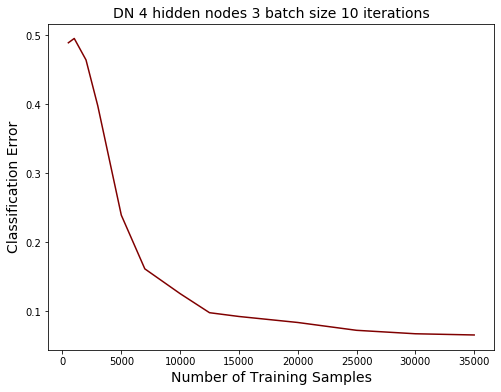

<IPython.core.display.Javascript object>

In [22]:
dnn_e_4hn_3bs_mean = np.mean(dnn_e_4hn_3bs, axis=1)

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.plot(sample_sizes, dnn_e_4hn_3bs_mean, linewidth=1.5, c="maroon")

# ax.plot(sample_sizes, rf_evolution_mean, linewidth=2.5, c="black", linestyle="dashed")

plt.title("DN 4 hidden nodes 3 batch size 10 iterations", fontsize=14)
plt.xlabel("Number of Training Samples", fontsize=14)
plt.ylabel("Classification Error", fontsize=14)
# plt.legend(
#     [
#         "4 Hidden Nodes",
#         "5 Hidden Nodes",
#         "6 Hidden Nodes",
#         "7 Hidden Nodes",
#         "Random Forest",
#     ],
#     prop={"size": 12},
# )

fig.savefig("Final Figures/dnn_4hn_3bs_10iters.png")

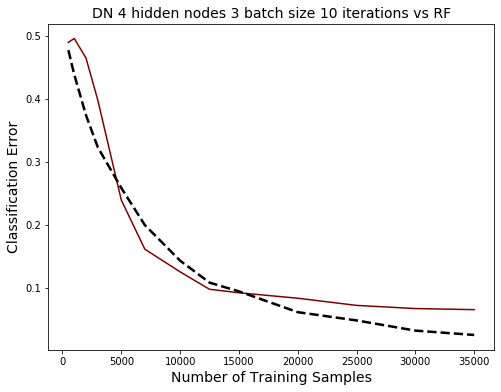

<IPython.core.display.Javascript object>

In [23]:
%store -r rf_e
rf_e_mean = np.mean(rf_e, axis=1)

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.plot(sample_sizes, dnn_e_4hn_3bs_mean, linewidth=1.5, c="maroon")

ax.plot(sample_sizes, rf_e_mean, linewidth=2.5, c="black", linestyle="dashed")

plt.title("DN 4 hidden nodes 3 batch size 10 iterations vs RF", fontsize=14)
plt.xlabel("Number of Training Samples", fontsize=14)
plt.ylabel("Classification Error", fontsize=14)
# plt.legend(
#     [
#         "4 Hidden Nodes",
#         "5 Hidden Nodes",
#         "6 Hidden Nodes",
#         "7 Hidden Nodes",
#         "Random Forest",
#     ],
#     prop={"size": 12},
# )

fig.savefig("Final Figures/dnn_4hn_3bs_10iters_rf_overlay.png")

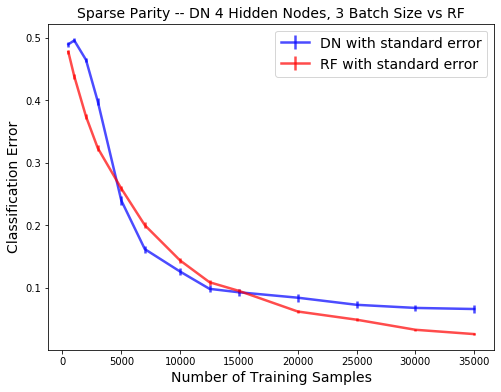

<IPython.core.display.Javascript object>

In [26]:
dnn_e_4hn_3bs_mean = np.mean(dnn_e_4hn_3bs, axis=1)

yerr_dn = stats.sem(dnn_e_4hn_3bs, axis=1)
yerr_rf = stats.sem(rf_e, axis=1)

rf_e_mean = np.mean(rf_e, axis=1)

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
# ax.plot(sample_sizes, dnn_e_4hn_3bs_mean, linewidth=1.5, c="maroon")
# ax.plot(sample_sizes, rf_e_mean, linewidth=2.5, c="black", linestyle="dashed")
ax.errorbar(
    sample_sizes, dnn_e_4hn_3bs_mean, yerr=yerr_dn, linewidth=2.5, c="b", alpha=0.7
)
ax.errorbar(sample_sizes, rf_e_mean, yerr=yerr_rf, linewidth=2.5, c="r", alpha=0.7)

plt.title("Sparse Parity -- DN 4 Hidden Nodes, 3 Batch Size vs RF", fontsize=14)
plt.xlabel("Number of Training Samples", fontsize=14)
plt.ylabel("Classification Error", fontsize=14)
plt.legend(["DN with standard error", "RF with standard error"], prop={"size": 14})

fig.savefig("Final Figures/dnn_4hn_3bs_10iters_rf_overlay_FINAL.png")

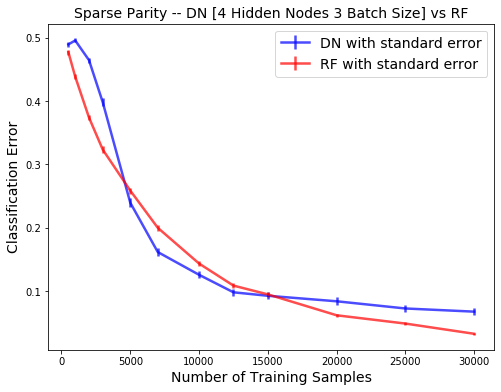

<IPython.core.display.Javascript object>

In [35]:
dnn_e_4hn_3bs.shape

dnn_e_4hn_3bs_mean_30000 = np.mean(dnn_e_4hn_3bs[:-1, :], axis=1)
rf_e_mean = np.mean(rf_e[:-1, :], axis=1)

yerr_dn = stats.sem(dnn_e_4hn_3bs[:-1, :], axis=1)
yerr_rf = stats.sem(rf_e[:-1, :], axis=1)

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
# ax.plot(sample_sizes, dnn_e_4hn_3bs_mean, linewidth=1.5, c="maroon")
# ax.plot(sample_sizes, rf_e_mean, linewidth=2.5, c="black", linestyle="dashed")
ax.errorbar(
    sample_sizes[:-1],
    dnn_e_4hn_3bs_mean_30000,
    yerr=yerr_dn,
    linewidth=2.5,
    c="b",
    alpha=0.7,
)
ax.errorbar(sample_sizes[:-1], rf_e_mean, yerr=yerr_rf, linewidth=2.5, c="r", alpha=0.7)

plt.title("Sparse Parity -- DN [4 Hidden Nodes 3 Batch Size] vs RF", fontsize=14)
plt.xlabel("Number of Training Samples", fontsize=14)
plt.ylabel("Classification Error", fontsize=14)
plt.legend(["DN with standard error", "RF with standard error"], prop={"size": 14})

fig.savefig("Final Figures/dnn_4hn_3bs_10iters_rf_overlay_FINAL_30000.png")

In [ ]:
def test_suite_batch(
    X,
    y,
    iterations,
    output_nodes,
    batches,
    nodes,
    sample_sizes=[500, 1000, 2000, 3000, 5000, 7000, 10000, 12500, 15000, 20000, 30000, 35000],
    epochs=10,
    learning_rate=0.001,
    validation_split=0.3,
    dnn_verbose=1,
):

    X = np.array(X, dtype=np.float32)
    y = np.array(y, dtype=np.float32)

    dnn_evolution = np.zeros((len(sample_sizes), iterations * len(batches)))

    for index, batch in enumerate(batches):
        print("BATCH: ", batch)
        for iteration in range(iterations):
            print("iteration: ", iteration)

            for sample_size_index, max_sample_size in enumerate(sample_sizes):
                print("Max sample size: ", max_sample_size)

                X_scaled, y_scaled = random_sample(X, y, max_sample_size)
                X_train, X_test, y_train, y_test = train_test_split(
                    X_scaled, y_scaled, test_size=0.3, random_state=101
                )

                if output_nodes == 1:
                    dnn_model = binary_deep_neural_network_batch(
                        X_train=X_train,
                        y_train=y_train,
                        hidden_nodes=nodes,
                        epochs=epochs,
                        batch_size=batch,
                        learning_rate=learning_rate,
                        validation_split=validation_split,
                        verbose=dnn_verbose,
                    )

                score = dnn_model.evaluate(
                    X_test,
                    y_test,
                    batch_size=None,
                    verbose=0,
                    sample_weight=None,
                    steps=None,
                    callbacks=None,
                    max_queue_size=10,
                    workers=1,
                    use_multiprocessing=False,
                    return_dict=False,
                )

                dnn_error = 1 - score[1]
                dnn_evolution[sample_size_index][
                    iteration + iterations * index
                ] = dnn_error

    return dnn_evolution

In [36]:
from joblib import Parallel, delayed

sample_sizes = [500, 1000, 2000]

start = time.time()
Parallel(n_jobs=-1)(
    delayed(
        test_suite_timed(
            p=14,
            p_star=3,
            iterations=3,
            output_nodes=1,
            sample_sizes=sample_sizes,
            num_trees=500,
            rf_verbose=1,
            batch_size=16,
        )
    )
)


end = time.time()
print("\n\nTOTAL RUNTIME: \n\n", end - start)

Max sample size:  500
(500, 14)
(500,)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.




RF ERROR: 

 0.43999999999999995
Max sample size:  1000
(1000, 14)
(1000,)


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished




RF ERROR: 

 0.41666666666666663
Max sample size:  2000
(2000, 14)
(2000,)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.




RF ERROR: 

 0.3866666666666667


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


TypeError: 'function' object is not iterable

<IPython.core.display.Javascript object>